In [1]:
import pandas as pd
import numpy as np 

import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sns.set_style('darkgrid')

# 1. Data

In [3]:
# Dataframe df

df = pd.read_csv('energy.csv')


In [4]:
df.head()

,timestamp,load,temp
0,2012-01-01 00:00:00,2698.0,32.000000
1,2012-01-01 01:00:00,2558.0,32.666667
2,2012-01-01 02:00:00,2444.0,30.000000
3,2012-01-01 03:00:00,2402.0,31.000000
4,2012-01-01 04:00:00,2403.0,32.000000


In [5]:
df.tail()

,timestamp,load,temp
26299,2014-12-31 19:00:00,4012.0,18.000000
26300,2014-12-31 20:00:00,3856.0,16.666667
26301,2014-12-31 21:00:00,3671.0,17.000000
26302,2014-12-31 22:00:00,3499.0,15.333333
26303,2014-12-31 23:00:00,3345.0,15.333333


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  26304 non-null  object 
 1   load       26304 non-null  float64
 2   temp       26304 non-null  float64
dtypes: float64(2), object(1)
memory usage: 616.6+ KB


In [7]:
df.shape

(26304, 3)

In [8]:
df.isnull().sum()

timestamp    0
load         0
temp         0
dtype: int64

In [59]:
#df = df.fillna(method = 'ffill')

Text(0, 0.5, 'energy')

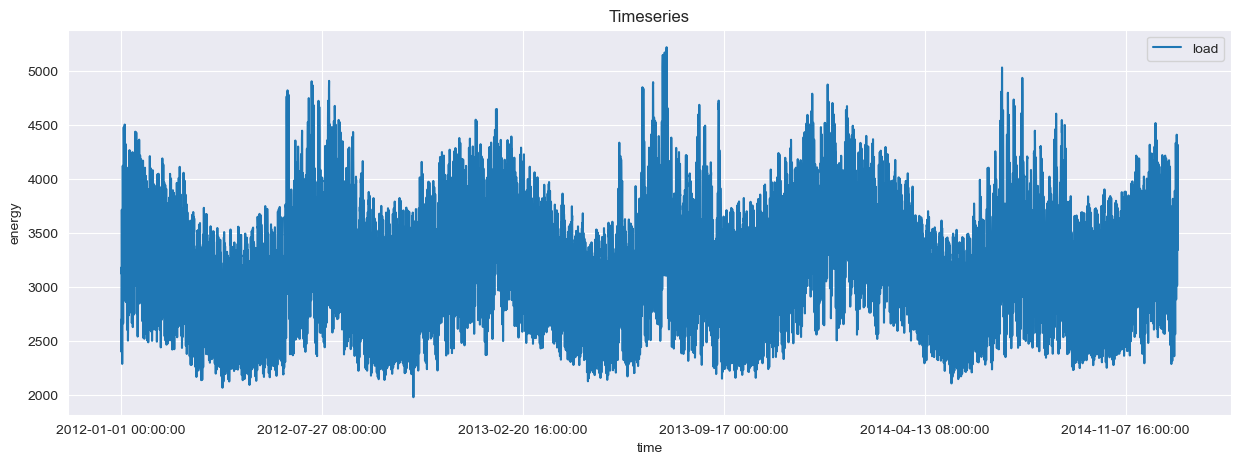

In [9]:
f = df.plot(x = 'timestamp', y = 'load', figsize = (15,5))

f.set_title('Timeseries')
f.set_xlabel('time')
f.set_ylabel('energy')

# 2. Data Engineering

In [10]:
# Extract time features

def get_time_features(data):
    
    # Convert timestamp obj to datetime 
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    
    # Create time features
    
    data['year'] = data['timestamp'].dt.year
    data['quarter'] = data['timestamp'].dt.quarter
    data['month'] = data['timestamp'].dt.month
    data['day_of_month'] = data['timestamp'].dt.day
    data['day_of_week'] = data['timestamp'].dt.day_of_week
    data['hour'] = data['timestamp'].dt.hour
    data['minute'] = data['timestamp'].dt.minute
    
    return data
    

In [11]:
get_time_features(df)

,timestamp,load,temp,year,quarter,month,day_of_month,day_of_week,hour,minute
0,2012-01-01 00:00:00,2698.0,32.000000,2012,1,1,1,6,0,0
1,2012-01-01 01:00:00,2558.0,32.666667,2012,1,1,1,6,1,0
2,2012-01-01 02:00:00,2444.0,30.000000,2012,1,1,1,6,2,0
3,2012-01-01 03:00:00,2402.0,31.000000,2012,1,1,1,6,3,0
4,2012-01-01 04:00:00,2403.0,32.000000,2012,1,1,1,6,4,0
...,...,...,...,...,...,...,...,...,...,...
26299,2014-12-31 19:00:00,4012.0,18.000000,2014,4,12,31,2,19,0
26300,2014-12-31 20:00:00,3856.0,16.666667,2014,4,12,31,2,20,0
26301,2014-12-31 21:00:00,3671.0,17.000000,2014,4,12,31,2,21,0
26302,2014-12-31 22:00:00,3499.0,15.333333,2014,4,12,31,2,22,0


In [12]:
df = get_time_features(df)

# 3. Data Visualisation

In [13]:
df_by_year = df.groupby('year').mean().reset_index()
df_by_month = df.groupby('month').mean().reset_index()

C:\Users\giuli\AppData\Local\Temp\ipykernel_2464\2695980483.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_by_year = df.groupby('year').mean().reset_index()
C:\Users\giuli\AppData\Local\Temp\ipykernel_2464\2695980483.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_by_month = df.groupby('month').mean().reset_index()


Text(0, 0.5, 'energy avg')

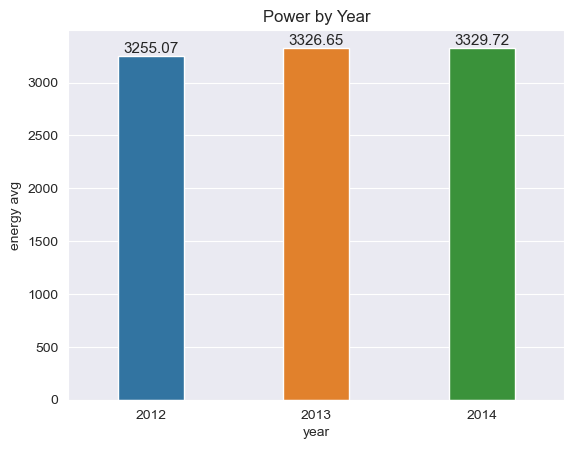

In [14]:
f = sns.barplot(data = df_by_year, x = 'year', y = 'load', width = 0.4)

f.bar_label(f.containers[0], fontsize= 11)

f.set_title('Power by Year')
f.set_ylabel('energy avg')

Text(0, 0.5, 'energy avg')

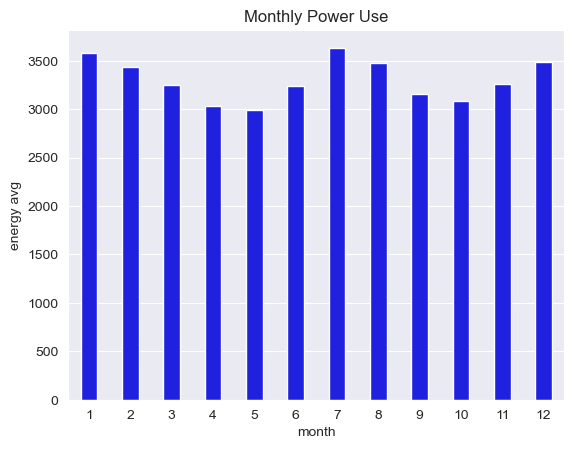

In [15]:
f = sns.barplot(data = df_by_month, x = 'month', y = 'load', width = 0.4, color = 'b')

#f.bar_label(f.containers[0], fontsize= 9)

f.set_title('Monthly Power Use')
f.set_ylabel('energy avg')

Text(0.5, 1.0, 'Hourly Energy Distribution')

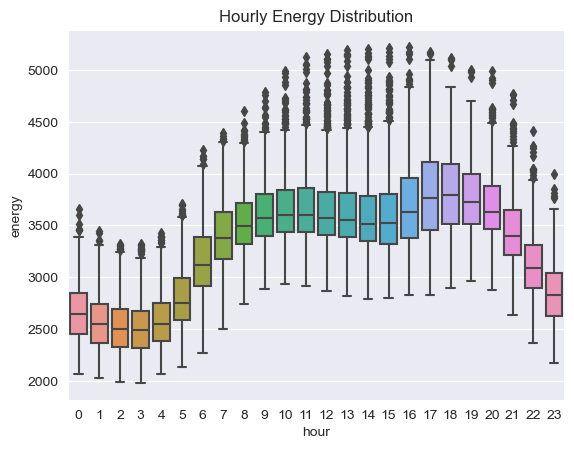

In [16]:
f = sns.boxplot(data = df, x = 'hour', y = 'load')

f.set_ylabel('energy')
f.set_title('Hourly Energy Distribution')

Text(0.5, 1.0, 'Monthly Energy Distribution')

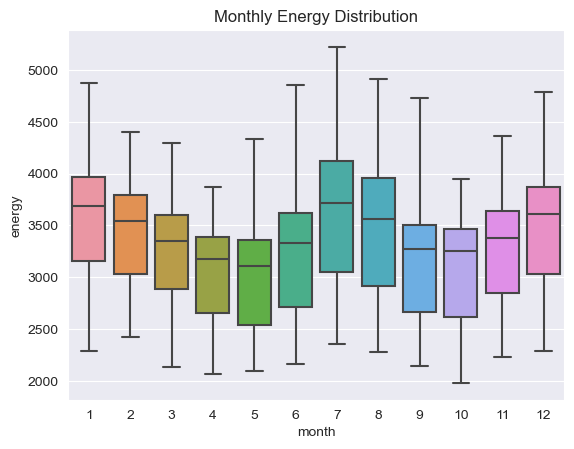

In [17]:
f = sns.boxplot(data = df, x = 'month', y = 'load')

f.set_ylabel('energy')
f.set_title('Monthly Energy Distribution')

C:\Users\giuli\AppData\Local\Temp\ipykernel_2464\1092237655.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped = df[df['day_of_week'] == i].groupby('hour').mean().reset_index()
C:\Users\giuli\AppData\Local\Temp\ipykernel_2464\1092237655.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped = df[df['day_of_week'] == i].groupby('hour').mean().reset_index()
C:\Users\giuli\AppData\Local\Temp\ipykernel_2464\1092237655.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify nu

Text(0, 0.5, 'energy')

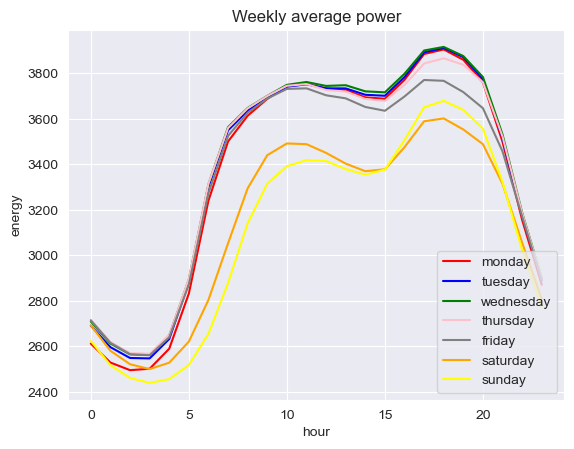

In [18]:
# Colors
colors = ['red','blue','green','pink', 'grey', 'orange', 'yellow']

# Days
days = ['monday','tuesday','wednesday','thursday', 'friday', 'saturday', 'sunday']


for i in range(7):
    
    data_grouped = df[df['day_of_week'] == i].groupby('hour').mean().reset_index()
    
    f =sns.lineplot(data = data_grouped , x = 'hour', y = 'load', color = colors[i], label = days[i])
    


plt.legend(loc="lower right")
plt.title('Weekly average power')
f.set_ylabel('energy')

# 4.  Train/Test Splitting

In [29]:
# Get the index for splitting

df.index[df['timestamp'] == '2014-01-01 00:00:00'] #.tolist()

Int64Index([17544], dtype='int64')

In [32]:
# Train/Test splitting

train = df.iloc[:17544]
test = df.iloc[17544:]

In [33]:
train.tail(2)

,timestamp,load,temp,year,quarter,month,day_of_month,day_of_week,hour,minute
17542,2013-12-31 22:00:00,3655.0,10.333333,2013,4,12,31,1,22,0
17543,2013-12-31 23:00:00,3489.0,11.000000,2013,4,12,31,1,23,0


In [34]:
test.head(2)

,timestamp,load,temp,year,quarter,month,day_of_month,day_of_week,hour,minute
17544,2014-01-01 00:00:00,3295.0,9.333333,2014,1,1,1,2,0,0
17545,2014-01-01 01:00:00,3173.0,10.666667,2014,1,1,1,2,1,0


Text(0, 0.5, 'power')

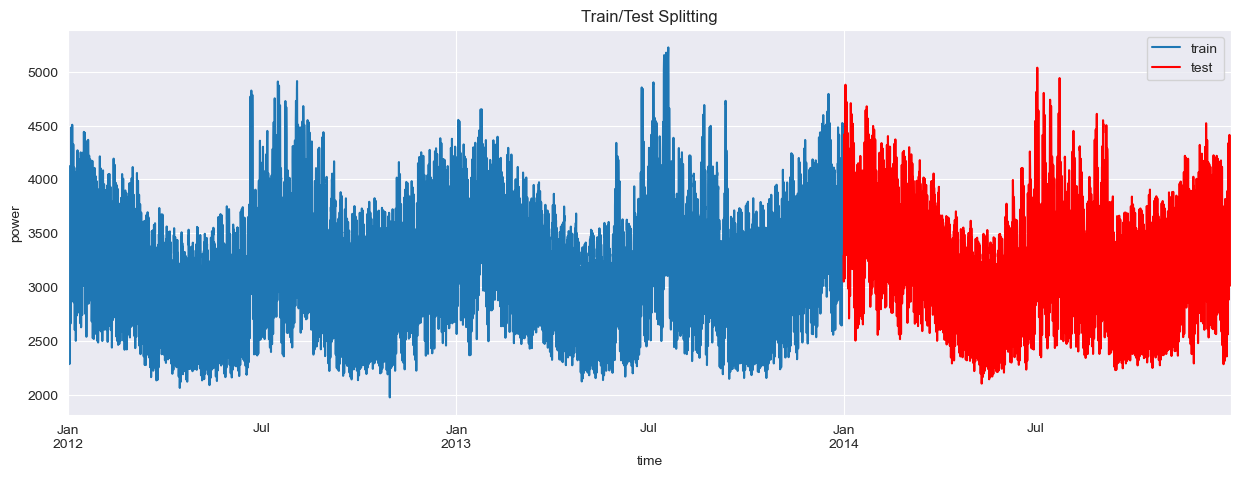

In [42]:
# Train/Test splitting visualisation

f = train.plot(x = 'timestamp', y = 'load', label = 'train', figsize = (15,5))

test.plot(ax = f, x = 'timestamp', y = 'load', label = 'test', color = 'red', figsize = (15,5))


f.set_title('Train/Test Splitting')
f.set_xlabel('time')
f.set_ylabel('power')

In [43]:
# Features and Label

X_train = train.drop(columns = ['timestamp', 'load'], axis = 1)
y_train = train['load']

X_test = test.drop(columns = ['timestamp', 'load'], axis = 1)
y_test = test['load']


# 5. Model

In [45]:
import xgboost as xgb

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

**XGBoost** is a gradient boosting algorithm that is commonly used for regression
tasks. It builds a series of decision trees and combines their predictions to minimize
the error between predicted and actual values. 

The algorithm includes regularization techniques to prevent overfitting and provides a measure of feature
importance. The XGBoost regression process involves splitting the data, initializing the model, training and evaluating the model, tuning the hyperparameters, and making predictions for new data.

In [48]:
# Model

xgbr = xgb.XGBRegressor()


# Tune hyperparameters

parameters = {"colsample_bytree":[1.0],"min_child_weight":[1.0,1.2],'max_depth': [3,4,6], 'n_estimators': [500,1000]}

reg_cv = GridSearchCV(xgbr, parameters, verbose = 1)

reg_cv.fit(X_train,y_train, eval_set = [(X_train, y_train),(X_test, y_test)])

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[0]	validation_0-rmse:458.17027	validation_1-rmse:441.56559
[1]	validation_0-rmse:382.51571	validation_1-rmse:370.42526
[2]	validation_0-rmse:327.96957	validation_1-rmse:317.83315
[3]	validation_0-rmse:291.30652	validation_1-rmse:281.53936
[4]	validation_0-rmse:267.28000	validation_1-rmse:259.27027
[5]	validation_0-rmse:242.72416	validation_1-rmse:238.16622
[6]	validation_0-rmse:228.15650	validation_1-rmse:221.47629
[7]	validation_0-rmse:217.31700	validation_1-rmse:211.83983
[8]	validation_0-rmse:207.16394	validation_1-rmse:201.73889
[9]	validation_0-rmse:196.69819	validation_1-rmse:194.21857
[10]	validation_0-rmse:188.54447	validation_1-rmse:187.08805
[11]	validation_0-rmse:180.64756	validation_1-rmse:178.91893
[12]	validation_0-rmse:175.03443	validation_1-rmse:174.89036
[13]	validation_0-rmse:172.07640	validation_1-rmse:172.03874
[14]	validation_0-rmse:165.11170	validation_1-rmse:166.51252
[15]	validation_0-rmse:162.46092	v

[133]	validation_0-rmse:104.17058	validation_1-rmse:134.78007
[134]	validation_0-rmse:103.91878	validation_1-rmse:134.55925
[135]	validation_0-rmse:103.73133	validation_1-rmse:134.55543
[136]	validation_0-rmse:103.69473	validation_1-rmse:134.49389
[137]	validation_0-rmse:103.71592	validation_1-rmse:134.55001
[138]	validation_0-rmse:103.49609	validation_1-rmse:134.77158
[139]	validation_0-rmse:103.43281	validation_1-rmse:134.69791
[140]	validation_0-rmse:103.36673	validation_1-rmse:134.58638
[141]	validation_0-rmse:103.10333	validation_1-rmse:134.92109
[142]	validation_0-rmse:102.98766	validation_1-rmse:134.87143
[143]	validation_0-rmse:102.85772	validation_1-rmse:134.84059
[144]	validation_0-rmse:102.82266	validation_1-rmse:134.92644
[145]	validation_0-rmse:102.77677	validation_1-rmse:134.89403
[146]	validation_0-rmse:102.66036	validation_1-rmse:134.74987
[147]	validation_0-rmse:102.61878	validation_1-rmse:134.61604
[148]	validation_0-rmse:102.51016	validation_1-rmse:134.62904
[149]	va

[267]	validation_0-rmse:95.01131	validation_1-rmse:135.31196
[268]	validation_0-rmse:95.09348	validation_1-rmse:135.21081
[269]	validation_0-rmse:95.05722	validation_1-rmse:135.25639
[270]	validation_0-rmse:94.94729	validation_1-rmse:135.21521
[271]	validation_0-rmse:94.87463	validation_1-rmse:135.13545
[272]	validation_0-rmse:94.84085	validation_1-rmse:135.12425
[273]	validation_0-rmse:94.81195	validation_1-rmse:135.14399
[274]	validation_0-rmse:94.76681	validation_1-rmse:135.16267
[275]	validation_0-rmse:94.74851	validation_1-rmse:135.23821
[276]	validation_0-rmse:94.68715	validation_1-rmse:135.25637
[277]	validation_0-rmse:94.63929	validation_1-rmse:135.29491
[278]	validation_0-rmse:94.62318	validation_1-rmse:135.19855
[279]	validation_0-rmse:94.63399	validation_1-rmse:135.11875
[280]	validation_0-rmse:94.59788	validation_1-rmse:135.14270
[281]	validation_0-rmse:94.49762	validation_1-rmse:135.23829
[282]	validation_0-rmse:94.44664	validation_1-rmse:135.15632
[283]	validation_0-rmse:

[402]	validation_0-rmse:88.90223	validation_1-rmse:134.60646
[403]	validation_0-rmse:88.89410	validation_1-rmse:134.55725
[404]	validation_0-rmse:88.96392	validation_1-rmse:134.56815
[405]	validation_0-rmse:88.92252	validation_1-rmse:134.73923
[406]	validation_0-rmse:88.90069	validation_1-rmse:134.70578
[407]	validation_0-rmse:88.87475	validation_1-rmse:134.76021
[408]	validation_0-rmse:88.87302	validation_1-rmse:134.77502
[409]	validation_0-rmse:88.82924	validation_1-rmse:134.80238
[410]	validation_0-rmse:88.72717	validation_1-rmse:134.71251
[411]	validation_0-rmse:88.69194	validation_1-rmse:134.66725
[412]	validation_0-rmse:88.66365	validation_1-rmse:134.65825
[413]	validation_0-rmse:88.60116	validation_1-rmse:134.60042
[414]	validation_0-rmse:88.57978	validation_1-rmse:134.63079
[415]	validation_0-rmse:88.53980	validation_1-rmse:134.74463
[416]	validation_0-rmse:88.48676	validation_1-rmse:134.76466
[417]	validation_0-rmse:88.42585	validation_1-rmse:134.89701
[418]	validation_0-rmse:

[37]	validation_0-rmse:136.49744	validation_1-rmse:147.13086
[38]	validation_0-rmse:136.15967	validation_1-rmse:146.94299
[39]	validation_0-rmse:135.67836	validation_1-rmse:145.96108
[40]	validation_0-rmse:135.49716	validation_1-rmse:145.72373
[41]	validation_0-rmse:134.45782	validation_1-rmse:144.97405
[42]	validation_0-rmse:133.83226	validation_1-rmse:144.48071
[43]	validation_0-rmse:134.96004	validation_1-rmse:144.17237
[44]	validation_0-rmse:134.84575	validation_1-rmse:143.81530
[45]	validation_0-rmse:134.20108	validation_1-rmse:143.88300
[46]	validation_0-rmse:133.77064	validation_1-rmse:143.45288
[47]	validation_0-rmse:133.34802	validation_1-rmse:143.27634
[48]	validation_0-rmse:132.81976	validation_1-rmse:143.21103
[49]	validation_0-rmse:132.86675	validation_1-rmse:143.00939
[50]	validation_0-rmse:132.64437	validation_1-rmse:142.98630
[51]	validation_0-rmse:132.27680	validation_1-rmse:142.99319
[52]	validation_0-rmse:131.70476	validation_1-rmse:142.56130
[53]	validation_0-rmse:1

[171]	validation_0-rmse:112.24211	validation_1-rmse:135.33366
[172]	validation_0-rmse:112.31492	validation_1-rmse:135.54932
[173]	validation_0-rmse:112.31032	validation_1-rmse:135.53068
[174]	validation_0-rmse:112.15142	validation_1-rmse:135.69078
[175]	validation_0-rmse:112.09683	validation_1-rmse:135.72718
[176]	validation_0-rmse:112.00667	validation_1-rmse:135.64413
[177]	validation_0-rmse:112.02565	validation_1-rmse:135.60706
[178]	validation_0-rmse:111.98525	validation_1-rmse:135.64105
[179]	validation_0-rmse:111.75355	validation_1-rmse:135.67232
[180]	validation_0-rmse:111.71982	validation_1-rmse:135.69554
[181]	validation_0-rmse:111.70172	validation_1-rmse:135.67608
[182]	validation_0-rmse:111.57171	validation_1-rmse:135.66531
[183]	validation_0-rmse:111.47833	validation_1-rmse:135.53101
[184]	validation_0-rmse:111.47052	validation_1-rmse:135.50579
[185]	validation_0-rmse:111.47172	validation_1-rmse:135.52435
[186]	validation_0-rmse:111.43845	validation_1-rmse:135.83167
[187]	va

[304]	validation_0-rmse:105.47212	validation_1-rmse:137.05798
[305]	validation_0-rmse:105.49235	validation_1-rmse:137.06489
[306]	validation_0-rmse:105.53836	validation_1-rmse:137.05138
[307]	validation_0-rmse:105.49539	validation_1-rmse:137.04389
[308]	validation_0-rmse:105.50164	validation_1-rmse:137.02353
[309]	validation_0-rmse:105.51830	validation_1-rmse:136.99030
[310]	validation_0-rmse:105.45433	validation_1-rmse:137.07859
[311]	validation_0-rmse:105.37583	validation_1-rmse:136.85112
[312]	validation_0-rmse:105.48370	validation_1-rmse:136.84773
[313]	validation_0-rmse:105.45643	validation_1-rmse:136.84719
[314]	validation_0-rmse:105.48154	validation_1-rmse:136.80806
[315]	validation_0-rmse:105.44042	validation_1-rmse:136.81060
[316]	validation_0-rmse:105.39640	validation_1-rmse:136.83224
[317]	validation_0-rmse:105.57742	validation_1-rmse:137.13829
[318]	validation_0-rmse:105.76452	validation_1-rmse:137.23394
[319]	validation_0-rmse:105.75021	validation_1-rmse:137.23427
[320]	va

[437]	validation_0-rmse:103.25142	validation_1-rmse:137.50973
[438]	validation_0-rmse:103.19247	validation_1-rmse:137.57975
[439]	validation_0-rmse:103.00471	validation_1-rmse:137.57068
[440]	validation_0-rmse:103.00208	validation_1-rmse:137.52231
[441]	validation_0-rmse:102.98663	validation_1-rmse:137.49716
[442]	validation_0-rmse:102.97226	validation_1-rmse:137.50012
[443]	validation_0-rmse:102.91198	validation_1-rmse:137.45443
[444]	validation_0-rmse:102.88328	validation_1-rmse:137.42377
[445]	validation_0-rmse:102.89308	validation_1-rmse:137.44026
[446]	validation_0-rmse:102.86898	validation_1-rmse:137.41681
[447]	validation_0-rmse:102.83853	validation_1-rmse:137.65604
[448]	validation_0-rmse:102.82612	validation_1-rmse:137.70072
[449]	validation_0-rmse:102.81492	validation_1-rmse:137.72880
[450]	validation_0-rmse:102.81446	validation_1-rmse:137.76117
[451]	validation_0-rmse:102.85856	validation_1-rmse:137.88095
[452]	validation_0-rmse:102.84348	validation_1-rmse:137.83814
[453]	va

[71]	validation_0-rmse:117.54304	validation_1-rmse:150.51903
[72]	validation_0-rmse:116.97754	validation_1-rmse:149.99351
[73]	validation_0-rmse:116.81733	validation_1-rmse:149.98798
[74]	validation_0-rmse:116.64294	validation_1-rmse:149.84426
[75]	validation_0-rmse:116.52621	validation_1-rmse:149.74849
[76]	validation_0-rmse:116.01383	validation_1-rmse:149.60270
[77]	validation_0-rmse:115.72233	validation_1-rmse:149.49782
[78]	validation_0-rmse:115.37409	validation_1-rmse:149.24067
[79]	validation_0-rmse:115.17327	validation_1-rmse:149.23882
[80]	validation_0-rmse:115.01980	validation_1-rmse:149.29144
[81]	validation_0-rmse:114.76797	validation_1-rmse:149.18299
[82]	validation_0-rmse:114.44461	validation_1-rmse:149.14388
[83]	validation_0-rmse:114.28622	validation_1-rmse:149.17228
[84]	validation_0-rmse:114.05025	validation_1-rmse:148.86391
[85]	validation_0-rmse:113.81255	validation_1-rmse:148.83556
[86]	validation_0-rmse:113.55017	validation_1-rmse:148.52482
[87]	validation_0-rmse:1

[204]	validation_0-rmse:101.87072	validation_1-rmse:143.91616
[205]	validation_0-rmse:101.82351	validation_1-rmse:143.86083
[206]	validation_0-rmse:101.69444	validation_1-rmse:143.40614
[207]	validation_0-rmse:101.63785	validation_1-rmse:143.41265
[208]	validation_0-rmse:101.63279	validation_1-rmse:143.48830
[209]	validation_0-rmse:101.59162	validation_1-rmse:143.44198
[210]	validation_0-rmse:101.55542	validation_1-rmse:143.45634
[211]	validation_0-rmse:100.87988	validation_1-rmse:143.05179
[212]	validation_0-rmse:100.80652	validation_1-rmse:143.00683
[213]	validation_0-rmse:100.85774	validation_1-rmse:143.18672
[214]	validation_0-rmse:100.74892	validation_1-rmse:143.12660
[215]	validation_0-rmse:100.63830	validation_1-rmse:143.06099
[216]	validation_0-rmse:100.59134	validation_1-rmse:143.08249
[217]	validation_0-rmse:100.53611	validation_1-rmse:143.03117
[218]	validation_0-rmse:100.49454	validation_1-rmse:143.21121
[219]	validation_0-rmse:100.17566	validation_1-rmse:142.65965
[220]	va

[338]	validation_0-rmse:95.39335	validation_1-rmse:140.76332
[339]	validation_0-rmse:95.36142	validation_1-rmse:140.83017
[340]	validation_0-rmse:95.29344	validation_1-rmse:140.36587
[341]	validation_0-rmse:95.32234	validation_1-rmse:140.43777
[342]	validation_0-rmse:95.29019	validation_1-rmse:140.48083
[343]	validation_0-rmse:95.26536	validation_1-rmse:140.53709
[344]	validation_0-rmse:95.25091	validation_1-rmse:140.53971
[345]	validation_0-rmse:95.15443	validation_1-rmse:140.34372
[346]	validation_0-rmse:95.18405	validation_1-rmse:140.46961
[347]	validation_0-rmse:95.06620	validation_1-rmse:140.52189
[348]	validation_0-rmse:95.06228	validation_1-rmse:140.59190
[349]	validation_0-rmse:94.98863	validation_1-rmse:140.65545
[350]	validation_0-rmse:94.82239	validation_1-rmse:140.45119
[351]	validation_0-rmse:94.78479	validation_1-rmse:140.35400
[352]	validation_0-rmse:94.73792	validation_1-rmse:140.32560
[353]	validation_0-rmse:94.72740	validation_1-rmse:140.33357
[354]	validation_0-rmse:

[473]	validation_0-rmse:91.23029	validation_1-rmse:140.75723
[474]	validation_0-rmse:91.16892	validation_1-rmse:140.84933
[475]	validation_0-rmse:91.06515	validation_1-rmse:140.84339
[476]	validation_0-rmse:91.00991	validation_1-rmse:140.56633
[477]	validation_0-rmse:90.98384	validation_1-rmse:140.48409
[478]	validation_0-rmse:91.00992	validation_1-rmse:140.54447
[479]	validation_0-rmse:90.97322	validation_1-rmse:140.27501
[480]	validation_0-rmse:90.97686	validation_1-rmse:140.31008
[481]	validation_0-rmse:90.92360	validation_1-rmse:140.25181
[482]	validation_0-rmse:90.86332	validation_1-rmse:140.27378
[483]	validation_0-rmse:90.85431	validation_1-rmse:140.22990
[484]	validation_0-rmse:90.78523	validation_1-rmse:140.40461
[485]	validation_0-rmse:90.73972	validation_1-rmse:140.30926
[486]	validation_0-rmse:90.70745	validation_1-rmse:140.28173
[487]	validation_0-rmse:90.70650	validation_1-rmse:140.25637
[488]	validation_0-rmse:90.67071	validation_1-rmse:140.22816
[489]	validation_0-rmse:

[108]	validation_0-rmse:114.35582	validation_1-rmse:135.06115
[109]	validation_0-rmse:114.20225	validation_1-rmse:134.96225
[110]	validation_0-rmse:114.08085	validation_1-rmse:134.78342
[111]	validation_0-rmse:114.01078	validation_1-rmse:134.75818
[112]	validation_0-rmse:113.87071	validation_1-rmse:134.67034
[113]	validation_0-rmse:113.74141	validation_1-rmse:134.51033
[114]	validation_0-rmse:113.50487	validation_1-rmse:134.64779
[115]	validation_0-rmse:113.38613	validation_1-rmse:134.91697
[116]	validation_0-rmse:113.31782	validation_1-rmse:134.79803
[117]	validation_0-rmse:113.22235	validation_1-rmse:134.49965
[118]	validation_0-rmse:113.14940	validation_1-rmse:134.60949
[119]	validation_0-rmse:113.14908	validation_1-rmse:134.54902
[120]	validation_0-rmse:113.00386	validation_1-rmse:134.51102
[121]	validation_0-rmse:112.84437	validation_1-rmse:134.67912
[122]	validation_0-rmse:112.79943	validation_1-rmse:134.68755
[123]	validation_0-rmse:112.73225	validation_1-rmse:134.66612
[124]	va

[241]	validation_0-rmse:104.60116	validation_1-rmse:134.36235
[242]	validation_0-rmse:104.56707	validation_1-rmse:134.30480
[243]	validation_0-rmse:104.48977	validation_1-rmse:134.19969
[244]	validation_0-rmse:104.40043	validation_1-rmse:134.42660
[245]	validation_0-rmse:104.37198	validation_1-rmse:134.51155
[246]	validation_0-rmse:104.27272	validation_1-rmse:134.39838
[247]	validation_0-rmse:104.07459	validation_1-rmse:134.30566
[248]	validation_0-rmse:104.02880	validation_1-rmse:134.61497
[249]	validation_0-rmse:103.95861	validation_1-rmse:134.64276
[250]	validation_0-rmse:103.85399	validation_1-rmse:134.62865
[251]	validation_0-rmse:103.81055	validation_1-rmse:134.55632
[252]	validation_0-rmse:103.82049	validation_1-rmse:134.64147
[253]	validation_0-rmse:103.82928	validation_1-rmse:134.67190
[254]	validation_0-rmse:103.78629	validation_1-rmse:134.61516
[255]	validation_0-rmse:103.58404	validation_1-rmse:134.47406
[256]	validation_0-rmse:103.55087	validation_1-rmse:135.09782
[257]	va

[374]	validation_0-rmse:100.36002	validation_1-rmse:136.09540
[375]	validation_0-rmse:100.34951	validation_1-rmse:136.15778
[376]	validation_0-rmse:100.32171	validation_1-rmse:136.12103
[377]	validation_0-rmse:100.34385	validation_1-rmse:136.15093
[378]	validation_0-rmse:100.32649	validation_1-rmse:136.13408
[379]	validation_0-rmse:100.25728	validation_1-rmse:136.19817
[380]	validation_0-rmse:100.25055	validation_1-rmse:136.20544
[381]	validation_0-rmse:100.23855	validation_1-rmse:136.10579
[382]	validation_0-rmse:100.20861	validation_1-rmse:136.06529
[383]	validation_0-rmse:100.19911	validation_1-rmse:135.99971
[384]	validation_0-rmse:100.12790	validation_1-rmse:136.02398
[385]	validation_0-rmse:100.11703	validation_1-rmse:135.99089
[386]	validation_0-rmse:100.08548	validation_1-rmse:135.99699
[387]	validation_0-rmse:100.03084	validation_1-rmse:135.91279
[388]	validation_0-rmse:100.03464	validation_1-rmse:135.88275
[389]	validation_0-rmse:99.97414	validation_1-rmse:135.89509
[390]	val

[8]	validation_0-rmse:203.90580	validation_1-rmse:211.64506
[9]	validation_0-rmse:194.81442	validation_1-rmse:200.12150
[10]	validation_0-rmse:187.56794	validation_1-rmse:192.68020
[11]	validation_0-rmse:180.79592	validation_1-rmse:188.44573
[12]	validation_0-rmse:176.07107	validation_1-rmse:185.89754
[13]	validation_0-rmse:171.52996	validation_1-rmse:180.13932
[14]	validation_0-rmse:166.16519	validation_1-rmse:175.11557
[15]	validation_0-rmse:162.23163	validation_1-rmse:171.79921
[16]	validation_0-rmse:157.88018	validation_1-rmse:168.47163
[17]	validation_0-rmse:155.24118	validation_1-rmse:166.52825
[18]	validation_0-rmse:153.90375	validation_1-rmse:164.52216
[19]	validation_0-rmse:152.23875	validation_1-rmse:164.40337
[20]	validation_0-rmse:148.42494	validation_1-rmse:160.92302
[21]	validation_0-rmse:146.90284	validation_1-rmse:159.68852
[22]	validation_0-rmse:145.76105	validation_1-rmse:158.73794
[23]	validation_0-rmse:144.78315	validation_1-rmse:157.69042
[24]	validation_0-rmse:142

[142]	validation_0-rmse:111.38720	validation_1-rmse:150.31951
[143]	validation_0-rmse:111.30945	validation_1-rmse:150.20707
[144]	validation_0-rmse:111.36901	validation_1-rmse:150.26946
[145]	validation_0-rmse:110.94717	validation_1-rmse:149.53951
[146]	validation_0-rmse:110.81408	validation_1-rmse:149.54359
[147]	validation_0-rmse:110.75874	validation_1-rmse:149.50437
[148]	validation_0-rmse:111.18863	validation_1-rmse:149.43990
[149]	validation_0-rmse:111.06168	validation_1-rmse:149.28697
[150]	validation_0-rmse:110.99056	validation_1-rmse:149.31844
[151]	validation_0-rmse:110.95611	validation_1-rmse:149.22100
[152]	validation_0-rmse:110.75679	validation_1-rmse:149.30809
[153]	validation_0-rmse:110.93573	validation_1-rmse:149.63544
[154]	validation_0-rmse:110.82233	validation_1-rmse:149.64851
[155]	validation_0-rmse:110.71296	validation_1-rmse:149.64700
[156]	validation_0-rmse:111.03470	validation_1-rmse:150.18467
[157]	validation_0-rmse:110.92441	validation_1-rmse:150.01742
[158]	va

[275]	validation_0-rmse:105.80592	validation_1-rmse:152.67983
[276]	validation_0-rmse:105.71768	validation_1-rmse:152.66542
[277]	validation_0-rmse:105.73253	validation_1-rmse:152.71967
[278]	validation_0-rmse:105.66294	validation_1-rmse:152.70532
[279]	validation_0-rmse:105.62078	validation_1-rmse:152.73190
[280]	validation_0-rmse:105.58665	validation_1-rmse:152.60916
[281]	validation_0-rmse:105.55456	validation_1-rmse:152.64464
[282]	validation_0-rmse:105.51749	validation_1-rmse:152.76575
[283]	validation_0-rmse:105.44987	validation_1-rmse:152.81225
[284]	validation_0-rmse:105.48433	validation_1-rmse:152.84286
[285]	validation_0-rmse:105.38477	validation_1-rmse:152.70864
[286]	validation_0-rmse:105.38260	validation_1-rmse:152.70152
[287]	validation_0-rmse:105.51913	validation_1-rmse:152.72773
[288]	validation_0-rmse:105.51916	validation_1-rmse:152.86268
[289]	validation_0-rmse:105.52639	validation_1-rmse:153.07003
[290]	validation_0-rmse:105.49635	validation_1-rmse:153.01508
[291]	va

[408]	validation_0-rmse:103.12588	validation_1-rmse:155.16342
[409]	validation_0-rmse:103.07754	validation_1-rmse:155.25820
[410]	validation_0-rmse:103.08200	validation_1-rmse:155.28984
[411]	validation_0-rmse:103.01396	validation_1-rmse:155.22999
[412]	validation_0-rmse:102.97987	validation_1-rmse:155.16274
[413]	validation_0-rmse:102.94444	validation_1-rmse:155.21694
[414]	validation_0-rmse:103.01767	validation_1-rmse:155.23816
[415]	validation_0-rmse:102.89885	validation_1-rmse:155.02157
[416]	validation_0-rmse:102.97607	validation_1-rmse:155.12778
[417]	validation_0-rmse:102.94948	validation_1-rmse:155.12005
[418]	validation_0-rmse:102.60353	validation_1-rmse:154.84814
[419]	validation_0-rmse:102.56201	validation_1-rmse:154.91177
[420]	validation_0-rmse:102.55434	validation_1-rmse:154.90933
[421]	validation_0-rmse:102.52626	validation_1-rmse:154.96522
[422]	validation_0-rmse:102.49123	validation_1-rmse:154.92203
[423]	validation_0-rmse:102.49023	validation_1-rmse:154.94635
[424]	va

[41]	validation_0-rmse:128.16878	validation_1-rmse:142.09290
[42]	validation_0-rmse:127.57942	validation_1-rmse:142.14425
[43]	validation_0-rmse:127.02408	validation_1-rmse:141.79279
[44]	validation_0-rmse:126.33008	validation_1-rmse:141.67460
[45]	validation_0-rmse:126.12185	validation_1-rmse:141.45455
[46]	validation_0-rmse:125.69530	validation_1-rmse:141.26609
[47]	validation_0-rmse:124.78740	validation_1-rmse:141.20883
[48]	validation_0-rmse:123.43736	validation_1-rmse:140.37167
[49]	validation_0-rmse:122.51398	validation_1-rmse:139.66912
[50]	validation_0-rmse:122.38740	validation_1-rmse:139.30736
[51]	validation_0-rmse:122.14224	validation_1-rmse:139.10211
[52]	validation_0-rmse:121.56840	validation_1-rmse:138.62751
[53]	validation_0-rmse:120.68749	validation_1-rmse:138.42813
[54]	validation_0-rmse:119.89805	validation_1-rmse:138.68136
[55]	validation_0-rmse:119.37251	validation_1-rmse:138.18825
[56]	validation_0-rmse:119.05936	validation_1-rmse:137.91093
[57]	validation_0-rmse:1

[175]	validation_0-rmse:99.79606	validation_1-rmse:134.17945
[176]	validation_0-rmse:99.71521	validation_1-rmse:134.24156
[177]	validation_0-rmse:99.66450	validation_1-rmse:134.33572
[178]	validation_0-rmse:99.62899	validation_1-rmse:134.44734
[179]	validation_0-rmse:99.45616	validation_1-rmse:133.95746
[180]	validation_0-rmse:99.35006	validation_1-rmse:133.74407
[181]	validation_0-rmse:99.38097	validation_1-rmse:133.93989
[182]	validation_0-rmse:99.32035	validation_1-rmse:133.91962
[183]	validation_0-rmse:99.30692	validation_1-rmse:133.86219
[184]	validation_0-rmse:99.14766	validation_1-rmse:133.69324
[185]	validation_0-rmse:99.05655	validation_1-rmse:133.63899
[186]	validation_0-rmse:99.00272	validation_1-rmse:133.68406
[187]	validation_0-rmse:98.98286	validation_1-rmse:133.66447
[188]	validation_0-rmse:98.94618	validation_1-rmse:133.68628
[189]	validation_0-rmse:98.89315	validation_1-rmse:133.65041
[190]	validation_0-rmse:98.73147	validation_1-rmse:133.75362
[191]	validation_0-rmse:

[310]	validation_0-rmse:93.03280	validation_1-rmse:135.38996
[311]	validation_0-rmse:92.99590	validation_1-rmse:135.38438
[312]	validation_0-rmse:93.00921	validation_1-rmse:135.34033
[313]	validation_0-rmse:92.99188	validation_1-rmse:135.24905
[314]	validation_0-rmse:92.93660	validation_1-rmse:135.19099
[315]	validation_0-rmse:92.90119	validation_1-rmse:135.19478
[316]	validation_0-rmse:92.83371	validation_1-rmse:135.19074
[317]	validation_0-rmse:92.81212	validation_1-rmse:135.23772
[318]	validation_0-rmse:92.77433	validation_1-rmse:135.21784
[319]	validation_0-rmse:92.61766	validation_1-rmse:135.18543
[320]	validation_0-rmse:92.58883	validation_1-rmse:135.23194
[321]	validation_0-rmse:92.58678	validation_1-rmse:135.26384
[322]	validation_0-rmse:92.55112	validation_1-rmse:135.30982
[323]	validation_0-rmse:92.52981	validation_1-rmse:135.30727
[324]	validation_0-rmse:92.50848	validation_1-rmse:135.31205
[325]	validation_0-rmse:92.48671	validation_1-rmse:135.47697
[326]	validation_0-rmse:

[445]	validation_0-rmse:88.33203	validation_1-rmse:134.92396
[446]	validation_0-rmse:88.30774	validation_1-rmse:134.96000
[447]	validation_0-rmse:88.25789	validation_1-rmse:135.05069
[448]	validation_0-rmse:88.24006	validation_1-rmse:135.03154
[449]	validation_0-rmse:88.24568	validation_1-rmse:135.06814
[450]	validation_0-rmse:88.24829	validation_1-rmse:134.99740
[451]	validation_0-rmse:88.20909	validation_1-rmse:135.02897
[452]	validation_0-rmse:88.19827	validation_1-rmse:134.96716
[453]	validation_0-rmse:88.16510	validation_1-rmse:134.96924
[454]	validation_0-rmse:88.14275	validation_1-rmse:134.93243
[455]	validation_0-rmse:88.11876	validation_1-rmse:134.88394
[456]	validation_0-rmse:88.10508	validation_1-rmse:134.92195
[457]	validation_0-rmse:88.05475	validation_1-rmse:134.88465
[458]	validation_0-rmse:88.03792	validation_1-rmse:134.91009
[459]	validation_0-rmse:88.03492	validation_1-rmse:134.90670
[460]	validation_0-rmse:87.96141	validation_1-rmse:134.91449
[461]	validation_0-rmse:

[580]	validation_0-rmse:84.89741	validation_1-rmse:135.76090
[581]	validation_0-rmse:84.90121	validation_1-rmse:135.81175
[582]	validation_0-rmse:84.89768	validation_1-rmse:135.76668
[583]	validation_0-rmse:84.89334	validation_1-rmse:135.75105
[584]	validation_0-rmse:84.86449	validation_1-rmse:135.79246
[585]	validation_0-rmse:84.84655	validation_1-rmse:135.76732
[586]	validation_0-rmse:84.86524	validation_1-rmse:135.74362
[587]	validation_0-rmse:84.76922	validation_1-rmse:135.69452
[588]	validation_0-rmse:84.73975	validation_1-rmse:135.70617
[589]	validation_0-rmse:84.57545	validation_1-rmse:135.87484
[590]	validation_0-rmse:84.56274	validation_1-rmse:135.92336
[591]	validation_0-rmse:84.47318	validation_1-rmse:135.82385
[592]	validation_0-rmse:84.76276	validation_1-rmse:135.76548
[593]	validation_0-rmse:84.69323	validation_1-rmse:135.78603
[594]	validation_0-rmse:84.68420	validation_1-rmse:135.78720
[595]	validation_0-rmse:84.67645	validation_1-rmse:135.77684
[596]	validation_0-rmse:

[715]	validation_0-rmse:83.53123	validation_1-rmse:135.65206
[716]	validation_0-rmse:83.43517	validation_1-rmse:135.77392
[717]	validation_0-rmse:83.43004	validation_1-rmse:135.76475
[718]	validation_0-rmse:83.40947	validation_1-rmse:135.75329
[719]	validation_0-rmse:83.38522	validation_1-rmse:135.71333
[720]	validation_0-rmse:83.43170	validation_1-rmse:135.81903
[721]	validation_0-rmse:83.41959	validation_1-rmse:135.77546
[722]	validation_0-rmse:83.41611	validation_1-rmse:135.75033
[723]	validation_0-rmse:83.39292	validation_1-rmse:135.80093
[724]	validation_0-rmse:83.38922	validation_1-rmse:135.74174
[725]	validation_0-rmse:83.36756	validation_1-rmse:135.73735
[726]	validation_0-rmse:83.37513	validation_1-rmse:135.75890
[727]	validation_0-rmse:83.33566	validation_1-rmse:135.77738
[728]	validation_0-rmse:83.43146	validation_1-rmse:135.78787
[729]	validation_0-rmse:83.42231	validation_1-rmse:135.82787
[730]	validation_0-rmse:83.31135	validation_1-rmse:135.74267
[731]	validation_0-rmse:

[850]	validation_0-rmse:82.87027	validation_1-rmse:136.23351
[851]	validation_0-rmse:82.82354	validation_1-rmse:136.41021
[852]	validation_0-rmse:82.81418	validation_1-rmse:136.38189
[853]	validation_0-rmse:82.79682	validation_1-rmse:136.36539
[854]	validation_0-rmse:82.77737	validation_1-rmse:136.29597
[855]	validation_0-rmse:82.76485	validation_1-rmse:136.30237
[856]	validation_0-rmse:82.59346	validation_1-rmse:136.30023
[857]	validation_0-rmse:82.58162	validation_1-rmse:136.31269
[858]	validation_0-rmse:82.56042	validation_1-rmse:136.35061
[859]	validation_0-rmse:82.55418	validation_1-rmse:136.33107
[860]	validation_0-rmse:82.54376	validation_1-rmse:136.25580
[861]	validation_0-rmse:82.52851	validation_1-rmse:136.27738
[862]	validation_0-rmse:82.51880	validation_1-rmse:136.28214
[863]	validation_0-rmse:82.49652	validation_1-rmse:136.28111
[864]	validation_0-rmse:82.50713	validation_1-rmse:136.29945
[865]	validation_0-rmse:82.48696	validation_1-rmse:136.33161
[866]	validation_0-rmse:

[985]	validation_0-rmse:82.66822	validation_1-rmse:136.26852
[986]	validation_0-rmse:82.63542	validation_1-rmse:136.58259
[987]	validation_0-rmse:82.69589	validation_1-rmse:136.56992
[988]	validation_0-rmse:82.68196	validation_1-rmse:136.55373
[989]	validation_0-rmse:82.67900	validation_1-rmse:136.56218
[990]	validation_0-rmse:82.64157	validation_1-rmse:136.59825
[991]	validation_0-rmse:82.63580	validation_1-rmse:136.56559
[992]	validation_0-rmse:82.65068	validation_1-rmse:136.55824
[993]	validation_0-rmse:82.61704	validation_1-rmse:136.56589
[994]	validation_0-rmse:82.51317	validation_1-rmse:136.62421
[995]	validation_0-rmse:82.53895	validation_1-rmse:136.65648
[996]	validation_0-rmse:82.52444	validation_1-rmse:136.68961
[997]	validation_0-rmse:82.50265	validation_1-rmse:136.71545
[998]	validation_0-rmse:82.50806	validation_1-rmse:136.71143
[999]	validation_0-rmse:82.50741	validation_1-rmse:136.68703
[0]	validation_0-rmse:459.57557	validation_1-rmse:443.97640
[1]	validation_0-rmse:391

[120]	validation_0-rmse:119.32849	validation_1-rmse:136.71453
[121]	validation_0-rmse:119.15152	validation_1-rmse:136.70479
[122]	validation_0-rmse:119.15112	validation_1-rmse:136.84343
[123]	validation_0-rmse:119.00560	validation_1-rmse:136.77487
[124]	validation_0-rmse:119.00158	validation_1-rmse:136.71948
[125]	validation_0-rmse:118.89135	validation_1-rmse:136.68308
[126]	validation_0-rmse:118.78127	validation_1-rmse:136.52210
[127]	validation_0-rmse:118.68325	validation_1-rmse:136.59727
[128]	validation_0-rmse:118.61309	validation_1-rmse:136.69658
[129]	validation_0-rmse:118.73231	validation_1-rmse:136.69269
[130]	validation_0-rmse:118.49473	validation_1-rmse:136.31554
[131]	validation_0-rmse:118.46405	validation_1-rmse:136.00435
[132]	validation_0-rmse:118.27474	validation_1-rmse:135.95758
[133]	validation_0-rmse:118.29687	validation_1-rmse:136.09492
[134]	validation_0-rmse:118.19705	validation_1-rmse:136.45545
[135]	validation_0-rmse:118.14585	validation_1-rmse:136.44799
[136]	va

[253]	validation_0-rmse:107.09790	validation_1-rmse:136.98533
[254]	validation_0-rmse:107.07781	validation_1-rmse:136.94186
[255]	validation_0-rmse:107.04646	validation_1-rmse:136.97804
[256]	validation_0-rmse:107.03784	validation_1-rmse:136.93372
[257]	validation_0-rmse:107.06571	validation_1-rmse:136.89190
[258]	validation_0-rmse:106.91167	validation_1-rmse:136.95396
[259]	validation_0-rmse:106.88702	validation_1-rmse:136.95313
[260]	validation_0-rmse:106.94655	validation_1-rmse:136.82860
[261]	validation_0-rmse:106.92644	validation_1-rmse:136.79078
[262]	validation_0-rmse:106.88645	validation_1-rmse:136.77976
[263]	validation_0-rmse:106.86402	validation_1-rmse:136.78441
[264]	validation_0-rmse:106.83553	validation_1-rmse:136.76379
[265]	validation_0-rmse:106.81116	validation_1-rmse:136.85791
[266]	validation_0-rmse:106.79203	validation_1-rmse:136.82657
[267]	validation_0-rmse:106.75632	validation_1-rmse:136.81604
[268]	validation_0-rmse:106.72910	validation_1-rmse:136.81372
[269]	va

[386]	validation_0-rmse:104.59981	validation_1-rmse:137.70416
[387]	validation_0-rmse:104.62286	validation_1-rmse:137.65830
[388]	validation_0-rmse:104.53424	validation_1-rmse:137.64415
[389]	validation_0-rmse:104.64264	validation_1-rmse:137.67929
[390]	validation_0-rmse:104.62483	validation_1-rmse:137.72066
[391]	validation_0-rmse:104.52833	validation_1-rmse:137.71826
[392]	validation_0-rmse:104.49098	validation_1-rmse:137.71826
[393]	validation_0-rmse:104.45698	validation_1-rmse:137.64761
[394]	validation_0-rmse:104.42935	validation_1-rmse:137.66008
[395]	validation_0-rmse:104.32543	validation_1-rmse:137.56195
[396]	validation_0-rmse:104.34093	validation_1-rmse:137.58208
[397]	validation_0-rmse:104.32883	validation_1-rmse:137.58467
[398]	validation_0-rmse:104.30129	validation_1-rmse:137.56948
[399]	validation_0-rmse:104.31042	validation_1-rmse:137.53988
[400]	validation_0-rmse:104.44745	validation_1-rmse:137.62911
[401]	validation_0-rmse:104.48990	validation_1-rmse:137.70663
[402]	va

[519]	validation_0-rmse:102.04868	validation_1-rmse:138.39630
[520]	validation_0-rmse:102.03893	validation_1-rmse:138.42038
[521]	validation_0-rmse:102.14455	validation_1-rmse:138.33970
[522]	validation_0-rmse:102.11268	validation_1-rmse:138.34655
[523]	validation_0-rmse:102.09918	validation_1-rmse:138.45949
[524]	validation_0-rmse:102.09369	validation_1-rmse:138.45818
[525]	validation_0-rmse:102.06667	validation_1-rmse:138.43898
[526]	validation_0-rmse:102.04602	validation_1-rmse:138.47132
[527]	validation_0-rmse:102.02863	validation_1-rmse:138.45968
[528]	validation_0-rmse:102.01096	validation_1-rmse:138.42025
[529]	validation_0-rmse:101.97687	validation_1-rmse:138.42624
[530]	validation_0-rmse:102.03705	validation_1-rmse:138.35981
[531]	validation_0-rmse:102.07407	validation_1-rmse:138.41843
[532]	validation_0-rmse:102.08558	validation_1-rmse:138.43196
[533]	validation_0-rmse:102.16212	validation_1-rmse:138.42310
[534]	validation_0-rmse:102.14806	validation_1-rmse:138.41771
[535]	va

[652]	validation_0-rmse:101.93264	validation_1-rmse:138.77077
[653]	validation_0-rmse:101.91806	validation_1-rmse:138.78419
[654]	validation_0-rmse:101.92180	validation_1-rmse:138.83484
[655]	validation_0-rmse:101.91048	validation_1-rmse:138.88530
[656]	validation_0-rmse:101.91646	validation_1-rmse:138.82414
[657]	validation_0-rmse:101.79058	validation_1-rmse:138.82193
[658]	validation_0-rmse:101.99011	validation_1-rmse:138.85620
[659]	validation_0-rmse:101.98037	validation_1-rmse:138.83082
[660]	validation_0-rmse:101.94925	validation_1-rmse:138.83143
[661]	validation_0-rmse:101.94166	validation_1-rmse:138.83488
[662]	validation_0-rmse:101.92456	validation_1-rmse:138.83440
[663]	validation_0-rmse:101.92287	validation_1-rmse:138.77902
[664]	validation_0-rmse:101.91893	validation_1-rmse:138.73873
[665]	validation_0-rmse:101.86786	validation_1-rmse:138.75720
[666]	validation_0-rmse:101.85950	validation_1-rmse:138.74865
[667]	validation_0-rmse:101.84223	validation_1-rmse:138.77711
[668]	va

[785]	validation_0-rmse:101.33829	validation_1-rmse:139.24361
[786]	validation_0-rmse:101.31217	validation_1-rmse:139.21924
[787]	validation_0-rmse:101.29778	validation_1-rmse:139.21494
[788]	validation_0-rmse:101.31134	validation_1-rmse:139.21144
[789]	validation_0-rmse:101.28119	validation_1-rmse:139.16472
[790]	validation_0-rmse:101.28392	validation_1-rmse:139.13501
[791]	validation_0-rmse:101.28456	validation_1-rmse:139.09199
[792]	validation_0-rmse:101.28996	validation_1-rmse:139.10924
[793]	validation_0-rmse:101.28226	validation_1-rmse:139.08926
[794]	validation_0-rmse:101.43634	validation_1-rmse:139.29733
[795]	validation_0-rmse:101.41685	validation_1-rmse:139.31429
[796]	validation_0-rmse:101.40908	validation_1-rmse:139.32679
[797]	validation_0-rmse:101.41029	validation_1-rmse:139.31616
[798]	validation_0-rmse:101.38506	validation_1-rmse:139.29725
[799]	validation_0-rmse:101.35715	validation_1-rmse:139.28678
[800]	validation_0-rmse:101.34158	validation_1-rmse:139.30364
[801]	va

[918]	validation_0-rmse:101.18738	validation_1-rmse:139.66933
[919]	validation_0-rmse:101.15733	validation_1-rmse:139.66831
[920]	validation_0-rmse:101.15239	validation_1-rmse:139.64690
[921]	validation_0-rmse:101.15468	validation_1-rmse:139.67466
[922]	validation_0-rmse:101.14771	validation_1-rmse:139.67799
[923]	validation_0-rmse:101.17934	validation_1-rmse:139.66720
[924]	validation_0-rmse:101.17301	validation_1-rmse:139.68943
[925]	validation_0-rmse:101.12105	validation_1-rmse:139.60689
[926]	validation_0-rmse:101.10865	validation_1-rmse:139.57617
[927]	validation_0-rmse:101.07851	validation_1-rmse:139.58613
[928]	validation_0-rmse:101.10523	validation_1-rmse:139.60443
[929]	validation_0-rmse:101.09376	validation_1-rmse:139.58698
[930]	validation_0-rmse:101.09286	validation_1-rmse:139.57476
[931]	validation_0-rmse:101.08265	validation_1-rmse:139.57980
[932]	validation_0-rmse:101.08005	validation_1-rmse:139.58331
[933]	validation_0-rmse:101.07949	validation_1-rmse:139.58781
[934]	va

[52]	validation_0-rmse:123.01039	validation_1-rmse:154.49517
[53]	validation_0-rmse:122.87463	validation_1-rmse:154.31417
[54]	validation_0-rmse:122.41906	validation_1-rmse:153.96499
[55]	validation_0-rmse:121.79423	validation_1-rmse:153.53147
[56]	validation_0-rmse:121.71952	validation_1-rmse:153.05175
[57]	validation_0-rmse:121.25142	validation_1-rmse:152.42845
[58]	validation_0-rmse:120.63318	validation_1-rmse:152.31729
[59]	validation_0-rmse:120.33475	validation_1-rmse:152.02029
[60]	validation_0-rmse:120.13108	validation_1-rmse:151.75990
[61]	validation_0-rmse:120.04963	validation_1-rmse:151.71493
[62]	validation_0-rmse:119.78656	validation_1-rmse:151.67091
[63]	validation_0-rmse:119.50973	validation_1-rmse:151.65982
[64]	validation_0-rmse:119.02077	validation_1-rmse:151.03940
[65]	validation_0-rmse:118.72745	validation_1-rmse:150.97692
[66]	validation_0-rmse:118.66974	validation_1-rmse:150.97574
[67]	validation_0-rmse:118.50873	validation_1-rmse:150.81360
[68]	validation_0-rmse:1

[185]	validation_0-rmse:102.88533	validation_1-rmse:143.76387
[186]	validation_0-rmse:102.83899	validation_1-rmse:143.86027
[187]	validation_0-rmse:102.80192	validation_1-rmse:144.03764
[188]	validation_0-rmse:102.77308	validation_1-rmse:144.03304
[189]	validation_0-rmse:102.65022	validation_1-rmse:143.94239
[190]	validation_0-rmse:102.65977	validation_1-rmse:143.91673
[191]	validation_0-rmse:102.57986	validation_1-rmse:143.74874
[192]	validation_0-rmse:102.53784	validation_1-rmse:143.92855
[193]	validation_0-rmse:102.63030	validation_1-rmse:144.14279
[194]	validation_0-rmse:102.55651	validation_1-rmse:144.04640
[195]	validation_0-rmse:102.32101	validation_1-rmse:144.03697
[196]	validation_0-rmse:102.36293	validation_1-rmse:144.14464
[197]	validation_0-rmse:102.32396	validation_1-rmse:144.15134
[198]	validation_0-rmse:102.18396	validation_1-rmse:144.15962
[199]	validation_0-rmse:102.13064	validation_1-rmse:144.31807
[200]	validation_0-rmse:102.08028	validation_1-rmse:144.26750
[201]	va

[319]	validation_0-rmse:96.47879	validation_1-rmse:141.69813
[320]	validation_0-rmse:96.27335	validation_1-rmse:141.40959
[321]	validation_0-rmse:96.15006	validation_1-rmse:141.30349
[322]	validation_0-rmse:96.24032	validation_1-rmse:141.37942
[323]	validation_0-rmse:96.21133	validation_1-rmse:141.38226
[324]	validation_0-rmse:96.16661	validation_1-rmse:141.38285
[325]	validation_0-rmse:96.12636	validation_1-rmse:141.34053
[326]	validation_0-rmse:96.10724	validation_1-rmse:141.38317
[327]	validation_0-rmse:96.06458	validation_1-rmse:141.32848
[328]	validation_0-rmse:96.04827	validation_1-rmse:141.36944
[329]	validation_0-rmse:95.98940	validation_1-rmse:141.37421
[330]	validation_0-rmse:95.99167	validation_1-rmse:141.45169
[331]	validation_0-rmse:95.96498	validation_1-rmse:141.47204
[332]	validation_0-rmse:95.95219	validation_1-rmse:141.47431
[333]	validation_0-rmse:95.67964	validation_1-rmse:140.93327
[334]	validation_0-rmse:95.63133	validation_1-rmse:140.93771
[335]	validation_0-rmse:

[454]	validation_0-rmse:91.74443	validation_1-rmse:140.44524
[455]	validation_0-rmse:91.73515	validation_1-rmse:140.52518
[456]	validation_0-rmse:91.77338	validation_1-rmse:140.69986
[457]	validation_0-rmse:91.76454	validation_1-rmse:140.65157
[458]	validation_0-rmse:91.73329	validation_1-rmse:140.49584
[459]	validation_0-rmse:91.72464	validation_1-rmse:140.52270
[460]	validation_0-rmse:91.70759	validation_1-rmse:140.57859
[461]	validation_0-rmse:91.69965	validation_1-rmse:140.62093
[462]	validation_0-rmse:91.60820	validation_1-rmse:140.58824
[463]	validation_0-rmse:91.47748	validation_1-rmse:140.66974
[464]	validation_0-rmse:91.46792	validation_1-rmse:140.66961
[465]	validation_0-rmse:91.40243	validation_1-rmse:140.58699
[466]	validation_0-rmse:91.37873	validation_1-rmse:140.71033
[467]	validation_0-rmse:91.35047	validation_1-rmse:140.69609
[468]	validation_0-rmse:91.34004	validation_1-rmse:140.68368
[469]	validation_0-rmse:91.33585	validation_1-rmse:140.68846
[470]	validation_0-rmse:

[589]	validation_0-rmse:88.65243	validation_1-rmse:140.04425
[590]	validation_0-rmse:88.63816	validation_1-rmse:140.03018
[591]	validation_0-rmse:88.64113	validation_1-rmse:140.01712
[592]	validation_0-rmse:88.62860	validation_1-rmse:140.05678
[593]	validation_0-rmse:88.62133	validation_1-rmse:140.03300
[594]	validation_0-rmse:88.52547	validation_1-rmse:139.82219
[595]	validation_0-rmse:88.53623	validation_1-rmse:139.87672
[596]	validation_0-rmse:88.52096	validation_1-rmse:139.84481
[597]	validation_0-rmse:88.53251	validation_1-rmse:139.88521
[598]	validation_0-rmse:88.48639	validation_1-rmse:139.89084
[599]	validation_0-rmse:88.48047	validation_1-rmse:139.89067
[600]	validation_0-rmse:88.46827	validation_1-rmse:139.84042
[601]	validation_0-rmse:88.43337	validation_1-rmse:139.84422
[602]	validation_0-rmse:88.41929	validation_1-rmse:139.86246
[603]	validation_0-rmse:88.37192	validation_1-rmse:139.83682
[604]	validation_0-rmse:88.32260	validation_1-rmse:139.80346
[605]	validation_0-rmse:

[724]	validation_0-rmse:86.86800	validation_1-rmse:139.51367
[725]	validation_0-rmse:86.84127	validation_1-rmse:139.51741
[726]	validation_0-rmse:86.80437	validation_1-rmse:139.44234
[727]	validation_0-rmse:86.79096	validation_1-rmse:139.46464
[728]	validation_0-rmse:86.77082	validation_1-rmse:139.54077
[729]	validation_0-rmse:86.75437	validation_1-rmse:139.53898
[730]	validation_0-rmse:86.71805	validation_1-rmse:139.50061
[731]	validation_0-rmse:86.71357	validation_1-rmse:139.52139
[732]	validation_0-rmse:86.68866	validation_1-rmse:139.47339
[733]	validation_0-rmse:86.67326	validation_1-rmse:139.48924
[734]	validation_0-rmse:86.63958	validation_1-rmse:139.49933
[735]	validation_0-rmse:86.62558	validation_1-rmse:139.53155
[736]	validation_0-rmse:86.61858	validation_1-rmse:139.55482
[737]	validation_0-rmse:86.61624	validation_1-rmse:139.55166
[738]	validation_0-rmse:86.59790	validation_1-rmse:139.54214
[739]	validation_0-rmse:86.57379	validation_1-rmse:139.55294
[740]	validation_0-rmse:

[859]	validation_0-rmse:85.19385	validation_1-rmse:139.31469
[860]	validation_0-rmse:85.17877	validation_1-rmse:139.30891
[861]	validation_0-rmse:85.22939	validation_1-rmse:139.35840
[862]	validation_0-rmse:85.21827	validation_1-rmse:139.35134
[863]	validation_0-rmse:85.20725	validation_1-rmse:139.36488
[864]	validation_0-rmse:85.19596	validation_1-rmse:139.35114
[865]	validation_0-rmse:85.18401	validation_1-rmse:139.33250
[866]	validation_0-rmse:85.17882	validation_1-rmse:139.31261
[867]	validation_0-rmse:85.18751	validation_1-rmse:139.29072
[868]	validation_0-rmse:85.20024	validation_1-rmse:139.41647
[869]	validation_0-rmse:85.20519	validation_1-rmse:139.26095
[870]	validation_0-rmse:85.16517	validation_1-rmse:139.23359
[871]	validation_0-rmse:85.16404	validation_1-rmse:139.24190
[872]	validation_0-rmse:85.13894	validation_1-rmse:139.23453
[873]	validation_0-rmse:85.13098	validation_1-rmse:139.22155
[874]	validation_0-rmse:85.12953	validation_1-rmse:139.20775
[875]	validation_0-rmse:

[994]	validation_0-rmse:84.14684	validation_1-rmse:139.98615
[995]	validation_0-rmse:84.17008	validation_1-rmse:140.01243
[996]	validation_0-rmse:84.14581	validation_1-rmse:139.97645
[997]	validation_0-rmse:84.06412	validation_1-rmse:139.84740
[998]	validation_0-rmse:84.04732	validation_1-rmse:139.88785
[999]	validation_0-rmse:84.05165	validation_1-rmse:140.06250
[0]	validation_0-rmse:460.72982	validation_1-rmse:442.62096
[1]	validation_0-rmse:388.27259	validation_1-rmse:369.31890
[2]	validation_0-rmse:335.48743	validation_1-rmse:319.45529
[3]	validation_0-rmse:300.02809	validation_1-rmse:283.21717
[4]	validation_0-rmse:265.92402	validation_1-rmse:253.24481
[5]	validation_0-rmse:249.25865	validation_1-rmse:234.76564
[6]	validation_0-rmse:229.88978	validation_1-rmse:221.66077
[7]	validation_0-rmse:216.17567	validation_1-rmse:208.49246
[8]	validation_0-rmse:201.97643	validation_1-rmse:199.65055
[9]	validation_0-rmse:193.53493	validation_1-rmse:192.37908
[10]	validation_0-rmse:187.01533	v

[129]	validation_0-rmse:112.69199	validation_1-rmse:133.97301
[130]	validation_0-rmse:112.47315	validation_1-rmse:133.90749
[131]	validation_0-rmse:112.40304	validation_1-rmse:133.89030
[132]	validation_0-rmse:112.24659	validation_1-rmse:133.84182
[133]	validation_0-rmse:112.08707	validation_1-rmse:133.75858
[134]	validation_0-rmse:111.99316	validation_1-rmse:133.71393
[135]	validation_0-rmse:111.91697	validation_1-rmse:133.68320
[136]	validation_0-rmse:111.78745	validation_1-rmse:133.45821
[137]	validation_0-rmse:111.44224	validation_1-rmse:133.73813
[138]	validation_0-rmse:111.45062	validation_1-rmse:133.72492
[139]	validation_0-rmse:111.38384	validation_1-rmse:133.60946
[140]	validation_0-rmse:111.21165	validation_1-rmse:133.76457
[141]	validation_0-rmse:111.15470	validation_1-rmse:133.75461
[142]	validation_0-rmse:111.10330	validation_1-rmse:133.69892
[143]	validation_0-rmse:110.99208	validation_1-rmse:133.62988
[144]	validation_0-rmse:110.88875	validation_1-rmse:133.68493
[145]	va

[262]	validation_0-rmse:103.19211	validation_1-rmse:134.94409
[263]	validation_0-rmse:103.21412	validation_1-rmse:134.99852
[264]	validation_0-rmse:103.18346	validation_1-rmse:134.99445
[265]	validation_0-rmse:103.11781	validation_1-rmse:134.97180
[266]	validation_0-rmse:103.09523	validation_1-rmse:135.04250
[267]	validation_0-rmse:103.01693	validation_1-rmse:135.02965
[268]	validation_0-rmse:102.97223	validation_1-rmse:135.02741
[269]	validation_0-rmse:102.94444	validation_1-rmse:135.05560
[270]	validation_0-rmse:102.89250	validation_1-rmse:134.99550
[271]	validation_0-rmse:102.84126	validation_1-rmse:135.00714
[272]	validation_0-rmse:102.80493	validation_1-rmse:134.98188
[273]	validation_0-rmse:102.75853	validation_1-rmse:134.94738
[274]	validation_0-rmse:102.71163	validation_1-rmse:135.07081
[275]	validation_0-rmse:102.69304	validation_1-rmse:135.14357
[276]	validation_0-rmse:103.05074	validation_1-rmse:134.91833
[277]	validation_0-rmse:103.08870	validation_1-rmse:134.97031
[278]	va

[395]	validation_0-rmse:100.26912	validation_1-rmse:135.98597
[396]	validation_0-rmse:100.22672	validation_1-rmse:135.98992
[397]	validation_0-rmse:100.20411	validation_1-rmse:136.01027
[398]	validation_0-rmse:100.19919	validation_1-rmse:136.00120
[399]	validation_0-rmse:100.12996	validation_1-rmse:135.94665
[400]	validation_0-rmse:100.08544	validation_1-rmse:135.90313
[401]	validation_0-rmse:100.13891	validation_1-rmse:135.93033
[402]	validation_0-rmse:100.16451	validation_1-rmse:135.94248
[403]	validation_0-rmse:100.11564	validation_1-rmse:135.94194
[404]	validation_0-rmse:100.09048	validation_1-rmse:136.01344
[405]	validation_0-rmse:100.07491	validation_1-rmse:136.04520
[406]	validation_0-rmse:100.05157	validation_1-rmse:136.00023
[407]	validation_0-rmse:100.03581	validation_1-rmse:135.97847
[408]	validation_0-rmse:99.98283	validation_1-rmse:135.96017
[409]	validation_0-rmse:99.98877	validation_1-rmse:135.98199
[410]	validation_0-rmse:99.94010	validation_1-rmse:135.90069
[411]	valid

[664]	validation_0-rmse:97.87102	validation_1-rmse:139.51218
[665]	validation_0-rmse:97.86686	validation_1-rmse:139.50394
[666]	validation_0-rmse:97.85186	validation_1-rmse:139.55622
[667]	validation_0-rmse:97.87211	validation_1-rmse:139.54211
[668]	validation_0-rmse:97.87450	validation_1-rmse:139.56705
[669]	validation_0-rmse:97.83740	validation_1-rmse:139.46238
[670]	validation_0-rmse:97.82262	validation_1-rmse:139.52481
[671]	validation_0-rmse:97.80343	validation_1-rmse:139.59928
[672]	validation_0-rmse:97.85064	validation_1-rmse:139.56350
[673]	validation_0-rmse:97.84791	validation_1-rmse:139.53255
[674]	validation_0-rmse:97.84214	validation_1-rmse:139.51944
[675]	validation_0-rmse:97.83248	validation_1-rmse:139.52352
[676]	validation_0-rmse:97.82290	validation_1-rmse:139.54636
[677]	validation_0-rmse:97.80743	validation_1-rmse:139.52723
[678]	validation_0-rmse:97.79110	validation_1-rmse:139.54816
[679]	validation_0-rmse:97.76318	validation_1-rmse:139.57059
[680]	validation_0-rmse:

[799]	validation_0-rmse:97.21097	validation_1-rmse:141.11992
[800]	validation_0-rmse:97.23748	validation_1-rmse:141.14273
[801]	validation_0-rmse:97.22982	validation_1-rmse:141.16108
[802]	validation_0-rmse:97.22519	validation_1-rmse:141.18481
[803]	validation_0-rmse:97.19050	validation_1-rmse:141.15263
[804]	validation_0-rmse:97.19298	validation_1-rmse:141.16161
[805]	validation_0-rmse:97.18722	validation_1-rmse:141.24659
[806]	validation_0-rmse:97.17466	validation_1-rmse:141.26562
[807]	validation_0-rmse:97.15950	validation_1-rmse:141.25749
[808]	validation_0-rmse:97.16142	validation_1-rmse:141.26814
[809]	validation_0-rmse:97.15634	validation_1-rmse:141.25995
[810]	validation_0-rmse:97.14916	validation_1-rmse:141.27545
[811]	validation_0-rmse:97.16715	validation_1-rmse:141.26622
[812]	validation_0-rmse:97.17690	validation_1-rmse:141.24872
[813]	validation_0-rmse:97.16041	validation_1-rmse:141.23499
[814]	validation_0-rmse:97.12062	validation_1-rmse:141.25795
[815]	validation_0-rmse:

[934]	validation_0-rmse:96.92965	validation_1-rmse:141.87705
[935]	validation_0-rmse:97.11435	validation_1-rmse:142.01702
[936]	validation_0-rmse:97.09325	validation_1-rmse:142.01255
[937]	validation_0-rmse:97.07290	validation_1-rmse:142.01807
[938]	validation_0-rmse:97.06413	validation_1-rmse:141.97641
[939]	validation_0-rmse:97.06601	validation_1-rmse:141.97838
[940]	validation_0-rmse:97.07737	validation_1-rmse:141.91320
[941]	validation_0-rmse:97.04668	validation_1-rmse:141.88818
[942]	validation_0-rmse:97.03825	validation_1-rmse:141.91561
[943]	validation_0-rmse:97.01256	validation_1-rmse:141.91641
[944]	validation_0-rmse:97.01444	validation_1-rmse:141.91316
[945]	validation_0-rmse:96.99502	validation_1-rmse:141.91894
[946]	validation_0-rmse:97.00390	validation_1-rmse:141.92030
[947]	validation_0-rmse:97.00309	validation_1-rmse:141.92748
[948]	validation_0-rmse:97.00568	validation_1-rmse:141.88497
[949]	validation_0-rmse:97.01469	validation_1-rmse:141.84153
[950]	validation_0-rmse:

[69]	validation_0-rmse:117.11805	validation_1-rmse:142.86967
[70]	validation_0-rmse:116.80607	validation_1-rmse:142.61801
[71]	validation_0-rmse:116.58014	validation_1-rmse:142.65186
[72]	validation_0-rmse:116.28724	validation_1-rmse:142.42393
[73]	validation_0-rmse:116.20729	validation_1-rmse:142.48858
[74]	validation_0-rmse:116.00233	validation_1-rmse:142.59400
[75]	validation_0-rmse:115.74724	validation_1-rmse:142.26344
[76]	validation_0-rmse:115.53901	validation_1-rmse:142.17672
[77]	validation_0-rmse:115.45676	validation_1-rmse:142.25347
[78]	validation_0-rmse:115.39519	validation_1-rmse:142.21021
[79]	validation_0-rmse:115.27442	validation_1-rmse:142.34068
[80]	validation_0-rmse:115.20131	validation_1-rmse:142.24066
[81]	validation_0-rmse:114.98838	validation_1-rmse:142.54855
[82]	validation_0-rmse:114.43688	validation_1-rmse:142.37358
[83]	validation_0-rmse:114.53259	validation_1-rmse:142.73382
[84]	validation_0-rmse:114.41843	validation_1-rmse:142.67464
[85]	validation_0-rmse:1

[202]	validation_0-rmse:108.68590	validation_1-rmse:151.04543
[203]	validation_0-rmse:108.66793	validation_1-rmse:151.00156
[204]	validation_0-rmse:108.68943	validation_1-rmse:151.11232
[205]	validation_0-rmse:108.63402	validation_1-rmse:151.09920
[206]	validation_0-rmse:108.60640	validation_1-rmse:151.10828
[207]	validation_0-rmse:108.49819	validation_1-rmse:151.32896
[208]	validation_0-rmse:108.47405	validation_1-rmse:151.20727
[209]	validation_0-rmse:108.37150	validation_1-rmse:151.16410
[210]	validation_0-rmse:108.36157	validation_1-rmse:151.34188
[211]	validation_0-rmse:108.36062	validation_1-rmse:151.43207
[212]	validation_0-rmse:108.73538	validation_1-rmse:152.37703
[213]	validation_0-rmse:108.73713	validation_1-rmse:152.58507
[214]	validation_0-rmse:108.40090	validation_1-rmse:152.16526
[215]	validation_0-rmse:108.37786	validation_1-rmse:152.14903
[216]	validation_0-rmse:108.18899	validation_1-rmse:151.99685
[217]	validation_0-rmse:108.16968	validation_1-rmse:152.01806
[218]	va

[335]	validation_0-rmse:103.55724	validation_1-rmse:152.58179
[336]	validation_0-rmse:103.55027	validation_1-rmse:152.59420
[337]	validation_0-rmse:103.53485	validation_1-rmse:152.71567
[338]	validation_0-rmse:103.54459	validation_1-rmse:152.70540
[339]	validation_0-rmse:103.59636	validation_1-rmse:152.81106
[340]	validation_0-rmse:103.51677	validation_1-rmse:152.78293
[341]	validation_0-rmse:103.28229	validation_1-rmse:152.66248
[342]	validation_0-rmse:103.26063	validation_1-rmse:152.68619
[343]	validation_0-rmse:103.22140	validation_1-rmse:152.65124
[344]	validation_0-rmse:103.20751	validation_1-rmse:152.63400
[345]	validation_0-rmse:103.23720	validation_1-rmse:152.77166
[346]	validation_0-rmse:103.17783	validation_1-rmse:152.73270
[347]	validation_0-rmse:103.18560	validation_1-rmse:152.78005
[348]	validation_0-rmse:103.18700	validation_1-rmse:152.76275
[349]	validation_0-rmse:103.23765	validation_1-rmse:152.88913
[350]	validation_0-rmse:103.18842	validation_1-rmse:152.82981
[351]	va

[468]	validation_0-rmse:102.90008	validation_1-rmse:157.35652
[469]	validation_0-rmse:102.94581	validation_1-rmse:157.28000
[470]	validation_0-rmse:102.93727	validation_1-rmse:157.26612
[471]	validation_0-rmse:102.85155	validation_1-rmse:157.12921
[472]	validation_0-rmse:102.84852	validation_1-rmse:157.11737
[473]	validation_0-rmse:102.81654	validation_1-rmse:157.12532
[474]	validation_0-rmse:102.82757	validation_1-rmse:157.18117
[475]	validation_0-rmse:102.77624	validation_1-rmse:157.11243
[476]	validation_0-rmse:102.77924	validation_1-rmse:157.26214
[477]	validation_0-rmse:102.75270	validation_1-rmse:157.31082
[478]	validation_0-rmse:102.71194	validation_1-rmse:157.34359
[479]	validation_0-rmse:102.67177	validation_1-rmse:157.28392
[480]	validation_0-rmse:102.67078	validation_1-rmse:157.33918
[481]	validation_0-rmse:102.67293	validation_1-rmse:157.37992
[482]	validation_0-rmse:102.68239	validation_1-rmse:157.38165
[483]	validation_0-rmse:102.61144	validation_1-rmse:157.31827
[484]	va

[601]	validation_0-rmse:103.08076	validation_1-rmse:161.20343
[602]	validation_0-rmse:103.05952	validation_1-rmse:161.18783
[603]	validation_0-rmse:103.08665	validation_1-rmse:161.21102
[604]	validation_0-rmse:103.05870	validation_1-rmse:161.19736
[605]	validation_0-rmse:103.08291	validation_1-rmse:161.33888
[606]	validation_0-rmse:103.10841	validation_1-rmse:161.43494
[607]	validation_0-rmse:103.07854	validation_1-rmse:161.38604
[608]	validation_0-rmse:103.23352	validation_1-rmse:161.60023
[609]	validation_0-rmse:103.27548	validation_1-rmse:161.65127
[610]	validation_0-rmse:103.31033	validation_1-rmse:161.67670
[611]	validation_0-rmse:103.32198	validation_1-rmse:161.65255
[612]	validation_0-rmse:103.31221	validation_1-rmse:161.66154
[613]	validation_0-rmse:103.35501	validation_1-rmse:161.72177
[614]	validation_0-rmse:103.32705	validation_1-rmse:161.70393
[615]	validation_0-rmse:103.35265	validation_1-rmse:161.76512
[616]	validation_0-rmse:103.28798	validation_1-rmse:161.81565
[617]	va

[734]	validation_0-rmse:104.47471	validation_1-rmse:165.82521
[735]	validation_0-rmse:104.42443	validation_1-rmse:165.75741
[736]	validation_0-rmse:104.42289	validation_1-rmse:165.74428
[737]	validation_0-rmse:104.53630	validation_1-rmse:165.88278
[738]	validation_0-rmse:104.53265	validation_1-rmse:165.88128
[739]	validation_0-rmse:104.52809	validation_1-rmse:165.84120
[740]	validation_0-rmse:104.46895	validation_1-rmse:165.72841
[741]	validation_0-rmse:104.47362	validation_1-rmse:165.75717
[742]	validation_0-rmse:104.46307	validation_1-rmse:165.77278
[743]	validation_0-rmse:104.46673	validation_1-rmse:165.76839
[744]	validation_0-rmse:104.44200	validation_1-rmse:165.80474
[745]	validation_0-rmse:104.35566	validation_1-rmse:165.70947
[746]	validation_0-rmse:104.31853	validation_1-rmse:165.68313
[747]	validation_0-rmse:104.31109	validation_1-rmse:165.70173
[748]	validation_0-rmse:104.31313	validation_1-rmse:165.70341
[749]	validation_0-rmse:104.28557	validation_1-rmse:165.71080
[750]	va

[867]	validation_0-rmse:103.83489	validation_1-rmse:166.47433
[868]	validation_0-rmse:103.78442	validation_1-rmse:166.41453
[869]	validation_0-rmse:103.66068	validation_1-rmse:166.22581
[870]	validation_0-rmse:103.65779	validation_1-rmse:166.23330
[871]	validation_0-rmse:103.75047	validation_1-rmse:166.26486
[872]	validation_0-rmse:103.76946	validation_1-rmse:166.30887
[873]	validation_0-rmse:103.75512	validation_1-rmse:166.30460
[874]	validation_0-rmse:103.77477	validation_1-rmse:166.34596
[875]	validation_0-rmse:103.79343	validation_1-rmse:166.30238
[876]	validation_0-rmse:103.77524	validation_1-rmse:166.30633
[877]	validation_0-rmse:103.79144	validation_1-rmse:166.29005
[878]	validation_0-rmse:103.76330	validation_1-rmse:166.28281
[879]	validation_0-rmse:104.57372	validation_1-rmse:167.39625
[880]	validation_0-rmse:104.57243	validation_1-rmse:167.38518
[881]	validation_0-rmse:104.57005	validation_1-rmse:167.40437
[882]	validation_0-rmse:104.59685	validation_1-rmse:167.39866
[883]	va

[0]	validation_0-rmse:458.17027	validation_1-rmse:441.56559
[1]	validation_0-rmse:382.51571	validation_1-rmse:370.42526
[2]	validation_0-rmse:327.96957	validation_1-rmse:317.83315
[3]	validation_0-rmse:291.30652	validation_1-rmse:281.53936
[4]	validation_0-rmse:267.28000	validation_1-rmse:259.27027
[5]	validation_0-rmse:242.72416	validation_1-rmse:238.16622
[6]	validation_0-rmse:228.15650	validation_1-rmse:221.47629
[7]	validation_0-rmse:217.31700	validation_1-rmse:211.83983
[8]	validation_0-rmse:207.16394	validation_1-rmse:201.73889
[9]	validation_0-rmse:196.69819	validation_1-rmse:194.21857
[10]	validation_0-rmse:188.54447	validation_1-rmse:187.08805
[11]	validation_0-rmse:180.64756	validation_1-rmse:178.91893
[12]	validation_0-rmse:175.03443	validation_1-rmse:174.89036
[13]	validation_0-rmse:172.07640	validation_1-rmse:172.03874
[14]	validation_0-rmse:165.11170	validation_1-rmse:166.51252
[15]	validation_0-rmse:162.46092	validation_1-rmse:164.84671
[16]	validation_0-rmse:156.82627	v

[134]	validation_0-rmse:104.39616	validation_1-rmse:134.16633
[135]	validation_0-rmse:104.33950	validation_1-rmse:134.21495
[136]	validation_0-rmse:104.31006	validation_1-rmse:134.25487
[137]	validation_0-rmse:104.35533	validation_1-rmse:134.24445
[138]	validation_0-rmse:104.09079	validation_1-rmse:134.31673
[139]	validation_0-rmse:103.97474	validation_1-rmse:134.25469
[140]	validation_0-rmse:103.80058	validation_1-rmse:134.10363
[141]	validation_0-rmse:103.74220	validation_1-rmse:134.03930
[142]	validation_0-rmse:103.59656	validation_1-rmse:133.87362
[143]	validation_0-rmse:103.43215	validation_1-rmse:133.96447
[144]	validation_0-rmse:103.34361	validation_1-rmse:134.07698
[145]	validation_0-rmse:103.16094	validation_1-rmse:133.91742
[146]	validation_0-rmse:102.86902	validation_1-rmse:133.89170
[147]	validation_0-rmse:102.80246	validation_1-rmse:133.82251
[148]	validation_0-rmse:102.70727	validation_1-rmse:133.83195
[149]	validation_0-rmse:102.68589	validation_1-rmse:133.81599
[150]	va

[268]	validation_0-rmse:94.16614	validation_1-rmse:134.51426
[269]	validation_0-rmse:94.10813	validation_1-rmse:134.57661
[270]	validation_0-rmse:94.11037	validation_1-rmse:134.58417
[271]	validation_0-rmse:94.00369	validation_1-rmse:134.61131
[272]	validation_0-rmse:93.87445	validation_1-rmse:134.62790
[273]	validation_0-rmse:93.79181	validation_1-rmse:134.66683
[274]	validation_0-rmse:93.76079	validation_1-rmse:134.66763
[275]	validation_0-rmse:93.74948	validation_1-rmse:134.69506
[276]	validation_0-rmse:93.71212	validation_1-rmse:134.65819
[277]	validation_0-rmse:93.66440	validation_1-rmse:134.64164
[278]	validation_0-rmse:93.66169	validation_1-rmse:134.62768
[279]	validation_0-rmse:93.65926	validation_1-rmse:134.69255
[280]	validation_0-rmse:93.56311	validation_1-rmse:134.83106
[281]	validation_0-rmse:93.52799	validation_1-rmse:134.79411
[282]	validation_0-rmse:93.45504	validation_1-rmse:134.77081
[283]	validation_0-rmse:94.15322	validation_1-rmse:134.73721
[284]	validation_0-rmse:

[403]	validation_0-rmse:89.90415	validation_1-rmse:135.28139
[404]	validation_0-rmse:89.96798	validation_1-rmse:135.39886
[405]	validation_0-rmse:89.92155	validation_1-rmse:135.51837
[406]	validation_0-rmse:89.82775	validation_1-rmse:135.51712
[407]	validation_0-rmse:89.80483	validation_1-rmse:135.65026
[408]	validation_0-rmse:89.78186	validation_1-rmse:135.61094
[409]	validation_0-rmse:89.81378	validation_1-rmse:135.64963
[410]	validation_0-rmse:89.81874	validation_1-rmse:135.71852
[411]	validation_0-rmse:89.82132	validation_1-rmse:135.81427
[412]	validation_0-rmse:90.44671	validation_1-rmse:135.74700
[413]	validation_0-rmse:90.43606	validation_1-rmse:135.66401
[414]	validation_0-rmse:90.40909	validation_1-rmse:135.62563
[415]	validation_0-rmse:90.40166	validation_1-rmse:135.54821
[416]	validation_0-rmse:90.36499	validation_1-rmse:135.62314
[417]	validation_0-rmse:90.32332	validation_1-rmse:135.53520
[418]	validation_0-rmse:90.28701	validation_1-rmse:135.52749
[419]	validation_0-rmse:

[38]	validation_0-rmse:136.11154	validation_1-rmse:146.94330
[39]	validation_0-rmse:135.63182	validation_1-rmse:145.95406
[40]	validation_0-rmse:135.45067	validation_1-rmse:145.71671
[41]	validation_0-rmse:134.41080	validation_1-rmse:144.96673
[42]	validation_0-rmse:133.78323	validation_1-rmse:144.47205
[43]	validation_0-rmse:134.91251	validation_1-rmse:144.16353
[44]	validation_0-rmse:134.79831	validation_1-rmse:143.80684
[45]	validation_0-rmse:134.14601	validation_1-rmse:143.87169
[46]	validation_0-rmse:133.71422	validation_1-rmse:143.44083
[47]	validation_0-rmse:133.29140	validation_1-rmse:143.26431
[48]	validation_0-rmse:132.76276	validation_1-rmse:143.19896
[49]	validation_0-rmse:132.80986	validation_1-rmse:142.99730
[50]	validation_0-rmse:132.58819	validation_1-rmse:142.97426
[51]	validation_0-rmse:132.22033	validation_1-rmse:142.98118
[52]	validation_0-rmse:131.64830	validation_1-rmse:142.54940
[53]	validation_0-rmse:131.49289	validation_1-rmse:142.44397
[54]	validation_0-rmse:1

[172]	validation_0-rmse:112.07936	validation_1-rmse:135.61792
[173]	validation_0-rmse:111.92834	validation_1-rmse:136.07810
[174]	validation_0-rmse:111.82627	validation_1-rmse:136.19298
[175]	validation_0-rmse:111.72288	validation_1-rmse:136.17586
[176]	validation_0-rmse:111.81087	validation_1-rmse:136.13668
[177]	validation_0-rmse:111.93039	validation_1-rmse:136.14985
[178]	validation_0-rmse:111.84517	validation_1-rmse:136.02200
[179]	validation_0-rmse:111.81353	validation_1-rmse:135.99742
[180]	validation_0-rmse:111.63010	validation_1-rmse:135.79561
[181]	validation_0-rmse:111.14034	validation_1-rmse:135.62065
[182]	validation_0-rmse:111.09575	validation_1-rmse:135.62377
[183]	validation_0-rmse:111.01851	validation_1-rmse:135.40007
[184]	validation_0-rmse:110.95323	validation_1-rmse:135.35453
[185]	validation_0-rmse:110.89111	validation_1-rmse:135.69035
[186]	validation_0-rmse:110.77525	validation_1-rmse:135.89456
[187]	validation_0-rmse:110.73275	validation_1-rmse:135.87561
[188]	va

[305]	validation_0-rmse:105.81704	validation_1-rmse:136.41915
[306]	validation_0-rmse:105.82282	validation_1-rmse:136.29040
[307]	validation_0-rmse:105.77274	validation_1-rmse:136.21103
[308]	validation_0-rmse:105.69049	validation_1-rmse:136.15702
[309]	validation_0-rmse:105.61497	validation_1-rmse:136.26245
[310]	validation_0-rmse:105.54105	validation_1-rmse:136.32169
[311]	validation_0-rmse:105.49670	validation_1-rmse:136.34667
[312]	validation_0-rmse:105.54015	validation_1-rmse:136.35022
[313]	validation_0-rmse:105.52206	validation_1-rmse:136.35501
[314]	validation_0-rmse:105.50307	validation_1-rmse:136.18099
[315]	validation_0-rmse:105.46322	validation_1-rmse:136.17556
[316]	validation_0-rmse:105.45210	validation_1-rmse:136.17679
[317]	validation_0-rmse:105.42429	validation_1-rmse:136.15243
[318]	validation_0-rmse:105.41193	validation_1-rmse:136.12062
[319]	validation_0-rmse:105.38237	validation_1-rmse:136.11373
[320]	validation_0-rmse:105.28796	validation_1-rmse:136.09288
[321]	va

[438]	validation_0-rmse:103.16233	validation_1-rmse:137.41801
[439]	validation_0-rmse:103.20851	validation_1-rmse:137.43341
[440]	validation_0-rmse:103.22056	validation_1-rmse:137.36508
[441]	validation_0-rmse:103.17367	validation_1-rmse:137.24527
[442]	validation_0-rmse:103.15009	validation_1-rmse:137.28743
[443]	validation_0-rmse:103.13165	validation_1-rmse:137.26841
[444]	validation_0-rmse:103.09453	validation_1-rmse:137.23270
[445]	validation_0-rmse:103.07899	validation_1-rmse:137.07444
[446]	validation_0-rmse:103.05285	validation_1-rmse:137.07239
[447]	validation_0-rmse:103.01366	validation_1-rmse:137.06300
[448]	validation_0-rmse:102.99252	validation_1-rmse:137.07321
[449]	validation_0-rmse:102.99555	validation_1-rmse:137.06125
[450]	validation_0-rmse:102.97322	validation_1-rmse:136.87819
[451]	validation_0-rmse:102.95808	validation_1-rmse:136.81750
[452]	validation_0-rmse:102.83746	validation_1-rmse:136.87508
[453]	validation_0-rmse:102.75834	validation_1-rmse:136.97224
[454]	va

[72]	validation_0-rmse:116.63592	validation_1-rmse:151.10597
[73]	validation_0-rmse:116.50944	validation_1-rmse:150.97763
[74]	validation_0-rmse:116.33335	validation_1-rmse:150.87540
[75]	validation_0-rmse:116.16824	validation_1-rmse:150.76109
[76]	validation_0-rmse:116.09253	validation_1-rmse:150.68730
[77]	validation_0-rmse:115.82045	validation_1-rmse:150.39415
[78]	validation_0-rmse:115.58902	validation_1-rmse:150.23046
[79]	validation_0-rmse:115.40198	validation_1-rmse:149.89412
[80]	validation_0-rmse:115.27615	validation_1-rmse:150.13213
[81]	validation_0-rmse:115.11129	validation_1-rmse:150.18275
[82]	validation_0-rmse:115.00777	validation_1-rmse:150.63567
[83]	validation_0-rmse:114.76394	validation_1-rmse:150.17493
[84]	validation_0-rmse:114.56307	validation_1-rmse:149.80655
[85]	validation_0-rmse:114.32190	validation_1-rmse:149.76005
[86]	validation_0-rmse:114.08747	validation_1-rmse:149.53727
[87]	validation_0-rmse:113.95136	validation_1-rmse:149.51567
[88]	validation_0-rmse:1

[205]	validation_0-rmse:100.70909	validation_1-rmse:141.77132
[206]	validation_0-rmse:100.67598	validation_1-rmse:141.82519
[207]	validation_0-rmse:100.75464	validation_1-rmse:142.06649
[208]	validation_0-rmse:100.65531	validation_1-rmse:141.87102
[209]	validation_0-rmse:100.60801	validation_1-rmse:141.97914
[210]	validation_0-rmse:100.50121	validation_1-rmse:142.04518
[211]	validation_0-rmse:100.51117	validation_1-rmse:142.26776
[212]	validation_0-rmse:100.41894	validation_1-rmse:141.91700
[213]	validation_0-rmse:100.39120	validation_1-rmse:141.89753
[214]	validation_0-rmse:100.44907	validation_1-rmse:142.12738
[215]	validation_0-rmse:100.41497	validation_1-rmse:142.02360
[216]	validation_0-rmse:100.39630	validation_1-rmse:141.95708
[217]	validation_0-rmse:100.30162	validation_1-rmse:141.81153
[218]	validation_0-rmse:100.30063	validation_1-rmse:141.90623
[219]	validation_0-rmse:100.28311	validation_1-rmse:141.93558
[220]	validation_0-rmse:100.25839	validation_1-rmse:141.95926
[221]	va

[339]	validation_0-rmse:94.42732	validation_1-rmse:139.74515
[340]	validation_0-rmse:94.24885	validation_1-rmse:139.63890
[341]	validation_0-rmse:94.29482	validation_1-rmse:139.68255
[342]	validation_0-rmse:94.26811	validation_1-rmse:139.62603
[343]	validation_0-rmse:94.21431	validation_1-rmse:139.57557
[344]	validation_0-rmse:94.13312	validation_1-rmse:139.77689
[345]	validation_0-rmse:93.96970	validation_1-rmse:139.91311
[346]	validation_0-rmse:93.95471	validation_1-rmse:139.95320
[347]	validation_0-rmse:93.90356	validation_1-rmse:139.91656
[348]	validation_0-rmse:93.85499	validation_1-rmse:139.93528
[349]	validation_0-rmse:93.79265	validation_1-rmse:139.84341
[350]	validation_0-rmse:93.79186	validation_1-rmse:139.94282
[351]	validation_0-rmse:93.77936	validation_1-rmse:139.98161
[352]	validation_0-rmse:93.75662	validation_1-rmse:140.02612
[353]	validation_0-rmse:93.73786	validation_1-rmse:140.05975
[354]	validation_0-rmse:93.68153	validation_1-rmse:139.97775
[355]	validation_0-rmse:

[474]	validation_0-rmse:89.81095	validation_1-rmse:138.23615
[475]	validation_0-rmse:89.78316	validation_1-rmse:138.13973
[476]	validation_0-rmse:89.77125	validation_1-rmse:138.18340
[477]	validation_0-rmse:89.75877	validation_1-rmse:138.20560
[478]	validation_0-rmse:89.74953	validation_1-rmse:138.24327
[479]	validation_0-rmse:89.74601	validation_1-rmse:138.23570
[480]	validation_0-rmse:89.73991	validation_1-rmse:138.25197
[481]	validation_0-rmse:89.72440	validation_1-rmse:138.26092
[482]	validation_0-rmse:89.73620	validation_1-rmse:138.28772
[483]	validation_0-rmse:89.54942	validation_1-rmse:138.49040
[484]	validation_0-rmse:89.54480	validation_1-rmse:138.51786
[485]	validation_0-rmse:89.48708	validation_1-rmse:138.53930
[486]	validation_0-rmse:89.48519	validation_1-rmse:138.53540
[487]	validation_0-rmse:89.43610	validation_1-rmse:138.55491
[488]	validation_0-rmse:89.40611	validation_1-rmse:138.55245
[489]	validation_0-rmse:89.37374	validation_1-rmse:138.30460
[490]	validation_0-rmse:

[109]	validation_0-rmse:114.54669	validation_1-rmse:133.64670
[110]	validation_0-rmse:114.05798	validation_1-rmse:133.15602
[111]	validation_0-rmse:113.89724	validation_1-rmse:133.15038
[112]	validation_0-rmse:113.72878	validation_1-rmse:133.07366
[113]	validation_0-rmse:113.72174	validation_1-rmse:133.24309
[114]	validation_0-rmse:113.50872	validation_1-rmse:133.49820
[115]	validation_0-rmse:113.29281	validation_1-rmse:133.65888
[116]	validation_0-rmse:113.19436	validation_1-rmse:133.56739
[117]	validation_0-rmse:113.00312	validation_1-rmse:133.58996
[118]	validation_0-rmse:112.95341	validation_1-rmse:133.46824
[119]	validation_0-rmse:112.92989	validation_1-rmse:133.37744
[120]	validation_0-rmse:112.79893	validation_1-rmse:133.30758
[121]	validation_0-rmse:112.66228	validation_1-rmse:133.41393
[122]	validation_0-rmse:112.54028	validation_1-rmse:133.52962
[123]	validation_0-rmse:112.46595	validation_1-rmse:133.56891
[124]	validation_0-rmse:112.38997	validation_1-rmse:133.48895
[125]	va

[242]	validation_0-rmse:104.54162	validation_1-rmse:134.01125
[243]	validation_0-rmse:104.49636	validation_1-rmse:134.02078
[244]	validation_0-rmse:104.46971	validation_1-rmse:133.99187
[245]	validation_0-rmse:104.43914	validation_1-rmse:133.94087
[246]	validation_0-rmse:104.51870	validation_1-rmse:133.96778
[247]	validation_0-rmse:104.51130	validation_1-rmse:133.98664
[248]	validation_0-rmse:104.54847	validation_1-rmse:134.06292
[249]	validation_0-rmse:104.51719	validation_1-rmse:134.31709
[250]	validation_0-rmse:104.52639	validation_1-rmse:134.27632
[251]	validation_0-rmse:104.43598	validation_1-rmse:134.68423
[252]	validation_0-rmse:104.35023	validation_1-rmse:134.68745
[253]	validation_0-rmse:104.26560	validation_1-rmse:134.65382
[254]	validation_0-rmse:104.18759	validation_1-rmse:134.67256
[255]	validation_0-rmse:104.15659	validation_1-rmse:134.68537
[256]	validation_0-rmse:104.11242	validation_1-rmse:134.67337
[257]	validation_0-rmse:104.06316	validation_1-rmse:134.63164
[258]	va

[375]	validation_0-rmse:101.55463	validation_1-rmse:135.42474
[376]	validation_0-rmse:101.58776	validation_1-rmse:135.36593
[377]	validation_0-rmse:101.60829	validation_1-rmse:135.44049
[378]	validation_0-rmse:101.59074	validation_1-rmse:135.42545
[379]	validation_0-rmse:101.59709	validation_1-rmse:135.44785
[380]	validation_0-rmse:101.58883	validation_1-rmse:135.45131
[381]	validation_0-rmse:101.57764	validation_1-rmse:135.61108
[382]	validation_0-rmse:101.46205	validation_1-rmse:135.51231
[383]	validation_0-rmse:101.44041	validation_1-rmse:135.47382
[384]	validation_0-rmse:101.37654	validation_1-rmse:135.48521
[385]	validation_0-rmse:101.35108	validation_1-rmse:135.52477
[386]	validation_0-rmse:101.31013	validation_1-rmse:135.51700
[387]	validation_0-rmse:101.28631	validation_1-rmse:135.50648
[388]	validation_0-rmse:101.20518	validation_1-rmse:135.46368
[389]	validation_0-rmse:101.23305	validation_1-rmse:135.49573
[390]	validation_0-rmse:101.22599	validation_1-rmse:135.50840
[391]	va

[8]	validation_0-rmse:203.90580	validation_1-rmse:211.64506
[9]	validation_0-rmse:194.81442	validation_1-rmse:200.12150
[10]	validation_0-rmse:187.56794	validation_1-rmse:192.68020
[11]	validation_0-rmse:180.79592	validation_1-rmse:188.44573
[12]	validation_0-rmse:176.07107	validation_1-rmse:185.89754
[13]	validation_0-rmse:171.52996	validation_1-rmse:180.13932
[14]	validation_0-rmse:166.16519	validation_1-rmse:175.11557
[15]	validation_0-rmse:162.23163	validation_1-rmse:171.79921
[16]	validation_0-rmse:157.88018	validation_1-rmse:168.47163
[17]	validation_0-rmse:155.24118	validation_1-rmse:166.52825
[18]	validation_0-rmse:153.90375	validation_1-rmse:164.52216
[19]	validation_0-rmse:152.23875	validation_1-rmse:164.40337
[20]	validation_0-rmse:148.42494	validation_1-rmse:160.92302
[21]	validation_0-rmse:146.90284	validation_1-rmse:159.68852
[22]	validation_0-rmse:145.76105	validation_1-rmse:158.73794
[23]	validation_0-rmse:144.78315	validation_1-rmse:157.69042
[24]	validation_0-rmse:142

[142]	validation_0-rmse:107.41030	validation_1-rmse:144.04000
[143]	validation_0-rmse:107.29899	validation_1-rmse:143.89966
[144]	validation_0-rmse:107.20522	validation_1-rmse:143.84198
[145]	validation_0-rmse:108.27376	validation_1-rmse:145.40826
[146]	validation_0-rmse:108.10742	validation_1-rmse:145.60997
[147]	validation_0-rmse:108.20757	validation_1-rmse:145.66889
[148]	validation_0-rmse:108.16416	validation_1-rmse:145.49154
[149]	validation_0-rmse:108.10565	validation_1-rmse:145.35477
[150]	validation_0-rmse:108.10569	validation_1-rmse:145.43335
[151]	validation_0-rmse:108.08274	validation_1-rmse:145.80390
[152]	validation_0-rmse:108.02433	validation_1-rmse:145.68483
[153]	validation_0-rmse:107.99366	validation_1-rmse:145.80242
[154]	validation_0-rmse:107.57629	validation_1-rmse:145.56330
[155]	validation_0-rmse:107.54586	validation_1-rmse:145.75513
[156]	validation_0-rmse:107.37021	validation_1-rmse:145.55926
[157]	validation_0-rmse:107.31196	validation_1-rmse:145.55877
[158]	va

[275]	validation_0-rmse:106.23135	validation_1-rmse:152.51038
[276]	validation_0-rmse:106.21150	validation_1-rmse:152.49475
[277]	validation_0-rmse:106.13084	validation_1-rmse:152.46814
[278]	validation_0-rmse:106.09418	validation_1-rmse:152.45272
[279]	validation_0-rmse:106.07113	validation_1-rmse:152.47434
[280]	validation_0-rmse:106.06201	validation_1-rmse:152.44334
[281]	validation_0-rmse:106.23961	validation_1-rmse:152.63253
[282]	validation_0-rmse:106.22877	validation_1-rmse:152.67216
[283]	validation_0-rmse:106.22857	validation_1-rmse:152.69497
[284]	validation_0-rmse:106.16555	validation_1-rmse:152.70680
[285]	validation_0-rmse:106.13980	validation_1-rmse:152.66186
[286]	validation_0-rmse:106.12772	validation_1-rmse:152.72626
[287]	validation_0-rmse:106.05968	validation_1-rmse:152.68128
[288]	validation_0-rmse:106.59539	validation_1-rmse:153.48491
[289]	validation_0-rmse:106.61404	validation_1-rmse:153.42370
[290]	validation_0-rmse:106.50940	validation_1-rmse:153.40124
[291]	va

[408]	validation_0-rmse:107.03315	validation_1-rmse:159.95652
[409]	validation_0-rmse:106.93586	validation_1-rmse:159.96764
[410]	validation_0-rmse:106.90837	validation_1-rmse:159.95538
[411]	validation_0-rmse:106.89284	validation_1-rmse:159.97951
[412]	validation_0-rmse:106.78834	validation_1-rmse:159.93269
[413]	validation_0-rmse:106.77882	validation_1-rmse:160.02262
[414]	validation_0-rmse:106.78526	validation_1-rmse:160.00748
[415]	validation_0-rmse:106.78227	validation_1-rmse:159.98837
[416]	validation_0-rmse:106.69259	validation_1-rmse:159.80977
[417]	validation_0-rmse:106.69828	validation_1-rmse:159.75818
[418]	validation_0-rmse:106.64010	validation_1-rmse:159.72070
[419]	validation_0-rmse:106.70568	validation_1-rmse:159.81633
[420]	validation_0-rmse:106.69446	validation_1-rmse:159.85383
[421]	validation_0-rmse:106.68678	validation_1-rmse:159.88631
[422]	validation_0-rmse:106.73354	validation_1-rmse:159.94626
[423]	validation_0-rmse:106.66829	validation_1-rmse:159.94589
[424]	va

[41]	validation_0-rmse:128.16878	validation_1-rmse:142.09290
[42]	validation_0-rmse:127.57942	validation_1-rmse:142.14425
[43]	validation_0-rmse:127.02408	validation_1-rmse:141.79279
[44]	validation_0-rmse:126.33008	validation_1-rmse:141.67460
[45]	validation_0-rmse:126.12304	validation_1-rmse:141.45382
[46]	validation_0-rmse:125.69654	validation_1-rmse:141.26530
[47]	validation_0-rmse:124.78832	validation_1-rmse:141.20820
[48]	validation_0-rmse:123.43822	validation_1-rmse:140.37074
[49]	validation_0-rmse:122.51484	validation_1-rmse:139.66824
[50]	validation_0-rmse:122.38829	validation_1-rmse:139.30647
[51]	validation_0-rmse:122.14306	validation_1-rmse:139.10166
[52]	validation_0-rmse:121.56913	validation_1-rmse:138.62702
[53]	validation_0-rmse:120.68821	validation_1-rmse:138.42765
[54]	validation_0-rmse:119.89876	validation_1-rmse:138.68093
[55]	validation_0-rmse:119.37322	validation_1-rmse:138.18783
[56]	validation_0-rmse:119.05996	validation_1-rmse:137.91076
[57]	validation_0-rmse:1

[175]	validation_0-rmse:99.98804	validation_1-rmse:134.73620
[176]	validation_0-rmse:99.87796	validation_1-rmse:134.58640
[177]	validation_0-rmse:99.85867	validation_1-rmse:134.59217
[178]	validation_0-rmse:99.77840	validation_1-rmse:134.59368
[179]	validation_0-rmse:99.73075	validation_1-rmse:134.55027
[180]	validation_0-rmse:99.69235	validation_1-rmse:134.60138
[181]	validation_0-rmse:99.65871	validation_1-rmse:134.60518
[182]	validation_0-rmse:99.59184	validation_1-rmse:134.59529
[183]	validation_0-rmse:99.39501	validation_1-rmse:134.34243
[184]	validation_0-rmse:99.31205	validation_1-rmse:134.47094
[185]	validation_0-rmse:99.19318	validation_1-rmse:134.63651
[186]	validation_0-rmse:99.12286	validation_1-rmse:134.55216
[187]	validation_0-rmse:99.11873	validation_1-rmse:134.56358
[188]	validation_0-rmse:99.06545	validation_1-rmse:134.53821
[189]	validation_0-rmse:98.86872	validation_1-rmse:134.81878
[190]	validation_0-rmse:98.79038	validation_1-rmse:134.65439
[191]	validation_0-rmse:

[310]	validation_0-rmse:92.66721	validation_1-rmse:135.13152
[311]	validation_0-rmse:92.81654	validation_1-rmse:135.09030
[312]	validation_0-rmse:92.76287	validation_1-rmse:135.11946
[313]	validation_0-rmse:92.67759	validation_1-rmse:135.16939
[314]	validation_0-rmse:92.49791	validation_1-rmse:135.04523
[315]	validation_0-rmse:92.51969	validation_1-rmse:134.99467
[316]	validation_0-rmse:92.41468	validation_1-rmse:135.00971
[317]	validation_0-rmse:92.28321	validation_1-rmse:134.95138
[318]	validation_0-rmse:92.27186	validation_1-rmse:134.93006
[319]	validation_0-rmse:92.43862	validation_1-rmse:134.94397
[320]	validation_0-rmse:92.42350	validation_1-rmse:134.97136
[321]	validation_0-rmse:92.18393	validation_1-rmse:135.02559
[322]	validation_0-rmse:92.13905	validation_1-rmse:134.99446
[323]	validation_0-rmse:92.10716	validation_1-rmse:134.97826
[324]	validation_0-rmse:92.00364	validation_1-rmse:134.91191
[325]	validation_0-rmse:91.94553	validation_1-rmse:134.84746
[326]	validation_0-rmse:

[445]	validation_0-rmse:89.56947	validation_1-rmse:135.54977
[446]	validation_0-rmse:89.56001	validation_1-rmse:135.53045
[447]	validation_0-rmse:89.52671	validation_1-rmse:135.51694
[448]	validation_0-rmse:89.47726	validation_1-rmse:135.51754
[449]	validation_0-rmse:89.44466	validation_1-rmse:135.53619
[450]	validation_0-rmse:89.42768	validation_1-rmse:135.52251
[451]	validation_0-rmse:89.37758	validation_1-rmse:135.47597
[452]	validation_0-rmse:89.35232	validation_1-rmse:135.42700
[453]	validation_0-rmse:89.34389	validation_1-rmse:135.44292
[454]	validation_0-rmse:89.35834	validation_1-rmse:135.55407
[455]	validation_0-rmse:89.33312	validation_1-rmse:135.57193
[456]	validation_0-rmse:89.29315	validation_1-rmse:135.57626
[457]	validation_0-rmse:89.29704	validation_1-rmse:135.53423
[458]	validation_0-rmse:89.28239	validation_1-rmse:135.50055
[459]	validation_0-rmse:89.22594	validation_1-rmse:135.47933
[460]	validation_0-rmse:89.18589	validation_1-rmse:135.82912
[461]	validation_0-rmse:

[580]	validation_0-rmse:86.83626	validation_1-rmse:135.54080
[581]	validation_0-rmse:86.82451	validation_1-rmse:135.48732
[582]	validation_0-rmse:86.82345	validation_1-rmse:135.52632
[583]	validation_0-rmse:86.82159	validation_1-rmse:135.51960
[584]	validation_0-rmse:86.80223	validation_1-rmse:135.56031
[585]	validation_0-rmse:86.80326	validation_1-rmse:135.59787
[586]	validation_0-rmse:86.76532	validation_1-rmse:135.59053
[587]	validation_0-rmse:86.75191	validation_1-rmse:135.52746
[588]	validation_0-rmse:86.70339	validation_1-rmse:135.52530
[589]	validation_0-rmse:86.68607	validation_1-rmse:135.50115
[590]	validation_0-rmse:86.70998	validation_1-rmse:135.59060
[591]	validation_0-rmse:86.66844	validation_1-rmse:135.50751
[592]	validation_0-rmse:86.58977	validation_1-rmse:135.45838
[593]	validation_0-rmse:86.53670	validation_1-rmse:135.58496
[594]	validation_0-rmse:86.53541	validation_1-rmse:135.60776
[595]	validation_0-rmse:86.62231	validation_1-rmse:135.53130
[596]	validation_0-rmse:

[715]	validation_0-rmse:85.26674	validation_1-rmse:135.49835
[716]	validation_0-rmse:85.25655	validation_1-rmse:135.47959
[717]	validation_0-rmse:85.24409	validation_1-rmse:135.42580
[718]	validation_0-rmse:85.21637	validation_1-rmse:135.47181
[719]	validation_0-rmse:85.18479	validation_1-rmse:135.43289
[720]	validation_0-rmse:85.17902	validation_1-rmse:135.53157
[721]	validation_0-rmse:85.14922	validation_1-rmse:135.54908
[722]	validation_0-rmse:85.13172	validation_1-rmse:135.51054
[723]	validation_0-rmse:85.12317	validation_1-rmse:135.47254
[724]	validation_0-rmse:85.08129	validation_1-rmse:135.51128
[725]	validation_0-rmse:85.06617	validation_1-rmse:135.50853
[726]	validation_0-rmse:85.07619	validation_1-rmse:135.55112
[727]	validation_0-rmse:85.06982	validation_1-rmse:135.56839
[728]	validation_0-rmse:85.05920	validation_1-rmse:135.59752
[729]	validation_0-rmse:85.04454	validation_1-rmse:135.61065
[730]	validation_0-rmse:85.09851	validation_1-rmse:135.59440
[731]	validation_0-rmse:

[850]	validation_0-rmse:84.09208	validation_1-rmse:136.80882
[851]	validation_0-rmse:84.09337	validation_1-rmse:136.81739
[852]	validation_0-rmse:84.08146	validation_1-rmse:136.84225
[853]	validation_0-rmse:84.07357	validation_1-rmse:136.84257
[854]	validation_0-rmse:84.05945	validation_1-rmse:136.82641
[855]	validation_0-rmse:84.04247	validation_1-rmse:136.80540
[856]	validation_0-rmse:84.03602	validation_1-rmse:136.80426
[857]	validation_0-rmse:84.03201	validation_1-rmse:136.82473
[858]	validation_0-rmse:83.97396	validation_1-rmse:136.83883
[859]	validation_0-rmse:83.95088	validation_1-rmse:136.85312
[860]	validation_0-rmse:83.93673	validation_1-rmse:136.85847
[861]	validation_0-rmse:83.94015	validation_1-rmse:136.91870
[862]	validation_0-rmse:83.92072	validation_1-rmse:136.87414
[863]	validation_0-rmse:83.91139	validation_1-rmse:136.84547
[864]	validation_0-rmse:83.90513	validation_1-rmse:136.87658
[865]	validation_0-rmse:83.89840	validation_1-rmse:136.90818
[866]	validation_0-rmse:

[985]	validation_0-rmse:83.26794	validation_1-rmse:137.38288
[986]	validation_0-rmse:83.30072	validation_1-rmse:137.46010
[987]	validation_0-rmse:83.29480	validation_1-rmse:137.44987
[988]	validation_0-rmse:83.29050	validation_1-rmse:137.57129
[989]	validation_0-rmse:83.28052	validation_1-rmse:137.56590
[990]	validation_0-rmse:83.29449	validation_1-rmse:137.54432
[991]	validation_0-rmse:83.30061	validation_1-rmse:137.52924
[992]	validation_0-rmse:83.30853	validation_1-rmse:137.58631
[993]	validation_0-rmse:83.30837	validation_1-rmse:137.58723
[994]	validation_0-rmse:83.29686	validation_1-rmse:137.59769
[995]	validation_0-rmse:83.28415	validation_1-rmse:137.59750
[996]	validation_0-rmse:83.27438	validation_1-rmse:137.63593
[997]	validation_0-rmse:83.26221	validation_1-rmse:137.61874
[998]	validation_0-rmse:83.26339	validation_1-rmse:137.60277
[999]	validation_0-rmse:83.24586	validation_1-rmse:137.63348
[0]	validation_0-rmse:459.57557	validation_1-rmse:443.97640
[1]	validation_0-rmse:391

[120]	validation_0-rmse:119.25681	validation_1-rmse:136.71747
[121]	validation_0-rmse:119.07984	validation_1-rmse:136.70770
[122]	validation_0-rmse:119.07939	validation_1-rmse:136.84631
[123]	validation_0-rmse:118.93409	validation_1-rmse:136.77787
[124]	validation_0-rmse:118.93008	validation_1-rmse:136.72233
[125]	validation_0-rmse:118.82055	validation_1-rmse:136.68580
[126]	validation_0-rmse:118.70980	validation_1-rmse:136.52466
[127]	validation_0-rmse:118.61166	validation_1-rmse:136.59982
[128]	validation_0-rmse:118.54145	validation_1-rmse:136.69926
[129]	validation_0-rmse:118.66016	validation_1-rmse:136.69553
[130]	validation_0-rmse:118.42262	validation_1-rmse:136.31842
[131]	validation_0-rmse:118.39182	validation_1-rmse:136.00742
[132]	validation_0-rmse:118.20244	validation_1-rmse:135.96053
[133]	validation_0-rmse:118.22462	validation_1-rmse:136.09758
[134]	validation_0-rmse:118.12474	validation_1-rmse:136.45810
[135]	validation_0-rmse:118.07341	validation_1-rmse:136.45068
[136]	va

[253]	validation_0-rmse:107.40816	validation_1-rmse:136.08866
[254]	validation_0-rmse:107.35270	validation_1-rmse:136.04250
[255]	validation_0-rmse:107.30069	validation_1-rmse:135.96153
[256]	validation_0-rmse:107.34958	validation_1-rmse:136.00241
[257]	validation_0-rmse:107.32521	validation_1-rmse:136.04516
[258]	validation_0-rmse:107.26519	validation_1-rmse:136.13238
[259]	validation_0-rmse:107.33360	validation_1-rmse:136.25549
[260]	validation_0-rmse:107.26015	validation_1-rmse:136.25435
[261]	validation_0-rmse:107.35115	validation_1-rmse:136.17655
[262]	validation_0-rmse:107.33540	validation_1-rmse:136.16001
[263]	validation_0-rmse:107.35995	validation_1-rmse:136.31665
[264]	validation_0-rmse:107.38027	validation_1-rmse:136.34511
[265]	validation_0-rmse:106.85658	validation_1-rmse:136.24345
[266]	validation_0-rmse:106.84088	validation_1-rmse:136.27143
[267]	validation_0-rmse:106.80970	validation_1-rmse:136.26561
[268]	validation_0-rmse:106.77032	validation_1-rmse:136.27697
[269]	va

[386]	validation_0-rmse:103.92232	validation_1-rmse:137.12099
[387]	validation_0-rmse:103.89454	validation_1-rmse:137.15694
[388]	validation_0-rmse:103.85005	validation_1-rmse:137.45709
[389]	validation_0-rmse:103.85905	validation_1-rmse:137.45771
[390]	validation_0-rmse:103.82130	validation_1-rmse:137.51508
[391]	validation_0-rmse:103.78048	validation_1-rmse:137.45719
[392]	validation_0-rmse:103.70811	validation_1-rmse:137.43390
[393]	validation_0-rmse:103.70409	validation_1-rmse:137.33234
[394]	validation_0-rmse:103.72838	validation_1-rmse:137.36342
[395]	validation_0-rmse:103.71116	validation_1-rmse:137.39092
[396]	validation_0-rmse:103.68085	validation_1-rmse:137.40154
[397]	validation_0-rmse:103.65616	validation_1-rmse:137.41608
[398]	validation_0-rmse:103.64668	validation_1-rmse:137.42421
[399]	validation_0-rmse:103.63048	validation_1-rmse:137.43754
[400]	validation_0-rmse:103.60889	validation_1-rmse:137.44867
[401]	validation_0-rmse:103.57376	validation_1-rmse:137.41099
[402]	va

[519]	validation_0-rmse:101.50070	validation_1-rmse:136.96230
[520]	validation_0-rmse:101.48075	validation_1-rmse:137.04957
[521]	validation_0-rmse:101.50525	validation_1-rmse:137.10889
[522]	validation_0-rmse:101.48417	validation_1-rmse:137.09088
[523]	validation_0-rmse:101.45987	validation_1-rmse:137.09741
[524]	validation_0-rmse:101.41299	validation_1-rmse:137.09283
[525]	validation_0-rmse:101.40826	validation_1-rmse:137.11860
[526]	validation_0-rmse:101.39692	validation_1-rmse:137.12209
[527]	validation_0-rmse:101.38648	validation_1-rmse:137.11890
[528]	validation_0-rmse:101.38565	validation_1-rmse:137.12779
[529]	validation_0-rmse:101.38136	validation_1-rmse:137.12926
[530]	validation_0-rmse:101.36019	validation_1-rmse:137.14024
[531]	validation_0-rmse:101.39331	validation_1-rmse:137.18604
[532]	validation_0-rmse:101.32800	validation_1-rmse:137.11413
[533]	validation_0-rmse:101.28961	validation_1-rmse:137.09518
[534]	validation_0-rmse:101.33309	validation_1-rmse:137.15073
[535]	va

[652]	validation_0-rmse:100.92076	validation_1-rmse:138.07126
[653]	validation_0-rmse:100.91005	validation_1-rmse:138.04600
[654]	validation_0-rmse:100.81958	validation_1-rmse:138.13465
[655]	validation_0-rmse:100.79957	validation_1-rmse:138.09179
[656]	validation_0-rmse:100.79543	validation_1-rmse:138.11150
[657]	validation_0-rmse:100.78071	validation_1-rmse:138.11878
[658]	validation_0-rmse:100.73259	validation_1-rmse:138.08693
[659]	validation_0-rmse:100.64432	validation_1-rmse:138.10566
[660]	validation_0-rmse:100.61344	validation_1-rmse:138.09960
[661]	validation_0-rmse:100.59380	validation_1-rmse:138.11907
[662]	validation_0-rmse:100.59348	validation_1-rmse:138.05567
[663]	validation_0-rmse:100.57641	validation_1-rmse:138.25226
[664]	validation_0-rmse:100.56419	validation_1-rmse:138.25426
[665]	validation_0-rmse:100.54251	validation_1-rmse:138.21374
[666]	validation_0-rmse:100.53442	validation_1-rmse:138.13240
[667]	validation_0-rmse:100.52311	validation_1-rmse:138.14613
[668]	va

[785]	validation_0-rmse:99.91391	validation_1-rmse:138.31522
[786]	validation_0-rmse:99.90615	validation_1-rmse:138.32747
[787]	validation_0-rmse:99.93543	validation_1-rmse:138.31713
[788]	validation_0-rmse:99.93908	validation_1-rmse:138.27441
[789]	validation_0-rmse:99.89549	validation_1-rmse:138.30337
[790]	validation_0-rmse:99.89837	validation_1-rmse:138.33522
[791]	validation_0-rmse:99.88261	validation_1-rmse:138.35861
[792]	validation_0-rmse:99.90315	validation_1-rmse:138.29331
[793]	validation_0-rmse:100.00357	validation_1-rmse:138.38499
[794]	validation_0-rmse:100.00814	validation_1-rmse:138.40534
[795]	validation_0-rmse:99.99232	validation_1-rmse:138.41995
[796]	validation_0-rmse:99.99452	validation_1-rmse:138.50230
[797]	validation_0-rmse:100.03833	validation_1-rmse:138.53958
[798]	validation_0-rmse:100.01602	validation_1-rmse:138.53332
[799]	validation_0-rmse:100.01336	validation_1-rmse:138.50618
[800]	validation_0-rmse:99.99024	validation_1-rmse:138.64677
[801]	validation_0-

[919]	validation_0-rmse:98.84819	validation_1-rmse:138.72062
[920]	validation_0-rmse:98.83039	validation_1-rmse:138.70749
[921]	validation_0-rmse:98.82236	validation_1-rmse:138.74063
[922]	validation_0-rmse:98.81719	validation_1-rmse:138.73065
[923]	validation_0-rmse:98.82334	validation_1-rmse:138.71811
[924]	validation_0-rmse:98.75700	validation_1-rmse:138.62322
[925]	validation_0-rmse:98.74293	validation_1-rmse:138.61432
[926]	validation_0-rmse:98.73428	validation_1-rmse:138.64760
[927]	validation_0-rmse:98.73713	validation_1-rmse:138.72054
[928]	validation_0-rmse:98.72338	validation_1-rmse:138.68724
[929]	validation_0-rmse:98.73626	validation_1-rmse:138.62751
[930]	validation_0-rmse:98.73438	validation_1-rmse:138.60064
[931]	validation_0-rmse:98.73218	validation_1-rmse:138.59303
[932]	validation_0-rmse:98.72806	validation_1-rmse:138.61595
[933]	validation_0-rmse:98.70668	validation_1-rmse:138.64460
[934]	validation_0-rmse:98.68135	validation_1-rmse:138.60663
[935]	validation_0-rmse:

[54]	validation_0-rmse:122.10587	validation_1-rmse:154.07153
[55]	validation_0-rmse:121.78583	validation_1-rmse:154.28588
[56]	validation_0-rmse:121.61760	validation_1-rmse:154.35915
[57]	validation_0-rmse:121.20215	validation_1-rmse:154.06586
[58]	validation_0-rmse:120.92560	validation_1-rmse:153.80684
[59]	validation_0-rmse:120.75821	validation_1-rmse:153.53554
[60]	validation_0-rmse:120.44830	validation_1-rmse:152.92201
[61]	validation_0-rmse:120.07755	validation_1-rmse:152.95894
[62]	validation_0-rmse:119.76925	validation_1-rmse:152.83760
[63]	validation_0-rmse:119.53199	validation_1-rmse:153.17246
[64]	validation_0-rmse:119.16791	validation_1-rmse:152.98589
[65]	validation_0-rmse:118.72564	validation_1-rmse:152.57657
[66]	validation_0-rmse:118.63305	validation_1-rmse:152.66206
[67]	validation_0-rmse:118.55749	validation_1-rmse:152.53774
[68]	validation_0-rmse:117.93295	validation_1-rmse:151.76284
[69]	validation_0-rmse:117.46728	validation_1-rmse:151.11365
[70]	validation_0-rmse:1

[187]	validation_0-rmse:101.90899	validation_1-rmse:142.21817
[188]	validation_0-rmse:101.84050	validation_1-rmse:142.10952
[189]	validation_0-rmse:101.78925	validation_1-rmse:142.09316
[190]	validation_0-rmse:101.70376	validation_1-rmse:142.03608
[191]	validation_0-rmse:101.65353	validation_1-rmse:142.21314
[192]	validation_0-rmse:101.58254	validation_1-rmse:142.17810
[193]	validation_0-rmse:101.39541	validation_1-rmse:141.85077
[194]	validation_0-rmse:101.39977	validation_1-rmse:142.09303
[195]	validation_0-rmse:101.32680	validation_1-rmse:142.03544
[196]	validation_0-rmse:101.20459	validation_1-rmse:141.96669
[197]	validation_0-rmse:101.17485	validation_1-rmse:141.99573
[198]	validation_0-rmse:101.11635	validation_1-rmse:142.14475
[199]	validation_0-rmse:101.06458	validation_1-rmse:142.09792
[200]	validation_0-rmse:100.97747	validation_1-rmse:142.12924
[201]	validation_0-rmse:100.92570	validation_1-rmse:142.14637
[202]	validation_0-rmse:100.91086	validation_1-rmse:142.15325
[203]	va

[321]	validation_0-rmse:95.40215	validation_1-rmse:139.83491
[322]	validation_0-rmse:95.39078	validation_1-rmse:139.83196
[323]	validation_0-rmse:95.01927	validation_1-rmse:139.60594
[324]	validation_0-rmse:94.97210	validation_1-rmse:139.61874
[325]	validation_0-rmse:94.93017	validation_1-rmse:139.62026
[326]	validation_0-rmse:94.92882	validation_1-rmse:139.74467
[327]	validation_0-rmse:94.88371	validation_1-rmse:139.80964
[328]	validation_0-rmse:94.86129	validation_1-rmse:139.76450
[329]	validation_0-rmse:94.80495	validation_1-rmse:139.72918
[330]	validation_0-rmse:94.78657	validation_1-rmse:139.73360
[331]	validation_0-rmse:94.77237	validation_1-rmse:139.73458
[332]	validation_0-rmse:94.71125	validation_1-rmse:139.73343
[333]	validation_0-rmse:94.65100	validation_1-rmse:139.53476
[334]	validation_0-rmse:94.61150	validation_1-rmse:139.51368
[335]	validation_0-rmse:94.60667	validation_1-rmse:139.56788
[336]	validation_0-rmse:94.56617	validation_1-rmse:139.61202
[337]	validation_0-rmse:

[456]	validation_0-rmse:90.27041	validation_1-rmse:138.28530
[457]	validation_0-rmse:90.26061	validation_1-rmse:138.31249
[458]	validation_0-rmse:90.28570	validation_1-rmse:138.41386
[459]	validation_0-rmse:90.20396	validation_1-rmse:138.37716
[460]	validation_0-rmse:90.18105	validation_1-rmse:138.36798
[461]	validation_0-rmse:90.18716	validation_1-rmse:138.38834
[462]	validation_0-rmse:90.09453	validation_1-rmse:138.31454
[463]	validation_0-rmse:90.08752	validation_1-rmse:138.31276
[464]	validation_0-rmse:90.03594	validation_1-rmse:138.18972
[465]	validation_0-rmse:90.02234	validation_1-rmse:138.23638
[466]	validation_0-rmse:89.97531	validation_1-rmse:138.25462
[467]	validation_0-rmse:89.95922	validation_1-rmse:138.22755
[468]	validation_0-rmse:89.90699	validation_1-rmse:138.09052
[469]	validation_0-rmse:89.93219	validation_1-rmse:138.13532
[470]	validation_0-rmse:89.91989	validation_1-rmse:138.11804
[471]	validation_0-rmse:89.88722	validation_1-rmse:138.26453
[472]	validation_0-rmse:

[591]	validation_0-rmse:87.38817	validation_1-rmse:137.89460
[592]	validation_0-rmse:87.37940	validation_1-rmse:137.92283
[593]	validation_0-rmse:87.35720	validation_1-rmse:137.93030
[594]	validation_0-rmse:87.32608	validation_1-rmse:138.02320
[595]	validation_0-rmse:87.31343	validation_1-rmse:137.94692
[596]	validation_0-rmse:87.29952	validation_1-rmse:137.91105
[597]	validation_0-rmse:87.29932	validation_1-rmse:137.89387
[598]	validation_0-rmse:87.30899	validation_1-rmse:137.93775
[599]	validation_0-rmse:87.29553	validation_1-rmse:137.90463
[600]	validation_0-rmse:87.27196	validation_1-rmse:137.95500
[601]	validation_0-rmse:87.20312	validation_1-rmse:137.87370
[602]	validation_0-rmse:87.19402	validation_1-rmse:137.89901
[603]	validation_0-rmse:87.20767	validation_1-rmse:137.92488
[604]	validation_0-rmse:87.24524	validation_1-rmse:137.95781
[605]	validation_0-rmse:87.22590	validation_1-rmse:137.99337
[606]	validation_0-rmse:87.27585	validation_1-rmse:137.98828
[607]	validation_0-rmse:

[726]	validation_0-rmse:85.08868	validation_1-rmse:136.98645
[727]	validation_0-rmse:85.07773	validation_1-rmse:136.99183
[728]	validation_0-rmse:85.03773	validation_1-rmse:136.89363
[729]	validation_0-rmse:85.02319	validation_1-rmse:136.91080
[730]	validation_0-rmse:85.01189	validation_1-rmse:136.89438
[731]	validation_0-rmse:85.00502	validation_1-rmse:136.86953
[732]	validation_0-rmse:84.99442	validation_1-rmse:136.83556
[733]	validation_0-rmse:84.98972	validation_1-rmse:136.80316
[734]	validation_0-rmse:84.94069	validation_1-rmse:136.76564
[735]	validation_0-rmse:84.92876	validation_1-rmse:136.66171
[736]	validation_0-rmse:84.95232	validation_1-rmse:136.59456
[737]	validation_0-rmse:84.95431	validation_1-rmse:136.59494
[738]	validation_0-rmse:84.87828	validation_1-rmse:136.57056
[739]	validation_0-rmse:84.87316	validation_1-rmse:136.51123
[740]	validation_0-rmse:84.83507	validation_1-rmse:136.53402
[741]	validation_0-rmse:84.82026	validation_1-rmse:136.47444
[742]	validation_0-rmse:

[861]	validation_0-rmse:83.72083	validation_1-rmse:137.62254
[862]	validation_0-rmse:83.71466	validation_1-rmse:137.61592
[863]	validation_0-rmse:83.71335	validation_1-rmse:137.65151
[864]	validation_0-rmse:83.72362	validation_1-rmse:137.72141
[865]	validation_0-rmse:83.71027	validation_1-rmse:137.70414
[866]	validation_0-rmse:83.65034	validation_1-rmse:137.71790
[867]	validation_0-rmse:83.58245	validation_1-rmse:137.55716
[868]	validation_0-rmse:83.56796	validation_1-rmse:137.52151
[869]	validation_0-rmse:83.57017	validation_1-rmse:137.49642
[870]	validation_0-rmse:83.54394	validation_1-rmse:137.47640
[871]	validation_0-rmse:83.52220	validation_1-rmse:137.51801
[872]	validation_0-rmse:83.50884	validation_1-rmse:137.45624
[873]	validation_0-rmse:83.49071	validation_1-rmse:137.43787
[874]	validation_0-rmse:83.52868	validation_1-rmse:137.41546
[875]	validation_0-rmse:83.52333	validation_1-rmse:137.39211
[876]	validation_0-rmse:83.52320	validation_1-rmse:137.39421
[877]	validation_0-rmse:

[996]	validation_0-rmse:82.46860	validation_1-rmse:137.86044
[997]	validation_0-rmse:82.45768	validation_1-rmse:137.82051
[998]	validation_0-rmse:82.43253	validation_1-rmse:137.80754
[999]	validation_0-rmse:82.42430	validation_1-rmse:137.79643
[0]	validation_0-rmse:460.72982	validation_1-rmse:442.62096
[1]	validation_0-rmse:388.27259	validation_1-rmse:369.31890
[2]	validation_0-rmse:335.48743	validation_1-rmse:319.45529
[3]	validation_0-rmse:300.02809	validation_1-rmse:283.21717
[4]	validation_0-rmse:265.92402	validation_1-rmse:253.24481
[5]	validation_0-rmse:249.25865	validation_1-rmse:234.76564
[6]	validation_0-rmse:229.88978	validation_1-rmse:221.66077
[7]	validation_0-rmse:216.17567	validation_1-rmse:208.49246
[8]	validation_0-rmse:201.97643	validation_1-rmse:199.65055
[9]	validation_0-rmse:193.53493	validation_1-rmse:192.37908
[10]	validation_0-rmse:187.01533	validation_1-rmse:185.22895
[11]	validation_0-rmse:181.38051	validation_1-rmse:180.32013
[12]	validation_0-rmse:175.06369	v

[130]	validation_0-rmse:111.45885	validation_1-rmse:132.83600
[131]	validation_0-rmse:111.81472	validation_1-rmse:132.89251
[132]	validation_0-rmse:111.52834	validation_1-rmse:132.89426
[133]	validation_0-rmse:111.44440	validation_1-rmse:132.82353
[134]	validation_0-rmse:111.24039	validation_1-rmse:132.52559
[135]	validation_0-rmse:111.17298	validation_1-rmse:132.46762
[136]	validation_0-rmse:111.10441	validation_1-rmse:132.56321
[137]	validation_0-rmse:110.97082	validation_1-rmse:132.47470
[138]	validation_0-rmse:110.84516	validation_1-rmse:132.70892
[139]	validation_0-rmse:110.76905	validation_1-rmse:132.64597
[140]	validation_0-rmse:110.70145	validation_1-rmse:132.64967
[141]	validation_0-rmse:110.69126	validation_1-rmse:132.59821
[142]	validation_0-rmse:110.62150	validation_1-rmse:132.70393
[143]	validation_0-rmse:110.50251	validation_1-rmse:132.68618
[144]	validation_0-rmse:110.43957	validation_1-rmse:133.12787
[145]	validation_0-rmse:110.36528	validation_1-rmse:133.32764
[146]	va

[395]	validation_0-rmse:101.10875	validation_1-rmse:135.85688
[396]	validation_0-rmse:101.05794	validation_1-rmse:135.76889
[397]	validation_0-rmse:101.05068	validation_1-rmse:135.78248
[398]	validation_0-rmse:100.95929	validation_1-rmse:135.75171
[399]	validation_0-rmse:100.93186	validation_1-rmse:135.67771
[400]	validation_0-rmse:100.91160	validation_1-rmse:135.66402
[401]	validation_0-rmse:100.78504	validation_1-rmse:135.77452
[402]	validation_0-rmse:100.75539	validation_1-rmse:135.79949
[403]	validation_0-rmse:100.73923	validation_1-rmse:135.77704
[404]	validation_0-rmse:100.72037	validation_1-rmse:135.72004
[405]	validation_0-rmse:100.67377	validation_1-rmse:135.68240
[406]	validation_0-rmse:100.67303	validation_1-rmse:135.68735
[407]	validation_0-rmse:100.62002	validation_1-rmse:135.63772
[408]	validation_0-rmse:100.58817	validation_1-rmse:135.51686
[409]	validation_0-rmse:100.55306	validation_1-rmse:135.58418
[410]	validation_0-rmse:100.54151	validation_1-rmse:135.54746
[411]	va

[529]	validation_0-rmse:99.81557	validation_1-rmse:137.45774
[530]	validation_0-rmse:99.68673	validation_1-rmse:137.38565
[531]	validation_0-rmse:99.71185	validation_1-rmse:137.40653
[532]	validation_0-rmse:99.69602	validation_1-rmse:137.39371
[533]	validation_0-rmse:99.53038	validation_1-rmse:137.32494
[534]	validation_0-rmse:99.51504	validation_1-rmse:137.34605
[535]	validation_0-rmse:99.48579	validation_1-rmse:137.32455
[536]	validation_0-rmse:99.47942	validation_1-rmse:137.31869
[537]	validation_0-rmse:99.50867	validation_1-rmse:137.29787
[538]	validation_0-rmse:99.46906	validation_1-rmse:137.27676
[539]	validation_0-rmse:99.51309	validation_1-rmse:137.26473
[540]	validation_0-rmse:99.51844	validation_1-rmse:137.25378
[541]	validation_0-rmse:99.42210	validation_1-rmse:137.17340
[542]	validation_0-rmse:99.44130	validation_1-rmse:137.16559
[543]	validation_0-rmse:99.36846	validation_1-rmse:137.10223
[544]	validation_0-rmse:99.34537	validation_1-rmse:137.04984
[545]	validation_0-rmse:

[664]	validation_0-rmse:98.60070	validation_1-rmse:138.78053
[665]	validation_0-rmse:98.56331	validation_1-rmse:138.77637
[666]	validation_0-rmse:98.55451	validation_1-rmse:138.80713
[667]	validation_0-rmse:98.76535	validation_1-rmse:139.08479
[668]	validation_0-rmse:98.76743	validation_1-rmse:139.07852
[669]	validation_0-rmse:98.75907	validation_1-rmse:139.09518
[670]	validation_0-rmse:98.76746	validation_1-rmse:139.07222
[671]	validation_0-rmse:98.77906	validation_1-rmse:139.10548
[672]	validation_0-rmse:98.55014	validation_1-rmse:139.04697
[673]	validation_0-rmse:98.41671	validation_1-rmse:138.97878
[674]	validation_0-rmse:98.43453	validation_1-rmse:138.99410
[675]	validation_0-rmse:98.33338	validation_1-rmse:138.98602
[676]	validation_0-rmse:98.34363	validation_1-rmse:138.99572
[677]	validation_0-rmse:98.32597	validation_1-rmse:138.96670
[678]	validation_0-rmse:98.31499	validation_1-rmse:138.96100
[679]	validation_0-rmse:98.32097	validation_1-rmse:138.98960
[680]	validation_0-rmse:

[799]	validation_0-rmse:98.58817	validation_1-rmse:140.74796
[800]	validation_0-rmse:98.55972	validation_1-rmse:140.71212
[801]	validation_0-rmse:98.54838	validation_1-rmse:140.74435
[802]	validation_0-rmse:98.57978	validation_1-rmse:140.74660
[803]	validation_0-rmse:98.54252	validation_1-rmse:140.68662
[804]	validation_0-rmse:98.82693	validation_1-rmse:141.01882
[805]	validation_0-rmse:98.73250	validation_1-rmse:140.97969
[806]	validation_0-rmse:98.72865	validation_1-rmse:140.95524
[807]	validation_0-rmse:98.76428	validation_1-rmse:140.95029
[808]	validation_0-rmse:98.73740	validation_1-rmse:140.88252
[809]	validation_0-rmse:98.71260	validation_1-rmse:140.89702
[810]	validation_0-rmse:98.74906	validation_1-rmse:140.88555
[811]	validation_0-rmse:98.73260	validation_1-rmse:140.89706
[812]	validation_0-rmse:98.72560	validation_1-rmse:140.86224
[813]	validation_0-rmse:98.72741	validation_1-rmse:140.88790
[814]	validation_0-rmse:98.71602	validation_1-rmse:140.89574
[815]	validation_0-rmse:

[934]	validation_0-rmse:98.70498	validation_1-rmse:142.43405
[935]	validation_0-rmse:98.71449	validation_1-rmse:142.44253
[936]	validation_0-rmse:98.71174	validation_1-rmse:142.42781
[937]	validation_0-rmse:98.71361	validation_1-rmse:142.44770
[938]	validation_0-rmse:98.76222	validation_1-rmse:142.45870
[939]	validation_0-rmse:98.77207	validation_1-rmse:142.43502
[940]	validation_0-rmse:98.74192	validation_1-rmse:142.41278
[941]	validation_0-rmse:98.74285	validation_1-rmse:142.64315
[942]	validation_0-rmse:98.76710	validation_1-rmse:142.66218
[943]	validation_0-rmse:98.76042	validation_1-rmse:142.61792
[944]	validation_0-rmse:98.73700	validation_1-rmse:142.53669
[945]	validation_0-rmse:98.77030	validation_1-rmse:142.58020
[946]	validation_0-rmse:98.78721	validation_1-rmse:142.58521
[947]	validation_0-rmse:98.79143	validation_1-rmse:142.56111
[948]	validation_0-rmse:98.76215	validation_1-rmse:142.56070
[949]	validation_0-rmse:98.74213	validation_1-rmse:142.55531
[950]	validation_0-rmse:

[69]	validation_0-rmse:117.11805	validation_1-rmse:142.86967
[70]	validation_0-rmse:116.80607	validation_1-rmse:142.61801
[71]	validation_0-rmse:116.58014	validation_1-rmse:142.65186
[72]	validation_0-rmse:116.28724	validation_1-rmse:142.42393
[73]	validation_0-rmse:116.20736	validation_1-rmse:142.48986
[74]	validation_0-rmse:116.00242	validation_1-rmse:142.59517
[75]	validation_0-rmse:115.74732	validation_1-rmse:142.26461
[76]	validation_0-rmse:115.51143	validation_1-rmse:142.14830
[77]	validation_0-rmse:115.45012	validation_1-rmse:142.10529
[78]	validation_0-rmse:115.34356	validation_1-rmse:142.23926
[79]	validation_0-rmse:115.15449	validation_1-rmse:142.28954
[80]	validation_0-rmse:115.11439	validation_1-rmse:142.26441
[81]	validation_0-rmse:114.98276	validation_1-rmse:142.16211
[82]	validation_0-rmse:114.90451	validation_1-rmse:142.23191
[83]	validation_0-rmse:114.70899	validation_1-rmse:142.21368
[84]	validation_0-rmse:114.65739	validation_1-rmse:142.42487
[85]	validation_0-rmse:1

[202]	validation_0-rmse:107.15992	validation_1-rmse:148.74465
[203]	validation_0-rmse:107.09402	validation_1-rmse:148.71251
[204]	validation_0-rmse:107.10030	validation_1-rmse:148.90958
[205]	validation_0-rmse:107.08504	validation_1-rmse:148.93984
[206]	validation_0-rmse:107.08468	validation_1-rmse:148.88631
[207]	validation_0-rmse:106.93799	validation_1-rmse:148.96101
[208]	validation_0-rmse:107.05840	validation_1-rmse:149.18585
[209]	validation_0-rmse:106.87393	validation_1-rmse:149.14264
[210]	validation_0-rmse:106.82711	validation_1-rmse:149.11665
[211]	validation_0-rmse:106.63744	validation_1-rmse:149.02234
[212]	validation_0-rmse:106.72572	validation_1-rmse:149.27298
[213]	validation_0-rmse:106.66675	validation_1-rmse:149.21309
[214]	validation_0-rmse:106.41923	validation_1-rmse:148.82362
[215]	validation_0-rmse:106.39328	validation_1-rmse:148.89128
[216]	validation_0-rmse:106.39119	validation_1-rmse:148.87760
[217]	validation_0-rmse:106.55379	validation_1-rmse:148.96082
[218]	va

[467]	validation_0-rmse:106.82775	validation_1-rmse:161.93167
[468]	validation_0-rmse:106.86809	validation_1-rmse:162.05444
[469]	validation_0-rmse:106.91136	validation_1-rmse:162.09387
[470]	validation_0-rmse:106.84168	validation_1-rmse:162.05659
[471]	validation_0-rmse:106.83721	validation_1-rmse:162.08718
[472]	validation_0-rmse:107.40311	validation_1-rmse:162.84444
[473]	validation_0-rmse:107.30344	validation_1-rmse:162.70190
[474]	validation_0-rmse:107.28156	validation_1-rmse:162.65867
[475]	validation_0-rmse:107.33771	validation_1-rmse:162.68965
[476]	validation_0-rmse:107.26031	validation_1-rmse:162.62957
[477]	validation_0-rmse:107.24613	validation_1-rmse:162.63427
[478]	validation_0-rmse:107.24715	validation_1-rmse:162.66153
[479]	validation_0-rmse:107.20753	validation_1-rmse:162.66091
[480]	validation_0-rmse:107.25877	validation_1-rmse:162.71693
[481]	validation_0-rmse:107.24232	validation_1-rmse:162.72284
[482]	validation_0-rmse:107.22564	validation_1-rmse:162.72334
[483]	va

[600]	validation_0-rmse:106.53394	validation_1-rmse:165.26405
[601]	validation_0-rmse:106.52928	validation_1-rmse:165.20944
[602]	validation_0-rmse:106.52535	validation_1-rmse:165.23688
[603]	validation_0-rmse:106.50869	validation_1-rmse:165.23742
[604]	validation_0-rmse:106.53279	validation_1-rmse:165.31040
[605]	validation_0-rmse:106.52872	validation_1-rmse:165.32961
[606]	validation_0-rmse:106.53172	validation_1-rmse:165.29530
[607]	validation_0-rmse:106.49787	validation_1-rmse:165.29409
[608]	validation_0-rmse:106.50401	validation_1-rmse:165.30547
[609]	validation_0-rmse:106.47910	validation_1-rmse:165.33496
[610]	validation_0-rmse:106.56615	validation_1-rmse:165.51698
[611]	validation_0-rmse:106.50167	validation_1-rmse:165.43703
[612]	validation_0-rmse:106.48051	validation_1-rmse:165.41139
[613]	validation_0-rmse:106.47358	validation_1-rmse:165.38551
[614]	validation_0-rmse:106.63865	validation_1-rmse:165.67461
[615]	validation_0-rmse:106.62127	validation_1-rmse:165.63447
[616]	va

[733]	validation_0-rmse:106.02476	validation_1-rmse:166.68629
[734]	validation_0-rmse:106.01072	validation_1-rmse:166.67740
[735]	validation_0-rmse:105.81182	validation_1-rmse:166.50687
[736]	validation_0-rmse:105.78175	validation_1-rmse:166.57816
[737]	validation_0-rmse:106.08497	validation_1-rmse:166.94999
[738]	validation_0-rmse:106.07685	validation_1-rmse:167.02702
[739]	validation_0-rmse:106.01432	validation_1-rmse:166.96105
[740]	validation_0-rmse:106.60070	validation_1-rmse:167.75441
[741]	validation_0-rmse:106.61561	validation_1-rmse:167.78983
[742]	validation_0-rmse:106.63429	validation_1-rmse:167.81465
[743]	validation_0-rmse:106.66146	validation_1-rmse:167.91608
[744]	validation_0-rmse:106.63381	validation_1-rmse:167.87190
[745]	validation_0-rmse:106.64113	validation_1-rmse:167.88654
[746]	validation_0-rmse:106.73598	validation_1-rmse:168.02003
[747]	validation_0-rmse:106.74454	validation_1-rmse:168.01825
[748]	validation_0-rmse:106.66443	validation_1-rmse:167.94807
[749]	va

[866]	validation_0-rmse:107.53213	validation_1-rmse:170.61884
[867]	validation_0-rmse:107.52050	validation_1-rmse:170.61599
[868]	validation_0-rmse:107.53368	validation_1-rmse:170.63598
[869]	validation_0-rmse:107.53896	validation_1-rmse:170.64234
[870]	validation_0-rmse:108.39228	validation_1-rmse:171.74883
[871]	validation_0-rmse:108.41924	validation_1-rmse:171.80710
[872]	validation_0-rmse:108.41996	validation_1-rmse:171.84671
[873]	validation_0-rmse:108.37187	validation_1-rmse:171.79953
[874]	validation_0-rmse:108.30464	validation_1-rmse:171.77064
[875]	validation_0-rmse:108.31606	validation_1-rmse:171.84792
[876]	validation_0-rmse:108.33720	validation_1-rmse:171.94442
[877]	validation_0-rmse:108.35587	validation_1-rmse:171.94411
[878]	validation_0-rmse:108.37562	validation_1-rmse:171.96285
[879]	validation_0-rmse:108.48800	validation_1-rmse:172.14443
[880]	validation_0-rmse:108.49013	validation_1-rmse:172.12809
[881]	validation_0-rmse:108.49041	validation_1-rmse:172.19302
[882]	va

[999]	validation_0-rmse:110.07420	validation_1-rmse:175.43769
[0]	validation_0-rmse:446.37350	validation_1-rmse:425.29121
[1]	validation_0-rmse:358.35032	validation_1-rmse:343.42995
[2]	validation_0-rmse:298.19214	validation_1-rmse:285.86120
[3]	validation_0-rmse:255.79852	validation_1-rmse:242.88048
[4]	validation_0-rmse:230.23386	validation_1-rmse:219.78111
[5]	validation_0-rmse:210.57636	validation_1-rmse:201.39042
[6]	validation_0-rmse:194.24939	validation_1-rmse:188.73881
[7]	validation_0-rmse:185.33186	validation_1-rmse:183.08164
[8]	validation_0-rmse:178.02241	validation_1-rmse:175.35475
[9]	validation_0-rmse:165.74292	validation_1-rmse:164.54357
[10]	validation_0-rmse:160.89226	validation_1-rmse:160.25264
[11]	validation_0-rmse:153.10302	validation_1-rmse:154.31853
[12]	validation_0-rmse:148.05114	validation_1-rmse:151.34392
[13]	validation_0-rmse:144.09433	validation_1-rmse:148.69921
[14]	validation_0-rmse:142.13849	validation_1-rmse:147.48974
[15]	validation_0-rmse:139.67841	

[134]	validation_0-rmse:87.83456	validation_1-rmse:134.03853
[135]	validation_0-rmse:87.66387	validation_1-rmse:133.90357
[136]	validation_0-rmse:87.55729	validation_1-rmse:133.80946
[137]	validation_0-rmse:87.51266	validation_1-rmse:133.76198
[138]	validation_0-rmse:87.47487	validation_1-rmse:133.77999
[139]	validation_0-rmse:87.38749	validation_1-rmse:133.92566
[140]	validation_0-rmse:87.20489	validation_1-rmse:133.80290
[141]	validation_0-rmse:87.08173	validation_1-rmse:133.66577
[142]	validation_0-rmse:86.97117	validation_1-rmse:133.61230
[143]	validation_0-rmse:86.90608	validation_1-rmse:133.73974
[144]	validation_0-rmse:86.67234	validation_1-rmse:133.75501
[145]	validation_0-rmse:86.53098	validation_1-rmse:133.86588
[146]	validation_0-rmse:86.47808	validation_1-rmse:133.91817
[147]	validation_0-rmse:86.17606	validation_1-rmse:133.55209
[148]	validation_0-rmse:86.03846	validation_1-rmse:133.55762
[149]	validation_0-rmse:85.91610	validation_1-rmse:133.46665
[150]	validation_0-rmse:

[403]	validation_0-rmse:72.93177	validation_1-rmse:136.74526
[404]	validation_0-rmse:72.85005	validation_1-rmse:136.75923
[405]	validation_0-rmse:72.83208	validation_1-rmse:136.75611
[406]	validation_0-rmse:72.79172	validation_1-rmse:136.78989
[407]	validation_0-rmse:72.84263	validation_1-rmse:136.88811
[408]	validation_0-rmse:72.84052	validation_1-rmse:136.88174
[409]	validation_0-rmse:72.82648	validation_1-rmse:136.90421
[410]	validation_0-rmse:72.78907	validation_1-rmse:136.90580
[411]	validation_0-rmse:72.77043	validation_1-rmse:136.90206
[412]	validation_0-rmse:72.85570	validation_1-rmse:137.09392
[413]	validation_0-rmse:72.82952	validation_1-rmse:137.09980
[414]	validation_0-rmse:72.76615	validation_1-rmse:137.08140
[415]	validation_0-rmse:72.76022	validation_1-rmse:137.17676
[416]	validation_0-rmse:72.71869	validation_1-rmse:137.15846
[417]	validation_0-rmse:72.66933	validation_1-rmse:137.22106
[418]	validation_0-rmse:72.64503	validation_1-rmse:137.25560
[419]	validation_0-rmse:

[38]	validation_0-rmse:121.46360	validation_1-rmse:137.82216
[39]	validation_0-rmse:120.82330	validation_1-rmse:137.64673
[40]	validation_0-rmse:119.94816	validation_1-rmse:137.12885
[41]	validation_0-rmse:119.63381	validation_1-rmse:136.73810
[42]	validation_0-rmse:119.15793	validation_1-rmse:137.07779
[43]	validation_0-rmse:118.23387	validation_1-rmse:136.96744
[44]	validation_0-rmse:118.11999	validation_1-rmse:136.68713
[45]	validation_0-rmse:117.88625	validation_1-rmse:136.54746
[46]	validation_0-rmse:117.61653	validation_1-rmse:136.42140
[47]	validation_0-rmse:117.22048	validation_1-rmse:136.41472
[48]	validation_0-rmse:117.00504	validation_1-rmse:136.62760
[49]	validation_0-rmse:116.85525	validation_1-rmse:136.32350
[50]	validation_0-rmse:116.62935	validation_1-rmse:136.33739
[51]	validation_0-rmse:116.26896	validation_1-rmse:136.40423
[52]	validation_0-rmse:115.44717	validation_1-rmse:136.93256
[53]	validation_0-rmse:114.96109	validation_1-rmse:137.12804
[54]	validation_0-rmse:1

[172]	validation_0-rmse:104.80127	validation_1-rmse:135.84472
[173]	validation_0-rmse:104.66463	validation_1-rmse:135.80638
[174]	validation_0-rmse:104.23881	validation_1-rmse:135.86089
[175]	validation_0-rmse:104.25960	validation_1-rmse:135.81145
[176]	validation_0-rmse:104.16215	validation_1-rmse:135.69963
[177]	validation_0-rmse:104.22782	validation_1-rmse:135.54063
[178]	validation_0-rmse:104.37635	validation_1-rmse:135.69008
[179]	validation_0-rmse:104.34509	validation_1-rmse:135.64994
[180]	validation_0-rmse:104.27547	validation_1-rmse:135.74124
[181]	validation_0-rmse:104.11734	validation_1-rmse:135.70381
[182]	validation_0-rmse:104.38552	validation_1-rmse:136.01220
[183]	validation_0-rmse:104.37998	validation_1-rmse:135.90785
[184]	validation_0-rmse:104.37509	validation_1-rmse:135.89782
[185]	validation_0-rmse:104.37657	validation_1-rmse:135.92991
[186]	validation_0-rmse:104.35444	validation_1-rmse:135.88102
[187]	validation_0-rmse:104.34433	validation_1-rmse:136.01648
[188]	va

[305]	validation_0-rmse:101.14987	validation_1-rmse:136.93175
[306]	validation_0-rmse:101.16325	validation_1-rmse:136.94359
[307]	validation_0-rmse:101.14002	validation_1-rmse:136.93321
[308]	validation_0-rmse:101.13361	validation_1-rmse:136.92160
[309]	validation_0-rmse:101.14378	validation_1-rmse:136.87478
[310]	validation_0-rmse:101.15656	validation_1-rmse:136.97185
[311]	validation_0-rmse:101.11116	validation_1-rmse:137.00241
[312]	validation_0-rmse:101.02294	validation_1-rmse:136.95589
[313]	validation_0-rmse:100.97497	validation_1-rmse:136.93746
[314]	validation_0-rmse:100.96037	validation_1-rmse:136.89132
[315]	validation_0-rmse:100.96535	validation_1-rmse:137.01876
[316]	validation_0-rmse:100.92030	validation_1-rmse:137.00729
[317]	validation_0-rmse:100.87812	validation_1-rmse:137.05232
[318]	validation_0-rmse:100.86385	validation_1-rmse:137.02486
[319]	validation_0-rmse:100.84366	validation_1-rmse:137.11671
[320]	validation_0-rmse:100.87441	validation_1-rmse:137.11799
[321]	va

[73]	validation_0-rmse:99.80573	validation_1-rmse:141.87788
[74]	validation_0-rmse:99.28704	validation_1-rmse:141.35352
[75]	validation_0-rmse:98.92961	validation_1-rmse:141.21972
[76]	validation_0-rmse:98.53123	validation_1-rmse:141.59028
[77]	validation_0-rmse:98.36739	validation_1-rmse:141.43181
[78]	validation_0-rmse:98.27318	validation_1-rmse:141.55126
[79]	validation_0-rmse:98.16696	validation_1-rmse:141.56401
[80]	validation_0-rmse:97.96274	validation_1-rmse:141.45154
[81]	validation_0-rmse:97.80567	validation_1-rmse:141.49378
[82]	validation_0-rmse:97.70078	validation_1-rmse:141.48286
[83]	validation_0-rmse:97.63773	validation_1-rmse:141.54458
[84]	validation_0-rmse:97.32643	validation_1-rmse:141.17798
[85]	validation_0-rmse:96.99180	validation_1-rmse:141.03207
[86]	validation_0-rmse:96.58456	validation_1-rmse:141.02811
[87]	validation_0-rmse:96.33697	validation_1-rmse:140.86822
[88]	validation_0-rmse:96.20603	validation_1-rmse:140.92600
[89]	validation_0-rmse:96.00459	validati

[208]	validation_0-rmse:83.55921	validation_1-rmse:139.10071
[209]	validation_0-rmse:83.49448	validation_1-rmse:138.99021
[210]	validation_0-rmse:83.41540	validation_1-rmse:138.98685
[211]	validation_0-rmse:83.37087	validation_1-rmse:139.01282
[212]	validation_0-rmse:83.28402	validation_1-rmse:139.06037
[213]	validation_0-rmse:83.28781	validation_1-rmse:139.05961
[214]	validation_0-rmse:83.15523	validation_1-rmse:138.93235
[215]	validation_0-rmse:83.09688	validation_1-rmse:138.88089
[216]	validation_0-rmse:83.07974	validation_1-rmse:139.06827
[217]	validation_0-rmse:82.94525	validation_1-rmse:138.93758
[218]	validation_0-rmse:82.90863	validation_1-rmse:138.94249
[219]	validation_0-rmse:82.79399	validation_1-rmse:139.15167
[220]	validation_0-rmse:82.76503	validation_1-rmse:139.13238
[221]	validation_0-rmse:82.76068	validation_1-rmse:139.14122
[222]	validation_0-rmse:82.69829	validation_1-rmse:139.20277
[223]	validation_0-rmse:82.61303	validation_1-rmse:139.13238
[224]	validation_0-rmse:

[343]	validation_0-rmse:77.82801	validation_1-rmse:139.90541
[344]	validation_0-rmse:77.78114	validation_1-rmse:139.95622
[345]	validation_0-rmse:77.74951	validation_1-rmse:140.00363
[346]	validation_0-rmse:77.68796	validation_1-rmse:139.94877
[347]	validation_0-rmse:77.64735	validation_1-rmse:139.97640
[348]	validation_0-rmse:77.61057	validation_1-rmse:139.99138
[349]	validation_0-rmse:77.58140	validation_1-rmse:140.03294
[350]	validation_0-rmse:77.60451	validation_1-rmse:140.01660
[351]	validation_0-rmse:77.59269	validation_1-rmse:139.99125
[352]	validation_0-rmse:77.55824	validation_1-rmse:140.00534
[353]	validation_0-rmse:77.53495	validation_1-rmse:139.98943
[354]	validation_0-rmse:77.49236	validation_1-rmse:139.96392
[355]	validation_0-rmse:77.46545	validation_1-rmse:139.94230
[356]	validation_0-rmse:77.42565	validation_1-rmse:139.97014
[357]	validation_0-rmse:77.38992	validation_1-rmse:139.98210
[358]	validation_0-rmse:77.37623	validation_1-rmse:140.00916
[359]	validation_0-rmse:

[478]	validation_0-rmse:74.91319	validation_1-rmse:140.42596
[479]	validation_0-rmse:74.92748	validation_1-rmse:140.41361
[480]	validation_0-rmse:74.90975	validation_1-rmse:140.44597
[481]	validation_0-rmse:74.90203	validation_1-rmse:140.48861
[482]	validation_0-rmse:74.86755	validation_1-rmse:140.53976
[483]	validation_0-rmse:74.85754	validation_1-rmse:140.51357
[484]	validation_0-rmse:74.81881	validation_1-rmse:140.55529
[485]	validation_0-rmse:74.82409	validation_1-rmse:140.55504
[486]	validation_0-rmse:74.78450	validation_1-rmse:140.51125
[487]	validation_0-rmse:74.77530	validation_1-rmse:140.48822
[488]	validation_0-rmse:74.74908	validation_1-rmse:140.52541
[489]	validation_0-rmse:74.73981	validation_1-rmse:140.50809
[490]	validation_0-rmse:74.67365	validation_1-rmse:140.58578
[491]	validation_0-rmse:74.65689	validation_1-rmse:140.55584
[492]	validation_0-rmse:74.59307	validation_1-rmse:140.50859
[493]	validation_0-rmse:74.58049	validation_1-rmse:140.43166
[494]	validation_0-rmse:

[113]	validation_0-rmse:103.77159	validation_1-rmse:138.26883
[114]	validation_0-rmse:103.78454	validation_1-rmse:138.44886
[115]	validation_0-rmse:103.82581	validation_1-rmse:138.41830
[116]	validation_0-rmse:103.80421	validation_1-rmse:138.47253
[117]	validation_0-rmse:103.71608	validation_1-rmse:138.33019
[118]	validation_0-rmse:103.77833	validation_1-rmse:138.92100
[119]	validation_0-rmse:103.65693	validation_1-rmse:139.28907
[120]	validation_0-rmse:103.49650	validation_1-rmse:139.31314
[121]	validation_0-rmse:103.38767	validation_1-rmse:139.34577
[122]	validation_0-rmse:103.19299	validation_1-rmse:139.12507
[123]	validation_0-rmse:103.17476	validation_1-rmse:139.01970
[124]	validation_0-rmse:103.14359	validation_1-rmse:139.04284
[125]	validation_0-rmse:103.25047	validation_1-rmse:138.91487
[126]	validation_0-rmse:103.08378	validation_1-rmse:138.71534
[127]	validation_0-rmse:103.02713	validation_1-rmse:138.76080
[128]	validation_0-rmse:102.95275	validation_1-rmse:138.74177
[129]	va

[246]	validation_0-rmse:98.81600	validation_1-rmse:144.05281
[247]	validation_0-rmse:98.79590	validation_1-rmse:144.08235
[248]	validation_0-rmse:98.73331	validation_1-rmse:144.04505
[249]	validation_0-rmse:98.73673	validation_1-rmse:143.98921
[250]	validation_0-rmse:98.80892	validation_1-rmse:144.06851
[251]	validation_0-rmse:98.83282	validation_1-rmse:144.09463
[252]	validation_0-rmse:98.77428	validation_1-rmse:144.17454
[253]	validation_0-rmse:98.77389	validation_1-rmse:144.27469
[254]	validation_0-rmse:98.66004	validation_1-rmse:144.24352
[255]	validation_0-rmse:99.36873	validation_1-rmse:145.13123
[256]	validation_0-rmse:99.15875	validation_1-rmse:145.18577
[257]	validation_0-rmse:99.14316	validation_1-rmse:145.13704
[258]	validation_0-rmse:99.08460	validation_1-rmse:145.15196
[259]	validation_0-rmse:98.94102	validation_1-rmse:145.16558
[260]	validation_0-rmse:99.02604	validation_1-rmse:145.28911
[261]	validation_0-rmse:98.79499	validation_1-rmse:145.22913
[262]	validation_0-rmse:

[381]	validation_0-rmse:96.33514	validation_1-rmse:146.73310
[382]	validation_0-rmse:96.31253	validation_1-rmse:146.77494
[383]	validation_0-rmse:96.27939	validation_1-rmse:146.60066
[384]	validation_0-rmse:96.26574	validation_1-rmse:146.57654
[385]	validation_0-rmse:96.25231	validation_1-rmse:146.64754
[386]	validation_0-rmse:96.24394	validation_1-rmse:146.67549
[387]	validation_0-rmse:96.19176	validation_1-rmse:146.68149
[388]	validation_0-rmse:96.11849	validation_1-rmse:146.91001
[389]	validation_0-rmse:96.06299	validation_1-rmse:146.90669
[390]	validation_0-rmse:96.06190	validation_1-rmse:146.88882
[391]	validation_0-rmse:96.01247	validation_1-rmse:146.90566
[392]	validation_0-rmse:95.98441	validation_1-rmse:146.92409
[393]	validation_0-rmse:95.95434	validation_1-rmse:146.88387
[394]	validation_0-rmse:95.94165	validation_1-rmse:146.91402
[395]	validation_0-rmse:95.92189	validation_1-rmse:146.90449
[396]	validation_0-rmse:96.07836	validation_1-rmse:147.13666
[397]	validation_0-rmse:

[16]	validation_0-rmse:135.19371	validation_1-rmse:150.20286
[17]	validation_0-rmse:133.26183	validation_1-rmse:148.86893
[18]	validation_0-rmse:131.51766	validation_1-rmse:147.62355
[19]	validation_0-rmse:130.69512	validation_1-rmse:146.82318
[20]	validation_0-rmse:129.94868	validation_1-rmse:146.63719
[21]	validation_0-rmse:128.70524	validation_1-rmse:145.94000
[22]	validation_0-rmse:127.44796	validation_1-rmse:145.99949
[23]	validation_0-rmse:125.58040	validation_1-rmse:144.63310
[24]	validation_0-rmse:124.56441	validation_1-rmse:144.17952
[25]	validation_0-rmse:124.03923	validation_1-rmse:143.83228
[26]	validation_0-rmse:122.87216	validation_1-rmse:143.70746
[27]	validation_0-rmse:121.52611	validation_1-rmse:143.00711
[28]	validation_0-rmse:121.08973	validation_1-rmse:142.88345
[29]	validation_0-rmse:120.55225	validation_1-rmse:142.51019
[30]	validation_0-rmse:119.38752	validation_1-rmse:142.81918
[31]	validation_0-rmse:117.77471	validation_1-rmse:142.20534
[32]	validation_0-rmse:1

[151]	validation_0-rmse:94.49392	validation_1-rmse:144.89348
[152]	validation_0-rmse:94.42466	validation_1-rmse:145.00506
[153]	validation_0-rmse:94.38296	validation_1-rmse:144.93233
[154]	validation_0-rmse:94.34378	validation_1-rmse:144.96437
[155]	validation_0-rmse:94.28132	validation_1-rmse:144.95238
[156]	validation_0-rmse:94.16058	validation_1-rmse:144.83463
[157]	validation_0-rmse:94.12711	validation_1-rmse:144.85699
[158]	validation_0-rmse:93.97476	validation_1-rmse:144.88390
[159]	validation_0-rmse:94.00848	validation_1-rmse:144.83498
[160]	validation_0-rmse:93.90683	validation_1-rmse:144.94427
[161]	validation_0-rmse:93.76531	validation_1-rmse:144.97623
[162]	validation_0-rmse:93.62885	validation_1-rmse:144.91545
[163]	validation_0-rmse:93.67908	validation_1-rmse:144.97826
[164]	validation_0-rmse:93.64800	validation_1-rmse:144.99393
[165]	validation_0-rmse:93.60811	validation_1-rmse:145.02824
[166]	validation_0-rmse:93.60669	validation_1-rmse:144.81637
[167]	validation_0-rmse:

[286]	validation_0-rmse:90.61432	validation_1-rmse:149.35818
[287]	validation_0-rmse:90.62820	validation_1-rmse:149.44872
[288]	validation_0-rmse:90.56085	validation_1-rmse:149.38721
[289]	validation_0-rmse:90.59785	validation_1-rmse:149.40688
[290]	validation_0-rmse:90.57858	validation_1-rmse:149.43459
[291]	validation_0-rmse:90.52716	validation_1-rmse:149.41377
[292]	validation_0-rmse:90.53666	validation_1-rmse:149.40162
[293]	validation_0-rmse:90.48876	validation_1-rmse:149.42554
[294]	validation_0-rmse:90.44659	validation_1-rmse:149.22420
[295]	validation_0-rmse:90.35214	validation_1-rmse:149.16830
[296]	validation_0-rmse:90.30404	validation_1-rmse:149.11991
[297]	validation_0-rmse:90.30912	validation_1-rmse:149.14959
[298]	validation_0-rmse:90.27233	validation_1-rmse:149.16460
[299]	validation_0-rmse:90.25941	validation_1-rmse:149.19235
[300]	validation_0-rmse:90.18615	validation_1-rmse:149.18932
[301]	validation_0-rmse:90.17864	validation_1-rmse:149.19306
[302]	validation_0-rmse:

[421]	validation_0-rmse:90.14214	validation_1-rmse:153.11190
[422]	validation_0-rmse:90.10140	validation_1-rmse:153.08583
[423]	validation_0-rmse:90.07367	validation_1-rmse:153.10534
[424]	validation_0-rmse:90.08350	validation_1-rmse:153.11091
[425]	validation_0-rmse:90.16114	validation_1-rmse:153.12540
[426]	validation_0-rmse:90.16982	validation_1-rmse:153.12574
[427]	validation_0-rmse:90.15205	validation_1-rmse:153.12119
[428]	validation_0-rmse:90.14207	validation_1-rmse:153.18841
[429]	validation_0-rmse:90.14093	validation_1-rmse:153.22786
[430]	validation_0-rmse:90.07554	validation_1-rmse:153.21910
[431]	validation_0-rmse:90.09599	validation_1-rmse:153.24330
[432]	validation_0-rmse:90.08003	validation_1-rmse:153.16313
[433]	validation_0-rmse:90.05458	validation_1-rmse:153.14805
[434]	validation_0-rmse:90.06869	validation_1-rmse:153.17327
[435]	validation_0-rmse:90.05569	validation_1-rmse:153.23373
[436]	validation_0-rmse:90.03527	validation_1-rmse:153.04553
[437]	validation_0-rmse:

[56]	validation_0-rmse:104.33084	validation_1-rmse:133.99352
[57]	validation_0-rmse:103.74279	validation_1-rmse:134.13475
[58]	validation_0-rmse:102.93971	validation_1-rmse:133.80191
[59]	validation_0-rmse:102.59194	validation_1-rmse:133.80881
[60]	validation_0-rmse:102.37439	validation_1-rmse:133.89933
[61]	validation_0-rmse:102.16597	validation_1-rmse:134.05041
[62]	validation_0-rmse:101.68408	validation_1-rmse:133.57062
[63]	validation_0-rmse:101.46851	validation_1-rmse:133.65022
[64]	validation_0-rmse:101.16211	validation_1-rmse:133.50964
[65]	validation_0-rmse:100.89228	validation_1-rmse:133.48959
[66]	validation_0-rmse:100.81363	validation_1-rmse:133.49398
[67]	validation_0-rmse:100.63755	validation_1-rmse:133.25060
[68]	validation_0-rmse:100.44469	validation_1-rmse:133.38375
[69]	validation_0-rmse:100.09618	validation_1-rmse:133.27054
[70]	validation_0-rmse:99.52057	validation_1-rmse:133.94518
[71]	validation_0-rmse:99.20083	validation_1-rmse:133.46334
[72]	validation_0-rmse:99.

[191]	validation_0-rmse:82.49519	validation_1-rmse:134.40092
[192]	validation_0-rmse:82.35174	validation_1-rmse:134.45628
[193]	validation_0-rmse:82.23110	validation_1-rmse:134.36057
[194]	validation_0-rmse:82.15053	validation_1-rmse:134.38546
[195]	validation_0-rmse:82.16227	validation_1-rmse:134.43141
[196]	validation_0-rmse:82.09880	validation_1-rmse:134.48722
[197]	validation_0-rmse:82.05443	validation_1-rmse:134.48657
[198]	validation_0-rmse:81.92543	validation_1-rmse:134.40503
[199]	validation_0-rmse:81.79156	validation_1-rmse:134.41999
[200]	validation_0-rmse:81.66276	validation_1-rmse:134.47094
[201]	validation_0-rmse:81.52751	validation_1-rmse:134.52257
[202]	validation_0-rmse:81.50112	validation_1-rmse:134.50275
[203]	validation_0-rmse:81.51164	validation_1-rmse:134.62307
[204]	validation_0-rmse:81.44111	validation_1-rmse:134.62106
[205]	validation_0-rmse:81.35898	validation_1-rmse:134.54572
[206]	validation_0-rmse:81.22681	validation_1-rmse:134.47540
[207]	validation_0-rmse:

[326]	validation_0-rmse:75.19459	validation_1-rmse:136.62479
[327]	validation_0-rmse:75.13244	validation_1-rmse:136.63388
[328]	validation_0-rmse:75.08376	validation_1-rmse:136.62834
[329]	validation_0-rmse:75.03117	validation_1-rmse:136.73254
[330]	validation_0-rmse:74.98851	validation_1-rmse:136.69233
[331]	validation_0-rmse:74.97107	validation_1-rmse:136.61726
[332]	validation_0-rmse:74.93303	validation_1-rmse:136.62385
[333]	validation_0-rmse:74.89818	validation_1-rmse:136.62263
[334]	validation_0-rmse:74.84545	validation_1-rmse:136.63610
[335]	validation_0-rmse:74.82803	validation_1-rmse:136.64179
[336]	validation_0-rmse:74.78749	validation_1-rmse:136.63372
[337]	validation_0-rmse:74.76777	validation_1-rmse:136.62884
[338]	validation_0-rmse:74.74675	validation_1-rmse:136.57155
[339]	validation_0-rmse:74.73627	validation_1-rmse:136.54414
[340]	validation_0-rmse:74.67187	validation_1-rmse:136.56544
[341]	validation_0-rmse:74.61840	validation_1-rmse:136.44572
[342]	validation_0-rmse:

[461]	validation_0-rmse:72.20469	validation_1-rmse:137.49414
[462]	validation_0-rmse:72.20810	validation_1-rmse:137.47466
[463]	validation_0-rmse:72.21427	validation_1-rmse:137.45859
[464]	validation_0-rmse:72.19295	validation_1-rmse:137.49287
[465]	validation_0-rmse:72.19773	validation_1-rmse:137.51297
[466]	validation_0-rmse:72.18913	validation_1-rmse:137.52380
[467]	validation_0-rmse:72.14736	validation_1-rmse:137.58221
[468]	validation_0-rmse:71.92049	validation_1-rmse:137.56756
[469]	validation_0-rmse:71.88231	validation_1-rmse:137.50014
[470]	validation_0-rmse:71.80932	validation_1-rmse:137.50023
[471]	validation_0-rmse:71.81403	validation_1-rmse:137.48898
[472]	validation_0-rmse:71.79700	validation_1-rmse:137.46687
[473]	validation_0-rmse:71.77365	validation_1-rmse:137.58722
[474]	validation_0-rmse:71.74516	validation_1-rmse:137.67531
[475]	validation_0-rmse:71.77752	validation_1-rmse:137.67513
[476]	validation_0-rmse:71.75683	validation_1-rmse:137.66867
[477]	validation_0-rmse:

[596]	validation_0-rmse:70.33537	validation_1-rmse:138.25878
[597]	validation_0-rmse:70.34231	validation_1-rmse:138.25806
[598]	validation_0-rmse:70.32409	validation_1-rmse:138.28505
[599]	validation_0-rmse:70.29136	validation_1-rmse:138.28666
[600]	validation_0-rmse:70.26336	validation_1-rmse:138.28134
[601]	validation_0-rmse:70.26177	validation_1-rmse:138.25750
[602]	validation_0-rmse:70.21700	validation_1-rmse:138.21365
[603]	validation_0-rmse:70.20371	validation_1-rmse:138.23764
[604]	validation_0-rmse:70.18464	validation_1-rmse:138.22202
[605]	validation_0-rmse:70.14434	validation_1-rmse:138.26420
[606]	validation_0-rmse:70.15452	validation_1-rmse:138.26212
[607]	validation_0-rmse:70.14484	validation_1-rmse:138.26834
[608]	validation_0-rmse:70.11228	validation_1-rmse:138.24977
[609]	validation_0-rmse:70.07308	validation_1-rmse:138.42436
[610]	validation_0-rmse:70.06921	validation_1-rmse:138.44255
[611]	validation_0-rmse:70.05840	validation_1-rmse:138.41630
[612]	validation_0-rmse:

[731]	validation_0-rmse:67.66571	validation_1-rmse:138.81076
[732]	validation_0-rmse:67.67022	validation_1-rmse:138.81116
[733]	validation_0-rmse:67.66845	validation_1-rmse:138.80579
[734]	validation_0-rmse:67.66632	validation_1-rmse:138.83154
[735]	validation_0-rmse:67.63802	validation_1-rmse:138.83810
[736]	validation_0-rmse:67.69102	validation_1-rmse:138.83308
[737]	validation_0-rmse:67.67190	validation_1-rmse:138.83633
[738]	validation_0-rmse:67.66974	validation_1-rmse:138.84631
[739]	validation_0-rmse:67.89461	validation_1-rmse:138.87546
[740]	validation_0-rmse:67.86471	validation_1-rmse:138.89858
[741]	validation_0-rmse:67.83094	validation_1-rmse:138.91372
[742]	validation_0-rmse:67.81378	validation_1-rmse:138.88934
[743]	validation_0-rmse:67.80117	validation_1-rmse:138.89844
[744]	validation_0-rmse:67.77803	validation_1-rmse:138.88096
[745]	validation_0-rmse:67.76774	validation_1-rmse:138.88135
[746]	validation_0-rmse:67.74837	validation_1-rmse:138.84231
[747]	validation_0-rmse:

[866]	validation_0-rmse:67.20924	validation_1-rmse:139.68576
[867]	validation_0-rmse:67.19738	validation_1-rmse:139.66224
[868]	validation_0-rmse:67.22060	validation_1-rmse:139.70745
[869]	validation_0-rmse:67.21754	validation_1-rmse:139.68646
[870]	validation_0-rmse:67.21469	validation_1-rmse:139.68018
[871]	validation_0-rmse:67.20140	validation_1-rmse:139.66839
[872]	validation_0-rmse:67.20759	validation_1-rmse:139.67838
[873]	validation_0-rmse:67.21932	validation_1-rmse:139.69673
[874]	validation_0-rmse:67.21555	validation_1-rmse:139.68995
[875]	validation_0-rmse:67.20985	validation_1-rmse:139.66482
[876]	validation_0-rmse:67.18838	validation_1-rmse:139.68433
[877]	validation_0-rmse:67.18988	validation_1-rmse:139.74208
[878]	validation_0-rmse:67.18343	validation_1-rmse:139.75211
[879]	validation_0-rmse:67.17576	validation_1-rmse:139.77416
[880]	validation_0-rmse:67.13914	validation_1-rmse:139.76382
[881]	validation_0-rmse:67.10403	validation_1-rmse:139.76713
[882]	validation_0-rmse:

[1]	validation_0-rmse:363.22885	validation_1-rmse:349.13407
[2]	validation_0-rmse:303.58683	validation_1-rmse:292.06446
[3]	validation_0-rmse:261.70401	validation_1-rmse:250.26210
[4]	validation_0-rmse:233.03148	validation_1-rmse:224.42435
[5]	validation_0-rmse:211.74898	validation_1-rmse:205.19282
[6]	validation_0-rmse:193.24994	validation_1-rmse:190.71038
[7]	validation_0-rmse:176.80387	validation_1-rmse:180.35203
[8]	validation_0-rmse:170.40173	validation_1-rmse:176.20797
[9]	validation_0-rmse:162.15312	validation_1-rmse:169.55687
[10]	validation_0-rmse:153.56404	validation_1-rmse:162.43751
[11]	validation_0-rmse:150.60495	validation_1-rmse:159.12508
[12]	validation_0-rmse:146.00990	validation_1-rmse:156.25759
[13]	validation_0-rmse:144.02837	validation_1-rmse:153.99193
[14]	validation_0-rmse:140.24225	validation_1-rmse:152.67329
[15]	validation_0-rmse:137.97267	validation_1-rmse:149.83511
[16]	validation_0-rmse:136.91578	validation_1-rmse:148.65413
[17]	validation_0-rmse:134.81116	

[135]	validation_0-rmse:106.32470	validation_1-rmse:136.15625
[136]	validation_0-rmse:106.23214	validation_1-rmse:136.13206
[137]	validation_0-rmse:106.21844	validation_1-rmse:136.19727
[138]	validation_0-rmse:106.12221	validation_1-rmse:136.16630
[139]	validation_0-rmse:106.04001	validation_1-rmse:136.06854
[140]	validation_0-rmse:105.96607	validation_1-rmse:136.02447
[141]	validation_0-rmse:105.92102	validation_1-rmse:136.51503
[142]	validation_0-rmse:105.93543	validation_1-rmse:136.43812
[143]	validation_0-rmse:105.92141	validation_1-rmse:136.44700
[144]	validation_0-rmse:105.84273	validation_1-rmse:136.24890
[145]	validation_0-rmse:105.56712	validation_1-rmse:136.26759
[146]	validation_0-rmse:105.57753	validation_1-rmse:136.28551
[147]	validation_0-rmse:105.51080	validation_1-rmse:136.21873
[148]	validation_0-rmse:105.37359	validation_1-rmse:136.25218
[149]	validation_0-rmse:105.33158	validation_1-rmse:136.13216
[150]	validation_0-rmse:105.29907	validation_1-rmse:136.07920
[151]	va

[268]	validation_0-rmse:102.14789	validation_1-rmse:136.31359
[269]	validation_0-rmse:102.12572	validation_1-rmse:136.33413
[270]	validation_0-rmse:102.12122	validation_1-rmse:136.39271
[271]	validation_0-rmse:102.17379	validation_1-rmse:136.36887
[272]	validation_0-rmse:101.58404	validation_1-rmse:136.42616
[273]	validation_0-rmse:101.74328	validation_1-rmse:136.43636
[274]	validation_0-rmse:101.70004	validation_1-rmse:136.64530
[275]	validation_0-rmse:101.64729	validation_1-rmse:136.75339
[276]	validation_0-rmse:101.61270	validation_1-rmse:136.72635
[277]	validation_0-rmse:101.59511	validation_1-rmse:136.64243
[278]	validation_0-rmse:101.62892	validation_1-rmse:136.60309
[279]	validation_0-rmse:101.62677	validation_1-rmse:136.63160
[280]	validation_0-rmse:101.60044	validation_1-rmse:136.61219
[281]	validation_0-rmse:101.54964	validation_1-rmse:136.60000
[282]	validation_0-rmse:101.49587	validation_1-rmse:136.56351
[283]	validation_0-rmse:101.44649	validation_1-rmse:136.57646
[284]	va

[401]	validation_0-rmse:99.37937	validation_1-rmse:138.33253
[402]	validation_0-rmse:99.34339	validation_1-rmse:138.33365
[403]	validation_0-rmse:99.31215	validation_1-rmse:138.33067
[404]	validation_0-rmse:99.31841	validation_1-rmse:138.34979
[405]	validation_0-rmse:99.37986	validation_1-rmse:138.34462
[406]	validation_0-rmse:99.35707	validation_1-rmse:138.32927
[407]	validation_0-rmse:99.32672	validation_1-rmse:138.37326
[408]	validation_0-rmse:99.30075	validation_1-rmse:138.42119
[409]	validation_0-rmse:99.30555	validation_1-rmse:138.49786
[410]	validation_0-rmse:99.28444	validation_1-rmse:138.45084
[411]	validation_0-rmse:99.28238	validation_1-rmse:138.46622
[412]	validation_0-rmse:99.22561	validation_1-rmse:138.45186
[413]	validation_0-rmse:99.21035	validation_1-rmse:138.46455
[414]	validation_0-rmse:99.58505	validation_1-rmse:138.50803
[415]	validation_0-rmse:99.57806	validation_1-rmse:138.44497
[416]	validation_0-rmse:99.56557	validation_1-rmse:138.44400
[417]	validation_0-rmse:

[536]	validation_0-rmse:99.56983	validation_1-rmse:139.06091
[537]	validation_0-rmse:99.55702	validation_1-rmse:139.12292
[538]	validation_0-rmse:99.53983	validation_1-rmse:139.12830
[539]	validation_0-rmse:99.45622	validation_1-rmse:139.17904
[540]	validation_0-rmse:99.44737	validation_1-rmse:139.23306
[541]	validation_0-rmse:99.45141	validation_1-rmse:139.24659
[542]	validation_0-rmse:99.43936	validation_1-rmse:139.25973
[543]	validation_0-rmse:99.43580	validation_1-rmse:139.19993
[544]	validation_0-rmse:99.42620	validation_1-rmse:139.23081
[545]	validation_0-rmse:99.41354	validation_1-rmse:139.23885
[546]	validation_0-rmse:99.41138	validation_1-rmse:139.24312
[547]	validation_0-rmse:99.39831	validation_1-rmse:139.22694
[548]	validation_0-rmse:99.26263	validation_1-rmse:139.23770
[549]	validation_0-rmse:99.13538	validation_1-rmse:139.24005
[550]	validation_0-rmse:99.12742	validation_1-rmse:139.25835
[551]	validation_0-rmse:99.15048	validation_1-rmse:139.25246
[552]	validation_0-rmse:

[671]	validation_0-rmse:97.84185	validation_1-rmse:139.75351
[672]	validation_0-rmse:97.83298	validation_1-rmse:139.78282
[673]	validation_0-rmse:97.83598	validation_1-rmse:139.80124
[674]	validation_0-rmse:97.79806	validation_1-rmse:139.78382
[675]	validation_0-rmse:97.76339	validation_1-rmse:139.77233
[676]	validation_0-rmse:97.64387	validation_1-rmse:139.76932
[677]	validation_0-rmse:97.63233	validation_1-rmse:139.74960
[678]	validation_0-rmse:97.61857	validation_1-rmse:139.77406
[679]	validation_0-rmse:97.60950	validation_1-rmse:139.77438
[680]	validation_0-rmse:97.61684	validation_1-rmse:139.78822
[681]	validation_0-rmse:97.61320	validation_1-rmse:139.82520
[682]	validation_0-rmse:97.59729	validation_1-rmse:139.82792
[683]	validation_0-rmse:97.61222	validation_1-rmse:139.81069
[684]	validation_0-rmse:97.60647	validation_1-rmse:139.80706
[685]	validation_0-rmse:97.58098	validation_1-rmse:139.79224
[686]	validation_0-rmse:97.57636	validation_1-rmse:139.78105
[687]	validation_0-rmse:

[806]	validation_0-rmse:96.76100	validation_1-rmse:139.88348
[807]	validation_0-rmse:96.75664	validation_1-rmse:139.90173
[808]	validation_0-rmse:96.76918	validation_1-rmse:139.87746
[809]	validation_0-rmse:96.75616	validation_1-rmse:139.85849
[810]	validation_0-rmse:96.75630	validation_1-rmse:139.90917
[811]	validation_0-rmse:96.79279	validation_1-rmse:139.87901
[812]	validation_0-rmse:96.78329	validation_1-rmse:139.89301
[813]	validation_0-rmse:96.79820	validation_1-rmse:139.87984
[814]	validation_0-rmse:96.76678	validation_1-rmse:139.83281
[815]	validation_0-rmse:96.73001	validation_1-rmse:139.84231
[816]	validation_0-rmse:96.70414	validation_1-rmse:139.81604
[817]	validation_0-rmse:96.69143	validation_1-rmse:139.81922
[818]	validation_0-rmse:96.68901	validation_1-rmse:139.75957
[819]	validation_0-rmse:96.68244	validation_1-rmse:139.74156
[820]	validation_0-rmse:96.67688	validation_1-rmse:139.75303
[821]	validation_0-rmse:96.68280	validation_1-rmse:139.75708
[822]	validation_0-rmse:

[941]	validation_0-rmse:96.23568	validation_1-rmse:140.64981
[942]	validation_0-rmse:96.23939	validation_1-rmse:140.65256
[943]	validation_0-rmse:96.21273	validation_1-rmse:140.66514
[944]	validation_0-rmse:96.25526	validation_1-rmse:140.65174
[945]	validation_0-rmse:96.26355	validation_1-rmse:140.64278
[946]	validation_0-rmse:96.30574	validation_1-rmse:140.66720
[947]	validation_0-rmse:96.30616	validation_1-rmse:140.66829
[948]	validation_0-rmse:96.30226	validation_1-rmse:140.66731
[949]	validation_0-rmse:96.30220	validation_1-rmse:140.59071
[950]	validation_0-rmse:96.28965	validation_1-rmse:140.58445
[951]	validation_0-rmse:96.29870	validation_1-rmse:140.60368
[952]	validation_0-rmse:96.27424	validation_1-rmse:140.63397
[953]	validation_0-rmse:96.27624	validation_1-rmse:140.64785
[954]	validation_0-rmse:96.29778	validation_1-rmse:140.67151
[955]	validation_0-rmse:96.29052	validation_1-rmse:140.62733
[956]	validation_0-rmse:96.28540	validation_1-rmse:140.64310
[957]	validation_0-rmse:

[76]	validation_0-rmse:98.53123	validation_1-rmse:141.59028
[77]	validation_0-rmse:98.36739	validation_1-rmse:141.43181
[78]	validation_0-rmse:98.27318	validation_1-rmse:141.55126
[79]	validation_0-rmse:98.16696	validation_1-rmse:141.56401
[80]	validation_0-rmse:97.96274	validation_1-rmse:141.45154
[81]	validation_0-rmse:97.80567	validation_1-rmse:141.49378
[82]	validation_0-rmse:97.70078	validation_1-rmse:141.48286
[83]	validation_0-rmse:97.63773	validation_1-rmse:141.54458
[84]	validation_0-rmse:97.32643	validation_1-rmse:141.17798
[85]	validation_0-rmse:96.99180	validation_1-rmse:141.03207
[86]	validation_0-rmse:96.58456	validation_1-rmse:141.02811
[87]	validation_0-rmse:96.33697	validation_1-rmse:140.86822
[88]	validation_0-rmse:96.20603	validation_1-rmse:140.92600
[89]	validation_0-rmse:96.00459	validation_1-rmse:140.85250
[90]	validation_0-rmse:95.92843	validation_1-rmse:140.82174
[91]	validation_0-rmse:95.82121	validation_1-rmse:140.81689
[92]	validation_0-rmse:95.77108	validati

[211]	validation_0-rmse:83.37087	validation_1-rmse:139.01282
[212]	validation_0-rmse:83.28402	validation_1-rmse:139.06037
[213]	validation_0-rmse:83.28781	validation_1-rmse:139.05961
[214]	validation_0-rmse:83.15523	validation_1-rmse:138.93235
[215]	validation_0-rmse:83.09688	validation_1-rmse:138.88089
[216]	validation_0-rmse:83.07974	validation_1-rmse:139.06827
[217]	validation_0-rmse:82.94525	validation_1-rmse:138.93758
[218]	validation_0-rmse:82.90863	validation_1-rmse:138.94249
[219]	validation_0-rmse:82.79399	validation_1-rmse:139.15167
[220]	validation_0-rmse:82.76503	validation_1-rmse:139.13238
[221]	validation_0-rmse:82.76068	validation_1-rmse:139.14122
[222]	validation_0-rmse:82.69829	validation_1-rmse:139.20277
[223]	validation_0-rmse:82.61303	validation_1-rmse:139.13238
[224]	validation_0-rmse:82.58840	validation_1-rmse:139.15640
[225]	validation_0-rmse:82.55323	validation_1-rmse:139.13842
[226]	validation_0-rmse:82.47941	validation_1-rmse:139.07463
[227]	validation_0-rmse:

[346]	validation_0-rmse:77.68796	validation_1-rmse:139.94877
[347]	validation_0-rmse:77.64735	validation_1-rmse:139.97640
[348]	validation_0-rmse:77.61057	validation_1-rmse:139.99138
[349]	validation_0-rmse:77.58140	validation_1-rmse:140.03294
[350]	validation_0-rmse:77.60451	validation_1-rmse:140.01660
[351]	validation_0-rmse:77.59269	validation_1-rmse:139.99125
[352]	validation_0-rmse:77.55824	validation_1-rmse:140.00534
[353]	validation_0-rmse:77.53495	validation_1-rmse:139.98943
[354]	validation_0-rmse:77.49236	validation_1-rmse:139.96392
[355]	validation_0-rmse:77.46545	validation_1-rmse:139.94230
[356]	validation_0-rmse:77.42565	validation_1-rmse:139.97014
[357]	validation_0-rmse:77.38992	validation_1-rmse:139.98210
[358]	validation_0-rmse:77.37623	validation_1-rmse:140.00916
[359]	validation_0-rmse:77.34710	validation_1-rmse:139.96963
[360]	validation_0-rmse:77.33129	validation_1-rmse:139.98519
[361]	validation_0-rmse:77.30460	validation_1-rmse:139.96574
[362]	validation_0-rmse:

[481]	validation_0-rmse:74.90203	validation_1-rmse:140.48861
[482]	validation_0-rmse:74.86755	validation_1-rmse:140.53976
[483]	validation_0-rmse:74.85754	validation_1-rmse:140.51357
[484]	validation_0-rmse:74.81881	validation_1-rmse:140.55529
[485]	validation_0-rmse:74.82409	validation_1-rmse:140.55504
[486]	validation_0-rmse:74.78450	validation_1-rmse:140.51125
[487]	validation_0-rmse:74.77530	validation_1-rmse:140.48822
[488]	validation_0-rmse:74.74908	validation_1-rmse:140.52541
[489]	validation_0-rmse:74.73981	validation_1-rmse:140.50809
[490]	validation_0-rmse:74.67365	validation_1-rmse:140.58578
[491]	validation_0-rmse:74.65689	validation_1-rmse:140.55584
[492]	validation_0-rmse:74.59307	validation_1-rmse:140.50859
[493]	validation_0-rmse:74.58049	validation_1-rmse:140.43166
[494]	validation_0-rmse:74.50536	validation_1-rmse:140.46423
[495]	validation_0-rmse:74.52650	validation_1-rmse:140.47335
[496]	validation_0-rmse:74.50111	validation_1-rmse:140.45779
[497]	validation_0-rmse:

[750]	validation_0-rmse:71.19098	validation_1-rmse:141.56602
[751]	validation_0-rmse:71.18760	validation_1-rmse:141.56066
[752]	validation_0-rmse:71.19796	validation_1-rmse:141.60069
[753]	validation_0-rmse:71.18439	validation_1-rmse:141.61796
[754]	validation_0-rmse:71.17001	validation_1-rmse:141.60826
[755]	validation_0-rmse:71.16037	validation_1-rmse:141.61303
[756]	validation_0-rmse:71.16274	validation_1-rmse:141.64127
[757]	validation_0-rmse:71.15228	validation_1-rmse:141.74224
[758]	validation_0-rmse:71.13215	validation_1-rmse:141.75128
[759]	validation_0-rmse:71.13179	validation_1-rmse:141.78509
[760]	validation_0-rmse:71.12522	validation_1-rmse:141.79909
[761]	validation_0-rmse:71.12509	validation_1-rmse:141.81509
[762]	validation_0-rmse:70.99608	validation_1-rmse:141.71765
[763]	validation_0-rmse:70.98817	validation_1-rmse:141.76660
[764]	validation_0-rmse:70.97113	validation_1-rmse:141.74688
[765]	validation_0-rmse:70.95503	validation_1-rmse:141.75118
[766]	validation_0-rmse:

[885]	validation_0-rmse:70.13397	validation_1-rmse:142.48446
[886]	validation_0-rmse:70.11337	validation_1-rmse:142.46134
[887]	validation_0-rmse:70.09850	validation_1-rmse:142.49151
[888]	validation_0-rmse:70.08229	validation_1-rmse:142.48557
[889]	validation_0-rmse:70.07283	validation_1-rmse:142.52894
[890]	validation_0-rmse:70.07371	validation_1-rmse:142.56316
[891]	validation_0-rmse:70.07021	validation_1-rmse:142.55781
[892]	validation_0-rmse:70.07309	validation_1-rmse:142.69757
[893]	validation_0-rmse:70.05661	validation_1-rmse:142.74873
[894]	validation_0-rmse:70.04086	validation_1-rmse:142.75571
[895]	validation_0-rmse:70.03164	validation_1-rmse:142.74664
[896]	validation_0-rmse:70.03557	validation_1-rmse:142.75121
[897]	validation_0-rmse:70.02244	validation_1-rmse:142.75962
[898]	validation_0-rmse:70.01626	validation_1-rmse:142.74050
[899]	validation_0-rmse:69.96061	validation_1-rmse:142.68526
[900]	validation_0-rmse:69.95823	validation_1-rmse:142.67992
[901]	validation_0-rmse:

[20]	validation_0-rmse:132.45684	validation_1-rmse:142.61908
[21]	validation_0-rmse:130.82030	validation_1-rmse:141.45122
[22]	validation_0-rmse:129.01676	validation_1-rmse:141.00415
[23]	validation_0-rmse:128.13959	validation_1-rmse:139.80574
[24]	validation_0-rmse:126.33664	validation_1-rmse:139.80635
[25]	validation_0-rmse:124.90179	validation_1-rmse:139.59891
[26]	validation_0-rmse:124.30298	validation_1-rmse:139.44146
[27]	validation_0-rmse:123.47706	validation_1-rmse:138.64970
[28]	validation_0-rmse:122.72615	validation_1-rmse:138.16654
[29]	validation_0-rmse:121.54188	validation_1-rmse:137.42576
[30]	validation_0-rmse:121.22814	validation_1-rmse:137.27400
[31]	validation_0-rmse:120.59628	validation_1-rmse:137.08040
[32]	validation_0-rmse:119.94191	validation_1-rmse:136.84026
[33]	validation_0-rmse:119.30751	validation_1-rmse:136.64743
[34]	validation_0-rmse:119.20197	validation_1-rmse:136.41641
[35]	validation_0-rmse:118.73090	validation_1-rmse:136.63213
[36]	validation_0-rmse:1

[154]	validation_0-rmse:101.91786	validation_1-rmse:140.70471
[155]	validation_0-rmse:101.86601	validation_1-rmse:140.72721
[156]	validation_0-rmse:101.70904	validation_1-rmse:140.59708
[157]	validation_0-rmse:101.64418	validation_1-rmse:140.60551
[158]	validation_0-rmse:101.52630	validation_1-rmse:140.66079
[159]	validation_0-rmse:101.37509	validation_1-rmse:140.55814
[160]	validation_0-rmse:101.40285	validation_1-rmse:140.68388
[161]	validation_0-rmse:101.33827	validation_1-rmse:140.82064
[162]	validation_0-rmse:101.37439	validation_1-rmse:140.84613
[163]	validation_0-rmse:101.26417	validation_1-rmse:141.35572
[164]	validation_0-rmse:101.21810	validation_1-rmse:141.35707
[165]	validation_0-rmse:101.20633	validation_1-rmse:141.45578
[166]	validation_0-rmse:101.14798	validation_1-rmse:141.76066
[167]	validation_0-rmse:100.97416	validation_1-rmse:141.59629
[168]	validation_0-rmse:100.94580	validation_1-rmse:141.66182
[169]	validation_0-rmse:100.90080	validation_1-rmse:142.13778
[170]	va

[288]	validation_0-rmse:97.80913	validation_1-rmse:145.56664
[289]	validation_0-rmse:97.85532	validation_1-rmse:145.61207
[290]	validation_0-rmse:97.80990	validation_1-rmse:145.71017
[291]	validation_0-rmse:97.76149	validation_1-rmse:145.69699
[292]	validation_0-rmse:97.73923	validation_1-rmse:145.73480
[293]	validation_0-rmse:97.70148	validation_1-rmse:145.75111
[294]	validation_0-rmse:97.72664	validation_1-rmse:145.69261
[295]	validation_0-rmse:97.70278	validation_1-rmse:145.71188
[296]	validation_0-rmse:97.60066	validation_1-rmse:145.83519
[297]	validation_0-rmse:97.55672	validation_1-rmse:145.82445
[298]	validation_0-rmse:97.67346	validation_1-rmse:146.06944
[299]	validation_0-rmse:97.62151	validation_1-rmse:145.99530
[300]	validation_0-rmse:97.62267	validation_1-rmse:145.97134
[301]	validation_0-rmse:97.58612	validation_1-rmse:145.99322
[302]	validation_0-rmse:97.54269	validation_1-rmse:145.97943
[303]	validation_0-rmse:97.65435	validation_1-rmse:146.05947
[304]	validation_0-rmse:

[423]	validation_0-rmse:95.64199	validation_1-rmse:147.09272
[424]	validation_0-rmse:95.64091	validation_1-rmse:147.09009
[425]	validation_0-rmse:95.62529	validation_1-rmse:147.16743
[426]	validation_0-rmse:95.62930	validation_1-rmse:147.24788
[427]	validation_0-rmse:95.63973	validation_1-rmse:147.20136
[428]	validation_0-rmse:95.65792	validation_1-rmse:147.20584
[429]	validation_0-rmse:95.64723	validation_1-rmse:147.18961
[430]	validation_0-rmse:95.61735	validation_1-rmse:147.18878
[431]	validation_0-rmse:95.60197	validation_1-rmse:147.24984
[432]	validation_0-rmse:95.60721	validation_1-rmse:147.24959
[433]	validation_0-rmse:95.59855	validation_1-rmse:147.26676
[434]	validation_0-rmse:95.53125	validation_1-rmse:147.23240
[435]	validation_0-rmse:95.54157	validation_1-rmse:147.33528
[436]	validation_0-rmse:95.57192	validation_1-rmse:147.40099
[437]	validation_0-rmse:95.53253	validation_1-rmse:147.40967
[438]	validation_0-rmse:95.54028	validation_1-rmse:147.43581
[439]	validation_0-rmse:

[558]	validation_0-rmse:95.77087	validation_1-rmse:149.00014
[559]	validation_0-rmse:95.78101	validation_1-rmse:148.97918
[560]	validation_0-rmse:95.77484	validation_1-rmse:148.93971
[561]	validation_0-rmse:95.76486	validation_1-rmse:148.94178
[562]	validation_0-rmse:95.76649	validation_1-rmse:148.99087
[563]	validation_0-rmse:95.75738	validation_1-rmse:149.00500
[564]	validation_0-rmse:95.65511	validation_1-rmse:148.92143
[565]	validation_0-rmse:95.63870	validation_1-rmse:148.90586
[566]	validation_0-rmse:95.64736	validation_1-rmse:148.94146
[567]	validation_0-rmse:95.63146	validation_1-rmse:148.92656
[568]	validation_0-rmse:95.65612	validation_1-rmse:148.94448
[569]	validation_0-rmse:95.65676	validation_1-rmse:148.93375
[570]	validation_0-rmse:95.69455	validation_1-rmse:148.94604
[571]	validation_0-rmse:95.68669	validation_1-rmse:148.94130
[572]	validation_0-rmse:95.68795	validation_1-rmse:148.94677
[573]	validation_0-rmse:95.67685	validation_1-rmse:148.94291
[574]	validation_0-rmse:

[693]	validation_0-rmse:94.74528	validation_1-rmse:149.75274
[694]	validation_0-rmse:94.73736	validation_1-rmse:149.76090
[695]	validation_0-rmse:94.72084	validation_1-rmse:149.77120
[696]	validation_0-rmse:94.72627	validation_1-rmse:149.80392
[697]	validation_0-rmse:94.71282	validation_1-rmse:149.81203
[698]	validation_0-rmse:94.85024	validation_1-rmse:149.94367
[699]	validation_0-rmse:94.84261	validation_1-rmse:149.93110
[700]	validation_0-rmse:94.82446	validation_1-rmse:149.91868
[701]	validation_0-rmse:94.82285	validation_1-rmse:149.93234
[702]	validation_0-rmse:94.80446	validation_1-rmse:149.95680
[703]	validation_0-rmse:94.79770	validation_1-rmse:149.98789
[704]	validation_0-rmse:94.74457	validation_1-rmse:149.94509
[705]	validation_0-rmse:94.76372	validation_1-rmse:149.93441
[706]	validation_0-rmse:94.75375	validation_1-rmse:149.93572
[707]	validation_0-rmse:94.83777	validation_1-rmse:149.89051
[708]	validation_0-rmse:94.79299	validation_1-rmse:149.89640
[709]	validation_0-rmse:

[828]	validation_0-rmse:94.78070	validation_1-rmse:151.44762
[829]	validation_0-rmse:94.81136	validation_1-rmse:151.49022
[830]	validation_0-rmse:94.83357	validation_1-rmse:151.47822
[831]	validation_0-rmse:94.82177	validation_1-rmse:151.51305
[832]	validation_0-rmse:94.81695	validation_1-rmse:151.51195
[833]	validation_0-rmse:94.87218	validation_1-rmse:151.54183
[834]	validation_0-rmse:94.86747	validation_1-rmse:151.51502
[835]	validation_0-rmse:94.87531	validation_1-rmse:151.51693
[836]	validation_0-rmse:94.86927	validation_1-rmse:151.49958
[837]	validation_0-rmse:94.86873	validation_1-rmse:151.47921
[838]	validation_0-rmse:94.84280	validation_1-rmse:151.47736
[839]	validation_0-rmse:94.80129	validation_1-rmse:151.49085
[840]	validation_0-rmse:94.79144	validation_1-rmse:151.48462
[841]	validation_0-rmse:94.81099	validation_1-rmse:151.49777
[842]	validation_0-rmse:94.80602	validation_1-rmse:151.50583
[843]	validation_0-rmse:94.80422	validation_1-rmse:151.50693
[844]	validation_0-rmse:

[963]	validation_0-rmse:94.95420	validation_1-rmse:152.28735
[964]	validation_0-rmse:94.97124	validation_1-rmse:152.30563
[965]	validation_0-rmse:94.97812	validation_1-rmse:152.33135
[966]	validation_0-rmse:94.98148	validation_1-rmse:152.37020
[967]	validation_0-rmse:94.97040	validation_1-rmse:152.36742
[968]	validation_0-rmse:94.94068	validation_1-rmse:152.38331
[969]	validation_0-rmse:94.96769	validation_1-rmse:152.40280
[970]	validation_0-rmse:94.93649	validation_1-rmse:152.38662
[971]	validation_0-rmse:94.93796	validation_1-rmse:152.36171
[972]	validation_0-rmse:94.93724	validation_1-rmse:152.34158
[973]	validation_0-rmse:94.94037	validation_1-rmse:152.34832
[974]	validation_0-rmse:94.92868	validation_1-rmse:152.35514
[975]	validation_0-rmse:94.92911	validation_1-rmse:152.37320
[976]	validation_0-rmse:94.93228	validation_1-rmse:152.38934
[977]	validation_0-rmse:94.92903	validation_1-rmse:152.38868
[978]	validation_0-rmse:94.93732	validation_1-rmse:152.45981
[979]	validation_0-rmse:

[98]	validation_0-rmse:98.68317	validation_1-rmse:142.72657
[99]	validation_0-rmse:98.47874	validation_1-rmse:142.87754
[100]	validation_0-rmse:98.37029	validation_1-rmse:142.86973
[101]	validation_0-rmse:98.50642	validation_1-rmse:143.23128
[102]	validation_0-rmse:98.38563	validation_1-rmse:143.08897
[103]	validation_0-rmse:98.18797	validation_1-rmse:142.83965
[104]	validation_0-rmse:98.10954	validation_1-rmse:142.81464
[105]	validation_0-rmse:98.10762	validation_1-rmse:142.80444
[106]	validation_0-rmse:97.94124	validation_1-rmse:142.71592
[107]	validation_0-rmse:97.70926	validation_1-rmse:142.85450
[108]	validation_0-rmse:97.54373	validation_1-rmse:142.79810
[109]	validation_0-rmse:97.41444	validation_1-rmse:142.76104
[110]	validation_0-rmse:97.27636	validation_1-rmse:142.77564
[111]	validation_0-rmse:97.13149	validation_1-rmse:142.82654
[112]	validation_0-rmse:96.94988	validation_1-rmse:142.80364
[113]	validation_0-rmse:96.85367	validation_1-rmse:142.67316
[114]	validation_0-rmse:96

[233]	validation_0-rmse:90.95493	validation_1-rmse:146.83531
[234]	validation_0-rmse:90.93001	validation_1-rmse:146.78694
[235]	validation_0-rmse:90.91408	validation_1-rmse:146.76911
[236]	validation_0-rmse:90.82112	validation_1-rmse:147.16183
[237]	validation_0-rmse:90.76318	validation_1-rmse:147.07335
[238]	validation_0-rmse:90.90252	validation_1-rmse:147.39891
[239]	validation_0-rmse:90.93897	validation_1-rmse:147.56412
[240]	validation_0-rmse:90.92533	validation_1-rmse:147.63340
[241]	validation_0-rmse:90.92966	validation_1-rmse:147.62417
[242]	validation_0-rmse:90.85745	validation_1-rmse:147.61786
[243]	validation_0-rmse:90.83593	validation_1-rmse:147.59440
[244]	validation_0-rmse:91.08043	validation_1-rmse:147.83827
[245]	validation_0-rmse:91.05128	validation_1-rmse:147.86020
[246]	validation_0-rmse:91.10279	validation_1-rmse:147.90989
[247]	validation_0-rmse:91.06862	validation_1-rmse:147.94816
[248]	validation_0-rmse:91.05954	validation_1-rmse:147.93888
[249]	validation_0-rmse:

[368]	validation_0-rmse:89.39324	validation_1-rmse:150.96614
[369]	validation_0-rmse:89.37855	validation_1-rmse:150.95843
[370]	validation_0-rmse:89.39681	validation_1-rmse:150.98088
[371]	validation_0-rmse:89.39679	validation_1-rmse:151.01440
[372]	validation_0-rmse:89.34816	validation_1-rmse:150.98732
[373]	validation_0-rmse:89.30516	validation_1-rmse:151.00009
[374]	validation_0-rmse:89.29435	validation_1-rmse:151.04569
[375]	validation_0-rmse:89.42458	validation_1-rmse:151.19823
[376]	validation_0-rmse:89.42068	validation_1-rmse:151.23834
[377]	validation_0-rmse:89.48392	validation_1-rmse:151.28571
[378]	validation_0-rmse:89.44722	validation_1-rmse:151.24054
[379]	validation_0-rmse:89.43825	validation_1-rmse:151.24214
[380]	validation_0-rmse:89.44545	validation_1-rmse:151.23766
[381]	validation_0-rmse:89.41778	validation_1-rmse:151.25192
[382]	validation_0-rmse:89.34337	validation_1-rmse:151.23878
[383]	validation_0-rmse:89.31469	validation_1-rmse:151.29302
[384]	validation_0-rmse:

[503]	validation_0-rmse:89.73081	validation_1-rmse:154.49982
[504]	validation_0-rmse:89.69354	validation_1-rmse:154.47881
[505]	validation_0-rmse:89.68161	validation_1-rmse:154.50647
[506]	validation_0-rmse:89.67187	validation_1-rmse:154.56723
[507]	validation_0-rmse:89.69287	validation_1-rmse:154.65344
[508]	validation_0-rmse:89.59280	validation_1-rmse:154.52912
[509]	validation_0-rmse:89.56012	validation_1-rmse:154.60091
[510]	validation_0-rmse:89.56523	validation_1-rmse:154.55537
[511]	validation_0-rmse:89.54420	validation_1-rmse:154.54044
[512]	validation_0-rmse:89.52168	validation_1-rmse:154.55216
[513]	validation_0-rmse:89.66604	validation_1-rmse:154.47559
[514]	validation_0-rmse:89.67452	validation_1-rmse:154.48009
[515]	validation_0-rmse:89.65023	validation_1-rmse:154.49027
[516]	validation_0-rmse:89.61752	validation_1-rmse:154.51129
[517]	validation_0-rmse:89.59875	validation_1-rmse:154.47419
[518]	validation_0-rmse:89.55224	validation_1-rmse:154.47487
[519]	validation_0-rmse:

[638]	validation_0-rmse:88.80631	validation_1-rmse:155.96901
[639]	validation_0-rmse:88.77809	validation_1-rmse:155.93761
[640]	validation_0-rmse:88.77600	validation_1-rmse:155.94989
[641]	validation_0-rmse:88.76303	validation_1-rmse:155.91303
[642]	validation_0-rmse:88.74882	validation_1-rmse:155.92697
[643]	validation_0-rmse:88.72688	validation_1-rmse:155.89139
[644]	validation_0-rmse:88.72674	validation_1-rmse:155.86928
[645]	validation_0-rmse:88.73021	validation_1-rmse:155.90014
[646]	validation_0-rmse:88.72480	validation_1-rmse:155.94145
[647]	validation_0-rmse:88.85258	validation_1-rmse:155.93747
[648]	validation_0-rmse:89.00534	validation_1-rmse:156.11874
[649]	validation_0-rmse:88.99246	validation_1-rmse:156.07800
[650]	validation_0-rmse:88.98083	validation_1-rmse:156.07827
[651]	validation_0-rmse:88.98687	validation_1-rmse:156.10319
[652]	validation_0-rmse:88.98729	validation_1-rmse:156.12823
[653]	validation_0-rmse:89.21189	validation_1-rmse:156.41567
[654]	validation_0-rmse:

[907]	validation_0-rmse:88.44270	validation_1-rmse:158.82247
[908]	validation_0-rmse:88.45316	validation_1-rmse:158.81309
[909]	validation_0-rmse:88.44603	validation_1-rmse:158.80554
[910]	validation_0-rmse:88.44898	validation_1-rmse:158.81087
[911]	validation_0-rmse:88.49076	validation_1-rmse:158.79547
[912]	validation_0-rmse:88.43102	validation_1-rmse:158.76809
[913]	validation_0-rmse:88.41621	validation_1-rmse:158.77778
[914]	validation_0-rmse:88.41896	validation_1-rmse:158.76950
[915]	validation_0-rmse:88.40726	validation_1-rmse:158.76250
[916]	validation_0-rmse:88.38884	validation_1-rmse:158.74892
[917]	validation_0-rmse:88.37338	validation_1-rmse:158.74945
[918]	validation_0-rmse:88.54169	validation_1-rmse:158.97362
[919]	validation_0-rmse:88.53935	validation_1-rmse:158.95200
[920]	validation_0-rmse:88.51654	validation_1-rmse:158.93541
[921]	validation_0-rmse:88.54037	validation_1-rmse:158.94634
[922]	validation_0-rmse:88.54053	validation_1-rmse:158.93517
[923]	validation_0-rmse:

[42]	validation_0-rmse:107.94713	validation_1-rmse:133.19033
[43]	validation_0-rmse:107.50316	validation_1-rmse:133.70930
[44]	validation_0-rmse:106.93057	validation_1-rmse:133.41898
[45]	validation_0-rmse:106.89949	validation_1-rmse:132.96202
[46]	validation_0-rmse:106.59601	validation_1-rmse:132.70797
[47]	validation_0-rmse:106.41579	validation_1-rmse:132.67118
[48]	validation_0-rmse:106.17551	validation_1-rmse:132.82304
[49]	validation_0-rmse:105.58977	validation_1-rmse:133.84659
[50]	validation_0-rmse:105.25984	validation_1-rmse:133.43314
[51]	validation_0-rmse:104.80221	validation_1-rmse:133.79301
[52]	validation_0-rmse:104.56055	validation_1-rmse:133.61675
[53]	validation_0-rmse:104.09647	validation_1-rmse:134.05269
[54]	validation_0-rmse:103.86135	validation_1-rmse:133.67804
[55]	validation_0-rmse:103.43350	validation_1-rmse:133.86971
[56]	validation_0-rmse:102.92606	validation_1-rmse:134.34605
[57]	validation_0-rmse:102.78502	validation_1-rmse:134.14322
[58]	validation_0-rmse:1

[177]	validation_0-rmse:84.12579	validation_1-rmse:134.75968
[178]	validation_0-rmse:84.00595	validation_1-rmse:134.72134
[179]	validation_0-rmse:83.81070	validation_1-rmse:134.67437
[180]	validation_0-rmse:83.74841	validation_1-rmse:134.75330
[181]	validation_0-rmse:83.65994	validation_1-rmse:134.85920
[182]	validation_0-rmse:83.71080	validation_1-rmse:134.92348
[183]	validation_0-rmse:83.58228	validation_1-rmse:134.99396
[184]	validation_0-rmse:83.51412	validation_1-rmse:135.07674
[185]	validation_0-rmse:83.44167	validation_1-rmse:135.08720
[186]	validation_0-rmse:83.36468	validation_1-rmse:134.99310
[187]	validation_0-rmse:83.23407	validation_1-rmse:134.94899
[188]	validation_0-rmse:83.08143	validation_1-rmse:134.88925
[189]	validation_0-rmse:83.03892	validation_1-rmse:134.84603
[190]	validation_0-rmse:82.99829	validation_1-rmse:134.97035
[191]	validation_0-rmse:82.94600	validation_1-rmse:135.00139
[192]	validation_0-rmse:82.97900	validation_1-rmse:135.00343
[193]	validation_0-rmse:

[312]	validation_0-rmse:76.97423	validation_1-rmse:136.10551
[313]	validation_0-rmse:76.96118	validation_1-rmse:136.14454
[314]	validation_0-rmse:76.95964	validation_1-rmse:136.17680
[315]	validation_0-rmse:76.88351	validation_1-rmse:136.22073
[316]	validation_0-rmse:76.89051	validation_1-rmse:136.25642
[317]	validation_0-rmse:76.82169	validation_1-rmse:136.30092
[318]	validation_0-rmse:76.79162	validation_1-rmse:136.18515
[319]	validation_0-rmse:76.75726	validation_1-rmse:136.10764
[320]	validation_0-rmse:76.73038	validation_1-rmse:136.08977
[321]	validation_0-rmse:76.65787	validation_1-rmse:136.05025
[322]	validation_0-rmse:76.64689	validation_1-rmse:136.05290
[323]	validation_0-rmse:76.65820	validation_1-rmse:136.15703
[324]	validation_0-rmse:76.62663	validation_1-rmse:136.13980
[325]	validation_0-rmse:76.58029	validation_1-rmse:136.16849
[326]	validation_0-rmse:76.56118	validation_1-rmse:136.20073
[327]	validation_0-rmse:76.48784	validation_1-rmse:136.23729
[328]	validation_0-rmse:

[447]	validation_0-rmse:72.89201	validation_1-rmse:137.44691
[448]	validation_0-rmse:72.88829	validation_1-rmse:137.45485
[449]	validation_0-rmse:72.92278	validation_1-rmse:137.45812
[450]	validation_0-rmse:72.89860	validation_1-rmse:137.45792
[451]	validation_0-rmse:72.89857	validation_1-rmse:137.46018
[452]	validation_0-rmse:72.85870	validation_1-rmse:137.44237
[453]	validation_0-rmse:72.85397	validation_1-rmse:137.46088
[454]	validation_0-rmse:72.82778	validation_1-rmse:137.48554
[455]	validation_0-rmse:72.79600	validation_1-rmse:137.47117
[456]	validation_0-rmse:72.78895	validation_1-rmse:137.44223
[457]	validation_0-rmse:72.73680	validation_1-rmse:137.35543
[458]	validation_0-rmse:73.38026	validation_1-rmse:137.37979
[459]	validation_0-rmse:73.35704	validation_1-rmse:137.41382
[460]	validation_0-rmse:73.40462	validation_1-rmse:137.45259
[461]	validation_0-rmse:73.38121	validation_1-rmse:137.43846
[462]	validation_0-rmse:73.36116	validation_1-rmse:137.46926
[463]	validation_0-rmse:

[82]	validation_0-rmse:108.52749	validation_1-rmse:132.83168
[83]	validation_0-rmse:108.24386	validation_1-rmse:132.80118
[84]	validation_0-rmse:108.10375	validation_1-rmse:132.81589
[85]	validation_0-rmse:108.06610	validation_1-rmse:132.84649
[86]	validation_0-rmse:107.78935	validation_1-rmse:132.69803
[87]	validation_0-rmse:107.62753	validation_1-rmse:132.81204
[88]	validation_0-rmse:107.51874	validation_1-rmse:132.90441
[89]	validation_0-rmse:107.42648	validation_1-rmse:132.83347
[90]	validation_0-rmse:107.34013	validation_1-rmse:132.73806
[91]	validation_0-rmse:107.16051	validation_1-rmse:132.67121
[92]	validation_0-rmse:107.11834	validation_1-rmse:132.63965
[93]	validation_0-rmse:107.03883	validation_1-rmse:132.99720
[94]	validation_0-rmse:107.26893	validation_1-rmse:133.05298
[95]	validation_0-rmse:107.24630	validation_1-rmse:133.01667
[96]	validation_0-rmse:107.45366	validation_1-rmse:133.14378
[97]	validation_0-rmse:107.31484	validation_1-rmse:133.18754
[98]	validation_0-rmse:1

[215]	validation_0-rmse:99.65582	validation_1-rmse:133.89238
[216]	validation_0-rmse:99.64147	validation_1-rmse:133.86380
[217]	validation_0-rmse:99.53898	validation_1-rmse:133.76728
[218]	validation_0-rmse:99.49451	validation_1-rmse:133.77048
[219]	validation_0-rmse:99.48527	validation_1-rmse:134.00399
[220]	validation_0-rmse:99.44361	validation_1-rmse:134.01065
[221]	validation_0-rmse:99.37580	validation_1-rmse:134.01312
[222]	validation_0-rmse:99.31929	validation_1-rmse:134.08905
[223]	validation_0-rmse:99.25084	validation_1-rmse:134.04654
[224]	validation_0-rmse:99.25033	validation_1-rmse:134.01678
[225]	validation_0-rmse:99.22847	validation_1-rmse:133.99261
[226]	validation_0-rmse:99.15790	validation_1-rmse:133.93438
[227]	validation_0-rmse:99.10336	validation_1-rmse:133.98028
[228]	validation_0-rmse:99.02738	validation_1-rmse:134.04047
[229]	validation_0-rmse:98.99652	validation_1-rmse:134.07908
[230]	validation_0-rmse:98.94960	validation_1-rmse:134.15211
[231]	validation_0-rmse:

[350]	validation_0-rmse:96.63219	validation_1-rmse:135.56880
[351]	validation_0-rmse:96.62127	validation_1-rmse:135.57127
[352]	validation_0-rmse:96.59014	validation_1-rmse:135.65465
[353]	validation_0-rmse:96.58736	validation_1-rmse:135.72110
[354]	validation_0-rmse:96.49615	validation_1-rmse:135.67535
[355]	validation_0-rmse:96.47592	validation_1-rmse:136.00888
[356]	validation_0-rmse:96.50056	validation_1-rmse:136.00026
[357]	validation_0-rmse:96.48206	validation_1-rmse:136.08159
[358]	validation_0-rmse:96.44511	validation_1-rmse:136.05408
[359]	validation_0-rmse:96.43356	validation_1-rmse:136.12897
[360]	validation_0-rmse:96.40904	validation_1-rmse:136.07880
[361]	validation_0-rmse:96.36365	validation_1-rmse:136.08297
[362]	validation_0-rmse:96.36858	validation_1-rmse:136.07490
[363]	validation_0-rmse:96.35171	validation_1-rmse:136.11804
[364]	validation_0-rmse:96.35879	validation_1-rmse:136.11025
[365]	validation_0-rmse:96.32957	validation_1-rmse:136.10894
[366]	validation_0-rmse:

[485]	validation_0-rmse:94.74389	validation_1-rmse:137.35921
[486]	validation_0-rmse:94.78605	validation_1-rmse:137.35579
[487]	validation_0-rmse:94.78279	validation_1-rmse:137.36245
[488]	validation_0-rmse:94.79619	validation_1-rmse:137.33431
[489]	validation_0-rmse:94.81056	validation_1-rmse:137.31661
[490]	validation_0-rmse:94.79539	validation_1-rmse:137.30166
[491]	validation_0-rmse:94.78370	validation_1-rmse:137.31822
[492]	validation_0-rmse:94.78554	validation_1-rmse:137.34751
[493]	validation_0-rmse:94.75715	validation_1-rmse:137.34865
[494]	validation_0-rmse:94.76228	validation_1-rmse:137.34398
[495]	validation_0-rmse:94.71896	validation_1-rmse:137.28527
[496]	validation_0-rmse:94.70191	validation_1-rmse:137.26729
[497]	validation_0-rmse:94.70428	validation_1-rmse:137.26777
[498]	validation_0-rmse:94.68269	validation_1-rmse:137.27735
[499]	validation_0-rmse:94.79150	validation_1-rmse:137.27374
[0]	validation_0-rmse:441.58418	validation_1-rmse:425.09418
[1]	validation_0-rmse:355

[120]	validation_0-rmse:92.58141	validation_1-rmse:140.60158
[121]	validation_0-rmse:92.42749	validation_1-rmse:140.52201
[122]	validation_0-rmse:92.20190	validation_1-rmse:140.52122
[123]	validation_0-rmse:92.07371	validation_1-rmse:140.46839
[124]	validation_0-rmse:92.00562	validation_1-rmse:140.49804
[125]	validation_0-rmse:91.96779	validation_1-rmse:140.42168
[126]	validation_0-rmse:91.94336	validation_1-rmse:140.45726
[127]	validation_0-rmse:91.74325	validation_1-rmse:140.42135
[128]	validation_0-rmse:91.47305	validation_1-rmse:140.36854
[129]	validation_0-rmse:91.36546	validation_1-rmse:140.27095
[130]	validation_0-rmse:91.18360	validation_1-rmse:140.36672
[131]	validation_0-rmse:91.05864	validation_1-rmse:140.35525
[132]	validation_0-rmse:90.90597	validation_1-rmse:140.12889
[133]	validation_0-rmse:90.85272	validation_1-rmse:140.18748
[134]	validation_0-rmse:90.72164	validation_1-rmse:140.21656
[135]	validation_0-rmse:90.49797	validation_1-rmse:140.07596
[136]	validation_0-rmse:

[255]	validation_0-rmse:81.80697	validation_1-rmse:138.48109
[256]	validation_0-rmse:81.85128	validation_1-rmse:138.57509
[257]	validation_0-rmse:81.78287	validation_1-rmse:138.56844
[258]	validation_0-rmse:81.74304	validation_1-rmse:138.63984
[259]	validation_0-rmse:81.68895	validation_1-rmse:138.79575
[260]	validation_0-rmse:81.65153	validation_1-rmse:138.89872
[261]	validation_0-rmse:81.66139	validation_1-rmse:138.91285
[262]	validation_0-rmse:81.64308	validation_1-rmse:139.03813
[263]	validation_0-rmse:81.63262	validation_1-rmse:139.03865
[264]	validation_0-rmse:81.58793	validation_1-rmse:139.03250
[265]	validation_0-rmse:81.51437	validation_1-rmse:138.93393
[266]	validation_0-rmse:81.42274	validation_1-rmse:138.90382
[267]	validation_0-rmse:81.39057	validation_1-rmse:138.92514
[268]	validation_0-rmse:81.30435	validation_1-rmse:138.80298
[269]	validation_0-rmse:81.27047	validation_1-rmse:138.78072
[270]	validation_0-rmse:81.26437	validation_1-rmse:138.76955
[271]	validation_0-rmse:

[390]	validation_0-rmse:77.16237	validation_1-rmse:138.35882
[391]	validation_0-rmse:77.15909	validation_1-rmse:138.39085
[392]	validation_0-rmse:77.13818	validation_1-rmse:138.38303
[393]	validation_0-rmse:77.09937	validation_1-rmse:138.33784
[394]	validation_0-rmse:77.05521	validation_1-rmse:138.35537
[395]	validation_0-rmse:77.03298	validation_1-rmse:138.38946
[396]	validation_0-rmse:76.97640	validation_1-rmse:138.34460
[397]	validation_0-rmse:76.95317	validation_1-rmse:138.33170
[398]	validation_0-rmse:76.90895	validation_1-rmse:138.38277
[399]	validation_0-rmse:76.81820	validation_1-rmse:138.33004
[400]	validation_0-rmse:76.75177	validation_1-rmse:138.27064
[401]	validation_0-rmse:76.72099	validation_1-rmse:138.21971
[402]	validation_0-rmse:76.67630	validation_1-rmse:138.19466
[403]	validation_0-rmse:76.63749	validation_1-rmse:138.16963
[404]	validation_0-rmse:76.60911	validation_1-rmse:138.15397
[405]	validation_0-rmse:76.60823	validation_1-rmse:138.15104
[406]	validation_0-rmse:

[25]	validation_0-rmse:124.91285	validation_1-rmse:139.60707
[26]	validation_0-rmse:124.31463	validation_1-rmse:139.44916
[27]	validation_0-rmse:123.48944	validation_1-rmse:138.65823
[28]	validation_0-rmse:122.73897	validation_1-rmse:138.17527
[29]	validation_0-rmse:121.55611	validation_1-rmse:137.43507
[30]	validation_0-rmse:121.24953	validation_1-rmse:137.28215
[31]	validation_0-rmse:120.60662	validation_1-rmse:137.08861
[32]	validation_0-rmse:119.95077	validation_1-rmse:136.84570
[33]	validation_0-rmse:119.32836	validation_1-rmse:136.76972
[34]	validation_0-rmse:119.22277	validation_1-rmse:136.54272
[35]	validation_0-rmse:118.75186	validation_1-rmse:136.75294
[36]	validation_0-rmse:118.34691	validation_1-rmse:136.00498
[37]	validation_0-rmse:118.01531	validation_1-rmse:136.03471
[38]	validation_0-rmse:117.51295	validation_1-rmse:135.90321
[39]	validation_0-rmse:116.93756	validation_1-rmse:135.21655
[40]	validation_0-rmse:116.65048	validation_1-rmse:135.11010
[41]	validation_0-rmse:1

[293]	validation_0-rmse:97.34731	validation_1-rmse:140.93078
[294]	validation_0-rmse:97.31911	validation_1-rmse:140.91659
[295]	validation_0-rmse:97.27992	validation_1-rmse:140.93281
[296]	validation_0-rmse:97.17211	validation_1-rmse:140.88636
[297]	validation_0-rmse:97.15297	validation_1-rmse:140.87659
[298]	validation_0-rmse:97.10251	validation_1-rmse:140.93252
[299]	validation_0-rmse:97.06627	validation_1-rmse:141.03335
[300]	validation_0-rmse:96.98527	validation_1-rmse:141.10290
[301]	validation_0-rmse:96.93811	validation_1-rmse:141.04982
[302]	validation_0-rmse:96.92091	validation_1-rmse:141.03584
[303]	validation_0-rmse:96.99955	validation_1-rmse:141.03289
[304]	validation_0-rmse:96.99444	validation_1-rmse:141.06689
[305]	validation_0-rmse:97.07145	validation_1-rmse:141.13336
[306]	validation_0-rmse:97.03062	validation_1-rmse:141.15324
[307]	validation_0-rmse:97.06853	validation_1-rmse:141.18775
[308]	validation_0-rmse:97.04665	validation_1-rmse:141.19802
[309]	validation_0-rmse:

[428]	validation_0-rmse:96.96272	validation_1-rmse:143.21959
[429]	validation_0-rmse:97.48155	validation_1-rmse:143.26978
[430]	validation_0-rmse:97.46535	validation_1-rmse:143.24242
[431]	validation_0-rmse:97.42287	validation_1-rmse:143.21152
[432]	validation_0-rmse:97.45200	validation_1-rmse:143.20416
[433]	validation_0-rmse:97.47398	validation_1-rmse:143.23359
[434]	validation_0-rmse:97.46207	validation_1-rmse:143.21447
[435]	validation_0-rmse:97.49986	validation_1-rmse:143.18759
[436]	validation_0-rmse:97.50779	validation_1-rmse:143.20183
[437]	validation_0-rmse:97.51312	validation_1-rmse:143.26306
[438]	validation_0-rmse:97.47508	validation_1-rmse:143.19788
[439]	validation_0-rmse:97.41683	validation_1-rmse:143.19563
[440]	validation_0-rmse:97.40392	validation_1-rmse:143.21289
[441]	validation_0-rmse:97.37213	validation_1-rmse:143.19862
[442]	validation_0-rmse:97.41591	validation_1-rmse:143.19628
[443]	validation_0-rmse:97.45427	validation_1-rmse:143.18444
[444]	validation_0-rmse:

[63]	validation_0-rmse:104.60486	validation_1-rmse:140.05226
[64]	validation_0-rmse:103.98912	validation_1-rmse:139.69693
[65]	validation_0-rmse:103.72823	validation_1-rmse:139.51413
[66]	validation_0-rmse:103.49057	validation_1-rmse:139.46954
[67]	validation_0-rmse:103.10110	validation_1-rmse:139.67715
[68]	validation_0-rmse:102.54058	validation_1-rmse:139.50810
[69]	validation_0-rmse:102.37720	validation_1-rmse:139.27112
[70]	validation_0-rmse:101.97344	validation_1-rmse:139.35572
[71]	validation_0-rmse:101.68170	validation_1-rmse:139.65466
[72]	validation_0-rmse:101.44977	validation_1-rmse:139.67388
[73]	validation_0-rmse:101.22800	validation_1-rmse:139.62702
[74]	validation_0-rmse:100.93021	validation_1-rmse:139.41346
[75]	validation_0-rmse:100.82997	validation_1-rmse:139.41015
[76]	validation_0-rmse:100.66205	validation_1-rmse:139.72385
[77]	validation_0-rmse:100.63149	validation_1-rmse:139.72426
[78]	validation_0-rmse:100.59257	validation_1-rmse:139.84834
[79]	validation_0-rmse:1

[332]	validation_0-rmse:89.66437	validation_1-rmse:151.01876
[333]	validation_0-rmse:89.63991	validation_1-rmse:150.97143
[334]	validation_0-rmse:89.61590	validation_1-rmse:150.93577
[335]	validation_0-rmse:89.59388	validation_1-rmse:150.90921
[336]	validation_0-rmse:89.58894	validation_1-rmse:150.98592
[337]	validation_0-rmse:89.58432	validation_1-rmse:150.99487
[338]	validation_0-rmse:89.50664	validation_1-rmse:150.96235
[339]	validation_0-rmse:89.48966	validation_1-rmse:150.97905
[340]	validation_0-rmse:89.46268	validation_1-rmse:150.92891
[341]	validation_0-rmse:89.44522	validation_1-rmse:151.02540
[342]	validation_0-rmse:89.38272	validation_1-rmse:150.97222
[343]	validation_0-rmse:89.34186	validation_1-rmse:150.95207
[344]	validation_0-rmse:89.31284	validation_1-rmse:150.96051
[345]	validation_0-rmse:89.31985	validation_1-rmse:151.01669
[346]	validation_0-rmse:89.27802	validation_1-rmse:151.00956
[347]	validation_0-rmse:89.23652	validation_1-rmse:151.01773
[348]	validation_0-rmse:

[467]	validation_0-rmse:88.75034	validation_1-rmse:153.99002
[468]	validation_0-rmse:88.74554	validation_1-rmse:153.98861
[469]	validation_0-rmse:88.72975	validation_1-rmse:153.99069
[470]	validation_0-rmse:88.71960	validation_1-rmse:154.03230
[471]	validation_0-rmse:88.71436	validation_1-rmse:154.03887
[472]	validation_0-rmse:88.70948	validation_1-rmse:154.02108
[473]	validation_0-rmse:88.68599	validation_1-rmse:154.06381
[474]	validation_0-rmse:88.62955	validation_1-rmse:154.12342
[475]	validation_0-rmse:88.60895	validation_1-rmse:154.14367
[476]	validation_0-rmse:88.59653	validation_1-rmse:154.13938
[477]	validation_0-rmse:88.59779	validation_1-rmse:154.13719
[478]	validation_0-rmse:88.59554	validation_1-rmse:154.15772
[479]	validation_0-rmse:88.57499	validation_1-rmse:154.16643
[480]	validation_0-rmse:88.54805	validation_1-rmse:154.12717
[481]	validation_0-rmse:88.60815	validation_1-rmse:154.18161
[482]	validation_0-rmse:88.58269	validation_1-rmse:154.21089
[483]	validation_0-rmse:

[103]	validation_0-rmse:92.71337	validation_1-rmse:134.44503
[104]	validation_0-rmse:92.57979	validation_1-rmse:134.41725
[105]	validation_0-rmse:92.50012	validation_1-rmse:134.45378
[106]	validation_0-rmse:92.24574	validation_1-rmse:134.52076
[107]	validation_0-rmse:91.99386	validation_1-rmse:134.55059
[108]	validation_0-rmse:91.84600	validation_1-rmse:134.69355
[109]	validation_0-rmse:91.64754	validation_1-rmse:134.76962
[110]	validation_0-rmse:91.30573	validation_1-rmse:134.70621
[111]	validation_0-rmse:91.27683	validation_1-rmse:134.84648
[112]	validation_0-rmse:91.05209	validation_1-rmse:134.89407
[113]	validation_0-rmse:90.85493	validation_1-rmse:134.85002
[114]	validation_0-rmse:90.75730	validation_1-rmse:134.82499
[115]	validation_0-rmse:90.65081	validation_1-rmse:134.88879
[116]	validation_0-rmse:90.49490	validation_1-rmse:134.86315
[117]	validation_0-rmse:90.27295	validation_1-rmse:134.81817
[118]	validation_0-rmse:90.10040	validation_1-rmse:134.80186
[119]	validation_0-rmse:

[238]	validation_0-rmse:79.97825	validation_1-rmse:135.19385
[239]	validation_0-rmse:79.91626	validation_1-rmse:135.26222
[240]	validation_0-rmse:79.80131	validation_1-rmse:135.30684
[241]	validation_0-rmse:79.76629	validation_1-rmse:135.31813
[242]	validation_0-rmse:79.64807	validation_1-rmse:135.22745
[243]	validation_0-rmse:79.60953	validation_1-rmse:135.20392
[244]	validation_0-rmse:79.48962	validation_1-rmse:135.22795
[245]	validation_0-rmse:79.56239	validation_1-rmse:135.23179
[246]	validation_0-rmse:79.47148	validation_1-rmse:135.21274
[247]	validation_0-rmse:79.43646	validation_1-rmse:135.21383
[248]	validation_0-rmse:79.36512	validation_1-rmse:135.25640
[249]	validation_0-rmse:79.27813	validation_1-rmse:135.20833
[250]	validation_0-rmse:79.24383	validation_1-rmse:135.27150
[251]	validation_0-rmse:79.20151	validation_1-rmse:135.34782
[252]	validation_0-rmse:79.13959	validation_1-rmse:135.39900
[253]	validation_0-rmse:79.23341	validation_1-rmse:135.47709
[254]	validation_0-rmse:

[373]	validation_0-rmse:74.34820	validation_1-rmse:136.67233
[374]	validation_0-rmse:74.25561	validation_1-rmse:136.64392
[375]	validation_0-rmse:74.19007	validation_1-rmse:136.64411
[376]	validation_0-rmse:74.14337	validation_1-rmse:136.70070
[377]	validation_0-rmse:74.09420	validation_1-rmse:136.68212
[378]	validation_0-rmse:74.07947	validation_1-rmse:136.63394
[379]	validation_0-rmse:74.15990	validation_1-rmse:136.63206
[380]	validation_0-rmse:74.06741	validation_1-rmse:136.61897
[381]	validation_0-rmse:74.05410	validation_1-rmse:136.63904
[382]	validation_0-rmse:73.95755	validation_1-rmse:136.55588
[383]	validation_0-rmse:73.93651	validation_1-rmse:136.55466
[384]	validation_0-rmse:73.91192	validation_1-rmse:136.88551
[385]	validation_0-rmse:73.81268	validation_1-rmse:136.84394
[386]	validation_0-rmse:73.83211	validation_1-rmse:136.91223
[387]	validation_0-rmse:73.80775	validation_1-rmse:136.86171
[388]	validation_0-rmse:73.81266	validation_1-rmse:136.89176
[389]	validation_0-rmse:

[508]	validation_0-rmse:72.53987	validation_1-rmse:137.79342
[509]	validation_0-rmse:72.46144	validation_1-rmse:137.83096
[510]	validation_0-rmse:72.31804	validation_1-rmse:137.73397
[511]	validation_0-rmse:72.29878	validation_1-rmse:137.73710
[512]	validation_0-rmse:72.23430	validation_1-rmse:137.76619
[513]	validation_0-rmse:72.19905	validation_1-rmse:137.97113
[514]	validation_0-rmse:72.16602	validation_1-rmse:137.98803
[515]	validation_0-rmse:72.18657	validation_1-rmse:137.97433
[516]	validation_0-rmse:72.16500	validation_1-rmse:137.87238
[517]	validation_0-rmse:72.12046	validation_1-rmse:137.90584
[518]	validation_0-rmse:72.09569	validation_1-rmse:137.92467
[519]	validation_0-rmse:72.08697	validation_1-rmse:137.95205
[520]	validation_0-rmse:72.08750	validation_1-rmse:137.90640
[521]	validation_0-rmse:72.05833	validation_1-rmse:137.93179
[522]	validation_0-rmse:72.02991	validation_1-rmse:137.95279
[523]	validation_0-rmse:72.01286	validation_1-rmse:137.95369
[524]	validation_0-rmse:

[643]	validation_0-rmse:71.45141	validation_1-rmse:138.34992
[644]	validation_0-rmse:71.44147	validation_1-rmse:138.33819
[645]	validation_0-rmse:71.38532	validation_1-rmse:138.30889
[646]	validation_0-rmse:71.38283	validation_1-rmse:138.35305
[647]	validation_0-rmse:71.33779	validation_1-rmse:138.25912
[648]	validation_0-rmse:71.29385	validation_1-rmse:138.29858
[649]	validation_0-rmse:71.23347	validation_1-rmse:138.38845
[650]	validation_0-rmse:71.24731	validation_1-rmse:138.38512
[651]	validation_0-rmse:71.23052	validation_1-rmse:138.38549
[652]	validation_0-rmse:71.13821	validation_1-rmse:138.35996
[653]	validation_0-rmse:71.13519	validation_1-rmse:138.33481
[654]	validation_0-rmse:71.13091	validation_1-rmse:138.35615
[655]	validation_0-rmse:71.14664	validation_1-rmse:138.34925
[656]	validation_0-rmse:71.14072	validation_1-rmse:138.32923
[657]	validation_0-rmse:71.12456	validation_1-rmse:138.30579
[658]	validation_0-rmse:71.12251	validation_1-rmse:138.33486
[659]	validation_0-rmse:

[778]	validation_0-rmse:70.08648	validation_1-rmse:138.86247
[779]	validation_0-rmse:69.95912	validation_1-rmse:138.91099
[780]	validation_0-rmse:69.94774	validation_1-rmse:138.92035
[781]	validation_0-rmse:69.95518	validation_1-rmse:138.91271
[782]	validation_0-rmse:69.94830	validation_1-rmse:138.92466
[783]	validation_0-rmse:69.94122	validation_1-rmse:138.94381
[784]	validation_0-rmse:69.93521	validation_1-rmse:138.92844
[785]	validation_0-rmse:69.90791	validation_1-rmse:138.91663
[786]	validation_0-rmse:69.89580	validation_1-rmse:138.93236
[787]	validation_0-rmse:69.90895	validation_1-rmse:138.97019
[788]	validation_0-rmse:69.90049	validation_1-rmse:138.96775
[789]	validation_0-rmse:69.87937	validation_1-rmse:138.95617
[790]	validation_0-rmse:69.85991	validation_1-rmse:138.98625
[791]	validation_0-rmse:70.11897	validation_1-rmse:139.01155
[792]	validation_0-rmse:70.11384	validation_1-rmse:138.99661
[793]	validation_0-rmse:70.10439	validation_1-rmse:139.00068
[794]	validation_0-rmse:

[913]	validation_0-rmse:69.45846	validation_1-rmse:139.50052
[914]	validation_0-rmse:69.43622	validation_1-rmse:139.47591
[915]	validation_0-rmse:69.38865	validation_1-rmse:139.48927
[916]	validation_0-rmse:69.34533	validation_1-rmse:139.51057
[917]	validation_0-rmse:69.33451	validation_1-rmse:139.50760
[918]	validation_0-rmse:69.33233	validation_1-rmse:139.50631
[919]	validation_0-rmse:69.32535	validation_1-rmse:139.56186
[920]	validation_0-rmse:69.31303	validation_1-rmse:139.57939
[921]	validation_0-rmse:69.29728	validation_1-rmse:139.57555
[922]	validation_0-rmse:69.28748	validation_1-rmse:139.58794
[923]	validation_0-rmse:69.27495	validation_1-rmse:139.58966
[924]	validation_0-rmse:69.26635	validation_1-rmse:139.60105
[925]	validation_0-rmse:69.24993	validation_1-rmse:139.62313
[926]	validation_0-rmse:69.23621	validation_1-rmse:139.58680
[927]	validation_0-rmse:69.22272	validation_1-rmse:139.51968
[928]	validation_0-rmse:69.22385	validation_1-rmse:139.52011
[929]	validation_0-rmse:

[48]	validation_0-rmse:115.59955	validation_1-rmse:135.69944
[49]	validation_0-rmse:115.43429	validation_1-rmse:135.22658
[50]	validation_0-rmse:115.28216	validation_1-rmse:134.98031
[51]	validation_0-rmse:114.90166	validation_1-rmse:134.81543
[52]	validation_0-rmse:114.51539	validation_1-rmse:134.27244
[53]	validation_0-rmse:114.36136	validation_1-rmse:134.19352
[54]	validation_0-rmse:113.88438	validation_1-rmse:133.98389
[55]	validation_0-rmse:113.70063	validation_1-rmse:134.02553
[56]	validation_0-rmse:113.67322	validation_1-rmse:133.85903
[57]	validation_0-rmse:113.55165	validation_1-rmse:133.72305
[58]	validation_0-rmse:113.37909	validation_1-rmse:133.86855
[59]	validation_0-rmse:112.92883	validation_1-rmse:133.75846
[60]	validation_0-rmse:112.64292	validation_1-rmse:133.48894
[61]	validation_0-rmse:112.44819	validation_1-rmse:133.42963
[62]	validation_0-rmse:112.38566	validation_1-rmse:133.27948
[63]	validation_0-rmse:112.24137	validation_1-rmse:133.00796
[64]	validation_0-rmse:1

[181]	validation_0-rmse:100.59232	validation_1-rmse:133.05027
[182]	validation_0-rmse:100.61872	validation_1-rmse:133.02860
[183]	validation_0-rmse:100.62877	validation_1-rmse:133.05268
[184]	validation_0-rmse:100.56517	validation_1-rmse:133.06726
[185]	validation_0-rmse:100.43968	validation_1-rmse:132.97415
[186]	validation_0-rmse:100.39236	validation_1-rmse:133.03529
[187]	validation_0-rmse:100.29322	validation_1-rmse:133.17779
[188]	validation_0-rmse:100.24748	validation_1-rmse:133.21302
[189]	validation_0-rmse:100.26902	validation_1-rmse:133.18047
[190]	validation_0-rmse:100.17422	validation_1-rmse:133.26147
[191]	validation_0-rmse:100.12224	validation_1-rmse:133.21041
[192]	validation_0-rmse:100.13133	validation_1-rmse:133.25658
[193]	validation_0-rmse:100.09542	validation_1-rmse:133.30258
[194]	validation_0-rmse:100.09228	validation_1-rmse:133.25195
[195]	validation_0-rmse:100.12128	validation_1-rmse:133.64885
[196]	validation_0-rmse:100.07171	validation_1-rmse:133.57972
[197]	va

[315]	validation_0-rmse:97.61642	validation_1-rmse:135.36747
[316]	validation_0-rmse:97.60039	validation_1-rmse:135.40966
[317]	validation_0-rmse:97.57100	validation_1-rmse:135.42885
[318]	validation_0-rmse:97.51830	validation_1-rmse:135.56973
[319]	validation_0-rmse:97.50004	validation_1-rmse:135.54482
[320]	validation_0-rmse:97.45979	validation_1-rmse:135.53038
[321]	validation_0-rmse:97.44271	validation_1-rmse:135.52059
[322]	validation_0-rmse:97.45470	validation_1-rmse:135.53242
[323]	validation_0-rmse:97.36797	validation_1-rmse:135.40203
[324]	validation_0-rmse:97.49449	validation_1-rmse:135.36854
[325]	validation_0-rmse:97.51790	validation_1-rmse:135.33268
[326]	validation_0-rmse:97.48812	validation_1-rmse:135.34026
[327]	validation_0-rmse:97.45765	validation_1-rmse:135.35248
[328]	validation_0-rmse:97.44027	validation_1-rmse:135.34646
[329]	validation_0-rmse:97.36632	validation_1-rmse:135.33530
[330]	validation_0-rmse:97.36673	validation_1-rmse:135.40253
[331]	validation_0-rmse:

[450]	validation_0-rmse:95.03571	validation_1-rmse:137.09740
[451]	validation_0-rmse:95.02839	validation_1-rmse:137.11100
[452]	validation_0-rmse:95.01698	validation_1-rmse:137.11271
[453]	validation_0-rmse:95.04882	validation_1-rmse:137.30855
[454]	validation_0-rmse:95.01912	validation_1-rmse:137.31340
[455]	validation_0-rmse:95.07382	validation_1-rmse:137.31042
[456]	validation_0-rmse:95.08121	validation_1-rmse:137.31322
[457]	validation_0-rmse:95.06103	validation_1-rmse:137.32520
[458]	validation_0-rmse:95.05470	validation_1-rmse:137.32058
[459]	validation_0-rmse:95.02918	validation_1-rmse:137.35703
[460]	validation_0-rmse:94.99507	validation_1-rmse:137.37819
[461]	validation_0-rmse:94.88259	validation_1-rmse:137.24985
[462]	validation_0-rmse:94.86090	validation_1-rmse:137.22691
[463]	validation_0-rmse:94.82922	validation_1-rmse:137.27862
[464]	validation_0-rmse:94.79339	validation_1-rmse:137.31141
[465]	validation_0-rmse:94.77176	validation_1-rmse:137.29126
[466]	validation_0-rmse:

[585]	validation_0-rmse:94.65926	validation_1-rmse:137.89464
[586]	validation_0-rmse:94.65493	validation_1-rmse:137.89059
[587]	validation_0-rmse:94.64121	validation_1-rmse:137.86733
[588]	validation_0-rmse:94.62712	validation_1-rmse:137.84565
[589]	validation_0-rmse:94.63538	validation_1-rmse:137.84747
[590]	validation_0-rmse:94.63236	validation_1-rmse:137.84095
[591]	validation_0-rmse:94.62923	validation_1-rmse:137.83712
[592]	validation_0-rmse:94.66460	validation_1-rmse:137.85477
[593]	validation_0-rmse:94.67776	validation_1-rmse:137.82205
[594]	validation_0-rmse:94.68559	validation_1-rmse:137.79777
[595]	validation_0-rmse:94.68124	validation_1-rmse:137.79457
[596]	validation_0-rmse:94.66556	validation_1-rmse:137.80892
[597]	validation_0-rmse:94.72463	validation_1-rmse:137.87558
[598]	validation_0-rmse:94.72607	validation_1-rmse:137.87196
[599]	validation_0-rmse:94.71351	validation_1-rmse:137.88603
[600]	validation_0-rmse:94.70596	validation_1-rmse:137.84552
[601]	validation_0-rmse:

[720]	validation_0-rmse:94.01074	validation_1-rmse:138.48456
[721]	validation_0-rmse:94.01937	validation_1-rmse:138.51940
[722]	validation_0-rmse:94.00940	validation_1-rmse:138.55139
[723]	validation_0-rmse:93.99812	validation_1-rmse:138.55029
[724]	validation_0-rmse:93.99412	validation_1-rmse:138.51970
[725]	validation_0-rmse:93.98737	validation_1-rmse:138.51541
[726]	validation_0-rmse:93.98027	validation_1-rmse:138.50118
[727]	validation_0-rmse:93.96934	validation_1-rmse:138.55705
[728]	validation_0-rmse:93.96671	validation_1-rmse:138.56467
[729]	validation_0-rmse:93.97611	validation_1-rmse:138.56803
[730]	validation_0-rmse:93.97156	validation_1-rmse:138.59806
[731]	validation_0-rmse:93.95887	validation_1-rmse:138.61048
[732]	validation_0-rmse:93.96718	validation_1-rmse:138.58662
[733]	validation_0-rmse:94.16970	validation_1-rmse:138.63651
[734]	validation_0-rmse:94.14855	validation_1-rmse:138.62662
[735]	validation_0-rmse:94.18789	validation_1-rmse:138.67468
[736]	validation_0-rmse:

[855]	validation_0-rmse:94.10057	validation_1-rmse:139.06908
[856]	validation_0-rmse:94.12152	validation_1-rmse:139.06838
[857]	validation_0-rmse:94.11907	validation_1-rmse:139.05247
[858]	validation_0-rmse:94.12283	validation_1-rmse:139.04235
[859]	validation_0-rmse:94.13585	validation_1-rmse:139.05029
[860]	validation_0-rmse:94.13703	validation_1-rmse:139.06180
[861]	validation_0-rmse:94.16257	validation_1-rmse:139.02545
[862]	validation_0-rmse:94.16585	validation_1-rmse:139.00239
[863]	validation_0-rmse:94.13912	validation_1-rmse:138.98130
[864]	validation_0-rmse:94.16295	validation_1-rmse:139.00626
[865]	validation_0-rmse:94.15513	validation_1-rmse:138.96369
[866]	validation_0-rmse:94.15661	validation_1-rmse:138.95545
[867]	validation_0-rmse:94.13854	validation_1-rmse:138.97636
[868]	validation_0-rmse:94.12341	validation_1-rmse:139.02668
[869]	validation_0-rmse:94.11388	validation_1-rmse:139.01126
[870]	validation_0-rmse:94.09948	validation_1-rmse:139.01177
[871]	validation_0-rmse:

[990]	validation_0-rmse:93.73922	validation_1-rmse:139.61521
[991]	validation_0-rmse:93.70017	validation_1-rmse:139.70373
[992]	validation_0-rmse:93.69221	validation_1-rmse:139.72802
[993]	validation_0-rmse:93.68273	validation_1-rmse:139.71490
[994]	validation_0-rmse:93.68001	validation_1-rmse:139.71504
[995]	validation_0-rmse:93.63843	validation_1-rmse:139.70940
[996]	validation_0-rmse:93.63393	validation_1-rmse:139.65518
[997]	validation_0-rmse:93.62358	validation_1-rmse:139.59970
[998]	validation_0-rmse:93.62200	validation_1-rmse:139.60330
[999]	validation_0-rmse:93.61720	validation_1-rmse:139.59010
[0]	validation_0-rmse:441.58418	validation_1-rmse:425.09418
[1]	validation_0-rmse:355.52660	validation_1-rmse:347.42077
[2]	validation_0-rmse:297.64357	validation_1-rmse:297.33490
[3]	validation_0-rmse:254.32040	validation_1-rmse:259.56525
[4]	validation_0-rmse:226.70288	validation_1-rmse:237.02468
[5]	validation_0-rmse:205.42556	validation_1-rmse:218.23870
[6]	validation_0-rmse:189.2484

[259]	validation_0-rmse:81.68895	validation_1-rmse:138.79575
[260]	validation_0-rmse:81.65153	validation_1-rmse:138.89872
[261]	validation_0-rmse:81.66139	validation_1-rmse:138.91285
[262]	validation_0-rmse:81.64308	validation_1-rmse:139.03813
[263]	validation_0-rmse:81.63262	validation_1-rmse:139.03865
[264]	validation_0-rmse:81.58793	validation_1-rmse:139.03250
[265]	validation_0-rmse:81.51437	validation_1-rmse:138.93393
[266]	validation_0-rmse:81.42274	validation_1-rmse:138.90382
[267]	validation_0-rmse:81.39057	validation_1-rmse:138.92514
[268]	validation_0-rmse:81.30435	validation_1-rmse:138.80298
[269]	validation_0-rmse:81.27047	validation_1-rmse:138.78072
[270]	validation_0-rmse:81.26437	validation_1-rmse:138.76955
[271]	validation_0-rmse:81.21229	validation_1-rmse:138.70947
[272]	validation_0-rmse:81.17728	validation_1-rmse:138.70117
[273]	validation_0-rmse:81.16656	validation_1-rmse:138.78343
[274]	validation_0-rmse:81.08480	validation_1-rmse:138.75209
[275]	validation_0-rmse:

[394]	validation_0-rmse:77.05521	validation_1-rmse:138.35537
[395]	validation_0-rmse:77.03298	validation_1-rmse:138.38946
[396]	validation_0-rmse:76.97640	validation_1-rmse:138.34460
[397]	validation_0-rmse:76.95317	validation_1-rmse:138.33170
[398]	validation_0-rmse:76.90895	validation_1-rmse:138.38277
[399]	validation_0-rmse:76.81820	validation_1-rmse:138.33004
[400]	validation_0-rmse:76.75177	validation_1-rmse:138.27064
[401]	validation_0-rmse:76.72099	validation_1-rmse:138.21971
[402]	validation_0-rmse:76.67630	validation_1-rmse:138.19466
[403]	validation_0-rmse:76.63749	validation_1-rmse:138.16963
[404]	validation_0-rmse:76.60911	validation_1-rmse:138.15397
[405]	validation_0-rmse:76.60823	validation_1-rmse:138.15104
[406]	validation_0-rmse:76.59631	validation_1-rmse:138.21796
[407]	validation_0-rmse:76.54027	validation_1-rmse:138.16980
[408]	validation_0-rmse:76.49744	validation_1-rmse:137.99591
[409]	validation_0-rmse:76.47295	validation_1-rmse:138.05668
[410]	validation_0-rmse:

[663]	validation_0-rmse:71.60264	validation_1-rmse:139.32588
[664]	validation_0-rmse:71.57294	validation_1-rmse:139.30069
[665]	validation_0-rmse:71.57218	validation_1-rmse:139.27653
[666]	validation_0-rmse:71.55654	validation_1-rmse:139.31040
[667]	validation_0-rmse:71.54225	validation_1-rmse:139.27794
[668]	validation_0-rmse:71.53819	validation_1-rmse:139.29222
[669]	validation_0-rmse:71.51070	validation_1-rmse:139.26705
[670]	validation_0-rmse:71.50526	validation_1-rmse:139.27700
[671]	validation_0-rmse:71.49009	validation_1-rmse:139.25883
[672]	validation_0-rmse:71.47631	validation_1-rmse:139.25416
[673]	validation_0-rmse:71.46789	validation_1-rmse:139.24699
[674]	validation_0-rmse:71.42526	validation_1-rmse:139.24757
[675]	validation_0-rmse:71.40947	validation_1-rmse:139.23072
[676]	validation_0-rmse:71.40764	validation_1-rmse:139.20840
[677]	validation_0-rmse:71.39058	validation_1-rmse:139.19906
[678]	validation_0-rmse:71.38256	validation_1-rmse:139.18332
[679]	validation_0-rmse:

[798]	validation_0-rmse:70.10036	validation_1-rmse:139.73472
[799]	validation_0-rmse:70.05825	validation_1-rmse:139.75638
[800]	validation_0-rmse:70.07913	validation_1-rmse:139.76766
[801]	validation_0-rmse:70.07712	validation_1-rmse:139.83965
[802]	validation_0-rmse:70.03912	validation_1-rmse:139.75199
[803]	validation_0-rmse:70.03711	validation_1-rmse:139.80244
[804]	validation_0-rmse:70.07744	validation_1-rmse:139.80505
[805]	validation_0-rmse:70.07261	validation_1-rmse:139.81012
[806]	validation_0-rmse:70.04813	validation_1-rmse:139.79070
[807]	validation_0-rmse:70.02370	validation_1-rmse:139.80066
[808]	validation_0-rmse:70.01168	validation_1-rmse:139.81675
[809]	validation_0-rmse:69.97484	validation_1-rmse:139.67452
[810]	validation_0-rmse:69.96357	validation_1-rmse:139.69959
[811]	validation_0-rmse:69.96811	validation_1-rmse:139.70288
[812]	validation_0-rmse:69.94939	validation_1-rmse:139.73598
[813]	validation_0-rmse:69.92808	validation_1-rmse:139.70364
[814]	validation_0-rmse:

[933]	validation_0-rmse:69.01054	validation_1-rmse:139.92682
[934]	validation_0-rmse:69.00838	validation_1-rmse:139.96795
[935]	validation_0-rmse:69.00030	validation_1-rmse:139.97542
[936]	validation_0-rmse:68.98645	validation_1-rmse:139.95217
[937]	validation_0-rmse:68.96621	validation_1-rmse:139.96453
[938]	validation_0-rmse:68.95510	validation_1-rmse:139.90223
[939]	validation_0-rmse:68.95160	validation_1-rmse:139.87850
[940]	validation_0-rmse:68.94730	validation_1-rmse:139.91819
[941]	validation_0-rmse:68.93805	validation_1-rmse:139.92272
[942]	validation_0-rmse:68.93606	validation_1-rmse:139.96426
[943]	validation_0-rmse:68.91565	validation_1-rmse:139.96013
[944]	validation_0-rmse:68.90912	validation_1-rmse:139.95058
[945]	validation_0-rmse:68.91010	validation_1-rmse:139.94935
[946]	validation_0-rmse:68.91225	validation_1-rmse:139.94751
[947]	validation_0-rmse:68.90857	validation_1-rmse:139.93737
[948]	validation_0-rmse:68.91178	validation_1-rmse:139.90475
[949]	validation_0-rmse:

[68]	validation_0-rmse:107.75481	validation_1-rmse:133.52106
[69]	validation_0-rmse:108.36629	validation_1-rmse:133.77276
[70]	validation_0-rmse:108.27560	validation_1-rmse:134.22523
[71]	validation_0-rmse:107.82464	validation_1-rmse:134.28215
[72]	validation_0-rmse:107.72042	validation_1-rmse:134.23234
[73]	validation_0-rmse:107.51309	validation_1-rmse:134.24316
[74]	validation_0-rmse:107.44362	validation_1-rmse:134.20100
[75]	validation_0-rmse:107.36662	validation_1-rmse:134.12743
[76]	validation_0-rmse:107.23465	validation_1-rmse:134.48970
[77]	validation_0-rmse:107.17861	validation_1-rmse:134.35526
[78]	validation_0-rmse:106.77823	validation_1-rmse:134.42160
[79]	validation_0-rmse:106.31564	validation_1-rmse:134.21601
[80]	validation_0-rmse:106.16815	validation_1-rmse:134.24718
[81]	validation_0-rmse:106.05804	validation_1-rmse:134.22652
[82]	validation_0-rmse:105.97401	validation_1-rmse:134.39819
[83]	validation_0-rmse:105.75607	validation_1-rmse:134.75906
[84]	validation_0-rmse:1

[336]	validation_0-rmse:96.77657	validation_1-rmse:141.98001
[337]	validation_0-rmse:97.11447	validation_1-rmse:142.08103
[338]	validation_0-rmse:96.95166	validation_1-rmse:142.06924
[339]	validation_0-rmse:96.91195	validation_1-rmse:142.03316
[340]	validation_0-rmse:97.27026	validation_1-rmse:141.92419
[341]	validation_0-rmse:97.19814	validation_1-rmse:141.94044
[342]	validation_0-rmse:97.19975	validation_1-rmse:141.95943
[343]	validation_0-rmse:97.13623	validation_1-rmse:141.93302
[344]	validation_0-rmse:97.06515	validation_1-rmse:141.98099
[345]	validation_0-rmse:97.09861	validation_1-rmse:141.96937
[346]	validation_0-rmse:97.13639	validation_1-rmse:141.95185
[347]	validation_0-rmse:97.22681	validation_1-rmse:142.05150
[348]	validation_0-rmse:97.26784	validation_1-rmse:142.07231
[349]	validation_0-rmse:97.19981	validation_1-rmse:142.02537
[350]	validation_0-rmse:97.19414	validation_1-rmse:141.99847
[351]	validation_0-rmse:97.22009	validation_1-rmse:142.00915
[352]	validation_0-rmse:

[471]	validation_0-rmse:96.90647	validation_1-rmse:143.52740
[472]	validation_0-rmse:96.91357	validation_1-rmse:143.51238
[473]	validation_0-rmse:96.91355	validation_1-rmse:143.50553
[474]	validation_0-rmse:96.91877	validation_1-rmse:143.49146
[475]	validation_0-rmse:96.89404	validation_1-rmse:143.48382
[476]	validation_0-rmse:96.91553	validation_1-rmse:143.52896
[477]	validation_0-rmse:96.91819	validation_1-rmse:143.52676
[478]	validation_0-rmse:96.90316	validation_1-rmse:143.53221
[479]	validation_0-rmse:96.95554	validation_1-rmse:143.60606
[480]	validation_0-rmse:96.93795	validation_1-rmse:143.61403
[481]	validation_0-rmse:96.96901	validation_1-rmse:143.62422
[482]	validation_0-rmse:97.03498	validation_1-rmse:143.62981
[483]	validation_0-rmse:97.01481	validation_1-rmse:143.62346
[484]	validation_0-rmse:97.00018	validation_1-rmse:143.63482
[485]	validation_0-rmse:97.03632	validation_1-rmse:143.68572
[486]	validation_0-rmse:97.02154	validation_1-rmse:143.67735
[487]	validation_0-rmse:

[606]	validation_0-rmse:95.71300	validation_1-rmse:144.59605
[607]	validation_0-rmse:95.75637	validation_1-rmse:144.64275
[608]	validation_0-rmse:95.74322	validation_1-rmse:144.67302
[609]	validation_0-rmse:95.77184	validation_1-rmse:144.69259
[610]	validation_0-rmse:95.74676	validation_1-rmse:144.68956
[611]	validation_0-rmse:95.83288	validation_1-rmse:144.65092
[612]	validation_0-rmse:96.00373	validation_1-rmse:144.68579
[613]	validation_0-rmse:95.99698	validation_1-rmse:144.69294
[614]	validation_0-rmse:95.99611	validation_1-rmse:144.68618
[615]	validation_0-rmse:96.00793	validation_1-rmse:144.68857
[616]	validation_0-rmse:95.94553	validation_1-rmse:144.67634
[617]	validation_0-rmse:95.95962	validation_1-rmse:144.67185
[618]	validation_0-rmse:95.92971	validation_1-rmse:144.69790
[619]	validation_0-rmse:96.07428	validation_1-rmse:144.76835
[620]	validation_0-rmse:96.06084	validation_1-rmse:144.80026
[621]	validation_0-rmse:96.04835	validation_1-rmse:144.82437
[622]	validation_0-rmse:

[741]	validation_0-rmse:96.91822	validation_1-rmse:146.58098
[742]	validation_0-rmse:96.90045	validation_1-rmse:146.56491
[743]	validation_0-rmse:96.89302	validation_1-rmse:146.59886
[744]	validation_0-rmse:96.91371	validation_1-rmse:146.61099
[745]	validation_0-rmse:96.98460	validation_1-rmse:146.66636
[746]	validation_0-rmse:96.99686	validation_1-rmse:146.76368
[747]	validation_0-rmse:96.97531	validation_1-rmse:146.74290
[748]	validation_0-rmse:96.96708	validation_1-rmse:146.68211
[749]	validation_0-rmse:96.94511	validation_1-rmse:146.68285
[750]	validation_0-rmse:96.95785	validation_1-rmse:146.69923
[751]	validation_0-rmse:96.95370	validation_1-rmse:146.69466
[752]	validation_0-rmse:96.95374	validation_1-rmse:146.70599
[753]	validation_0-rmse:96.94258	validation_1-rmse:146.67978
[754]	validation_0-rmse:96.96481	validation_1-rmse:146.67772
[755]	validation_0-rmse:96.96871	validation_1-rmse:146.66411
[756]	validation_0-rmse:96.94714	validation_1-rmse:146.67411
[757]	validation_0-rmse:

[876]	validation_0-rmse:97.13645	validation_1-rmse:147.78302
[877]	validation_0-rmse:97.13730	validation_1-rmse:147.79704
[878]	validation_0-rmse:97.12861	validation_1-rmse:147.79181
[879]	validation_0-rmse:97.18050	validation_1-rmse:147.80904
[880]	validation_0-rmse:97.20698	validation_1-rmse:147.80924
[881]	validation_0-rmse:97.20892	validation_1-rmse:147.76359
[882]	validation_0-rmse:97.20364	validation_1-rmse:147.76703
[883]	validation_0-rmse:97.20172	validation_1-rmse:147.75845
[884]	validation_0-rmse:97.18662	validation_1-rmse:147.74639
[885]	validation_0-rmse:97.17033	validation_1-rmse:147.73003
[886]	validation_0-rmse:97.16110	validation_1-rmse:147.70575
[887]	validation_0-rmse:97.14617	validation_1-rmse:147.69264
[888]	validation_0-rmse:97.13924	validation_1-rmse:147.69466
[889]	validation_0-rmse:97.15486	validation_1-rmse:147.68289
[890]	validation_0-rmse:97.14564	validation_1-rmse:147.69520
[891]	validation_0-rmse:97.14640	validation_1-rmse:147.75175
[892]	validation_0-rmse:

[11]	validation_0-rmse:151.77137	validation_1-rmse:164.36053
[12]	validation_0-rmse:147.61950	validation_1-rmse:160.47915
[13]	validation_0-rmse:143.98155	validation_1-rmse:158.29028
[14]	validation_0-rmse:139.85180	validation_1-rmse:155.25502
[15]	validation_0-rmse:138.70126	validation_1-rmse:152.83269
[16]	validation_0-rmse:135.19371	validation_1-rmse:150.20286
[17]	validation_0-rmse:133.26123	validation_1-rmse:148.85160
[18]	validation_0-rmse:131.51604	validation_1-rmse:147.60494
[19]	validation_0-rmse:130.69432	validation_1-rmse:146.79928
[20]	validation_0-rmse:129.94916	validation_1-rmse:146.61265
[21]	validation_0-rmse:128.70570	validation_1-rmse:145.91656
[22]	validation_0-rmse:127.45106	validation_1-rmse:145.97197
[23]	validation_0-rmse:125.58414	validation_1-rmse:144.60397
[24]	validation_0-rmse:124.56765	validation_1-rmse:144.15125
[25]	validation_0-rmse:124.04527	validation_1-rmse:143.79659
[26]	validation_0-rmse:122.88087	validation_1-rmse:143.66786
[27]	validation_0-rmse:1

[280]	validation_0-rmse:90.59734	validation_1-rmse:149.43555
[281]	validation_0-rmse:90.50818	validation_1-rmse:149.46255
[282]	validation_0-rmse:90.47457	validation_1-rmse:149.43280
[283]	validation_0-rmse:90.44019	validation_1-rmse:149.37439
[284]	validation_0-rmse:90.36712	validation_1-rmse:149.31578
[285]	validation_0-rmse:90.23176	validation_1-rmse:149.29264
[286]	validation_0-rmse:90.21274	validation_1-rmse:149.30081
[287]	validation_0-rmse:90.16820	validation_1-rmse:149.22662
[288]	validation_0-rmse:90.14589	validation_1-rmse:149.30166
[289]	validation_0-rmse:90.09244	validation_1-rmse:149.29177
[290]	validation_0-rmse:90.05693	validation_1-rmse:149.21866
[291]	validation_0-rmse:90.14966	validation_1-rmse:149.23174
[292]	validation_0-rmse:90.13215	validation_1-rmse:149.27828
[293]	validation_0-rmse:90.13795	validation_1-rmse:149.45209
[294]	validation_0-rmse:90.15934	validation_1-rmse:149.46858
[295]	validation_0-rmse:90.13724	validation_1-rmse:149.46351
[296]	validation_0-rmse:

[415]	validation_0-rmse:89.00901	validation_1-rmse:152.98073
[416]	validation_0-rmse:88.94480	validation_1-rmse:152.90582
[417]	validation_0-rmse:88.95010	validation_1-rmse:152.92079
[418]	validation_0-rmse:88.91525	validation_1-rmse:152.95957
[419]	validation_0-rmse:88.88953	validation_1-rmse:152.96227
[420]	validation_0-rmse:88.89018	validation_1-rmse:152.95301
[421]	validation_0-rmse:88.84017	validation_1-rmse:152.97208
[422]	validation_0-rmse:88.85626	validation_1-rmse:153.01262
[423]	validation_0-rmse:88.87361	validation_1-rmse:153.00339
[424]	validation_0-rmse:88.87780	validation_1-rmse:153.04024
[425]	validation_0-rmse:88.79695	validation_1-rmse:152.89797
[426]	validation_0-rmse:88.71980	validation_1-rmse:152.92525
[427]	validation_0-rmse:88.70794	validation_1-rmse:152.92067
[428]	validation_0-rmse:88.72051	validation_1-rmse:152.95270
[429]	validation_0-rmse:88.74480	validation_1-rmse:152.97238
[430]	validation_0-rmse:88.77454	validation_1-rmse:153.04767
[431]	validation_0-rmse:

[550]	validation_0-rmse:88.33617	validation_1-rmse:155.30683
[551]	validation_0-rmse:88.35547	validation_1-rmse:155.26595
[552]	validation_0-rmse:88.36897	validation_1-rmse:155.21456
[553]	validation_0-rmse:88.37136	validation_1-rmse:155.24051
[554]	validation_0-rmse:88.33585	validation_1-rmse:155.26751
[555]	validation_0-rmse:88.28921	validation_1-rmse:155.23731
[556]	validation_0-rmse:88.33865	validation_1-rmse:155.32502
[557]	validation_0-rmse:88.34064	validation_1-rmse:155.36733
[558]	validation_0-rmse:88.34328	validation_1-rmse:155.38538
[559]	validation_0-rmse:88.33680	validation_1-rmse:155.37062
[560]	validation_0-rmse:88.42497	validation_1-rmse:155.49976
[561]	validation_0-rmse:88.50651	validation_1-rmse:155.53714
[562]	validation_0-rmse:88.50148	validation_1-rmse:155.51539
[563]	validation_0-rmse:88.47373	validation_1-rmse:155.52917
[564]	validation_0-rmse:88.45577	validation_1-rmse:155.50764
[565]	validation_0-rmse:88.58407	validation_1-rmse:155.46008
[566]	validation_0-rmse:

[685]	validation_0-rmse:88.55953	validation_1-rmse:157.23235
[686]	validation_0-rmse:88.53956	validation_1-rmse:157.27889
[687]	validation_0-rmse:88.53226	validation_1-rmse:157.32488
[688]	validation_0-rmse:88.47493	validation_1-rmse:157.31498
[689]	validation_0-rmse:88.48665	validation_1-rmse:157.33157
[690]	validation_0-rmse:88.48347	validation_1-rmse:157.35838
[691]	validation_0-rmse:88.51631	validation_1-rmse:157.37670
[692]	validation_0-rmse:88.51130	validation_1-rmse:157.37533
[693]	validation_0-rmse:88.50624	validation_1-rmse:157.36369
[694]	validation_0-rmse:88.51553	validation_1-rmse:157.39265
[695]	validation_0-rmse:88.47280	validation_1-rmse:157.36678
[696]	validation_0-rmse:88.48549	validation_1-rmse:157.37099
[697]	validation_0-rmse:88.48067	validation_1-rmse:157.33840
[698]	validation_0-rmse:88.45885	validation_1-rmse:157.33501
[699]	validation_0-rmse:88.46438	validation_1-rmse:157.34764
[700]	validation_0-rmse:88.42811	validation_1-rmse:157.34205
[701]	validation_0-rmse:

[820]	validation_0-rmse:88.65202	validation_1-rmse:158.97253
[821]	validation_0-rmse:88.68792	validation_1-rmse:159.09413
[822]	validation_0-rmse:88.69555	validation_1-rmse:159.11867
[823]	validation_0-rmse:88.66212	validation_1-rmse:159.09504
[824]	validation_0-rmse:88.66728	validation_1-rmse:159.10867
[825]	validation_0-rmse:88.65976	validation_1-rmse:159.11034
[826]	validation_0-rmse:88.63644	validation_1-rmse:159.11150
[827]	validation_0-rmse:88.62847	validation_1-rmse:159.12538
[828]	validation_0-rmse:88.59422	validation_1-rmse:159.09914
[829]	validation_0-rmse:88.58664	validation_1-rmse:159.10627
[830]	validation_0-rmse:88.59275	validation_1-rmse:159.11777
[831]	validation_0-rmse:88.58688	validation_1-rmse:159.12746
[832]	validation_0-rmse:88.56365	validation_1-rmse:159.09411
[833]	validation_0-rmse:88.55992	validation_1-rmse:159.10851
[834]	validation_0-rmse:88.55984	validation_1-rmse:159.11836
[835]	validation_0-rmse:88.56024	validation_1-rmse:159.12052
[836]	validation_0-rmse:

[955]	validation_0-rmse:88.98054	validation_1-rmse:160.79958
[956]	validation_0-rmse:88.97603	validation_1-rmse:160.80094
[957]	validation_0-rmse:88.97052	validation_1-rmse:160.80313
[958]	validation_0-rmse:88.96795	validation_1-rmse:160.81148
[959]	validation_0-rmse:88.96726	validation_1-rmse:160.80977
[960]	validation_0-rmse:88.92730	validation_1-rmse:160.79052
[961]	validation_0-rmse:88.91612	validation_1-rmse:160.78176
[962]	validation_0-rmse:88.90479	validation_1-rmse:160.79076
[963]	validation_0-rmse:88.90580	validation_1-rmse:160.79413
[964]	validation_0-rmse:88.92083	validation_1-rmse:160.80721
[965]	validation_0-rmse:88.91529	validation_1-rmse:160.80059
[966]	validation_0-rmse:88.92177	validation_1-rmse:160.79652
[967]	validation_0-rmse:88.95863	validation_1-rmse:160.80761
[968]	validation_0-rmse:88.95754	validation_1-rmse:160.84496
[969]	validation_0-rmse:88.93658	validation_1-rmse:160.83562
[970]	validation_0-rmse:88.89648	validation_1-rmse:160.78962
[971]	validation_0-rmse:

[91]	validation_0-rmse:69.30019	validation_1-rmse:137.92297
[92]	validation_0-rmse:69.13602	validation_1-rmse:137.87119
[93]	validation_0-rmse:69.08318	validation_1-rmse:137.85302
[94]	validation_0-rmse:68.96398	validation_1-rmse:137.87518
[95]	validation_0-rmse:68.82242	validation_1-rmse:137.86875
[96]	validation_0-rmse:68.67257	validation_1-rmse:137.82428
[97]	validation_0-rmse:68.51677	validation_1-rmse:137.81842
[98]	validation_0-rmse:68.47920	validation_1-rmse:137.80929
[99]	validation_0-rmse:68.55738	validation_1-rmse:138.04526
[100]	validation_0-rmse:68.49905	validation_1-rmse:138.06241
[101]	validation_0-rmse:68.28948	validation_1-rmse:138.05535
[102]	validation_0-rmse:68.30592	validation_1-rmse:138.10690
[103]	validation_0-rmse:68.06741	validation_1-rmse:138.17028
[104]	validation_0-rmse:67.93161	validation_1-rmse:138.26711
[105]	validation_0-rmse:67.76280	validation_1-rmse:138.37704
[106]	validation_0-rmse:67.70375	validation_1-rmse:138.33716
[107]	validation_0-rmse:67.33550	

[226]	validation_0-rmse:59.68615	validation_1-rmse:139.89686
[227]	validation_0-rmse:59.68353	validation_1-rmse:139.87132
[228]	validation_0-rmse:59.66367	validation_1-rmse:139.86289
[229]	validation_0-rmse:59.57899	validation_1-rmse:139.90167
[230]	validation_0-rmse:59.54652	validation_1-rmse:139.91133
[231]	validation_0-rmse:59.50202	validation_1-rmse:139.91626
[232]	validation_0-rmse:59.47414	validation_1-rmse:139.82449
[233]	validation_0-rmse:59.43840	validation_1-rmse:139.83097
[234]	validation_0-rmse:59.42496	validation_1-rmse:139.83913
[235]	validation_0-rmse:59.38499	validation_1-rmse:139.85358
[236]	validation_0-rmse:59.41286	validation_1-rmse:139.84898
[237]	validation_0-rmse:59.41830	validation_1-rmse:139.83171
[238]	validation_0-rmse:59.40388	validation_1-rmse:139.82293
[239]	validation_0-rmse:59.38212	validation_1-rmse:139.83436
[240]	validation_0-rmse:59.35180	validation_1-rmse:139.81734
[241]	validation_0-rmse:59.32528	validation_1-rmse:139.81277
[242]	validation_0-rmse:

[361]	validation_0-rmse:57.53787	validation_1-rmse:140.73243
[362]	validation_0-rmse:57.51914	validation_1-rmse:140.74344
[363]	validation_0-rmse:57.46105	validation_1-rmse:140.74941
[364]	validation_0-rmse:57.43912	validation_1-rmse:140.76836
[365]	validation_0-rmse:57.44109	validation_1-rmse:140.76390
[366]	validation_0-rmse:57.41717	validation_1-rmse:140.76257
[367]	validation_0-rmse:57.39764	validation_1-rmse:140.76221
[368]	validation_0-rmse:57.44449	validation_1-rmse:140.72918
[369]	validation_0-rmse:57.43155	validation_1-rmse:140.72002
[370]	validation_0-rmse:57.42575	validation_1-rmse:140.79082
[371]	validation_0-rmse:57.41578	validation_1-rmse:140.77666
[372]	validation_0-rmse:57.49678	validation_1-rmse:140.75927
[373]	validation_0-rmse:57.45837	validation_1-rmse:140.75607
[374]	validation_0-rmse:57.45554	validation_1-rmse:140.73136
[375]	validation_0-rmse:57.46588	validation_1-rmse:140.73502
[376]	validation_0-rmse:57.45292	validation_1-rmse:140.75246
[377]	validation_0-rmse:

[496]	validation_0-rmse:56.34320	validation_1-rmse:140.99093
[497]	validation_0-rmse:56.34111	validation_1-rmse:141.00000
[498]	validation_0-rmse:56.33801	validation_1-rmse:141.01414
[499]	validation_0-rmse:56.33286	validation_1-rmse:141.02258
[0]	validation_0-rmse:438.61610	validation_1-rmse:409.81438
[1]	validation_0-rmse:348.11810	validation_1-rmse:313.99004
[2]	validation_0-rmse:285.19857	validation_1-rmse:252.58438
[3]	validation_0-rmse:237.89583	validation_1-rmse:211.59031
[4]	validation_0-rmse:207.85277	validation_1-rmse:187.75606
[5]	validation_0-rmse:183.85770	validation_1-rmse:169.23229
[6]	validation_0-rmse:169.37386	validation_1-rmse:159.29024
[7]	validation_0-rmse:163.94751	validation_1-rmse:152.70439
[8]	validation_0-rmse:160.30690	validation_1-rmse:148.93605
[9]	validation_0-rmse:155.34622	validation_1-rmse:146.99020
[10]	validation_0-rmse:153.44257	validation_1-rmse:144.75144
[11]	validation_0-rmse:150.58484	validation_1-rmse:142.39152
[12]	validation_0-rmse:148.03099	v

[130]	validation_0-rmse:122.48326	validation_1-rmse:136.36030
[131]	validation_0-rmse:122.35444	validation_1-rmse:136.33676
[132]	validation_0-rmse:122.34806	validation_1-rmse:136.31420
[133]	validation_0-rmse:122.21090	validation_1-rmse:136.27573
[134]	validation_0-rmse:122.23418	validation_1-rmse:136.26693
[135]	validation_0-rmse:122.22744	validation_1-rmse:136.25844
[136]	validation_0-rmse:122.19939	validation_1-rmse:136.25380
[137]	validation_0-rmse:122.13644	validation_1-rmse:136.29464
[138]	validation_0-rmse:122.19842	validation_1-rmse:136.31272
[139]	validation_0-rmse:122.18533	validation_1-rmse:136.35941
[140]	validation_0-rmse:122.18303	validation_1-rmse:136.40551
[141]	validation_0-rmse:122.18537	validation_1-rmse:136.44629
[142]	validation_0-rmse:122.16592	validation_1-rmse:136.43360
[143]	validation_0-rmse:122.14845	validation_1-rmse:136.54135
[144]	validation_0-rmse:122.11162	validation_1-rmse:136.56021
[145]	validation_0-rmse:122.10257	validation_1-rmse:136.60464
[146]	va

[263]	validation_0-rmse:121.95103	validation_1-rmse:137.34325
[264]	validation_0-rmse:121.99733	validation_1-rmse:137.32982
[265]	validation_0-rmse:122.10228	validation_1-rmse:137.33707
[266]	validation_0-rmse:122.18941	validation_1-rmse:137.33588
[267]	validation_0-rmse:122.20100	validation_1-rmse:137.31977
[268]	validation_0-rmse:122.18674	validation_1-rmse:137.34642
[269]	validation_0-rmse:122.19281	validation_1-rmse:137.37864
[270]	validation_0-rmse:122.18792	validation_1-rmse:137.37357
[271]	validation_0-rmse:122.02260	validation_1-rmse:137.45178
[272]	validation_0-rmse:122.01403	validation_1-rmse:137.48854
[273]	validation_0-rmse:121.99087	validation_1-rmse:137.49412
[274]	validation_0-rmse:121.98397	validation_1-rmse:137.50522
[275]	validation_0-rmse:121.98296	validation_1-rmse:137.50363
[276]	validation_0-rmse:122.02148	validation_1-rmse:137.50136
[277]	validation_0-rmse:121.93580	validation_1-rmse:137.47178
[278]	validation_0-rmse:121.97417	validation_1-rmse:137.47942
[279]	va

[396]	validation_0-rmse:121.67447	validation_1-rmse:137.99139
[397]	validation_0-rmse:121.68285	validation_1-rmse:137.98219
[398]	validation_0-rmse:121.66624	validation_1-rmse:137.97892
[399]	validation_0-rmse:121.67404	validation_1-rmse:137.97883
[400]	validation_0-rmse:121.66755	validation_1-rmse:137.98570
[401]	validation_0-rmse:121.66858	validation_1-rmse:137.99346
[402]	validation_0-rmse:121.68615	validation_1-rmse:137.97475
[403]	validation_0-rmse:121.68110	validation_1-rmse:137.98806
[404]	validation_0-rmse:121.66366	validation_1-rmse:137.97921
[405]	validation_0-rmse:121.65651	validation_1-rmse:137.99221
[406]	validation_0-rmse:121.67047	validation_1-rmse:137.99365
[407]	validation_0-rmse:121.66941	validation_1-rmse:137.99512
[408]	validation_0-rmse:121.67634	validation_1-rmse:137.99789
[409]	validation_0-rmse:121.70294	validation_1-rmse:137.99107
[410]	validation_0-rmse:121.70074	validation_1-rmse:138.00612
[411]	validation_0-rmse:121.66164	validation_1-rmse:138.01835
[412]	va

[29]	validation_0-rmse:92.44448	validation_1-rmse:142.96944
[30]	validation_0-rmse:91.96695	validation_1-rmse:143.09585
[31]	validation_0-rmse:91.68281	validation_1-rmse:143.11408
[32]	validation_0-rmse:91.10737	validation_1-rmse:142.86579
[33]	validation_0-rmse:90.94558	validation_1-rmse:142.99028
[34]	validation_0-rmse:90.27827	validation_1-rmse:143.38469
[35]	validation_0-rmse:89.67378	validation_1-rmse:143.04326
[36]	validation_0-rmse:89.41567	validation_1-rmse:143.26702
[37]	validation_0-rmse:89.23017	validation_1-rmse:143.76266
[38]	validation_0-rmse:89.07490	validation_1-rmse:144.01070
[39]	validation_0-rmse:88.80456	validation_1-rmse:144.06710
[40]	validation_0-rmse:88.40047	validation_1-rmse:143.57027
[41]	validation_0-rmse:88.23574	validation_1-rmse:143.61216
[42]	validation_0-rmse:87.48397	validation_1-rmse:143.48954
[43]	validation_0-rmse:86.90328	validation_1-rmse:143.17811
[44]	validation_0-rmse:86.44713	validation_1-rmse:143.16350
[45]	validation_0-rmse:86.13979	validati

[165]	validation_0-rmse:69.46369	validation_1-rmse:145.20196
[166]	validation_0-rmse:69.50569	validation_1-rmse:145.24434
[167]	validation_0-rmse:69.44488	validation_1-rmse:145.22780
[168]	validation_0-rmse:69.52760	validation_1-rmse:145.42240
[169]	validation_0-rmse:69.50549	validation_1-rmse:145.39686
[170]	validation_0-rmse:69.43183	validation_1-rmse:145.38062
[171]	validation_0-rmse:69.31577	validation_1-rmse:145.40436
[172]	validation_0-rmse:69.24772	validation_1-rmse:145.37610
[173]	validation_0-rmse:69.23920	validation_1-rmse:145.36705
[174]	validation_0-rmse:69.20634	validation_1-rmse:145.39537
[175]	validation_0-rmse:69.19604	validation_1-rmse:145.42466
[176]	validation_0-rmse:69.13998	validation_1-rmse:145.37324
[177]	validation_0-rmse:69.09974	validation_1-rmse:145.32189
[178]	validation_0-rmse:69.07179	validation_1-rmse:145.31696
[179]	validation_0-rmse:69.05331	validation_1-rmse:145.33279
[180]	validation_0-rmse:69.07781	validation_1-rmse:145.35922
[181]	validation_0-rmse:

[300]	validation_0-rmse:66.26128	validation_1-rmse:146.62274
[301]	validation_0-rmse:66.25356	validation_1-rmse:146.72457
[302]	validation_0-rmse:66.22730	validation_1-rmse:146.75502
[303]	validation_0-rmse:66.20484	validation_1-rmse:146.71649
[304]	validation_0-rmse:66.19522	validation_1-rmse:146.77789
[305]	validation_0-rmse:66.17937	validation_1-rmse:146.80349
[306]	validation_0-rmse:66.14425	validation_1-rmse:146.80090
[307]	validation_0-rmse:66.12280	validation_1-rmse:146.84548
[308]	validation_0-rmse:66.09151	validation_1-rmse:146.84035
[309]	validation_0-rmse:66.11584	validation_1-rmse:146.86505
[310]	validation_0-rmse:66.11336	validation_1-rmse:146.88211
[311]	validation_0-rmse:66.09077	validation_1-rmse:146.85001
[312]	validation_0-rmse:66.06666	validation_1-rmse:146.84367
[313]	validation_0-rmse:66.05894	validation_1-rmse:146.86063
[314]	validation_0-rmse:66.03798	validation_1-rmse:146.85746
[315]	validation_0-rmse:66.01494	validation_1-rmse:146.82931
[316]	validation_0-rmse:

[435]	validation_0-rmse:64.14569	validation_1-rmse:147.51508
[436]	validation_0-rmse:64.14379	validation_1-rmse:147.51127
[437]	validation_0-rmse:64.14121	validation_1-rmse:147.49675
[438]	validation_0-rmse:64.13918	validation_1-rmse:147.49759
[439]	validation_0-rmse:64.13681	validation_1-rmse:147.51784
[440]	validation_0-rmse:64.11886	validation_1-rmse:147.51260
[441]	validation_0-rmse:64.11511	validation_1-rmse:147.50924
[442]	validation_0-rmse:64.10056	validation_1-rmse:147.51180
[443]	validation_0-rmse:64.05220	validation_1-rmse:147.50879
[444]	validation_0-rmse:64.07132	validation_1-rmse:147.51473
[445]	validation_0-rmse:64.11621	validation_1-rmse:147.57692
[446]	validation_0-rmse:64.09775	validation_1-rmse:147.57379
[447]	validation_0-rmse:64.08132	validation_1-rmse:147.57264
[448]	validation_0-rmse:64.08367	validation_1-rmse:147.62958
[449]	validation_0-rmse:64.08756	validation_1-rmse:147.64559
[450]	validation_0-rmse:64.07673	validation_1-rmse:147.64006
[451]	validation_0-rmse:

[71]	validation_0-rmse:87.79469	validation_1-rmse:136.09771
[72]	validation_0-rmse:87.70496	validation_1-rmse:136.07354
[73]	validation_0-rmse:87.20636	validation_1-rmse:136.45838
[74]	validation_0-rmse:87.20044	validation_1-rmse:136.46048
[75]	validation_0-rmse:87.01690	validation_1-rmse:136.51236
[76]	validation_0-rmse:86.85317	validation_1-rmse:136.44942
[77]	validation_0-rmse:86.66896	validation_1-rmse:136.62477
[78]	validation_0-rmse:86.55653	validation_1-rmse:136.72107
[79]	validation_0-rmse:86.29777	validation_1-rmse:136.78177
[80]	validation_0-rmse:86.12488	validation_1-rmse:136.79704
[81]	validation_0-rmse:85.96441	validation_1-rmse:136.94943
[82]	validation_0-rmse:85.90282	validation_1-rmse:137.12687
[83]	validation_0-rmse:86.02163	validation_1-rmse:137.04053
[84]	validation_0-rmse:85.84736	validation_1-rmse:137.01556
[85]	validation_0-rmse:85.62156	validation_1-rmse:137.02631
[86]	validation_0-rmse:85.48628	validation_1-rmse:137.17155
[87]	validation_0-rmse:85.51939	validati

[206]	validation_0-rmse:78.85556	validation_1-rmse:139.30530
[207]	validation_0-rmse:78.81154	validation_1-rmse:139.31134
[208]	validation_0-rmse:78.75165	validation_1-rmse:139.30928
[209]	validation_0-rmse:78.75642	validation_1-rmse:139.34168
[210]	validation_0-rmse:78.76347	validation_1-rmse:139.36869
[211]	validation_0-rmse:78.69930	validation_1-rmse:139.33767
[212]	validation_0-rmse:78.64956	validation_1-rmse:139.34688
[213]	validation_0-rmse:78.72099	validation_1-rmse:139.35303
[214]	validation_0-rmse:78.72003	validation_1-rmse:139.34285
[215]	validation_0-rmse:78.69324	validation_1-rmse:139.33231
[216]	validation_0-rmse:78.64065	validation_1-rmse:139.36308
[217]	validation_0-rmse:78.61753	validation_1-rmse:139.35532
[218]	validation_0-rmse:78.59219	validation_1-rmse:139.37161
[219]	validation_0-rmse:78.57044	validation_1-rmse:139.39014
[220]	validation_0-rmse:78.55574	validation_1-rmse:139.39818
[221]	validation_0-rmse:78.47159	validation_1-rmse:139.42032
[222]	validation_0-rmse:

[341]	validation_0-rmse:77.34102	validation_1-rmse:139.96227
[342]	validation_0-rmse:77.33522	validation_1-rmse:139.97800
[343]	validation_0-rmse:77.32499	validation_1-rmse:139.96871
[344]	validation_0-rmse:77.30740	validation_1-rmse:139.95468
[345]	validation_0-rmse:77.36582	validation_1-rmse:140.01633
[346]	validation_0-rmse:77.34974	validation_1-rmse:140.01485
[347]	validation_0-rmse:77.36840	validation_1-rmse:140.02628
[348]	validation_0-rmse:77.35758	validation_1-rmse:140.02382
[349]	validation_0-rmse:77.33633	validation_1-rmse:140.03875
[350]	validation_0-rmse:77.31777	validation_1-rmse:140.04216
[351]	validation_0-rmse:77.31467	validation_1-rmse:140.14395
[352]	validation_0-rmse:77.31176	validation_1-rmse:140.14718
[353]	validation_0-rmse:77.30685	validation_1-rmse:140.17938
[354]	validation_0-rmse:77.30837	validation_1-rmse:140.19160
[355]	validation_0-rmse:77.29562	validation_1-rmse:140.17623
[356]	validation_0-rmse:77.26468	validation_1-rmse:140.16162
[357]	validation_0-rmse:

[476]	validation_0-rmse:76.92403	validation_1-rmse:140.44945
[477]	validation_0-rmse:76.92293	validation_1-rmse:140.44875
[478]	validation_0-rmse:76.93252	validation_1-rmse:140.46038
[479]	validation_0-rmse:76.93873	validation_1-rmse:140.47958
[480]	validation_0-rmse:76.92236	validation_1-rmse:140.49312
[481]	validation_0-rmse:76.91086	validation_1-rmse:140.50110
[482]	validation_0-rmse:76.90243	validation_1-rmse:140.51981
[483]	validation_0-rmse:76.90536	validation_1-rmse:140.51885
[484]	validation_0-rmse:76.89884	validation_1-rmse:140.51722
[485]	validation_0-rmse:76.89223	validation_1-rmse:140.51998
[486]	validation_0-rmse:76.88999	validation_1-rmse:140.53276
[487]	validation_0-rmse:76.87056	validation_1-rmse:140.51533
[488]	validation_0-rmse:76.86532	validation_1-rmse:140.51510
[489]	validation_0-rmse:76.88386	validation_1-rmse:140.51385
[490]	validation_0-rmse:76.86948	validation_1-rmse:140.53361
[491]	validation_0-rmse:76.85161	validation_1-rmse:140.53447
[492]	validation_0-rmse:

[112]	validation_0-rmse:82.43329	validation_1-rmse:148.63760
[113]	validation_0-rmse:82.32593	validation_1-rmse:148.92324
[114]	validation_0-rmse:82.12321	validation_1-rmse:148.88510
[115]	validation_0-rmse:82.03786	validation_1-rmse:148.85960
[116]	validation_0-rmse:81.91729	validation_1-rmse:148.92354
[117]	validation_0-rmse:81.89369	validation_1-rmse:148.94979
[118]	validation_0-rmse:81.81100	validation_1-rmse:148.95325
[119]	validation_0-rmse:81.73663	validation_1-rmse:148.90792
[120]	validation_0-rmse:81.72858	validation_1-rmse:148.90219
[121]	validation_0-rmse:81.67500	validation_1-rmse:148.86732
[122]	validation_0-rmse:81.62357	validation_1-rmse:148.95424
[123]	validation_0-rmse:81.59769	validation_1-rmse:149.15920
[124]	validation_0-rmse:81.60854	validation_1-rmse:149.35768
[125]	validation_0-rmse:81.51705	validation_1-rmse:149.44609
[126]	validation_0-rmse:81.45785	validation_1-rmse:149.47786
[127]	validation_0-rmse:81.41904	validation_1-rmse:149.48061
[128]	validation_0-rmse:

[247]	validation_0-rmse:78.37005	validation_1-rmse:151.41817
[248]	validation_0-rmse:78.33403	validation_1-rmse:151.39538
[249]	validation_0-rmse:78.33196	validation_1-rmse:151.37461
[250]	validation_0-rmse:78.31396	validation_1-rmse:151.38051
[251]	validation_0-rmse:78.34376	validation_1-rmse:151.41589
[252]	validation_0-rmse:78.33741	validation_1-rmse:151.39780
[253]	validation_0-rmse:78.39200	validation_1-rmse:151.46263
[254]	validation_0-rmse:78.34300	validation_1-rmse:151.52847
[255]	validation_0-rmse:78.33571	validation_1-rmse:151.55219
[256]	validation_0-rmse:78.34141	validation_1-rmse:151.57276
[257]	validation_0-rmse:78.29112	validation_1-rmse:151.52716
[258]	validation_0-rmse:78.28689	validation_1-rmse:151.52499
[259]	validation_0-rmse:78.25856	validation_1-rmse:151.53440
[260]	validation_0-rmse:78.25352	validation_1-rmse:151.56053
[261]	validation_0-rmse:78.24258	validation_1-rmse:151.52881
[262]	validation_0-rmse:78.22525	validation_1-rmse:151.54970
[263]	validation_0-rmse:

[382]	validation_0-rmse:77.66874	validation_1-rmse:152.60315
[383]	validation_0-rmse:77.62913	validation_1-rmse:152.57228
[384]	validation_0-rmse:77.62070	validation_1-rmse:152.57616
[385]	validation_0-rmse:77.62034	validation_1-rmse:152.58916
[386]	validation_0-rmse:77.58367	validation_1-rmse:152.59052
[387]	validation_0-rmse:77.57514	validation_1-rmse:152.60127
[388]	validation_0-rmse:77.57036	validation_1-rmse:152.60686
[389]	validation_0-rmse:77.54950	validation_1-rmse:152.60587
[390]	validation_0-rmse:77.54807	validation_1-rmse:152.63998
[391]	validation_0-rmse:77.53411	validation_1-rmse:152.66075
[392]	validation_0-rmse:77.52232	validation_1-rmse:152.65110
[393]	validation_0-rmse:77.51718	validation_1-rmse:152.65338
[394]	validation_0-rmse:77.50803	validation_1-rmse:152.64861
[395]	validation_0-rmse:77.49500	validation_1-rmse:152.64379
[396]	validation_0-rmse:77.49427	validation_1-rmse:152.64271
[397]	validation_0-rmse:77.48170	validation_1-rmse:152.64552
[398]	validation_0-rmse:

[17]	validation_0-rmse:103.93331	validation_1-rmse:134.70876
[18]	validation_0-rmse:100.55791	validation_1-rmse:135.09837
[19]	validation_0-rmse:99.83992	validation_1-rmse:134.64098
[20]	validation_0-rmse:98.16333	validation_1-rmse:134.45701
[21]	validation_0-rmse:97.00330	validation_1-rmse:134.09179
[22]	validation_0-rmse:96.18645	validation_1-rmse:134.55258
[23]	validation_0-rmse:95.04966	validation_1-rmse:134.07616
[24]	validation_0-rmse:93.15238	validation_1-rmse:134.65289
[25]	validation_0-rmse:91.91620	validation_1-rmse:134.66544
[26]	validation_0-rmse:91.45613	validation_1-rmse:134.46770
[27]	validation_0-rmse:91.22539	validation_1-rmse:134.39813
[28]	validation_0-rmse:90.11938	validation_1-rmse:134.84534
[29]	validation_0-rmse:89.85380	validation_1-rmse:135.93442
[30]	validation_0-rmse:89.00219	validation_1-rmse:135.82948
[31]	validation_0-rmse:88.70923	validation_1-rmse:135.76043
[32]	validation_0-rmse:88.41905	validation_1-rmse:135.80577
[33]	validation_0-rmse:87.81030	valida

[153]	validation_0-rmse:62.96435	validation_1-rmse:139.20643
[154]	validation_0-rmse:62.88592	validation_1-rmse:139.16855
[155]	validation_0-rmse:62.90034	validation_1-rmse:139.22466
[156]	validation_0-rmse:62.81115	validation_1-rmse:139.32963
[157]	validation_0-rmse:62.74493	validation_1-rmse:139.40130
[158]	validation_0-rmse:62.66330	validation_1-rmse:139.42069
[159]	validation_0-rmse:62.57844	validation_1-rmse:139.41863
[160]	validation_0-rmse:62.48200	validation_1-rmse:139.38756
[161]	validation_0-rmse:62.40941	validation_1-rmse:139.41627
[162]	validation_0-rmse:62.38629	validation_1-rmse:139.40851
[163]	validation_0-rmse:62.26200	validation_1-rmse:139.34528
[164]	validation_0-rmse:62.20128	validation_1-rmse:139.33866
[165]	validation_0-rmse:62.17223	validation_1-rmse:139.33969
[166]	validation_0-rmse:62.12418	validation_1-rmse:139.39343
[167]	validation_0-rmse:62.03578	validation_1-rmse:139.40081
[168]	validation_0-rmse:61.95635	validation_1-rmse:139.36730
[169]	validation_0-rmse:

[288]	validation_0-rmse:58.28329	validation_1-rmse:140.22120
[289]	validation_0-rmse:58.24287	validation_1-rmse:140.22283
[290]	validation_0-rmse:58.21287	validation_1-rmse:140.24785
[291]	validation_0-rmse:58.15850	validation_1-rmse:140.31638
[292]	validation_0-rmse:58.13652	validation_1-rmse:140.33619
[293]	validation_0-rmse:58.10636	validation_1-rmse:140.38742
[294]	validation_0-rmse:58.10029	validation_1-rmse:140.42014
[295]	validation_0-rmse:58.05124	validation_1-rmse:140.49212
[296]	validation_0-rmse:58.02993	validation_1-rmse:140.48448
[297]	validation_0-rmse:58.03309	validation_1-rmse:140.50610
[298]	validation_0-rmse:57.98445	validation_1-rmse:140.53303
[299]	validation_0-rmse:57.96931	validation_1-rmse:140.52490
[300]	validation_0-rmse:57.95313	validation_1-rmse:140.50897
[301]	validation_0-rmse:57.94555	validation_1-rmse:140.52423
[302]	validation_0-rmse:57.93615	validation_1-rmse:140.53164
[303]	validation_0-rmse:57.92768	validation_1-rmse:140.52536
[304]	validation_0-rmse:

[423]	validation_0-rmse:57.19606	validation_1-rmse:140.85206
[424]	validation_0-rmse:57.19579	validation_1-rmse:140.84444
[425]	validation_0-rmse:57.19152	validation_1-rmse:140.83876
[426]	validation_0-rmse:57.19225	validation_1-rmse:140.84001
[427]	validation_0-rmse:57.15320	validation_1-rmse:140.86136
[428]	validation_0-rmse:57.01726	validation_1-rmse:140.88082
[429]	validation_0-rmse:57.00387	validation_1-rmse:140.88202
[430]	validation_0-rmse:56.99519	validation_1-rmse:140.85793
[431]	validation_0-rmse:56.97892	validation_1-rmse:140.87044
[432]	validation_0-rmse:56.97722	validation_1-rmse:140.87042
[433]	validation_0-rmse:56.97778	validation_1-rmse:140.86918
[434]	validation_0-rmse:56.96659	validation_1-rmse:140.85983
[435]	validation_0-rmse:56.94281	validation_1-rmse:140.86724
[436]	validation_0-rmse:56.92262	validation_1-rmse:140.86775
[437]	validation_0-rmse:56.96410	validation_1-rmse:140.87264
[438]	validation_0-rmse:56.95159	validation_1-rmse:140.86686
[439]	validation_0-rmse:

[558]	validation_0-rmse:56.02993	validation_1-rmse:141.17665
[559]	validation_0-rmse:56.02051	validation_1-rmse:141.17625
[560]	validation_0-rmse:56.00433	validation_1-rmse:141.17226
[561]	validation_0-rmse:56.01132	validation_1-rmse:141.16933
[562]	validation_0-rmse:56.00649	validation_1-rmse:141.17657
[563]	validation_0-rmse:56.00693	validation_1-rmse:141.18789
[564]	validation_0-rmse:56.00531	validation_1-rmse:141.19322
[565]	validation_0-rmse:56.00848	validation_1-rmse:141.19807
[566]	validation_0-rmse:55.98909	validation_1-rmse:141.20412
[567]	validation_0-rmse:55.99403	validation_1-rmse:141.20893
[568]	validation_0-rmse:55.99145	validation_1-rmse:141.22517
[569]	validation_0-rmse:55.99214	validation_1-rmse:141.20536
[570]	validation_0-rmse:55.98560	validation_1-rmse:141.20088
[571]	validation_0-rmse:55.99345	validation_1-rmse:141.22493
[572]	validation_0-rmse:55.99326	validation_1-rmse:141.23694
[573]	validation_0-rmse:56.07461	validation_1-rmse:141.24905
[574]	validation_0-rmse:

[693]	validation_0-rmse:55.87081	validation_1-rmse:141.41381
[694]	validation_0-rmse:55.87294	validation_1-rmse:141.41563
[695]	validation_0-rmse:55.88164	validation_1-rmse:141.41774
[696]	validation_0-rmse:55.89067	validation_1-rmse:141.41980
[697]	validation_0-rmse:55.88456	validation_1-rmse:141.41308
[698]	validation_0-rmse:55.89106	validation_1-rmse:141.41847
[699]	validation_0-rmse:55.88248	validation_1-rmse:141.42600
[700]	validation_0-rmse:55.87284	validation_1-rmse:141.43624
[701]	validation_0-rmse:55.86172	validation_1-rmse:141.44476
[702]	validation_0-rmse:55.86063	validation_1-rmse:141.44726
[703]	validation_0-rmse:55.85888	validation_1-rmse:141.44478
[704]	validation_0-rmse:55.81599	validation_1-rmse:141.44874
[705]	validation_0-rmse:55.80944	validation_1-rmse:141.44798
[706]	validation_0-rmse:55.80362	validation_1-rmse:141.44588
[707]	validation_0-rmse:55.79147	validation_1-rmse:141.44972
[708]	validation_0-rmse:55.79174	validation_1-rmse:141.44465
[709]	validation_0-rmse:

[828]	validation_0-rmse:55.59655	validation_1-rmse:141.65735
[829]	validation_0-rmse:55.59547	validation_1-rmse:141.65623
[830]	validation_0-rmse:55.59287	validation_1-rmse:141.66591
[831]	validation_0-rmse:55.59394	validation_1-rmse:141.66844
[832]	validation_0-rmse:55.59434	validation_1-rmse:141.66942
[833]	validation_0-rmse:55.59373	validation_1-rmse:141.66650
[834]	validation_0-rmse:55.59370	validation_1-rmse:141.66261
[835]	validation_0-rmse:55.59455	validation_1-rmse:141.67150
[836]	validation_0-rmse:55.59372	validation_1-rmse:141.67325
[837]	validation_0-rmse:55.59139	validation_1-rmse:141.67584
[838]	validation_0-rmse:55.59222	validation_1-rmse:141.67997
[839]	validation_0-rmse:55.59292	validation_1-rmse:141.68344
[840]	validation_0-rmse:55.58938	validation_1-rmse:141.67187
[841]	validation_0-rmse:55.58591	validation_1-rmse:141.66768
[842]	validation_0-rmse:55.53902	validation_1-rmse:141.67267
[843]	validation_0-rmse:55.53727	validation_1-rmse:141.67186
[844]	validation_0-rmse:

[963]	validation_0-rmse:55.28837	validation_1-rmse:141.87179
[964]	validation_0-rmse:55.28895	validation_1-rmse:141.87185
[965]	validation_0-rmse:55.29237	validation_1-rmse:141.86941
[966]	validation_0-rmse:55.29091	validation_1-rmse:141.87135
[967]	validation_0-rmse:55.28686	validation_1-rmse:141.87161
[968]	validation_0-rmse:55.28474	validation_1-rmse:141.86563
[969]	validation_0-rmse:55.28804	validation_1-rmse:141.87149
[970]	validation_0-rmse:55.28454	validation_1-rmse:141.87292
[971]	validation_0-rmse:55.28271	validation_1-rmse:141.88752
[972]	validation_0-rmse:55.28067	validation_1-rmse:141.88855
[973]	validation_0-rmse:55.29593	validation_1-rmse:141.88116
[974]	validation_0-rmse:55.29317	validation_1-rmse:141.88958
[975]	validation_0-rmse:55.31108	validation_1-rmse:141.88160
[976]	validation_0-rmse:55.31106	validation_1-rmse:141.88616
[977]	validation_0-rmse:55.31235	validation_1-rmse:141.88734
[978]	validation_0-rmse:55.31438	validation_1-rmse:141.88617
[979]	validation_0-rmse:

[98]	validation_0-rmse:122.60274	validation_1-rmse:135.32365
[99]	validation_0-rmse:122.59649	validation_1-rmse:135.36321
[100]	validation_0-rmse:122.78294	validation_1-rmse:135.44419
[101]	validation_0-rmse:122.73470	validation_1-rmse:135.45192
[102]	validation_0-rmse:122.70069	validation_1-rmse:135.45326
[103]	validation_0-rmse:123.21187	validation_1-rmse:135.48701
[104]	validation_0-rmse:123.10734	validation_1-rmse:135.53192
[105]	validation_0-rmse:123.35579	validation_1-rmse:135.58959
[106]	validation_0-rmse:123.40012	validation_1-rmse:135.48993
[107]	validation_0-rmse:123.37623	validation_1-rmse:135.50639
[108]	validation_0-rmse:123.33638	validation_1-rmse:135.48849
[109]	validation_0-rmse:123.22881	validation_1-rmse:135.61457
[110]	validation_0-rmse:123.24592	validation_1-rmse:135.80703
[111]	validation_0-rmse:123.12630	validation_1-rmse:135.87644
[112]	validation_0-rmse:123.14414	validation_1-rmse:135.92137
[113]	validation_0-rmse:123.12929	validation_1-rmse:135.82931
[114]	vali

[231]	validation_0-rmse:121.92053	validation_1-rmse:137.37240
[232]	validation_0-rmse:121.91072	validation_1-rmse:137.34485
[233]	validation_0-rmse:121.88737	validation_1-rmse:137.37986
[234]	validation_0-rmse:121.86075	validation_1-rmse:137.32653
[235]	validation_0-rmse:121.91652	validation_1-rmse:137.34655
[236]	validation_0-rmse:121.94223	validation_1-rmse:137.32402
[237]	validation_0-rmse:121.96699	validation_1-rmse:137.32945
[238]	validation_0-rmse:121.95497	validation_1-rmse:137.33783
[239]	validation_0-rmse:121.96293	validation_1-rmse:137.34731
[240]	validation_0-rmse:121.94805	validation_1-rmse:137.36846
[241]	validation_0-rmse:121.97637	validation_1-rmse:137.39013
[242]	validation_0-rmse:121.96536	validation_1-rmse:137.39756
[243]	validation_0-rmse:121.95449	validation_1-rmse:137.40324
[244]	validation_0-rmse:121.94678	validation_1-rmse:137.33766
[245]	validation_0-rmse:121.95036	validation_1-rmse:137.32724
[246]	validation_0-rmse:121.96657	validation_1-rmse:137.29953
[247]	va

[364]	validation_0-rmse:121.62578	validation_1-rmse:137.95721
[365]	validation_0-rmse:121.62820	validation_1-rmse:137.95161
[366]	validation_0-rmse:121.52998	validation_1-rmse:137.95939
[367]	validation_0-rmse:121.54584	validation_1-rmse:137.95231
[368]	validation_0-rmse:121.55144	validation_1-rmse:137.95026
[369]	validation_0-rmse:121.60280	validation_1-rmse:137.96180
[370]	validation_0-rmse:121.54153	validation_1-rmse:137.95834
[371]	validation_0-rmse:121.53971	validation_1-rmse:137.96320
[372]	validation_0-rmse:121.55801	validation_1-rmse:137.96838
[373]	validation_0-rmse:121.55304	validation_1-rmse:137.92415
[374]	validation_0-rmse:121.54610	validation_1-rmse:137.92496
[375]	validation_0-rmse:121.53372	validation_1-rmse:137.92906
[376]	validation_0-rmse:121.53606	validation_1-rmse:137.93097
[377]	validation_0-rmse:121.55407	validation_1-rmse:137.93750
[378]	validation_0-rmse:121.52837	validation_1-rmse:137.92046
[379]	validation_0-rmse:121.52271	validation_1-rmse:137.92315
[380]	va

[497]	validation_0-rmse:121.16994	validation_1-rmse:138.28201
[498]	validation_0-rmse:121.16702	validation_1-rmse:138.27602
[499]	validation_0-rmse:121.11949	validation_1-rmse:138.28593
[500]	validation_0-rmse:121.10795	validation_1-rmse:138.34924
[501]	validation_0-rmse:121.11822	validation_1-rmse:138.35395
[502]	validation_0-rmse:121.12597	validation_1-rmse:138.35850
[503]	validation_0-rmse:121.11361	validation_1-rmse:138.36914
[504]	validation_0-rmse:121.11166	validation_1-rmse:138.38387
[505]	validation_0-rmse:121.15410	validation_1-rmse:138.37455
[506]	validation_0-rmse:121.16349	validation_1-rmse:138.36900
[507]	validation_0-rmse:121.17029	validation_1-rmse:138.38537
[508]	validation_0-rmse:121.15929	validation_1-rmse:138.39447
[509]	validation_0-rmse:121.15509	validation_1-rmse:138.39588
[510]	validation_0-rmse:121.15263	validation_1-rmse:138.39341
[511]	validation_0-rmse:121.14724	validation_1-rmse:138.38809
[512]	validation_0-rmse:121.14849	validation_1-rmse:138.37023
[513]	va

[630]	validation_0-rmse:121.29456	validation_1-rmse:138.44177
[631]	validation_0-rmse:121.30034	validation_1-rmse:138.45025
[632]	validation_0-rmse:121.28597	validation_1-rmse:138.44812
[633]	validation_0-rmse:121.28602	validation_1-rmse:138.45037
[634]	validation_0-rmse:121.29341	validation_1-rmse:138.44523
[635]	validation_0-rmse:121.28523	validation_1-rmse:138.44071
[636]	validation_0-rmse:121.28219	validation_1-rmse:138.46567
[637]	validation_0-rmse:121.27963	validation_1-rmse:138.47269
[638]	validation_0-rmse:121.29333	validation_1-rmse:138.46663
[639]	validation_0-rmse:121.28582	validation_1-rmse:138.47026
[640]	validation_0-rmse:121.28505	validation_1-rmse:138.45793
[641]	validation_0-rmse:121.27737	validation_1-rmse:138.46621
[642]	validation_0-rmse:121.28267	validation_1-rmse:138.46727
[643]	validation_0-rmse:121.27702	validation_1-rmse:138.47057
[644]	validation_0-rmse:121.29029	validation_1-rmse:138.46656
[645]	validation_0-rmse:121.28788	validation_1-rmse:138.47385
[646]	va

[763]	validation_0-rmse:121.35231	validation_1-rmse:138.60424
[764]	validation_0-rmse:121.35133	validation_1-rmse:138.60037
[765]	validation_0-rmse:121.35460	validation_1-rmse:138.59605
[766]	validation_0-rmse:121.35430	validation_1-rmse:138.59843
[767]	validation_0-rmse:121.39515	validation_1-rmse:138.60146
[768]	validation_0-rmse:121.39637	validation_1-rmse:138.60417
[769]	validation_0-rmse:121.39152	validation_1-rmse:138.60124
[770]	validation_0-rmse:121.39143	validation_1-rmse:138.60218
[771]	validation_0-rmse:121.41085	validation_1-rmse:138.60554
[772]	validation_0-rmse:121.41800	validation_1-rmse:138.60167
[773]	validation_0-rmse:121.41833	validation_1-rmse:138.60001
[774]	validation_0-rmse:121.42421	validation_1-rmse:138.61044
[775]	validation_0-rmse:121.42719	validation_1-rmse:138.60362
[776]	validation_0-rmse:121.42939	validation_1-rmse:138.62147
[777]	validation_0-rmse:121.43053	validation_1-rmse:138.62120
[778]	validation_0-rmse:121.43308	validation_1-rmse:138.62947
[779]	va

[896]	validation_0-rmse:121.50947	validation_1-rmse:138.71093
[897]	validation_0-rmse:121.50694	validation_1-rmse:138.71584
[898]	validation_0-rmse:121.50479	validation_1-rmse:138.71381
[899]	validation_0-rmse:121.50554	validation_1-rmse:138.70608
[900]	validation_0-rmse:121.50575	validation_1-rmse:138.70500
[901]	validation_0-rmse:121.50511	validation_1-rmse:138.71265
[902]	validation_0-rmse:121.50593	validation_1-rmse:138.70839
[903]	validation_0-rmse:121.50323	validation_1-rmse:138.71596
[904]	validation_0-rmse:121.50452	validation_1-rmse:138.71908
[905]	validation_0-rmse:121.51109	validation_1-rmse:138.72284
[906]	validation_0-rmse:121.51186	validation_1-rmse:138.72460
[907]	validation_0-rmse:121.50761	validation_1-rmse:138.73791
[908]	validation_0-rmse:121.50684	validation_1-rmse:138.73719
[909]	validation_0-rmse:121.50657	validation_1-rmse:138.73633
[910]	validation_0-rmse:121.52951	validation_1-rmse:138.73486
[911]	validation_0-rmse:121.52751	validation_1-rmse:138.73785
[912]	va

[29]	validation_0-rmse:92.44448	validation_1-rmse:142.96944
[30]	validation_0-rmse:91.96695	validation_1-rmse:143.09585
[31]	validation_0-rmse:91.68281	validation_1-rmse:143.11408
[32]	validation_0-rmse:91.10737	validation_1-rmse:142.86579
[33]	validation_0-rmse:90.94558	validation_1-rmse:142.99028
[34]	validation_0-rmse:90.27827	validation_1-rmse:143.38469
[35]	validation_0-rmse:89.67378	validation_1-rmse:143.04326
[36]	validation_0-rmse:89.41567	validation_1-rmse:143.26702
[37]	validation_0-rmse:89.23017	validation_1-rmse:143.76266
[38]	validation_0-rmse:89.07490	validation_1-rmse:144.01070
[39]	validation_0-rmse:88.80456	validation_1-rmse:144.06710
[40]	validation_0-rmse:88.40047	validation_1-rmse:143.57027
[41]	validation_0-rmse:88.23574	validation_1-rmse:143.61216
[42]	validation_0-rmse:87.48397	validation_1-rmse:143.48954
[43]	validation_0-rmse:86.90328	validation_1-rmse:143.17811
[44]	validation_0-rmse:86.44713	validation_1-rmse:143.16350
[45]	validation_0-rmse:86.13979	validati

[165]	validation_0-rmse:69.46369	validation_1-rmse:145.20196
[166]	validation_0-rmse:69.50569	validation_1-rmse:145.24434
[167]	validation_0-rmse:69.44488	validation_1-rmse:145.22780
[168]	validation_0-rmse:69.52760	validation_1-rmse:145.42240
[169]	validation_0-rmse:69.50549	validation_1-rmse:145.39686
[170]	validation_0-rmse:69.43183	validation_1-rmse:145.38062
[171]	validation_0-rmse:69.31577	validation_1-rmse:145.40436
[172]	validation_0-rmse:69.24772	validation_1-rmse:145.37610
[173]	validation_0-rmse:69.23920	validation_1-rmse:145.36705
[174]	validation_0-rmse:69.20634	validation_1-rmse:145.39537
[175]	validation_0-rmse:69.19604	validation_1-rmse:145.42466
[176]	validation_0-rmse:69.13998	validation_1-rmse:145.37324
[177]	validation_0-rmse:69.09974	validation_1-rmse:145.32189
[178]	validation_0-rmse:69.07179	validation_1-rmse:145.31696
[179]	validation_0-rmse:69.05331	validation_1-rmse:145.33279
[180]	validation_0-rmse:69.07781	validation_1-rmse:145.35922
[181]	validation_0-rmse:

[300]	validation_0-rmse:66.26128	validation_1-rmse:146.62274
[301]	validation_0-rmse:66.25356	validation_1-rmse:146.72457
[302]	validation_0-rmse:66.22730	validation_1-rmse:146.75502
[303]	validation_0-rmse:66.20484	validation_1-rmse:146.71649
[304]	validation_0-rmse:66.19522	validation_1-rmse:146.77789
[305]	validation_0-rmse:66.17937	validation_1-rmse:146.80349
[306]	validation_0-rmse:66.14425	validation_1-rmse:146.80090
[307]	validation_0-rmse:66.12280	validation_1-rmse:146.84548
[308]	validation_0-rmse:66.09151	validation_1-rmse:146.84035
[309]	validation_0-rmse:66.11584	validation_1-rmse:146.86505
[310]	validation_0-rmse:66.11336	validation_1-rmse:146.88211
[311]	validation_0-rmse:66.09077	validation_1-rmse:146.85001
[312]	validation_0-rmse:66.06666	validation_1-rmse:146.84367
[313]	validation_0-rmse:66.05894	validation_1-rmse:146.86063
[314]	validation_0-rmse:66.03798	validation_1-rmse:146.85746
[315]	validation_0-rmse:66.01494	validation_1-rmse:146.82931
[316]	validation_0-rmse:

[569]	validation_0-rmse:63.36831	validation_1-rmse:148.29200
[570]	validation_0-rmse:63.36581	validation_1-rmse:148.30230
[571]	validation_0-rmse:63.36205	validation_1-rmse:148.29850
[572]	validation_0-rmse:63.34412	validation_1-rmse:148.28881
[573]	validation_0-rmse:63.34616	validation_1-rmse:148.29184
[574]	validation_0-rmse:63.34178	validation_1-rmse:148.29455
[575]	validation_0-rmse:63.33496	validation_1-rmse:148.28426
[576]	validation_0-rmse:63.32857	validation_1-rmse:148.26479
[577]	validation_0-rmse:63.29723	validation_1-rmse:148.26208
[578]	validation_0-rmse:63.30903	validation_1-rmse:148.27431
[579]	validation_0-rmse:63.30313	validation_1-rmse:148.28459
[580]	validation_0-rmse:63.30297	validation_1-rmse:148.28286
[581]	validation_0-rmse:63.30027	validation_1-rmse:148.29276
[582]	validation_0-rmse:63.29614	validation_1-rmse:148.28304
[583]	validation_0-rmse:63.29736	validation_1-rmse:148.28879
[584]	validation_0-rmse:63.28891	validation_1-rmse:148.29524
[585]	validation_0-rmse:

[704]	validation_0-rmse:63.02134	validation_1-rmse:148.66424
[705]	validation_0-rmse:63.02295	validation_1-rmse:148.67248
[706]	validation_0-rmse:63.02388	validation_1-rmse:148.66542
[707]	validation_0-rmse:63.02567	validation_1-rmse:148.66646
[708]	validation_0-rmse:63.01151	validation_1-rmse:148.65947
[709]	validation_0-rmse:63.00972	validation_1-rmse:148.66855
[710]	validation_0-rmse:63.01068	validation_1-rmse:148.66279
[711]	validation_0-rmse:62.99925	validation_1-rmse:148.66296
[712]	validation_0-rmse:62.99712	validation_1-rmse:148.66162
[713]	validation_0-rmse:62.99923	validation_1-rmse:148.66758
[714]	validation_0-rmse:62.99398	validation_1-rmse:148.65735
[715]	validation_0-rmse:62.98975	validation_1-rmse:148.65249
[716]	validation_0-rmse:62.98609	validation_1-rmse:148.64059
[717]	validation_0-rmse:62.98538	validation_1-rmse:148.64920
[718]	validation_0-rmse:62.97964	validation_1-rmse:148.63515
[719]	validation_0-rmse:62.97226	validation_1-rmse:148.62657
[720]	validation_0-rmse:

[839]	validation_0-rmse:62.90958	validation_1-rmse:149.08212
[840]	validation_0-rmse:62.91062	validation_1-rmse:149.07858
[841]	validation_0-rmse:62.90961	validation_1-rmse:149.08683
[842]	validation_0-rmse:62.90330	validation_1-rmse:149.08991
[843]	validation_0-rmse:62.90812	validation_1-rmse:149.09433
[844]	validation_0-rmse:62.90010	validation_1-rmse:149.10429
[845]	validation_0-rmse:62.88631	validation_1-rmse:149.11430
[846]	validation_0-rmse:62.88088	validation_1-rmse:149.11411
[847]	validation_0-rmse:62.88266	validation_1-rmse:149.11360
[848]	validation_0-rmse:62.87878	validation_1-rmse:149.10524
[849]	validation_0-rmse:62.89321	validation_1-rmse:149.10512
[850]	validation_0-rmse:62.88990	validation_1-rmse:149.10334
[851]	validation_0-rmse:62.89628	validation_1-rmse:149.11206
[852]	validation_0-rmse:62.89270	validation_1-rmse:149.11206
[853]	validation_0-rmse:62.88450	validation_1-rmse:149.10005
[854]	validation_0-rmse:62.88798	validation_1-rmse:149.10108
[855]	validation_0-rmse:

[974]	validation_0-rmse:62.61300	validation_1-rmse:149.26791
[975]	validation_0-rmse:62.61203	validation_1-rmse:149.26827
[976]	validation_0-rmse:62.61846	validation_1-rmse:149.26641
[977]	validation_0-rmse:62.61587	validation_1-rmse:149.26987
[978]	validation_0-rmse:62.61438	validation_1-rmse:149.27056
[979]	validation_0-rmse:62.61606	validation_1-rmse:149.27638
[980]	validation_0-rmse:62.61646	validation_1-rmse:149.27307
[981]	validation_0-rmse:62.61692	validation_1-rmse:149.27437
[982]	validation_0-rmse:62.61944	validation_1-rmse:149.27581
[983]	validation_0-rmse:62.61988	validation_1-rmse:149.27636
[984]	validation_0-rmse:62.61608	validation_1-rmse:149.27528
[985]	validation_0-rmse:62.61611	validation_1-rmse:149.27191
[986]	validation_0-rmse:62.61290	validation_1-rmse:149.27969
[987]	validation_0-rmse:62.61273	validation_1-rmse:149.28596
[988]	validation_0-rmse:62.58349	validation_1-rmse:149.28560
[989]	validation_0-rmse:62.58556	validation_1-rmse:149.28712
[990]	validation_0-rmse:

[110]	validation_0-rmse:83.18463	validation_1-rmse:138.09961
[111]	validation_0-rmse:82.87843	validation_1-rmse:138.05847
[112]	validation_0-rmse:82.75950	validation_1-rmse:138.15253
[113]	validation_0-rmse:82.79356	validation_1-rmse:138.21084
[114]	validation_0-rmse:82.70867	validation_1-rmse:138.27928
[115]	validation_0-rmse:82.60662	validation_1-rmse:138.31873
[116]	validation_0-rmse:82.43484	validation_1-rmse:138.34273
[117]	validation_0-rmse:82.35641	validation_1-rmse:138.37926
[118]	validation_0-rmse:82.19681	validation_1-rmse:138.55442
[119]	validation_0-rmse:82.08104	validation_1-rmse:138.48492
[120]	validation_0-rmse:81.97360	validation_1-rmse:138.48810
[121]	validation_0-rmse:81.85184	validation_1-rmse:138.49772
[122]	validation_0-rmse:81.93008	validation_1-rmse:138.52891
[123]	validation_0-rmse:81.94951	validation_1-rmse:138.55789
[124]	validation_0-rmse:81.97797	validation_1-rmse:138.53090
[125]	validation_0-rmse:81.84886	validation_1-rmse:138.50191
[126]	validation_0-rmse:

[245]	validation_0-rmse:78.33715	validation_1-rmse:139.55654
[246]	validation_0-rmse:78.29842	validation_1-rmse:139.52013
[247]	validation_0-rmse:78.28874	validation_1-rmse:139.55908
[248]	validation_0-rmse:78.28562	validation_1-rmse:139.53386
[249]	validation_0-rmse:78.27489	validation_1-rmse:139.54753
[250]	validation_0-rmse:78.26428	validation_1-rmse:139.55896
[251]	validation_0-rmse:78.25338	validation_1-rmse:139.55980
[252]	validation_0-rmse:78.22419	validation_1-rmse:139.55385
[253]	validation_0-rmse:78.21918	validation_1-rmse:139.55544
[254]	validation_0-rmse:78.22703	validation_1-rmse:139.54482
[255]	validation_0-rmse:78.23703	validation_1-rmse:139.56457
[256]	validation_0-rmse:78.21931	validation_1-rmse:139.68603
[257]	validation_0-rmse:78.18572	validation_1-rmse:139.63161
[258]	validation_0-rmse:78.12413	validation_1-rmse:139.60345
[259]	validation_0-rmse:78.13509	validation_1-rmse:139.64608
[260]	validation_0-rmse:78.10826	validation_1-rmse:139.67889
[261]	validation_0-rmse:

[380]	validation_0-rmse:77.24573	validation_1-rmse:140.38055
[381]	validation_0-rmse:77.22620	validation_1-rmse:140.36167
[382]	validation_0-rmse:77.20728	validation_1-rmse:140.29106
[383]	validation_0-rmse:77.18537	validation_1-rmse:140.31012
[384]	validation_0-rmse:77.17298	validation_1-rmse:140.30125
[385]	validation_0-rmse:77.19788	validation_1-rmse:140.29650
[386]	validation_0-rmse:77.18293	validation_1-rmse:140.30119
[387]	validation_0-rmse:77.18457	validation_1-rmse:140.32269
[388]	validation_0-rmse:77.17787	validation_1-rmse:140.33728
[389]	validation_0-rmse:77.24859	validation_1-rmse:140.38251
[390]	validation_0-rmse:77.24061	validation_1-rmse:140.39498
[391]	validation_0-rmse:77.24719	validation_1-rmse:140.42239
[392]	validation_0-rmse:77.25368	validation_1-rmse:140.41684
[393]	validation_0-rmse:77.25570	validation_1-rmse:140.40982
[394]	validation_0-rmse:77.24651	validation_1-rmse:140.42220
[395]	validation_0-rmse:77.24521	validation_1-rmse:140.40090
[396]	validation_0-rmse:

[515]	validation_0-rmse:76.80230	validation_1-rmse:140.66591
[516]	validation_0-rmse:76.82126	validation_1-rmse:140.66074
[517]	validation_0-rmse:76.77843	validation_1-rmse:140.64945
[518]	validation_0-rmse:76.78579	validation_1-rmse:140.65379
[519]	validation_0-rmse:76.81386	validation_1-rmse:140.64619
[520]	validation_0-rmse:76.81509	validation_1-rmse:140.64571
[521]	validation_0-rmse:76.81484	validation_1-rmse:140.64507
[522]	validation_0-rmse:76.80863	validation_1-rmse:140.66085
[523]	validation_0-rmse:76.80481	validation_1-rmse:140.65692
[524]	validation_0-rmse:76.85717	validation_1-rmse:140.65197
[525]	validation_0-rmse:76.86339	validation_1-rmse:140.65848
[526]	validation_0-rmse:76.85383	validation_1-rmse:140.65215
[527]	validation_0-rmse:76.83840	validation_1-rmse:140.61981
[528]	validation_0-rmse:76.83492	validation_1-rmse:140.60580
[529]	validation_0-rmse:76.84206	validation_1-rmse:140.60549
[530]	validation_0-rmse:76.83875	validation_1-rmse:140.57088
[531]	validation_0-rmse:

[650]	validation_0-rmse:76.71235	validation_1-rmse:140.97699
[651]	validation_0-rmse:76.71059	validation_1-rmse:140.97946
[652]	validation_0-rmse:76.72919	validation_1-rmse:140.98547
[653]	validation_0-rmse:76.72133	validation_1-rmse:141.00609
[654]	validation_0-rmse:76.72200	validation_1-rmse:141.01248
[655]	validation_0-rmse:76.72021	validation_1-rmse:141.02432
[656]	validation_0-rmse:76.71486	validation_1-rmse:141.02929
[657]	validation_0-rmse:76.71481	validation_1-rmse:141.03090
[658]	validation_0-rmse:76.71878	validation_1-rmse:141.03841
[659]	validation_0-rmse:76.71673	validation_1-rmse:141.04931
[660]	validation_0-rmse:76.71548	validation_1-rmse:141.05179
[661]	validation_0-rmse:76.71019	validation_1-rmse:141.05515
[662]	validation_0-rmse:76.70419	validation_1-rmse:141.05248
[663]	validation_0-rmse:76.70043	validation_1-rmse:141.05272
[664]	validation_0-rmse:76.69771	validation_1-rmse:141.04123
[665]	validation_0-rmse:76.71455	validation_1-rmse:141.04912
[666]	validation_0-rmse:

[785]	validation_0-rmse:76.62475	validation_1-rmse:141.22772
[786]	validation_0-rmse:76.62241	validation_1-rmse:141.23118
[787]	validation_0-rmse:76.62674	validation_1-rmse:141.23020
[788]	validation_0-rmse:76.61473	validation_1-rmse:141.24568
[789]	validation_0-rmse:76.61492	validation_1-rmse:141.24636
[790]	validation_0-rmse:76.61166	validation_1-rmse:141.24807
[791]	validation_0-rmse:76.60982	validation_1-rmse:141.24480
[792]	validation_0-rmse:76.60501	validation_1-rmse:141.23485
[793]	validation_0-rmse:76.60064	validation_1-rmse:141.23502
[794]	validation_0-rmse:76.60100	validation_1-rmse:141.24145
[795]	validation_0-rmse:76.60408	validation_1-rmse:141.23331
[796]	validation_0-rmse:76.60387	validation_1-rmse:141.22936
[797]	validation_0-rmse:76.60435	validation_1-rmse:141.23089
[798]	validation_0-rmse:76.60576	validation_1-rmse:141.22533
[799]	validation_0-rmse:76.60955	validation_1-rmse:141.23312
[800]	validation_0-rmse:76.60858	validation_1-rmse:141.23437
[801]	validation_0-rmse:

[54]	validation_0-rmse:88.95677	validation_1-rmse:145.85533
[55]	validation_0-rmse:88.71782	validation_1-rmse:145.73708
[56]	validation_0-rmse:88.44047	validation_1-rmse:145.68111
[57]	validation_0-rmse:88.29039	validation_1-rmse:145.57472
[58]	validation_0-rmse:88.05900	validation_1-rmse:145.60594
[59]	validation_0-rmse:87.89286	validation_1-rmse:145.94056
[60]	validation_0-rmse:87.69470	validation_1-rmse:145.97432
[61]	validation_0-rmse:87.29696	validation_1-rmse:145.97972
[62]	validation_0-rmse:87.29218	validation_1-rmse:146.04427
[63]	validation_0-rmse:87.13812	validation_1-rmse:146.56338
[64]	validation_0-rmse:86.77342	validation_1-rmse:146.35934
[65]	validation_0-rmse:86.43246	validation_1-rmse:146.35521
[66]	validation_0-rmse:86.23869	validation_1-rmse:146.33600
[67]	validation_0-rmse:86.01931	validation_1-rmse:146.15084
[68]	validation_0-rmse:85.89508	validation_1-rmse:146.14223
[69]	validation_0-rmse:85.82978	validation_1-rmse:146.16983
[70]	validation_0-rmse:85.72630	validati

[190]	validation_0-rmse:79.05186	validation_1-rmse:150.47706
[191]	validation_0-rmse:78.94500	validation_1-rmse:150.54140
[192]	validation_0-rmse:78.93265	validation_1-rmse:150.53079
[193]	validation_0-rmse:78.88124	validation_1-rmse:150.52074
[194]	validation_0-rmse:78.94854	validation_1-rmse:150.52649
[195]	validation_0-rmse:78.92477	validation_1-rmse:150.62586
[196]	validation_0-rmse:78.92001	validation_1-rmse:150.69711
[197]	validation_0-rmse:78.87114	validation_1-rmse:150.71859
[198]	validation_0-rmse:78.98835	validation_1-rmse:150.84150
[199]	validation_0-rmse:78.97677	validation_1-rmse:150.88405
[200]	validation_0-rmse:78.94609	validation_1-rmse:150.88560
[201]	validation_0-rmse:78.92423	validation_1-rmse:150.90153
[202]	validation_0-rmse:78.88988	validation_1-rmse:150.90869
[203]	validation_0-rmse:78.89873	validation_1-rmse:150.96189
[204]	validation_0-rmse:78.88377	validation_1-rmse:150.94663
[205]	validation_0-rmse:78.83734	validation_1-rmse:150.96994
[206]	validation_0-rmse:

[325]	validation_0-rmse:77.59232	validation_1-rmse:151.94101
[326]	validation_0-rmse:77.60919	validation_1-rmse:151.95337
[327]	validation_0-rmse:77.59048	validation_1-rmse:151.96974
[328]	validation_0-rmse:77.57037	validation_1-rmse:151.98862
[329]	validation_0-rmse:77.55373	validation_1-rmse:151.99668
[330]	validation_0-rmse:77.54918	validation_1-rmse:151.98738
[331]	validation_0-rmse:77.55033	validation_1-rmse:151.98406
[332]	validation_0-rmse:77.54624	validation_1-rmse:151.99340
[333]	validation_0-rmse:77.54793	validation_1-rmse:152.00906
[334]	validation_0-rmse:77.55278	validation_1-rmse:152.04368
[335]	validation_0-rmse:77.53877	validation_1-rmse:152.03297
[336]	validation_0-rmse:77.52758	validation_1-rmse:152.03158
[337]	validation_0-rmse:77.53605	validation_1-rmse:152.03182
[338]	validation_0-rmse:77.53014	validation_1-rmse:152.05006
[339]	validation_0-rmse:77.62801	validation_1-rmse:152.15367
[340]	validation_0-rmse:77.62353	validation_1-rmse:152.14596
[341]	validation_0-rmse:

[460]	validation_0-rmse:77.14041	validation_1-rmse:153.05757
[461]	validation_0-rmse:77.12985	validation_1-rmse:153.07350
[462]	validation_0-rmse:77.12720	validation_1-rmse:153.07087
[463]	validation_0-rmse:77.14160	validation_1-rmse:153.07560
[464]	validation_0-rmse:77.13951	validation_1-rmse:153.08049
[465]	validation_0-rmse:77.12026	validation_1-rmse:153.08817
[466]	validation_0-rmse:77.11709	validation_1-rmse:153.09784
[467]	validation_0-rmse:77.10842	validation_1-rmse:153.09824
[468]	validation_0-rmse:77.11618	validation_1-rmse:153.09717
[469]	validation_0-rmse:77.11394	validation_1-rmse:153.08659
[470]	validation_0-rmse:77.12598	validation_1-rmse:153.10024
[471]	validation_0-rmse:77.11501	validation_1-rmse:153.09128
[472]	validation_0-rmse:77.11429	validation_1-rmse:153.09449
[473]	validation_0-rmse:77.11853	validation_1-rmse:153.09678
[474]	validation_0-rmse:77.11320	validation_1-rmse:153.16333
[475]	validation_0-rmse:77.11677	validation_1-rmse:153.15859
[476]	validation_0-rmse:

[595]	validation_0-rmse:76.86875	validation_1-rmse:153.59907
[596]	validation_0-rmse:76.86910	validation_1-rmse:153.59806
[597]	validation_0-rmse:76.86981	validation_1-rmse:153.60699
[598]	validation_0-rmse:76.86746	validation_1-rmse:153.60728
[599]	validation_0-rmse:76.86425	validation_1-rmse:153.61171
[600]	validation_0-rmse:76.85815	validation_1-rmse:153.61252
[601]	validation_0-rmse:76.85947	validation_1-rmse:153.62203
[602]	validation_0-rmse:76.84733	validation_1-rmse:153.61772
[603]	validation_0-rmse:76.84941	validation_1-rmse:153.62896
[604]	validation_0-rmse:76.84093	validation_1-rmse:153.63044
[605]	validation_0-rmse:76.83684	validation_1-rmse:153.63566
[606]	validation_0-rmse:76.82601	validation_1-rmse:153.63147
[607]	validation_0-rmse:76.82351	validation_1-rmse:153.65320
[608]	validation_0-rmse:76.82292	validation_1-rmse:153.65806
[609]	validation_0-rmse:76.81913	validation_1-rmse:153.65567
[610]	validation_0-rmse:76.82309	validation_1-rmse:153.65957
[611]	validation_0-rmse:

[730]	validation_0-rmse:77.01482	validation_1-rmse:154.00644
[731]	validation_0-rmse:77.01834	validation_1-rmse:154.01317
[732]	validation_0-rmse:77.01855	validation_1-rmse:154.01602
[733]	validation_0-rmse:77.02111	validation_1-rmse:154.02387
[734]	validation_0-rmse:77.02119	validation_1-rmse:154.02314
[735]	validation_0-rmse:77.01912	validation_1-rmse:154.02198
[736]	validation_0-rmse:77.02063	validation_1-rmse:154.02446
[737]	validation_0-rmse:77.02650	validation_1-rmse:154.03360
[738]	validation_0-rmse:77.02203	validation_1-rmse:154.02907
[739]	validation_0-rmse:77.01931	validation_1-rmse:154.03326
[740]	validation_0-rmse:76.99894	validation_1-rmse:154.02030
[741]	validation_0-rmse:76.99306	validation_1-rmse:154.02123
[742]	validation_0-rmse:76.99973	validation_1-rmse:154.01747
[743]	validation_0-rmse:77.14287	validation_1-rmse:154.12677
[744]	validation_0-rmse:77.13982	validation_1-rmse:154.13522
[745]	validation_0-rmse:77.13192	validation_1-rmse:154.14106
[746]	validation_0-rmse:

[865]	validation_0-rmse:77.23208	validation_1-rmse:154.40039
[866]	validation_0-rmse:77.22726	validation_1-rmse:154.40034
[867]	validation_0-rmse:77.22554	validation_1-rmse:154.39835
[868]	validation_0-rmse:77.22403	validation_1-rmse:154.40754
[869]	validation_0-rmse:77.22352	validation_1-rmse:154.40868
[870]	validation_0-rmse:77.23222	validation_1-rmse:154.41900
[871]	validation_0-rmse:77.23155	validation_1-rmse:154.41920
[872]	validation_0-rmse:77.23251	validation_1-rmse:154.41903
[873]	validation_0-rmse:77.23198	validation_1-rmse:154.41384
[874]	validation_0-rmse:77.23138	validation_1-rmse:154.41548
[875]	validation_0-rmse:77.23502	validation_1-rmse:154.41526
[876]	validation_0-rmse:77.23714	validation_1-rmse:154.41820
[877]	validation_0-rmse:77.23510	validation_1-rmse:154.41478
[878]	validation_0-rmse:77.23637	validation_1-rmse:154.41290
[879]	validation_0-rmse:77.23255	validation_1-rmse:154.41315
[880]	validation_0-rmse:77.23135	validation_1-rmse:154.41858
[881]	validation_0-rmse:

[135]	validation_0-rmse:63.41883	validation_1-rmse:135.36961
[136]	validation_0-rmse:63.33762	validation_1-rmse:135.35861
[137]	validation_0-rmse:63.28709	validation_1-rmse:135.39430
[138]	validation_0-rmse:63.22723	validation_1-rmse:135.39709
[139]	validation_0-rmse:63.13344	validation_1-rmse:135.40071
[140]	validation_0-rmse:63.06117	validation_1-rmse:135.40437
[141]	validation_0-rmse:63.00085	validation_1-rmse:135.41010
[142]	validation_0-rmse:62.91843	validation_1-rmse:135.49983
[143]	validation_0-rmse:62.85868	validation_1-rmse:135.52408
[144]	validation_0-rmse:62.71730	validation_1-rmse:135.67329
[145]	validation_0-rmse:62.65826	validation_1-rmse:135.72308
[146]	validation_0-rmse:62.47845	validation_1-rmse:135.82984
[147]	validation_0-rmse:62.39167	validation_1-rmse:135.81420
[148]	validation_0-rmse:62.35175	validation_1-rmse:135.82480
[149]	validation_0-rmse:62.32864	validation_1-rmse:135.80914
[150]	validation_0-rmse:62.21294	validation_1-rmse:135.86420
[151]	validation_0-rmse:

[270]	validation_0-rmse:57.18947	validation_1-rmse:137.04790
[271]	validation_0-rmse:57.16966	validation_1-rmse:137.05413
[272]	validation_0-rmse:57.14663	validation_1-rmse:137.05521
[273]	validation_0-rmse:57.08990	validation_1-rmse:137.06972
[274]	validation_0-rmse:57.02660	validation_1-rmse:137.03282
[275]	validation_0-rmse:56.99878	validation_1-rmse:137.01256
[276]	validation_0-rmse:56.95593	validation_1-rmse:136.98455
[277]	validation_0-rmse:56.92364	validation_1-rmse:137.03119
[278]	validation_0-rmse:56.90825	validation_1-rmse:137.05564
[279]	validation_0-rmse:56.89372	validation_1-rmse:137.04968
[280]	validation_0-rmse:56.84672	validation_1-rmse:137.01823
[281]	validation_0-rmse:56.83139	validation_1-rmse:137.01769
[282]	validation_0-rmse:56.80455	validation_1-rmse:137.04492
[283]	validation_0-rmse:56.79002	validation_1-rmse:137.05486
[284]	validation_0-rmse:56.76068	validation_1-rmse:137.05367
[285]	validation_0-rmse:56.77055	validation_1-rmse:137.07447
[286]	validation_0-rmse:

[39]	validation_0-rmse:129.13728	validation_1-rmse:134.29242
[40]	validation_0-rmse:128.88716	validation_1-rmse:134.19304
[41]	validation_0-rmse:128.48520	validation_1-rmse:134.10709
[42]	validation_0-rmse:128.23218	validation_1-rmse:133.73138
[43]	validation_0-rmse:128.06231	validation_1-rmse:133.60504
[44]	validation_0-rmse:128.03125	validation_1-rmse:133.62737
[45]	validation_0-rmse:127.91392	validation_1-rmse:133.49276
[46]	validation_0-rmse:127.62487	validation_1-rmse:133.25394
[47]	validation_0-rmse:127.59737	validation_1-rmse:133.19963
[48]	validation_0-rmse:127.42229	validation_1-rmse:133.13633
[49]	validation_0-rmse:127.12455	validation_1-rmse:133.00545
[50]	validation_0-rmse:127.19215	validation_1-rmse:133.09292
[51]	validation_0-rmse:126.87981	validation_1-rmse:133.24361
[52]	validation_0-rmse:126.98697	validation_1-rmse:133.41264
[53]	validation_0-rmse:126.78911	validation_1-rmse:133.64495
[54]	validation_0-rmse:126.68058	validation_1-rmse:133.53979
[55]	validation_0-rmse:1

[173]	validation_0-rmse:118.88049	validation_1-rmse:134.33931
[174]	validation_0-rmse:118.88053	validation_1-rmse:134.32126
[175]	validation_0-rmse:118.88569	validation_1-rmse:134.32138
[176]	validation_0-rmse:118.87031	validation_1-rmse:134.35939
[177]	validation_0-rmse:118.82713	validation_1-rmse:134.34478
[178]	validation_0-rmse:118.81938	validation_1-rmse:134.35470
[179]	validation_0-rmse:118.78532	validation_1-rmse:134.36531
[180]	validation_0-rmse:118.77197	validation_1-rmse:134.37409
[181]	validation_0-rmse:118.82674	validation_1-rmse:134.36511
[182]	validation_0-rmse:118.76617	validation_1-rmse:134.37261
[183]	validation_0-rmse:118.76686	validation_1-rmse:134.43692
[184]	validation_0-rmse:118.75986	validation_1-rmse:134.42884
[185]	validation_0-rmse:118.75742	validation_1-rmse:134.44412
[186]	validation_0-rmse:118.72907	validation_1-rmse:134.43454
[187]	validation_0-rmse:118.88362	validation_1-rmse:134.41178
[188]	validation_0-rmse:118.93482	validation_1-rmse:134.45285
[189]	va

[306]	validation_0-rmse:117.40853	validation_1-rmse:135.07868
[307]	validation_0-rmse:117.40633	validation_1-rmse:135.08541
[308]	validation_0-rmse:117.49490	validation_1-rmse:135.07565
[309]	validation_0-rmse:117.51471	validation_1-rmse:135.09767
[310]	validation_0-rmse:117.55387	validation_1-rmse:135.10237
[311]	validation_0-rmse:117.63496	validation_1-rmse:135.09973
[312]	validation_0-rmse:117.63471	validation_1-rmse:135.08349
[313]	validation_0-rmse:117.62643	validation_1-rmse:135.08205
[314]	validation_0-rmse:117.60865	validation_1-rmse:135.07283
[315]	validation_0-rmse:117.58724	validation_1-rmse:135.07766
[316]	validation_0-rmse:117.62449	validation_1-rmse:135.07286
[317]	validation_0-rmse:117.56263	validation_1-rmse:135.10176
[318]	validation_0-rmse:117.52581	validation_1-rmse:135.11659
[319]	validation_0-rmse:117.52008	validation_1-rmse:135.14269
[320]	validation_0-rmse:117.52712	validation_1-rmse:135.16518
[321]	validation_0-rmse:117.52009	validation_1-rmse:135.19971
[322]	va

[439]	validation_0-rmse:117.28887	validation_1-rmse:135.53231
[440]	validation_0-rmse:117.27673	validation_1-rmse:135.54045
[441]	validation_0-rmse:117.28124	validation_1-rmse:135.55680
[442]	validation_0-rmse:117.27772	validation_1-rmse:135.57538
[443]	validation_0-rmse:117.27954	validation_1-rmse:135.57721
[444]	validation_0-rmse:117.27646	validation_1-rmse:135.57594
[445]	validation_0-rmse:117.27376	validation_1-rmse:135.56409
[446]	validation_0-rmse:117.26764	validation_1-rmse:135.58132
[447]	validation_0-rmse:117.26271	validation_1-rmse:135.58983
[448]	validation_0-rmse:117.25826	validation_1-rmse:135.58094
[449]	validation_0-rmse:117.27072	validation_1-rmse:135.58762
[450]	validation_0-rmse:117.28036	validation_1-rmse:135.58729
[451]	validation_0-rmse:117.26567	validation_1-rmse:135.59019
[452]	validation_0-rmse:117.27736	validation_1-rmse:135.58568
[453]	validation_0-rmse:117.28274	validation_1-rmse:135.59192
[454]	validation_0-rmse:117.27770	validation_1-rmse:135.59209
[455]	va

[74]	validation_0-rmse:79.31025	validation_1-rmse:145.74429
[75]	validation_0-rmse:79.01262	validation_1-rmse:145.68090
[76]	validation_0-rmse:78.87555	validation_1-rmse:145.75874
[77]	validation_0-rmse:78.68258	validation_1-rmse:145.78901
[78]	validation_0-rmse:78.67255	validation_1-rmse:145.99848
[79]	validation_0-rmse:78.54134	validation_1-rmse:146.01591
[80]	validation_0-rmse:78.29842	validation_1-rmse:145.99013
[81]	validation_0-rmse:78.18971	validation_1-rmse:145.99975
[82]	validation_0-rmse:77.96648	validation_1-rmse:145.82468
[83]	validation_0-rmse:77.58804	validation_1-rmse:145.59041
[84]	validation_0-rmse:77.27997	validation_1-rmse:145.64560
[85]	validation_0-rmse:77.15591	validation_1-rmse:145.68078
[86]	validation_0-rmse:76.88072	validation_1-rmse:145.74377
[87]	validation_0-rmse:76.78569	validation_1-rmse:145.79843
[88]	validation_0-rmse:76.77909	validation_1-rmse:145.90927
[89]	validation_0-rmse:76.68780	validation_1-rmse:145.91708
[90]	validation_0-rmse:76.54574	validati

[209]	validation_0-rmse:68.23084	validation_1-rmse:147.88444
[210]	validation_0-rmse:68.19060	validation_1-rmse:147.89122
[211]	validation_0-rmse:68.15621	validation_1-rmse:147.88735
[212]	validation_0-rmse:68.08356	validation_1-rmse:147.85203
[213]	validation_0-rmse:67.98186	validation_1-rmse:147.90313
[214]	validation_0-rmse:67.96078	validation_1-rmse:148.02001
[215]	validation_0-rmse:67.90159	validation_1-rmse:148.01640
[216]	validation_0-rmse:67.87869	validation_1-rmse:148.09353
[217]	validation_0-rmse:67.88998	validation_1-rmse:148.05480
[218]	validation_0-rmse:67.84529	validation_1-rmse:148.03785
[219]	validation_0-rmse:67.80470	validation_1-rmse:148.04569
[220]	validation_0-rmse:67.79349	validation_1-rmse:148.07824
[221]	validation_0-rmse:67.77064	validation_1-rmse:148.11729
[222]	validation_0-rmse:67.73813	validation_1-rmse:148.13882
[223]	validation_0-rmse:67.71708	validation_1-rmse:148.14076
[224]	validation_0-rmse:67.66488	validation_1-rmse:148.12591
[225]	validation_0-rmse:

[344]	validation_0-rmse:65.08386	validation_1-rmse:148.73375
[345]	validation_0-rmse:65.08842	validation_1-rmse:148.76760
[346]	validation_0-rmse:65.05980	validation_1-rmse:148.79457
[347]	validation_0-rmse:65.01282	validation_1-rmse:148.77111
[348]	validation_0-rmse:65.00552	validation_1-rmse:148.76107
[349]	validation_0-rmse:64.98799	validation_1-rmse:148.76531
[350]	validation_0-rmse:64.98199	validation_1-rmse:148.79444
[351]	validation_0-rmse:64.96728	validation_1-rmse:148.77761
[352]	validation_0-rmse:64.92041	validation_1-rmse:148.81008
[353]	validation_0-rmse:64.91070	validation_1-rmse:148.81989
[354]	validation_0-rmse:64.89249	validation_1-rmse:148.84038
[355]	validation_0-rmse:64.87376	validation_1-rmse:148.84440
[356]	validation_0-rmse:64.75109	validation_1-rmse:148.85492
[357]	validation_0-rmse:64.74077	validation_1-rmse:148.86268
[358]	validation_0-rmse:64.73474	validation_1-rmse:148.87372
[359]	validation_0-rmse:64.71136	validation_1-rmse:148.86980
[360]	validation_0-rmse:

[479]	validation_0-rmse:63.78695	validation_1-rmse:149.17249
[480]	validation_0-rmse:63.77283	validation_1-rmse:149.15175
[481]	validation_0-rmse:63.76387	validation_1-rmse:149.16094
[482]	validation_0-rmse:63.73334	validation_1-rmse:149.16682
[483]	validation_0-rmse:63.70397	validation_1-rmse:149.17008
[484]	validation_0-rmse:63.71907	validation_1-rmse:149.20040
[485]	validation_0-rmse:63.71663	validation_1-rmse:149.20004
[486]	validation_0-rmse:63.70767	validation_1-rmse:149.20306
[487]	validation_0-rmse:63.69849	validation_1-rmse:149.22038
[488]	validation_0-rmse:63.68505	validation_1-rmse:149.21167
[489]	validation_0-rmse:63.68005	validation_1-rmse:149.21993
[490]	validation_0-rmse:63.67459	validation_1-rmse:149.20688
[491]	validation_0-rmse:63.66618	validation_1-rmse:149.20221
[492]	validation_0-rmse:63.65556	validation_1-rmse:149.19121
[493]	validation_0-rmse:63.65825	validation_1-rmse:149.20096
[494]	validation_0-rmse:63.66392	validation_1-rmse:149.21564
[495]	validation_0-rmse:

[115]	validation_0-rmse:84.77504	validation_1-rmse:138.28588
[116]	validation_0-rmse:84.79595	validation_1-rmse:138.34045
[117]	validation_0-rmse:84.73301	validation_1-rmse:138.31866
[118]	validation_0-rmse:84.72937	validation_1-rmse:138.29258
[119]	validation_0-rmse:84.79021	validation_1-rmse:138.12190
[120]	validation_0-rmse:84.72543	validation_1-rmse:138.14413
[121]	validation_0-rmse:84.61390	validation_1-rmse:138.17361
[122]	validation_0-rmse:84.48861	validation_1-rmse:138.02317
[123]	validation_0-rmse:84.44488	validation_1-rmse:138.05402
[124]	validation_0-rmse:84.45022	validation_1-rmse:138.11374
[125]	validation_0-rmse:84.37160	validation_1-rmse:138.33872
[126]	validation_0-rmse:84.30663	validation_1-rmse:138.34186
[127]	validation_0-rmse:84.12831	validation_1-rmse:138.18899
[128]	validation_0-rmse:84.19823	validation_1-rmse:138.35889
[129]	validation_0-rmse:84.12592	validation_1-rmse:138.39191
[130]	validation_0-rmse:84.06901	validation_1-rmse:138.30425
[131]	validation_0-rmse:

[250]	validation_0-rmse:82.63655	validation_1-rmse:141.14983
[251]	validation_0-rmse:82.62860	validation_1-rmse:141.19307
[252]	validation_0-rmse:82.66855	validation_1-rmse:141.19945
[253]	validation_0-rmse:82.67913	validation_1-rmse:141.17898
[254]	validation_0-rmse:82.68585	validation_1-rmse:141.18092
[255]	validation_0-rmse:82.64555	validation_1-rmse:141.25018
[256]	validation_0-rmse:82.64571	validation_1-rmse:141.25880
[257]	validation_0-rmse:82.62990	validation_1-rmse:141.27191
[258]	validation_0-rmse:82.60123	validation_1-rmse:141.20349
[259]	validation_0-rmse:82.55705	validation_1-rmse:141.18439
[260]	validation_0-rmse:82.55194	validation_1-rmse:141.19184
[261]	validation_0-rmse:82.53738	validation_1-rmse:141.21250
[262]	validation_0-rmse:82.52423	validation_1-rmse:141.23212
[263]	validation_0-rmse:82.60687	validation_1-rmse:141.38403
[264]	validation_0-rmse:82.56823	validation_1-rmse:141.36971
[265]	validation_0-rmse:82.55521	validation_1-rmse:141.39191
[266]	validation_0-rmse:

[385]	validation_0-rmse:82.44532	validation_1-rmse:142.55761
[386]	validation_0-rmse:82.43886	validation_1-rmse:142.54668
[387]	validation_0-rmse:82.41710	validation_1-rmse:142.55413
[388]	validation_0-rmse:82.41128	validation_1-rmse:142.56113
[389]	validation_0-rmse:82.39964	validation_1-rmse:142.56178
[390]	validation_0-rmse:82.39281	validation_1-rmse:142.56510
[391]	validation_0-rmse:82.43267	validation_1-rmse:142.64003
[392]	validation_0-rmse:82.41696	validation_1-rmse:142.62276
[393]	validation_0-rmse:82.42381	validation_1-rmse:142.62104
[394]	validation_0-rmse:82.43306	validation_1-rmse:142.60739
[395]	validation_0-rmse:82.42119	validation_1-rmse:142.59135
[396]	validation_0-rmse:82.40672	validation_1-rmse:142.59225
[397]	validation_0-rmse:82.38941	validation_1-rmse:142.59357
[398]	validation_0-rmse:82.37509	validation_1-rmse:142.60322
[399]	validation_0-rmse:82.37955	validation_1-rmse:142.57867
[400]	validation_0-rmse:82.38505	validation_1-rmse:142.59393
[401]	validation_0-rmse:

[20]	validation_0-rmse:101.84909	validation_1-rmse:140.36827
[21]	validation_0-rmse:100.63545	validation_1-rmse:140.03689
[22]	validation_0-rmse:100.42027	validation_1-rmse:139.95839
[23]	validation_0-rmse:99.63130	validation_1-rmse:140.42990
[24]	validation_0-rmse:98.62132	validation_1-rmse:142.02632
[25]	validation_0-rmse:97.67090	validation_1-rmse:141.73197
[26]	validation_0-rmse:97.07899	validation_1-rmse:142.23966
[27]	validation_0-rmse:96.61989	validation_1-rmse:141.85307
[28]	validation_0-rmse:95.90335	validation_1-rmse:142.25355
[29]	validation_0-rmse:95.56182	validation_1-rmse:142.57359
[30]	validation_0-rmse:95.08373	validation_1-rmse:142.37607
[31]	validation_0-rmse:94.86086	validation_1-rmse:142.53802
[32]	validation_0-rmse:93.83331	validation_1-rmse:142.13976
[33]	validation_0-rmse:93.42733	validation_1-rmse:142.09454
[34]	validation_0-rmse:92.85620	validation_1-rmse:142.32290
[35]	validation_0-rmse:92.58114	validation_1-rmse:142.27167
[36]	validation_0-rmse:92.42167	valid

[156]	validation_0-rmse:78.68446	validation_1-rmse:148.78910
[157]	validation_0-rmse:78.66583	validation_1-rmse:148.77809
[158]	validation_0-rmse:78.64107	validation_1-rmse:148.69911
[159]	validation_0-rmse:78.59194	validation_1-rmse:148.68828
[160]	validation_0-rmse:78.47894	validation_1-rmse:148.66997
[161]	validation_0-rmse:78.47547	validation_1-rmse:148.65702
[162]	validation_0-rmse:78.43842	validation_1-rmse:148.64217
[163]	validation_0-rmse:78.39195	validation_1-rmse:148.64341
[164]	validation_0-rmse:78.37981	validation_1-rmse:148.64486
[165]	validation_0-rmse:78.33584	validation_1-rmse:148.61910
[166]	validation_0-rmse:78.37956	validation_1-rmse:148.65312
[167]	validation_0-rmse:78.35549	validation_1-rmse:148.71303
[168]	validation_0-rmse:78.29583	validation_1-rmse:148.68470
[169]	validation_0-rmse:78.36782	validation_1-rmse:148.64577
[170]	validation_0-rmse:78.30366	validation_1-rmse:148.63353
[171]	validation_0-rmse:78.25498	validation_1-rmse:148.69711
[172]	validation_0-rmse:

[425]	validation_0-rmse:75.68747	validation_1-rmse:151.23283
[426]	validation_0-rmse:75.69483	validation_1-rmse:151.24994
[427]	validation_0-rmse:75.68780	validation_1-rmse:151.22894
[428]	validation_0-rmse:75.68037	validation_1-rmse:151.22829
[429]	validation_0-rmse:75.67634	validation_1-rmse:151.23313
[430]	validation_0-rmse:75.65037	validation_1-rmse:151.21991
[431]	validation_0-rmse:75.63513	validation_1-rmse:151.20715
[432]	validation_0-rmse:75.60696	validation_1-rmse:151.21534
[433]	validation_0-rmse:75.59905	validation_1-rmse:151.20964
[434]	validation_0-rmse:75.58749	validation_1-rmse:151.19874
[435]	validation_0-rmse:75.56851	validation_1-rmse:151.17312
[436]	validation_0-rmse:75.56897	validation_1-rmse:151.16508
[437]	validation_0-rmse:75.55219	validation_1-rmse:151.15154
[438]	validation_0-rmse:75.54732	validation_1-rmse:151.16722
[439]	validation_0-rmse:75.53808	validation_1-rmse:151.22138
[440]	validation_0-rmse:75.54118	validation_1-rmse:151.24782
[441]	validation_0-rmse:

[61]	validation_0-rmse:75.98272	validation_1-rmse:133.36758
[62]	validation_0-rmse:75.86245	validation_1-rmse:133.34847
[63]	validation_0-rmse:75.45706	validation_1-rmse:133.40205
[64]	validation_0-rmse:75.10195	validation_1-rmse:133.31699
[65]	validation_0-rmse:74.57823	validation_1-rmse:133.31449
[66]	validation_0-rmse:74.24189	validation_1-rmse:133.31597
[67]	validation_0-rmse:73.97829	validation_1-rmse:133.28785
[68]	validation_0-rmse:73.92488	validation_1-rmse:133.27241
[69]	validation_0-rmse:73.56881	validation_1-rmse:133.36521
[70]	validation_0-rmse:73.28906	validation_1-rmse:133.23772
[71]	validation_0-rmse:73.12188	validation_1-rmse:133.46648
[72]	validation_0-rmse:73.01234	validation_1-rmse:133.76623
[73]	validation_0-rmse:72.91815	validation_1-rmse:133.82328
[74]	validation_0-rmse:72.82973	validation_1-rmse:133.83105
[75]	validation_0-rmse:72.77249	validation_1-rmse:133.84785
[76]	validation_0-rmse:72.52228	validation_1-rmse:133.87498
[77]	validation_0-rmse:72.37055	validati

[196]	validation_0-rmse:59.54388	validation_1-rmse:136.77945
[197]	validation_0-rmse:59.50107	validation_1-rmse:136.79846
[198]	validation_0-rmse:59.42232	validation_1-rmse:136.76599
[199]	validation_0-rmse:59.39159	validation_1-rmse:136.79870
[200]	validation_0-rmse:59.36103	validation_1-rmse:136.80445
[201]	validation_0-rmse:59.30097	validation_1-rmse:136.82004
[202]	validation_0-rmse:59.25068	validation_1-rmse:136.80161
[203]	validation_0-rmse:59.23913	validation_1-rmse:136.74661
[204]	validation_0-rmse:59.15145	validation_1-rmse:136.76224
[205]	validation_0-rmse:59.10332	validation_1-rmse:136.75271
[206]	validation_0-rmse:59.02064	validation_1-rmse:136.66558
[207]	validation_0-rmse:58.97849	validation_1-rmse:136.66515
[208]	validation_0-rmse:58.94402	validation_1-rmse:136.67293
[209]	validation_0-rmse:58.87777	validation_1-rmse:136.64972
[210]	validation_0-rmse:58.85190	validation_1-rmse:136.64415
[211]	validation_0-rmse:58.81995	validation_1-rmse:136.61995
[212]	validation_0-rmse:

[331]	validation_0-rmse:55.58975	validation_1-rmse:137.31180
[332]	validation_0-rmse:55.56986	validation_1-rmse:137.22867
[333]	validation_0-rmse:55.53958	validation_1-rmse:137.22670
[334]	validation_0-rmse:55.51671	validation_1-rmse:137.22475
[335]	validation_0-rmse:55.47203	validation_1-rmse:137.21826
[336]	validation_0-rmse:55.43850	validation_1-rmse:137.21250
[337]	validation_0-rmse:55.39891	validation_1-rmse:137.22414
[338]	validation_0-rmse:55.42377	validation_1-rmse:137.21582
[339]	validation_0-rmse:55.39858	validation_1-rmse:137.23357
[340]	validation_0-rmse:55.36890	validation_1-rmse:137.22878
[341]	validation_0-rmse:55.32739	validation_1-rmse:137.23054
[342]	validation_0-rmse:55.32020	validation_1-rmse:137.22557
[343]	validation_0-rmse:55.28310	validation_1-rmse:137.26765
[344]	validation_0-rmse:55.24530	validation_1-rmse:137.27446
[345]	validation_0-rmse:55.24100	validation_1-rmse:137.28626
[346]	validation_0-rmse:55.21283	validation_1-rmse:137.27394
[347]	validation_0-rmse:

[600]	validation_0-rmse:53.11887	validation_1-rmse:138.01338
[601]	validation_0-rmse:53.07551	validation_1-rmse:138.03316
[602]	validation_0-rmse:53.07031	validation_1-rmse:138.01744
[603]	validation_0-rmse:53.06470	validation_1-rmse:138.01741
[604]	validation_0-rmse:53.05521	validation_1-rmse:138.03804
[605]	validation_0-rmse:53.05166	validation_1-rmse:138.04135
[606]	validation_0-rmse:53.03339	validation_1-rmse:138.03777
[607]	validation_0-rmse:53.02577	validation_1-rmse:138.04509
[608]	validation_0-rmse:53.02672	validation_1-rmse:138.04667
[609]	validation_0-rmse:53.02244	validation_1-rmse:138.04939
[610]	validation_0-rmse:53.01411	validation_1-rmse:138.05568
[611]	validation_0-rmse:53.01067	validation_1-rmse:138.05527
[612]	validation_0-rmse:53.00706	validation_1-rmse:138.05330
[613]	validation_0-rmse:52.99837	validation_1-rmse:138.05249
[614]	validation_0-rmse:52.98960	validation_1-rmse:138.04558
[615]	validation_0-rmse:53.00060	validation_1-rmse:138.04309
[616]	validation_0-rmse:

[735]	validation_0-rmse:52.65433	validation_1-rmse:138.21136
[736]	validation_0-rmse:52.65166	validation_1-rmse:138.21254
[737]	validation_0-rmse:52.64608	validation_1-rmse:138.21083
[738]	validation_0-rmse:52.64439	validation_1-rmse:138.21584
[739]	validation_0-rmse:52.65015	validation_1-rmse:138.21575
[740]	validation_0-rmse:52.65436	validation_1-rmse:138.22064
[741]	validation_0-rmse:52.65147	validation_1-rmse:138.21962
[742]	validation_0-rmse:52.63720	validation_1-rmse:138.21673
[743]	validation_0-rmse:52.63586	validation_1-rmse:138.22505
[744]	validation_0-rmse:52.63337	validation_1-rmse:138.21581
[745]	validation_0-rmse:52.62956	validation_1-rmse:138.21068
[746]	validation_0-rmse:52.62178	validation_1-rmse:138.21378
[747]	validation_0-rmse:52.61514	validation_1-rmse:138.21372
[748]	validation_0-rmse:52.60623	validation_1-rmse:138.20574
[749]	validation_0-rmse:52.60978	validation_1-rmse:138.21045
[750]	validation_0-rmse:52.60763	validation_1-rmse:138.21154
[751]	validation_0-rmse:

[870]	validation_0-rmse:52.37512	validation_1-rmse:138.38598
[871]	validation_0-rmse:52.36612	validation_1-rmse:138.38589
[872]	validation_0-rmse:52.36709	validation_1-rmse:138.38948
[873]	validation_0-rmse:52.35228	validation_1-rmse:138.39315
[874]	validation_0-rmse:52.35762	validation_1-rmse:138.39609
[875]	validation_0-rmse:52.35627	validation_1-rmse:138.39622
[876]	validation_0-rmse:52.34501	validation_1-rmse:138.39665
[877]	validation_0-rmse:52.34448	validation_1-rmse:138.39827
[878]	validation_0-rmse:52.34109	validation_1-rmse:138.39459
[879]	validation_0-rmse:52.33877	validation_1-rmse:138.39527
[880]	validation_0-rmse:52.33597	validation_1-rmse:138.39579
[881]	validation_0-rmse:52.33440	validation_1-rmse:138.39313
[882]	validation_0-rmse:52.33645	validation_1-rmse:138.40079
[883]	validation_0-rmse:52.33833	validation_1-rmse:138.40643
[884]	validation_0-rmse:52.33868	validation_1-rmse:138.41471
[885]	validation_0-rmse:52.33200	validation_1-rmse:138.41109
[886]	validation_0-rmse:

[5]	validation_0-rmse:185.19480	validation_1-rmse:169.31930
[6]	validation_0-rmse:169.95317	validation_1-rmse:159.56873
[7]	validation_0-rmse:164.74055	validation_1-rmse:153.04874
[8]	validation_0-rmse:161.01066	validation_1-rmse:150.89063
[9]	validation_0-rmse:156.10929	validation_1-rmse:148.61219
[10]	validation_0-rmse:151.72750	validation_1-rmse:144.36311
[11]	validation_0-rmse:150.72733	validation_1-rmse:142.76395
[12]	validation_0-rmse:146.11678	validation_1-rmse:140.29116
[13]	validation_0-rmse:144.92886	validation_1-rmse:139.88043
[14]	validation_0-rmse:143.23268	validation_1-rmse:138.67522
[15]	validation_0-rmse:142.89056	validation_1-rmse:137.80789
[16]	validation_0-rmse:141.49532	validation_1-rmse:136.74275
[17]	validation_0-rmse:140.39966	validation_1-rmse:136.19193
[18]	validation_0-rmse:139.57951	validation_1-rmse:136.13525
[19]	validation_0-rmse:138.03577	validation_1-rmse:135.42485
[20]	validation_0-rmse:137.08930	validation_1-rmse:135.10892
[21]	validation_0-rmse:136.49

[139]	validation_0-rmse:123.05674	validation_1-rmse:134.42636
[140]	validation_0-rmse:122.79742	validation_1-rmse:134.51823
[141]	validation_0-rmse:122.76004	validation_1-rmse:134.59606
[142]	validation_0-rmse:122.19119	validation_1-rmse:134.62711
[143]	validation_0-rmse:122.22515	validation_1-rmse:134.56213
[144]	validation_0-rmse:122.00149	validation_1-rmse:134.58690
[145]	validation_0-rmse:121.96834	validation_1-rmse:134.59139
[146]	validation_0-rmse:121.95304	validation_1-rmse:134.58826
[147]	validation_0-rmse:121.92283	validation_1-rmse:134.59966
[148]	validation_0-rmse:121.85742	validation_1-rmse:134.64898
[149]	validation_0-rmse:121.82147	validation_1-rmse:134.56919
[150]	validation_0-rmse:121.82752	validation_1-rmse:134.53681
[151]	validation_0-rmse:121.93174	validation_1-rmse:134.53375
[152]	validation_0-rmse:121.86663	validation_1-rmse:134.55406
[153]	validation_0-rmse:121.80280	validation_1-rmse:134.52254
[154]	validation_0-rmse:121.78797	validation_1-rmse:134.50362
[155]	va

[272]	validation_0-rmse:118.09349	validation_1-rmse:134.98493
[273]	validation_0-rmse:118.11950	validation_1-rmse:134.98644
[274]	validation_0-rmse:118.16196	validation_1-rmse:134.96911
[275]	validation_0-rmse:118.13284	validation_1-rmse:135.01009
[276]	validation_0-rmse:118.09559	validation_1-rmse:134.99693
[277]	validation_0-rmse:118.06377	validation_1-rmse:135.00104
[278]	validation_0-rmse:118.05732	validation_1-rmse:134.99543
[279]	validation_0-rmse:118.04953	validation_1-rmse:134.98320
[280]	validation_0-rmse:118.00269	validation_1-rmse:134.99144
[281]	validation_0-rmse:117.97060	validation_1-rmse:134.99708
[282]	validation_0-rmse:117.96756	validation_1-rmse:134.96481
[283]	validation_0-rmse:117.94453	validation_1-rmse:134.97158
[284]	validation_0-rmse:117.90338	validation_1-rmse:135.00793
[285]	validation_0-rmse:117.89073	validation_1-rmse:135.02521
[286]	validation_0-rmse:117.88833	validation_1-rmse:135.01414
[287]	validation_0-rmse:117.87836	validation_1-rmse:135.03816
[288]	va

[405]	validation_0-rmse:117.44504	validation_1-rmse:135.32052
[406]	validation_0-rmse:117.47783	validation_1-rmse:135.34920
[407]	validation_0-rmse:117.47400	validation_1-rmse:135.34150
[408]	validation_0-rmse:117.46875	validation_1-rmse:135.35212
[409]	validation_0-rmse:117.46222	validation_1-rmse:135.36981
[410]	validation_0-rmse:117.44604	validation_1-rmse:135.34737
[411]	validation_0-rmse:117.45118	validation_1-rmse:135.34560
[412]	validation_0-rmse:117.44156	validation_1-rmse:135.34949
[413]	validation_0-rmse:117.39374	validation_1-rmse:135.34135
[414]	validation_0-rmse:117.39672	validation_1-rmse:135.36841
[415]	validation_0-rmse:117.39115	validation_1-rmse:135.40927
[416]	validation_0-rmse:117.38340	validation_1-rmse:135.41702
[417]	validation_0-rmse:117.37897	validation_1-rmse:135.42157
[418]	validation_0-rmse:117.38612	validation_1-rmse:135.45680
[419]	validation_0-rmse:117.38218	validation_1-rmse:135.46074
[420]	validation_0-rmse:117.36148	validation_1-rmse:135.45277
[421]	va

[538]	validation_0-rmse:117.13257	validation_1-rmse:135.70213
[539]	validation_0-rmse:117.13100	validation_1-rmse:135.70157
[540]	validation_0-rmse:117.12056	validation_1-rmse:135.69547
[541]	validation_0-rmse:117.11591	validation_1-rmse:135.68567
[542]	validation_0-rmse:117.11957	validation_1-rmse:135.69166
[543]	validation_0-rmse:117.12396	validation_1-rmse:135.70236
[544]	validation_0-rmse:117.13378	validation_1-rmse:135.70143
[545]	validation_0-rmse:117.13235	validation_1-rmse:135.70520
[546]	validation_0-rmse:117.11837	validation_1-rmse:135.72028
[547]	validation_0-rmse:117.12070	validation_1-rmse:135.72039
[548]	validation_0-rmse:117.11807	validation_1-rmse:135.70652
[549]	validation_0-rmse:116.66759	validation_1-rmse:135.71859
[550]	validation_0-rmse:116.66870	validation_1-rmse:135.71931
[551]	validation_0-rmse:116.66482	validation_1-rmse:135.72608
[552]	validation_0-rmse:116.69422	validation_1-rmse:135.73378
[553]	validation_0-rmse:116.70093	validation_1-rmse:135.74003
[554]	va

[671]	validation_0-rmse:116.75182	validation_1-rmse:136.05465
[672]	validation_0-rmse:116.75015	validation_1-rmse:136.05387
[673]	validation_0-rmse:116.74031	validation_1-rmse:136.05459
[674]	validation_0-rmse:116.73728	validation_1-rmse:136.05465
[675]	validation_0-rmse:116.73692	validation_1-rmse:136.06208
[676]	validation_0-rmse:116.73930	validation_1-rmse:136.05688
[677]	validation_0-rmse:116.73232	validation_1-rmse:136.04874
[678]	validation_0-rmse:116.73152	validation_1-rmse:136.04580
[679]	validation_0-rmse:116.73620	validation_1-rmse:136.05081
[680]	validation_0-rmse:116.73799	validation_1-rmse:136.06073
[681]	validation_0-rmse:116.73517	validation_1-rmse:136.04927
[682]	validation_0-rmse:116.73060	validation_1-rmse:136.05387
[683]	validation_0-rmse:116.73490	validation_1-rmse:136.05924
[684]	validation_0-rmse:116.74048	validation_1-rmse:136.06091
[685]	validation_0-rmse:116.74470	validation_1-rmse:136.07207
[686]	validation_0-rmse:116.73911	validation_1-rmse:136.08414
[687]	va

[804]	validation_0-rmse:116.70221	validation_1-rmse:136.15701
[805]	validation_0-rmse:116.70117	validation_1-rmse:136.09497
[806]	validation_0-rmse:116.70436	validation_1-rmse:136.08875
[807]	validation_0-rmse:116.68881	validation_1-rmse:136.09638
[808]	validation_0-rmse:116.68698	validation_1-rmse:136.09432
[809]	validation_0-rmse:116.68796	validation_1-rmse:136.08641
[810]	validation_0-rmse:116.68635	validation_1-rmse:136.08736
[811]	validation_0-rmse:116.68751	validation_1-rmse:136.08278
[812]	validation_0-rmse:116.70285	validation_1-rmse:136.09223
[813]	validation_0-rmse:116.71885	validation_1-rmse:136.09455
[814]	validation_0-rmse:116.71376	validation_1-rmse:136.09891
[815]	validation_0-rmse:116.71503	validation_1-rmse:136.09967
[816]	validation_0-rmse:116.71369	validation_1-rmse:136.10189
[817]	validation_0-rmse:116.70926	validation_1-rmse:136.10730
[818]	validation_0-rmse:116.70750	validation_1-rmse:136.11371
[819]	validation_0-rmse:116.70699	validation_1-rmse:136.11735
[820]	va

[937]	validation_0-rmse:116.60785	validation_1-rmse:136.17091
[938]	validation_0-rmse:116.60602	validation_1-rmse:136.17446
[939]	validation_0-rmse:116.58456	validation_1-rmse:136.17893
[940]	validation_0-rmse:116.58179	validation_1-rmse:136.18228
[941]	validation_0-rmse:116.58676	validation_1-rmse:136.18056
[942]	validation_0-rmse:116.58752	validation_1-rmse:136.17541
[943]	validation_0-rmse:116.58753	validation_1-rmse:136.16812
[944]	validation_0-rmse:116.53629	validation_1-rmse:136.16912
[945]	validation_0-rmse:116.54080	validation_1-rmse:136.16902
[946]	validation_0-rmse:116.53949	validation_1-rmse:136.16890
[947]	validation_0-rmse:116.54038	validation_1-rmse:136.17362
[948]	validation_0-rmse:116.54063	validation_1-rmse:136.16421
[949]	validation_0-rmse:116.54119	validation_1-rmse:136.16841
[950]	validation_0-rmse:116.53990	validation_1-rmse:136.16226
[951]	validation_0-rmse:116.54129	validation_1-rmse:136.17282
[952]	validation_0-rmse:116.51826	validation_1-rmse:136.17191
[953]	va

[72]	validation_0-rmse:79.67319	validation_1-rmse:145.60214
[73]	validation_0-rmse:79.37941	validation_1-rmse:145.61701
[74]	validation_0-rmse:79.31025	validation_1-rmse:145.74429
[75]	validation_0-rmse:79.01262	validation_1-rmse:145.68090
[76]	validation_0-rmse:78.87555	validation_1-rmse:145.75874
[77]	validation_0-rmse:78.68258	validation_1-rmse:145.78901
[78]	validation_0-rmse:78.67255	validation_1-rmse:145.99848
[79]	validation_0-rmse:78.54134	validation_1-rmse:146.01591
[80]	validation_0-rmse:78.29842	validation_1-rmse:145.99013
[81]	validation_0-rmse:78.18971	validation_1-rmse:145.99975
[82]	validation_0-rmse:77.96648	validation_1-rmse:145.82468
[83]	validation_0-rmse:77.58804	validation_1-rmse:145.59041
[84]	validation_0-rmse:77.27997	validation_1-rmse:145.64560
[85]	validation_0-rmse:77.15591	validation_1-rmse:145.68078
[86]	validation_0-rmse:76.88072	validation_1-rmse:145.74377
[87]	validation_0-rmse:76.78569	validation_1-rmse:145.79843
[88]	validation_0-rmse:76.77909	validati

[207]	validation_0-rmse:68.24174	validation_1-rmse:147.81969
[208]	validation_0-rmse:68.25886	validation_1-rmse:147.84336
[209]	validation_0-rmse:68.23084	validation_1-rmse:147.88444
[210]	validation_0-rmse:68.19060	validation_1-rmse:147.89122
[211]	validation_0-rmse:68.15621	validation_1-rmse:147.88735
[212]	validation_0-rmse:68.08356	validation_1-rmse:147.85203
[213]	validation_0-rmse:67.98186	validation_1-rmse:147.90313
[214]	validation_0-rmse:67.96078	validation_1-rmse:148.02001
[215]	validation_0-rmse:67.90159	validation_1-rmse:148.01640
[216]	validation_0-rmse:67.87869	validation_1-rmse:148.09353
[217]	validation_0-rmse:67.88998	validation_1-rmse:148.05480
[218]	validation_0-rmse:67.84529	validation_1-rmse:148.03785
[219]	validation_0-rmse:67.80470	validation_1-rmse:148.04569
[220]	validation_0-rmse:67.79349	validation_1-rmse:148.07824
[221]	validation_0-rmse:67.77064	validation_1-rmse:148.11729
[222]	validation_0-rmse:67.73813	validation_1-rmse:148.13882
[223]	validation_0-rmse:

[342]	validation_0-rmse:65.10629	validation_1-rmse:148.78566
[343]	validation_0-rmse:65.09299	validation_1-rmse:148.78086
[344]	validation_0-rmse:65.08386	validation_1-rmse:148.73375
[345]	validation_0-rmse:65.08842	validation_1-rmse:148.76760
[346]	validation_0-rmse:65.05980	validation_1-rmse:148.79457
[347]	validation_0-rmse:65.01282	validation_1-rmse:148.77111
[348]	validation_0-rmse:65.00552	validation_1-rmse:148.76107
[349]	validation_0-rmse:64.98799	validation_1-rmse:148.76531
[350]	validation_0-rmse:64.98199	validation_1-rmse:148.79444
[351]	validation_0-rmse:64.96728	validation_1-rmse:148.77761
[352]	validation_0-rmse:64.92041	validation_1-rmse:148.81008
[353]	validation_0-rmse:64.91070	validation_1-rmse:148.81989
[354]	validation_0-rmse:64.89249	validation_1-rmse:148.84038
[355]	validation_0-rmse:64.87376	validation_1-rmse:148.84440
[356]	validation_0-rmse:64.75109	validation_1-rmse:148.85492
[357]	validation_0-rmse:64.74077	validation_1-rmse:148.86268
[358]	validation_0-rmse:

[477]	validation_0-rmse:63.81143	validation_1-rmse:149.18924
[478]	validation_0-rmse:63.79364	validation_1-rmse:149.18198
[479]	validation_0-rmse:63.78695	validation_1-rmse:149.17249
[480]	validation_0-rmse:63.77283	validation_1-rmse:149.15175
[481]	validation_0-rmse:63.76387	validation_1-rmse:149.16094
[482]	validation_0-rmse:63.73334	validation_1-rmse:149.16682
[483]	validation_0-rmse:63.70397	validation_1-rmse:149.17008
[484]	validation_0-rmse:63.71907	validation_1-rmse:149.20040
[485]	validation_0-rmse:63.71663	validation_1-rmse:149.20004
[486]	validation_0-rmse:63.70767	validation_1-rmse:149.20306
[487]	validation_0-rmse:63.69849	validation_1-rmse:149.22038
[488]	validation_0-rmse:63.68505	validation_1-rmse:149.21167
[489]	validation_0-rmse:63.68005	validation_1-rmse:149.21993
[490]	validation_0-rmse:63.67459	validation_1-rmse:149.20688
[491]	validation_0-rmse:63.66618	validation_1-rmse:149.20221
[492]	validation_0-rmse:63.65556	validation_1-rmse:149.19121
[493]	validation_0-rmse:

[612]	validation_0-rmse:63.09990	validation_1-rmse:149.85677
[613]	validation_0-rmse:63.10662	validation_1-rmse:149.87372
[614]	validation_0-rmse:63.10318	validation_1-rmse:149.87935
[615]	validation_0-rmse:63.10529	validation_1-rmse:149.88510
[616]	validation_0-rmse:63.10318	validation_1-rmse:149.88219
[617]	validation_0-rmse:63.09286	validation_1-rmse:149.87723
[618]	validation_0-rmse:63.09151	validation_1-rmse:149.87789
[619]	validation_0-rmse:63.08789	validation_1-rmse:149.88116
[620]	validation_0-rmse:63.06680	validation_1-rmse:149.87686
[621]	validation_0-rmse:63.06483	validation_1-rmse:149.88102
[622]	validation_0-rmse:63.04894	validation_1-rmse:149.87584
[623]	validation_0-rmse:63.08549	validation_1-rmse:149.93377
[624]	validation_0-rmse:63.07807	validation_1-rmse:149.93388
[625]	validation_0-rmse:63.06693	validation_1-rmse:149.93118
[626]	validation_0-rmse:63.05695	validation_1-rmse:149.93509
[627]	validation_0-rmse:63.04397	validation_1-rmse:149.92708
[628]	validation_0-rmse:

[747]	validation_0-rmse:62.73586	validation_1-rmse:150.16674
[748]	validation_0-rmse:62.73505	validation_1-rmse:150.16986
[749]	validation_0-rmse:62.72815	validation_1-rmse:150.17251
[750]	validation_0-rmse:62.72363	validation_1-rmse:150.16365
[751]	validation_0-rmse:62.71586	validation_1-rmse:150.17312
[752]	validation_0-rmse:62.70885	validation_1-rmse:150.17097
[753]	validation_0-rmse:62.71651	validation_1-rmse:150.17140
[754]	validation_0-rmse:62.69767	validation_1-rmse:150.17303
[755]	validation_0-rmse:62.69475	validation_1-rmse:150.18154
[756]	validation_0-rmse:62.67096	validation_1-rmse:150.17500
[757]	validation_0-rmse:62.65555	validation_1-rmse:150.19619
[758]	validation_0-rmse:62.65466	validation_1-rmse:150.20049
[759]	validation_0-rmse:62.65530	validation_1-rmse:150.19130
[760]	validation_0-rmse:62.65359	validation_1-rmse:150.18980
[761]	validation_0-rmse:62.65266	validation_1-rmse:150.18456
[762]	validation_0-rmse:62.64563	validation_1-rmse:150.18589
[763]	validation_0-rmse:

[882]	validation_0-rmse:62.38937	validation_1-rmse:150.32447
[883]	validation_0-rmse:62.39181	validation_1-rmse:150.32509
[884]	validation_0-rmse:62.39327	validation_1-rmse:150.32789
[885]	validation_0-rmse:62.39605	validation_1-rmse:150.33746
[886]	validation_0-rmse:62.39534	validation_1-rmse:150.33925
[887]	validation_0-rmse:62.39557	validation_1-rmse:150.34586
[888]	validation_0-rmse:62.40854	validation_1-rmse:150.35054
[889]	validation_0-rmse:62.40159	validation_1-rmse:150.33787
[890]	validation_0-rmse:62.40229	validation_1-rmse:150.33962
[891]	validation_0-rmse:62.40110	validation_1-rmse:150.33681
[892]	validation_0-rmse:62.39801	validation_1-rmse:150.32616
[893]	validation_0-rmse:62.39695	validation_1-rmse:150.32799
[894]	validation_0-rmse:62.40294	validation_1-rmse:150.35260
[895]	validation_0-rmse:62.40707	validation_1-rmse:150.35194
[896]	validation_0-rmse:62.40197	validation_1-rmse:150.35064
[897]	validation_0-rmse:62.39684	validation_1-rmse:150.34546
[898]	validation_0-rmse:

[17]	validation_0-rmse:111.02421	validation_1-rmse:138.64799
[18]	validation_0-rmse:110.53805	validation_1-rmse:138.33839
[19]	validation_0-rmse:109.17007	validation_1-rmse:138.05278
[20]	validation_0-rmse:108.06267	validation_1-rmse:137.55519
[21]	validation_0-rmse:106.81393	validation_1-rmse:136.42239
[22]	validation_0-rmse:105.57898	validation_1-rmse:136.18573
[23]	validation_0-rmse:104.87722	validation_1-rmse:135.82949
[24]	validation_0-rmse:103.10872	validation_1-rmse:136.22486
[25]	validation_0-rmse:102.36566	validation_1-rmse:136.45291
[26]	validation_0-rmse:102.20960	validation_1-rmse:136.69612
[27]	validation_0-rmse:101.74839	validation_1-rmse:136.54195
[28]	validation_0-rmse:100.94071	validation_1-rmse:136.58788
[29]	validation_0-rmse:100.64326	validation_1-rmse:136.64509
[30]	validation_0-rmse:99.94284	validation_1-rmse:136.65425
[31]	validation_0-rmse:99.44636	validation_1-rmse:136.27674
[32]	validation_0-rmse:98.98000	validation_1-rmse:136.41715
[33]	validation_0-rmse:98.3

[153]	validation_0-rmse:83.56978	validation_1-rmse:139.55065
[154]	validation_0-rmse:83.50977	validation_1-rmse:139.55294
[155]	validation_0-rmse:83.42891	validation_1-rmse:139.56185
[156]	validation_0-rmse:83.37649	validation_1-rmse:139.54574
[157]	validation_0-rmse:83.51068	validation_1-rmse:139.53146
[158]	validation_0-rmse:83.57214	validation_1-rmse:139.58223
[159]	validation_0-rmse:83.57383	validation_1-rmse:139.61580
[160]	validation_0-rmse:83.57856	validation_1-rmse:139.58443
[161]	validation_0-rmse:83.66288	validation_1-rmse:139.75483
[162]	validation_0-rmse:83.64042	validation_1-rmse:139.78802
[163]	validation_0-rmse:83.65242	validation_1-rmse:139.82914
[164]	validation_0-rmse:83.71908	validation_1-rmse:139.95110
[165]	validation_0-rmse:83.72368	validation_1-rmse:139.96910
[166]	validation_0-rmse:83.70699	validation_1-rmse:140.03552
[167]	validation_0-rmse:83.65623	validation_1-rmse:139.97409
[168]	validation_0-rmse:83.57276	validation_1-rmse:139.97996
[169]	validation_0-rmse:

[288]	validation_0-rmse:82.41549	validation_1-rmse:141.80295
[289]	validation_0-rmse:82.38178	validation_1-rmse:141.80240
[290]	validation_0-rmse:82.37903	validation_1-rmse:141.79114
[291]	validation_0-rmse:82.38082	validation_1-rmse:141.81177
[292]	validation_0-rmse:82.36390	validation_1-rmse:141.77995
[293]	validation_0-rmse:82.37662	validation_1-rmse:141.85566
[294]	validation_0-rmse:82.40143	validation_1-rmse:141.84699
[295]	validation_0-rmse:82.38567	validation_1-rmse:141.86867
[296]	validation_0-rmse:82.39054	validation_1-rmse:141.87726
[297]	validation_0-rmse:82.38858	validation_1-rmse:141.88216
[298]	validation_0-rmse:82.46815	validation_1-rmse:141.91574
[299]	validation_0-rmse:82.43234	validation_1-rmse:141.88540
[300]	validation_0-rmse:82.40340	validation_1-rmse:141.92790
[301]	validation_0-rmse:82.39791	validation_1-rmse:141.90143
[302]	validation_0-rmse:82.39937	validation_1-rmse:141.94470
[303]	validation_0-rmse:82.44147	validation_1-rmse:141.96592
[304]	validation_0-rmse:

[423]	validation_0-rmse:82.41342	validation_1-rmse:142.70504
[424]	validation_0-rmse:82.39810	validation_1-rmse:142.70583
[425]	validation_0-rmse:82.38343	validation_1-rmse:142.69929
[426]	validation_0-rmse:82.35665	validation_1-rmse:142.70027
[427]	validation_0-rmse:82.35855	validation_1-rmse:142.71484
[428]	validation_0-rmse:82.36194	validation_1-rmse:142.71721
[429]	validation_0-rmse:82.35252	validation_1-rmse:142.72922
[430]	validation_0-rmse:82.32918	validation_1-rmse:142.71232
[431]	validation_0-rmse:82.36609	validation_1-rmse:142.85312
[432]	validation_0-rmse:82.35727	validation_1-rmse:142.85575
[433]	validation_0-rmse:82.35460	validation_1-rmse:142.85010
[434]	validation_0-rmse:82.34545	validation_1-rmse:142.86021
[435]	validation_0-rmse:82.33229	validation_1-rmse:142.85029
[436]	validation_0-rmse:82.32378	validation_1-rmse:142.86049
[437]	validation_0-rmse:82.31613	validation_1-rmse:142.86819
[438]	validation_0-rmse:82.30635	validation_1-rmse:142.89123
[439]	validation_0-rmse:

[558]	validation_0-rmse:82.14795	validation_1-rmse:143.28609
[559]	validation_0-rmse:82.15535	validation_1-rmse:143.28255
[560]	validation_0-rmse:82.14956	validation_1-rmse:143.29303
[561]	validation_0-rmse:82.14657	validation_1-rmse:143.30933
[562]	validation_0-rmse:82.14409	validation_1-rmse:143.27007
[563]	validation_0-rmse:82.13872	validation_1-rmse:143.28894
[564]	validation_0-rmse:82.15519	validation_1-rmse:143.29955
[565]	validation_0-rmse:82.15987	validation_1-rmse:143.30266
[566]	validation_0-rmse:82.16782	validation_1-rmse:143.31575
[567]	validation_0-rmse:82.16358	validation_1-rmse:143.32133
[568]	validation_0-rmse:82.14376	validation_1-rmse:143.32348
[569]	validation_0-rmse:82.13376	validation_1-rmse:143.32582
[570]	validation_0-rmse:82.12673	validation_1-rmse:143.29980
[571]	validation_0-rmse:82.12778	validation_1-rmse:143.30707
[572]	validation_0-rmse:82.13051	validation_1-rmse:143.30721
[573]	validation_0-rmse:82.09146	validation_1-rmse:143.31254
[574]	validation_0-rmse:

[693]	validation_0-rmse:82.31780	validation_1-rmse:143.81407
[694]	validation_0-rmse:82.33634	validation_1-rmse:143.82831
[695]	validation_0-rmse:82.32469	validation_1-rmse:143.82986
[696]	validation_0-rmse:82.33164	validation_1-rmse:143.83403
[697]	validation_0-rmse:82.33526	validation_1-rmse:143.84067
[698]	validation_0-rmse:82.34246	validation_1-rmse:143.84288
[699]	validation_0-rmse:82.34751	validation_1-rmse:143.84993
[700]	validation_0-rmse:82.35414	validation_1-rmse:143.85553
[701]	validation_0-rmse:82.35401	validation_1-rmse:143.85581
[702]	validation_0-rmse:82.35567	validation_1-rmse:143.85641
[703]	validation_0-rmse:82.35362	validation_1-rmse:143.85052
[704]	validation_0-rmse:82.34916	validation_1-rmse:143.84857
[705]	validation_0-rmse:82.33743	validation_1-rmse:143.84305
[706]	validation_0-rmse:82.33815	validation_1-rmse:143.84458
[707]	validation_0-rmse:82.34046	validation_1-rmse:143.84685
[708]	validation_0-rmse:82.33935	validation_1-rmse:143.85424
[709]	validation_0-rmse:

[828]	validation_0-rmse:82.28896	validation_1-rmse:144.07100
[829]	validation_0-rmse:82.28558	validation_1-rmse:144.06325
[830]	validation_0-rmse:82.28746	validation_1-rmse:144.06078
[831]	validation_0-rmse:82.28988	validation_1-rmse:144.06214
[832]	validation_0-rmse:82.28610	validation_1-rmse:144.05749
[833]	validation_0-rmse:82.28940	validation_1-rmse:144.05604
[834]	validation_0-rmse:82.30299	validation_1-rmse:144.06190
[835]	validation_0-rmse:82.29541	validation_1-rmse:144.05755
[836]	validation_0-rmse:82.29722	validation_1-rmse:144.05833
[837]	validation_0-rmse:82.30472	validation_1-rmse:144.05792
[838]	validation_0-rmse:82.32116	validation_1-rmse:144.06915
[839]	validation_0-rmse:82.32273	validation_1-rmse:144.06758
[840]	validation_0-rmse:82.31315	validation_1-rmse:144.06345
[841]	validation_0-rmse:82.32423	validation_1-rmse:144.07224
[842]	validation_0-rmse:82.32488	validation_1-rmse:144.08024
[843]	validation_0-rmse:82.31979	validation_1-rmse:144.07823
[844]	validation_0-rmse:

[963]	validation_0-rmse:82.30582	validation_1-rmse:144.17147
[964]	validation_0-rmse:82.30665	validation_1-rmse:144.18012
[965]	validation_0-rmse:82.29633	validation_1-rmse:144.18484
[966]	validation_0-rmse:82.30098	validation_1-rmse:144.18967
[967]	validation_0-rmse:82.30618	validation_1-rmse:144.19414
[968]	validation_0-rmse:82.30642	validation_1-rmse:144.19307
[969]	validation_0-rmse:82.30860	validation_1-rmse:144.19310
[970]	validation_0-rmse:82.32391	validation_1-rmse:144.20382
[971]	validation_0-rmse:82.31841	validation_1-rmse:144.21189
[972]	validation_0-rmse:82.31659	validation_1-rmse:144.20708
[973]	validation_0-rmse:82.31486	validation_1-rmse:144.20789
[974]	validation_0-rmse:82.31510	validation_1-rmse:144.21279
[975]	validation_0-rmse:82.31930	validation_1-rmse:144.20865
[976]	validation_0-rmse:82.31757	validation_1-rmse:144.20889
[977]	validation_0-rmse:82.31425	validation_1-rmse:144.20823
[978]	validation_0-rmse:82.31506	validation_1-rmse:144.20766
[979]	validation_0-rmse:

[99]	validation_0-rmse:81.54151	validation_1-rmse:147.30477
[100]	validation_0-rmse:81.34122	validation_1-rmse:147.30814
[101]	validation_0-rmse:81.26570	validation_1-rmse:147.28977
[102]	validation_0-rmse:81.15700	validation_1-rmse:147.23932
[103]	validation_0-rmse:81.06385	validation_1-rmse:147.29426
[104]	validation_0-rmse:80.99103	validation_1-rmse:147.33200
[105]	validation_0-rmse:80.97935	validation_1-rmse:147.40747
[106]	validation_0-rmse:81.02695	validation_1-rmse:147.49826
[107]	validation_0-rmse:80.99672	validation_1-rmse:147.51586
[108]	validation_0-rmse:80.83900	validation_1-rmse:147.55050
[109]	validation_0-rmse:80.76546	validation_1-rmse:147.60058
[110]	validation_0-rmse:80.76274	validation_1-rmse:147.61078
[111]	validation_0-rmse:80.57870	validation_1-rmse:147.80067
[112]	validation_0-rmse:80.50628	validation_1-rmse:147.77265
[113]	validation_0-rmse:80.46174	validation_1-rmse:147.76081
[114]	validation_0-rmse:80.42832	validation_1-rmse:147.82661
[115]	validation_0-rmse:8

[234]	validation_0-rmse:76.77229	validation_1-rmse:149.54377
[235]	validation_0-rmse:76.97491	validation_1-rmse:149.75969
[236]	validation_0-rmse:76.95050	validation_1-rmse:149.79935
[237]	validation_0-rmse:76.94503	validation_1-rmse:149.84731
[238]	validation_0-rmse:76.91782	validation_1-rmse:149.85276
[239]	validation_0-rmse:76.87920	validation_1-rmse:149.79590
[240]	validation_0-rmse:76.86113	validation_1-rmse:149.79365
[241]	validation_0-rmse:76.83665	validation_1-rmse:149.78990
[242]	validation_0-rmse:76.84388	validation_1-rmse:149.78921
[243]	validation_0-rmse:76.81981	validation_1-rmse:149.81585
[244]	validation_0-rmse:76.82890	validation_1-rmse:149.85572
[245]	validation_0-rmse:76.80958	validation_1-rmse:149.86680
[246]	validation_0-rmse:76.77327	validation_1-rmse:149.86927
[247]	validation_0-rmse:76.69939	validation_1-rmse:149.87525
[248]	validation_0-rmse:76.68506	validation_1-rmse:149.88506
[249]	validation_0-rmse:76.69834	validation_1-rmse:149.90403
[250]	validation_0-rmse:

[369]	validation_0-rmse:75.97283	validation_1-rmse:150.94126
[370]	validation_0-rmse:75.99246	validation_1-rmse:150.92497
[371]	validation_0-rmse:75.96382	validation_1-rmse:150.92816
[372]	validation_0-rmse:75.96697	validation_1-rmse:150.91799
[373]	validation_0-rmse:75.93919	validation_1-rmse:150.91085
[374]	validation_0-rmse:75.92589	validation_1-rmse:150.90600
[375]	validation_0-rmse:75.94509	validation_1-rmse:150.89574
[376]	validation_0-rmse:75.93910	validation_1-rmse:150.90232
[377]	validation_0-rmse:75.93325	validation_1-rmse:150.90903
[378]	validation_0-rmse:75.92247	validation_1-rmse:150.92678
[379]	validation_0-rmse:75.89147	validation_1-rmse:150.92760
[380]	validation_0-rmse:75.88554	validation_1-rmse:150.93071
[381]	validation_0-rmse:75.89103	validation_1-rmse:150.97480
[382]	validation_0-rmse:75.90022	validation_1-rmse:150.99504
[383]	validation_0-rmse:75.89553	validation_1-rmse:150.98648
[384]	validation_0-rmse:75.88104	validation_1-rmse:151.00245
[385]	validation_0-rmse:

[504]	validation_0-rmse:75.30512	validation_1-rmse:151.45439
[505]	validation_0-rmse:75.30193	validation_1-rmse:151.45584
[506]	validation_0-rmse:75.30257	validation_1-rmse:151.48692
[507]	validation_0-rmse:75.29750	validation_1-rmse:151.49864
[508]	validation_0-rmse:75.29938	validation_1-rmse:151.51580
[509]	validation_0-rmse:75.30195	validation_1-rmse:151.52063
[510]	validation_0-rmse:75.30330	validation_1-rmse:151.54592
[511]	validation_0-rmse:75.30309	validation_1-rmse:151.53562
[512]	validation_0-rmse:75.29476	validation_1-rmse:151.53331
[513]	validation_0-rmse:75.28930	validation_1-rmse:151.53490
[514]	validation_0-rmse:75.27972	validation_1-rmse:151.55124
[515]	validation_0-rmse:75.27557	validation_1-rmse:151.55023
[516]	validation_0-rmse:75.27619	validation_1-rmse:151.54988
[517]	validation_0-rmse:75.27676	validation_1-rmse:151.55111
[518]	validation_0-rmse:75.27380	validation_1-rmse:151.54053
[519]	validation_0-rmse:75.27175	validation_1-rmse:151.53005
[520]	validation_0-rmse:

[639]	validation_0-rmse:75.08816	validation_1-rmse:151.97332
[640]	validation_0-rmse:75.10919	validation_1-rmse:151.98021
[641]	validation_0-rmse:75.10736	validation_1-rmse:151.97945
[642]	validation_0-rmse:75.10921	validation_1-rmse:151.98013
[643]	validation_0-rmse:75.11098	validation_1-rmse:151.98378
[644]	validation_0-rmse:75.10851	validation_1-rmse:151.98396
[645]	validation_0-rmse:75.10052	validation_1-rmse:151.98985
[646]	validation_0-rmse:75.10103	validation_1-rmse:151.99332
[647]	validation_0-rmse:75.16952	validation_1-rmse:151.98991
[648]	validation_0-rmse:75.16793	validation_1-rmse:151.99326
[649]	validation_0-rmse:75.16485	validation_1-rmse:151.99848
[650]	validation_0-rmse:75.15575	validation_1-rmse:151.99927
[651]	validation_0-rmse:75.16427	validation_1-rmse:152.00400
[652]	validation_0-rmse:75.16623	validation_1-rmse:152.00955
[653]	validation_0-rmse:75.17630	validation_1-rmse:152.00743
[654]	validation_0-rmse:75.18349	validation_1-rmse:152.03036
[655]	validation_0-rmse:

[908]	validation_0-rmse:75.03626	validation_1-rmse:152.51002
[909]	validation_0-rmse:75.03646	validation_1-rmse:152.50824
[910]	validation_0-rmse:75.03921	validation_1-rmse:152.51949
[911]	validation_0-rmse:75.04244	validation_1-rmse:152.53143
[912]	validation_0-rmse:75.04137	validation_1-rmse:152.53755
[913]	validation_0-rmse:75.03790	validation_1-rmse:152.54990
[914]	validation_0-rmse:75.00595	validation_1-rmse:152.56659
[915]	validation_0-rmse:75.01345	validation_1-rmse:152.57253
[916]	validation_0-rmse:75.01464	validation_1-rmse:152.57303
[917]	validation_0-rmse:75.01154	validation_1-rmse:152.56926
[918]	validation_0-rmse:75.00613	validation_1-rmse:152.56356
[919]	validation_0-rmse:75.00934	validation_1-rmse:152.55814
[920]	validation_0-rmse:74.99964	validation_1-rmse:152.55885
[921]	validation_0-rmse:74.99889	validation_1-rmse:152.56089
[922]	validation_0-rmse:75.00098	validation_1-rmse:152.56813
[923]	validation_0-rmse:75.00010	validation_1-rmse:152.57121
[924]	validation_0-rmse:

[43]	validation_0-rmse:124.55225	validation_1-rmse:143.05249
[44]	validation_0-rmse:123.94738	validation_1-rmse:142.33097
[45]	validation_0-rmse:123.68669	validation_1-rmse:142.49834
[46]	validation_0-rmse:123.12338	validation_1-rmse:142.13548
[47]	validation_0-rmse:122.65257	validation_1-rmse:142.22672
[48]	validation_0-rmse:122.32563	validation_1-rmse:142.42857
[49]	validation_0-rmse:121.83126	validation_1-rmse:141.97920
[50]	validation_0-rmse:121.65236	validation_1-rmse:142.04920
[51]	validation_0-rmse:121.42661	validation_1-rmse:141.94448
[52]	validation_0-rmse:121.09380	validation_1-rmse:141.90020
[53]	validation_0-rmse:120.57767	validation_1-rmse:141.24022
[54]	validation_0-rmse:120.06148	validation_1-rmse:141.09351
[55]	validation_0-rmse:119.68556	validation_1-rmse:140.53662
[56]	validation_0-rmse:119.32602	validation_1-rmse:140.87136
[57]	validation_0-rmse:119.06558	validation_1-rmse:140.56410
[58]	validation_0-rmse:118.97841	validation_1-rmse:140.49473
[59]	validation_0-rmse:1

[177]	validation_0-rmse:96.67516	validation_1-rmse:133.75992
[178]	validation_0-rmse:96.55993	validation_1-rmse:133.70661
[179]	validation_0-rmse:96.50270	validation_1-rmse:133.67790
[180]	validation_0-rmse:96.35773	validation_1-rmse:133.59503
[181]	validation_0-rmse:96.26626	validation_1-rmse:133.79249
[182]	validation_0-rmse:96.20275	validation_1-rmse:134.25821
[183]	validation_0-rmse:96.09658	validation_1-rmse:134.42377
[184]	validation_0-rmse:96.00676	validation_1-rmse:134.36650
[185]	validation_0-rmse:95.90081	validation_1-rmse:134.61709
[186]	validation_0-rmse:95.83264	validation_1-rmse:134.50696
[187]	validation_0-rmse:95.76457	validation_1-rmse:134.40638
[188]	validation_0-rmse:95.66912	validation_1-rmse:134.26283
[189]	validation_0-rmse:95.56880	validation_1-rmse:134.27349
[190]	validation_0-rmse:95.51839	validation_1-rmse:134.21680
[191]	validation_0-rmse:95.44004	validation_1-rmse:134.24693
[192]	validation_0-rmse:95.43438	validation_1-rmse:134.26960
[193]	validation_0-rmse:

[312]	validation_0-rmse:86.69562	validation_1-rmse:132.57081
[313]	validation_0-rmse:86.62519	validation_1-rmse:132.49345
[314]	validation_0-rmse:86.59794	validation_1-rmse:132.41162
[315]	validation_0-rmse:86.56091	validation_1-rmse:132.35338
[316]	validation_0-rmse:86.53265	validation_1-rmse:132.35778
[317]	validation_0-rmse:86.49389	validation_1-rmse:132.36042
[318]	validation_0-rmse:86.44132	validation_1-rmse:132.34881
[319]	validation_0-rmse:86.39585	validation_1-rmse:132.39412
[320]	validation_0-rmse:86.36548	validation_1-rmse:132.37827
[321]	validation_0-rmse:86.32621	validation_1-rmse:132.32451
[322]	validation_0-rmse:86.26440	validation_1-rmse:132.45824
[323]	validation_0-rmse:86.23364	validation_1-rmse:132.50980
[324]	validation_0-rmse:86.15019	validation_1-rmse:132.34772
[325]	validation_0-rmse:86.06248	validation_1-rmse:132.34552
[326]	validation_0-rmse:86.00644	validation_1-rmse:132.33887
[327]	validation_0-rmse:85.87680	validation_1-rmse:132.23038
[328]	validation_0-rmse:

[447]	validation_0-rmse:80.58238	validation_1-rmse:132.35585
[448]	validation_0-rmse:80.56211	validation_1-rmse:132.44947
[449]	validation_0-rmse:80.53593	validation_1-rmse:132.36903
[450]	validation_0-rmse:80.51550	validation_1-rmse:132.34231
[451]	validation_0-rmse:80.48287	validation_1-rmse:132.57895
[452]	validation_0-rmse:80.42755	validation_1-rmse:132.44661
[453]	validation_0-rmse:80.38414	validation_1-rmse:132.39157
[454]	validation_0-rmse:80.31328	validation_1-rmse:132.37349
[455]	validation_0-rmse:80.28486	validation_1-rmse:132.34364
[456]	validation_0-rmse:80.25969	validation_1-rmse:132.34227
[457]	validation_0-rmse:80.23327	validation_1-rmse:132.40061
[458]	validation_0-rmse:80.20778	validation_1-rmse:132.40502
[459]	validation_0-rmse:80.14420	validation_1-rmse:132.40287
[460]	validation_0-rmse:80.07951	validation_1-rmse:132.20816
[461]	validation_0-rmse:80.03371	validation_1-rmse:132.13929
[462]	validation_0-rmse:79.98495	validation_1-rmse:132.14008
[463]	validation_0-rmse:

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [1.0], 'max_depth': [3, 4, 6],
                         'min_child_weight': [1.0, 1.2],
                         'n_estimators': [500, 1000]},
             verbose=1)

In [49]:
reg_cv.best_params_

{'colsample_bytree': 1.0,
 'max_depth': 3,
 'min_child_weight': 1.0,
 'n_estimators': 500}

In [50]:
# Initalize the model with best parameters

model = xgb.XGBRegressor(colsample_bytree = 1.0, max_depth = 3, min_child_weight = 1.0, n_estimators = 500, verbose = 1)

In [51]:
# Fit the model

model.fit(X_train, y_train, eval_set = [(X_train, y_train),(X_test, y_test)] )

[0]	validation_0-rmse:457.88271	validation_1-rmse:444.07854
[1]	validation_0-rmse:382.66695	validation_1-rmse:373.68930
[2]	validation_0-rmse:332.86682	validation_1-rmse:323.72258
[3]	validation_0-rmse:290.59778	validation_1-rmse:284.52109
[4]	validation_0-rmse:266.30433	validation_1-rmse:260.67482
[5]	validation_0-rmse:241.58242	validation_1-rmse:240.81030
[6]	validation_0-rmse:226.36823	validation_1-rmse:222.76000
[7]	validation_0-rmse:211.62370	validation_1-rmse:212.41476
[8]	validation_0-rmse:198.80993	validation_1-rmse:203.39655
[9]	validation_0-rmse:190.54850	validation_1-rmse:196.78826
[10]	validation_0-rmse:182.51786	validation_1-rmse:187.21993
[11]	validation_0-rmse:177.16097	validation_1-rmse:182.42272
[12]	validation_0-rmse:170.43356	validation_1-rmse:178.38088
[13]	validation_0-rmse:165.99303	validation_1-rmse:175.34047
[14]	validation_0-rmse:158.88949	validation_1-rmse:169.16377
[15]	validation_0-rmse:155.70455	validation_1-rmse:166.35426
[16]	validation_0-rmse:153.25614	v

C:\Users\giuli\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [10:02:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[47]	validation_0-rmse:122.65257	validation_1-rmse:142.22672
[48]	validation_0-rmse:122.32563	validation_1-rmse:142.42857
[49]	validation_0-rmse:121.83126	validation_1-rmse:141.97920
[50]	validation_0-rmse:121.65236	validation_1-rmse:142.04920
[51]	validation_0-rmse:121.42661	validation_1-rmse:141.94448
[52]	validation_0-rmse:121.09380	validation_1-rmse:141.90020
[53]	validation_0-rmse:120.57767	validation_1-rmse:141.24022
[54]	validation_0-rmse:120.06148	validation_1-rmse:141.09351
[55]	validation_0-rmse:119.68556	validation_1-rmse:140.53662
[56]	validation_0-rmse:119.32602	validation_1-rmse:140.87136
[57]	validation_0-rmse:119.06558	validation_1-rmse:140.56410
[58]	validation_0-rmse:118.97841	validation_1-rmse:140.49473
[59]	validation_0-rmse:118.84995	validation_1-rmse:140.20352
[60]	validation_0-rmse:118.41828	validation_1-rmse:140.07763
[61]	validation_0-rmse:118.12949	validation_1-rmse:139.83506
[62]	validation_0-rmse:117.82137	validation_1-rmse:139.82536
[63]	validation_0-rmse:1

[315]	validation_0-rmse:86.56091	validation_1-rmse:132.35338
[316]	validation_0-rmse:86.53265	validation_1-rmse:132.35778
[317]	validation_0-rmse:86.49389	validation_1-rmse:132.36042
[318]	validation_0-rmse:86.44132	validation_1-rmse:132.34881
[319]	validation_0-rmse:86.39585	validation_1-rmse:132.39412
[320]	validation_0-rmse:86.36548	validation_1-rmse:132.37827
[321]	validation_0-rmse:86.32621	validation_1-rmse:132.32451
[322]	validation_0-rmse:86.26440	validation_1-rmse:132.45824
[323]	validation_0-rmse:86.23364	validation_1-rmse:132.50980
[324]	validation_0-rmse:86.15019	validation_1-rmse:132.34772
[325]	validation_0-rmse:86.06248	validation_1-rmse:132.34552
[326]	validation_0-rmse:86.00644	validation_1-rmse:132.33887
[327]	validation_0-rmse:85.87680	validation_1-rmse:132.23038
[328]	validation_0-rmse:85.82156	validation_1-rmse:132.14899
[329]	validation_0-rmse:85.77079	validation_1-rmse:132.10386
[330]	validation_0-rmse:85.63040	validation_1-rmse:132.22275
[331]	validation_0-rmse:

[450]	validation_0-rmse:80.51550	validation_1-rmse:132.34231
[451]	validation_0-rmse:80.48287	validation_1-rmse:132.57895
[452]	validation_0-rmse:80.42755	validation_1-rmse:132.44661
[453]	validation_0-rmse:80.38414	validation_1-rmse:132.39157
[454]	validation_0-rmse:80.31328	validation_1-rmse:132.37349
[455]	validation_0-rmse:80.28486	validation_1-rmse:132.34364
[456]	validation_0-rmse:80.25969	validation_1-rmse:132.34227
[457]	validation_0-rmse:80.23327	validation_1-rmse:132.40061
[458]	validation_0-rmse:80.20778	validation_1-rmse:132.40502
[459]	validation_0-rmse:80.14420	validation_1-rmse:132.40287
[460]	validation_0-rmse:80.07951	validation_1-rmse:132.20816
[461]	validation_0-rmse:80.03371	validation_1-rmse:132.13929
[462]	validation_0-rmse:79.98495	validation_1-rmse:132.14008
[463]	validation_0-rmse:79.96209	validation_1-rmse:132.06018
[464]	validation_0-rmse:79.89862	validation_1-rmse:132.05814
[465]	validation_0-rmse:79.88444	validation_1-rmse:132.08068
[466]	validation_0-rmse:

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1.0, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [52]:
# Predictions

predictions = model.predict(X_test)

In [53]:
# Model Evaluation

print('RSME score:', np.sqrt(mean_squared_error(predictions, y_test)))

RSME score: 132.3713621987931


In [54]:
# Visualise the predictions

test['predictions'] = predictions

C:\Users\giuli\AppData\Local\Temp\ipykernel_2464\2582505437.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = predictions


Text(0.5, 1.0, 'Predictions')

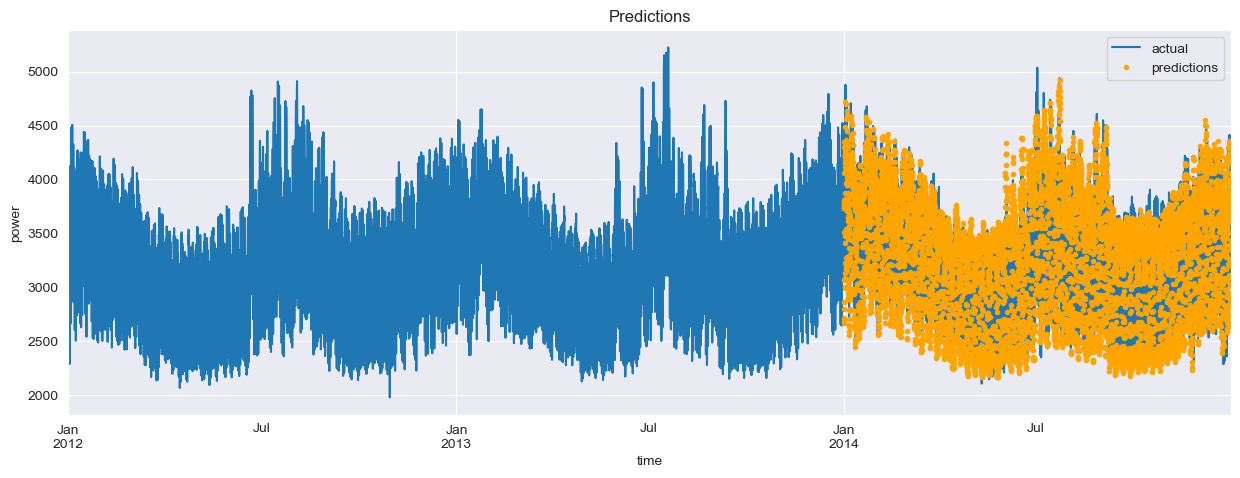

In [58]:
f = df.plot(x = 'timestamp', y = 'load', label = 'actual', figsize = (15,5))

test.plot(ax = f, x = 'timestamp', y = 'predictions', color = 'orange', style ='.')


f.set_xlabel('time')
f.set_ylabel('power')
f.set_title('Predictions')